# Step 1 Downdload/Extract dataset

In [1]:
import tarfile
tar = tarfile.open("Digits_data_500.tar.xz") # enter the data folder from drive
tar.extractall()
tar.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 2 Data Preprocessing 

In [6]:
import librosa
import os
import json

DATASET_PATH = "Digits_data_500"
#!touch data.json
JSON_PATH = "data.json"
SAMPLES_TO_CONSIDER = 22050 # 1 sec. of audio

In [7]:
def preprocess_dataset(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512):
  
    """Extracts MFCCs from music dataset and saves them into a json file.
    :param dataset_path (str): Path to dataset
    :param json_path (str): Path to json file used to save MFCCs
    :param num_mfcc (int): Number of coefficients to extract
    :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
    :param hop_length (int): Sliding window for FFT. Measured in # of samples
    :return:
    """

    # dictionary where we'll store mapping, labels, MFCCs and filenames
    data = {
        "mapping": [],
        "labels": [],
        "MFCCs": [],
        "files": []
    }

    # loop through all sub-dirs
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're at sub-folder level
        if dirpath is not dataset_path:

            # save label (i.e., sub-folder name) in the mapping
            label = dirpath.split("/")[-1]
            data["mapping"].append(label)
            print("\nProcessing: '{}'".format(label))

            # process all audio files in sub-dir and store MFCCs
            for f in filenames:
                file_path = os.path.join(dirpath, f)

                # load audio file and slice it to ensure length consistency among different files
                signal, sample_rate = librosa.load(file_path)

                # drop audio files with less than pre-decided number of samples
                if len(signal) >= SAMPLES_TO_CONSIDER:

                    # ensure consistency of the length of the signal
                    signal = signal[:SAMPLES_TO_CONSIDER]

                    # extract MFCCs
                    MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                                 hop_length=hop_length)

                    # store data for analysed track
                    data["MFCCs"].append(MFCCs.T.tolist())
                    data["labels"].append(i-1)
                    data["files"].append(file_path)
                    print("{}: {}".format(file_path, i-1))

    # save data in json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


In [8]:
if __name__ == "__main__":
    preprocess_dataset(DATASET_PATH, JSON_PATH)


Processing: 'Digits_data_500\eight'


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4954808e-04 -3.0859452e-04 -3.3417370e-04 ...  5.2409341e-05
 -1.7223645e-04 -2.3577154e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\017c4098_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.8794691e-05
 -3.5316974e-05 -2.2608729e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\01bb6a2a_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.97018414e-05  1.39203548e-05 -4.93692778e-06 ...  2.05527265e-02
  2.29943097e-02  1.47813605e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\02ade946_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00021232 0.00028033 0.00028053 ... 0.01227668 0.01438598 0.00930504], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\02ade946_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.5665957e-05 -6.1316835e-04 -6.0172530e-04 ... -1.2376400e-04
 -2.5064030e-04 -1.1656005e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\02ade946_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00122675 -0.00157263 -0.00138425 ... -0.00087163 -0.00137731
 -0.00098909], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\03c96658_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01206412 -0.01366893 -0.01153156 ... -0.01231432 -0.014047
 -0.00909002], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0616de09_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.2922441e-08
  1.8532313e-05  2.6151771e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\06f6c194_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1140038e-07  2.0393194e-05  4.0936698e-05 ... -5.9463255e-05
 -3.1363095e-05  7.0821693e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\06f6c194_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.7252923e-05 -1.1650284e-04 -1.7984828e-05 ...  3.1671903e-04
  4.5135798e-04  2.5430095e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\07089da9_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017789 -0.00079264 -0.00038548 ... -0.00041466 -0.00046743
 -0.00041643], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\07089da9_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.4650493e-07  2.1627497e-05  3.8222235e-05 ...  3.2482196e-05
 -5.1627276e-06 -2.9885865e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0717b9f6_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.2118306e-07 2.5582563e-05 1.6777705e-05 ... 2.7874792e-05 5.5169108e-05
 4.7964109e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0717b9f6_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00677845 0.00801632 0.00724649 ... 0.00690755 0.00793386 0.00512743], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\07363607_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00069847 -0.00043786 -0.00014179 ...  0.00098122  0.00246089
  0.00106963], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\07de53d3_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00042611 0.00074295 0.00081784 ... 0.00111418 0.0013079  0.00082561], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\08ab231c_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00017921  0.00029443  0.0004289  ... -0.00091338 -0.00129182
 -0.00085789], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\08ab231c_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.9795474e-05 1.0732120e-04 5.9533235e-05 ... 1.3679014e-04 1.4410526e-04
 1.2159430e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\099d52ad_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.6933350e-05  6.5170549e-05  7.0964605e-05 ...  6.8183646e-05
 -2.7445931e-04 -3.0415645e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0a2b400e_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.7347061e-05  1.0860168e-04  1.3908125e-04 ...  3.2656430e-05
 -4.0817817e-05 -8.3900268e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0a2b400e_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.9478438e-07 1.8815716e-05 4.8701644e-05 ... 2.2683274e-04 1.9547505e-04
 4.0085055e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0a2b400e_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.5447658e-05 -4.0700007e-04 -6.7366508e-04 ... -3.9943305e-04
 -4.3917174e-04 -3.6486340e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0b7ee1a0_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00074268  0.00092231  0.0007647  ...  0.00035277 -0.0003941
 -0.00048362], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0b7ee1a0_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00037332 -0.00056816 -0.00068727 ... -0.00049642 -0.00055385
 -0.0003924 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0ba018fc_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.9930816e-05  4.8191312e-05  1.3531138e-04 ... -1.2786681e-04
 -1.3069647e-04 -9.3081311e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0cb74144_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00022381 0.00028767 0.00061755 ... 0.00074805 0.00049415 0.00059916], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0d6d7360_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00031944  0.00028032  0.00028833 ... -0.00044952 -0.00083425
 -0.00073084], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0d90d8e1_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00015202 0.00030488 0.00034416 ... 0.00235671 0.00192914 0.00072915], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0d90d8e1_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.3701388e-04 2.1242065e-04 7.5007760e-05 ... 6.1442150e-04 1.8067857e-03
 1.4371586e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0e6e36c9_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.6818413e-04  6.9733994e-04  6.8892149e-04 ... -8.2010694e-05
  9.7365084e-04  1.0559601e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0e6e36c9_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0029520e-05  3.2439926e-05  3.0652540e-05 ... -8.3912390e-05
 -9.0170251e-05 -3.9331000e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0ea9c8ce_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0159643   0.01817395  0.01520206 ... -0.11785056 -0.044358
  0.00211931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0f2442b6_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00460384  0.00538163  0.00472715 ... -0.03230175  0.03006779
  0.03525209], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0f2442b6_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00061182  0.00064482  0.00175687 ...  0.00044039  0.00174051
  0.00138468], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\0ff728b5_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00105322  0.00107741  0.00064695 ... -0.00253372 -0.00148876
  0.00048767], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\1093c8e7_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.9909377e-05  1.6553255e-04  2.6333047e-04 ... -3.7525644e-04
 -2.9507786e-04 -1.0686801e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\10ace7eb_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0006028  -0.00080378 -0.00080315 ...  0.00014074  0.00084199
  0.00103855], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\10ace7eb_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035408 -0.00043526 -0.00045504 ... -0.00051043 -0.00050991
 -0.00034236], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\11321027_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.0763581e-05  6.4875087e-04  1.7027130e-03 ...  1.9961579e-03
  1.6854337e-03  8.5007644e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\131e738d_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.4102864e-05 -2.3296059e-05  1.7999619e-04 ... -1.2712933e-05
 -1.4643351e-04 -2.1028747e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\135c6841_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.4722025e-05 -1.9169571e-04 -2.2927315e-04 ...  1.5761220e-03
  2.4827207e-03  1.9001815e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\14c7b073_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035945 -0.00046062 -0.00048119 ... -0.0007336  -0.00125521
 -0.00089764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\14c7b073_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0015083  -0.0143881   0.0039289  ... -0.00305429 -0.00341557
 -0.00217819], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\15c563d7_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00076172 -0.00158396 -0.00087811 ... -0.00180327 -0.00332156
 -0.00208758], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\1657c9fa_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00058548 -0.00154797 -0.00209977 ... -0.00017015 -0.00189778
 -0.00161938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\173ce2be_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00117919 -0.00152461 -0.00191328 ... -0.00106021 -0.00135126
 -0.00106872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\179a61b7_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.02165774 0.03143126 0.0348499  ... 0.02307147 0.02527821 0.01595916], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\179a61b7_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00038767 -0.0004106  -0.00035271 ... -0.0007759  -0.00112551
 -0.00084046], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\187af8be_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.3669329e-05 -9.3270610e-05 -2.6877885e-04 ... -2.8864233e-04
 -3.3504557e-04 -2.6103499e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\1890e5c3_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00050258  0.00086687  0.0010253  ... -0.00032775 -0.00055722
 -0.00042013], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\18a8f03f_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9096562e-07  1.0440358e-06 -1.9492951e-07 ... -9.6381900e-06
  2.5397796e-05  2.6663671e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\18e910f4_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.3495938e-04 -8.7569446e-05 -1.1853166e-04 ...  1.4231071e-03
  1.8768585e-03  1.4023649e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\18f8afd5_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.9136892e-05 -1.2711626e-04 -3.6277584e-04 ...  5.3087634e-04
  5.0193630e-04  7.9501202e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\18f8afd5_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.8360151e-04 1.6796794e-04 5.1781743e-05 ... 1.4496243e-03 5.4223702e-04
 4.2132285e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\197f4153_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.4469707e-05 -8.0385056e-05 -2.3323584e-04 ... -5.7750521e-04
 -5.7820894e-04 -3.2323058e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\197f4153_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00130431 -0.00855788 -0.01292337 ... -0.00557978 -0.00485378
 -0.00090256], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\197f4153_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015714 -0.00045216 -0.00062098 ... -0.00062158 -0.00076881
 -0.00052492], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\1a892463_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00016065  0.00027506  0.00010331 ... -0.00011407 -0.00023643
 -0.00022137], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\1a994c9f_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029254 -0.00015487 -0.00043749 ... -0.01744431 -0.02035435
 -0.01300762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\1b4c9b89_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3104297e-04 -3.7149194e-04 -5.4820854e-04 ...  1.0369879e-04
  1.5769278e-04 -4.9299746e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\1c3f4fac_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.5673540e-05 -3.7442127e-04 -7.4524281e-04 ...  4.4691621e-04
  3.6297337e-04  1.9119523e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\1c3f4fac_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024358 -0.00050571 -0.00082346 ... -0.00153839 -0.0011855
 -0.00083096], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\1e02ffc5_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.6424519e-05 -8.9270150e-04 -1.0733542e-03 ...  1.4540428e-04
  3.7502038e-04  7.3843352e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\1e02ffc5_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00245777 -0.00271127 -0.00218095 ... -0.00244896 -0.00325028
 -0.00223988], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\1e31353f_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00046272 -0.00218585 -0.00273404 ...  0.0016144   0.00131582
  0.00109096], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\1e9e6bdd_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00079408 -0.00199317 -0.00296938 ...  0.00224483  0.00120781
  0.00013955], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\1f3bece8_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00705713 -0.00874758 -0.00799008 ...  0.00759078  0.01159557
  0.00886456], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\20174140_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00099298 -0.00116864 -0.0010867  ...  0.00459575  0.00346968
  0.00080873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\20fd451f_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00307963 -0.00570634 -0.00766123 ...  0.0073246   0.00917295
  0.00512725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\2144be19_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.4930424e-06 4.4949100e-04 6.6262000e-04 ... 2.8186145e-03 1.7550101e-03
 1.1114641e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\22296dbe_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0011586  0.00132884 0.001174   ... 0.00143868 0.00171411 0.00109805], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\234d6a48_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00148509 -0.00171008 -0.00143725 ...  0.00238729  0.00280821
  0.00185497], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\234d6a48_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0153325e-05 -9.1086358e-06 -5.4708307e-05 ...  5.8249592e-05
  8.9555375e-05  7.0350223e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\235b444f_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.5775974e-04  2.4109379e-04  2.4709876e-05 ...  1.4210629e-04
 -7.3059154e-04 -6.2806095e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\23da904f_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00229267  0.00406392  0.00330591 ... -0.00609852 -0.00576551
 -0.00323554], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\246d2c7f_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00959571 -0.01105939 -0.00888082 ...  0.00737604 -0.00399066
 -0.00670813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\24befdb3_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00155415 -0.00686371 -0.01218698 ... -0.01111262 -0.03633258
 -0.02977408], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\24befdb3_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9098475e-05 -3.4396911e-05 -2.7512207e-05 ...  6.7078676e-05
  6.2715946e-05  4.6361194e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\256c0a05_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.2779491e-05  4.4209122e-05 -1.6667156e-05 ... -8.7954031e-05
 -8.5934167e-05 -4.0981704e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\25e95412_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00170514 -0.00208242 -0.0017312  ... -0.00745992  0.00174974
  0.00327846], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\2796ac50_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02292039 -0.02744602 -0.02499365 ...  0.02940754  0.03393437
  0.02210948], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\28e47b1a_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00842177 -0.01161188 -0.01133867 ... -0.01607087 -0.0270254
 -0.02208127], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\29dce108_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.1281266e-05 3.4520286e-05 2.4763440e-05 ... 2.4934056e-05 7.6548211e-05
 7.4252857e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\2a1f4853_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.9661619e-05 7.1342736e-05 3.7646794e-05 ... 3.0567162e-03 3.6589811e-03
 2.3906433e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\2aca1e72_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00152105 -0.00199446 -0.00195993 ... -0.00239629 -0.00309728
 -0.00202622], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\2aca1e72_nohash_9.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00580442  0.00804135  0.00875172 ... -0.0077856  -0.00956316
 -0.00640362], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\2aec99ec_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.1574660e-04 -5.3826300e-04 -3.9862549e-05 ...  3.3238403e-02
  2.6729602e-02  1.3587915e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\2c5e0347_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00122973 -0.00230637 -0.00208485 ... -0.00287359 -0.00285511
 -0.00185723], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\2d82a556_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00477691 -0.00581083 -0.00521111 ...  0.00424474  0.00633748
  0.00458054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\2d82a556_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7683634e-05 -2.9672970e-04 -1.0884140e-04 ...  3.3168863e-03
  3.8494966e-03  2.3847613e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\2e8c59f7_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00070191  0.00121764  0.00499666 ... -0.00062548 -0.0029429
 -0.00321811], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\2f666bb2_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00128891 -0.0009358  -0.000416   ... -0.02088577 -0.02579109
 -0.0170376 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\2fcb6397_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00890774  0.01295157  0.02020122 ... -0.02848095 -0.01371315
 -0.00519392], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\2fee065a_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00053587  0.01059456  0.00590115 ... -0.00402214 -0.01372146
 -0.00634444], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\30276d03_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00277121 0.00292058 0.00176018 ... 0.02021717 0.02573291 0.01868918], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\30a09789_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9068124e-05 -1.6090462e-04 -2.7885739e-04 ... -3.4583054e-04
 -2.9535120e-04 -1.4273956e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3102f006_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9910534e-05 -5.4619952e-05 -6.7144203e-05 ...  6.0403272e-05
  6.8543268e-05  4.5161727e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3108acca_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.4690799e-04  7.8848214e-04  1.2637151e-03 ... -7.6439355e-06
 -3.9674150e-04 -4.9453683e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\321aba74_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01227983  0.03711529  0.04931745 ... -0.015731   -0.01826912
 -0.01186639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\32561e9e_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00317801  0.00380062  0.00374702 ... -0.00431413 -0.00499891
 -0.00331234], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3291330e_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9014723e-07
 -1.8819406e-05 -2.5573252e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3402e488_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00105026 -0.0016091  -0.00127988 ...  0.00146185  0.00147947
  0.0011118 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3565ca83_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.1969365e-07  2.7342729e-05  1.2924656e-05 ... -5.8707042e-06
  2.2867926e-05  2.6151045e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3589bc72_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.44549823e-07 -3.42913978e-07  1.55671376e-06 ... -9.14235497e-05
 -1.02730664e-04 -6.74078256e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3589bc72_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0751246e-05  1.2054134e-04  3.4990595e-04 ...  3.0543233e-04
  3.0185821e-04  1.7449977e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\35c8fa78_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.9894547e-05 3.6453937e-05 1.6636704e-05 ... 6.8107831e-05 6.1458748e-05
 4.9040191e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\36050ef3_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8497517e-07  2.0254523e-05  4.0491406e-05 ... -4.3172760e-05
 -2.2481876e-05 -2.6610249e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\365908bd_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00029606  0.00038522  0.00033787 ... -0.00054386 -0.00059898
 -0.00038076], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\37b03ab1_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2703203e-05 -6.2418752e-05 -3.5898716e-05 ... -5.4261880e-05
  1.8098926e-05  9.1312628e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\37dca74f_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00012445 0.00032248 0.00049178 ... 0.00078773 0.00075737 0.00040299], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3a69f765_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2207809e-05  5.5289383e-06 -6.2328480e-05 ... -1.2452268e-03
 -1.0039227e-03 -5.6614127e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3a69f765_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[7.8880075e-05 3.8657492e-04 9.0408215e-04 ... 6.2452030e-04 6.5211236e-04
 3.7106103e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3a929277_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0028911   0.00409666  0.00335954 ... -0.00597026 -0.00675784
 -0.00389839], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3ae5c04f_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01098652 -0.00323443 -0.00408917 ... -0.01466492 -0.01616189
 -0.01026035], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3b4f8f24_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8199236e-05 -2.8298224e-05 -8.6406057e-05 ... -9.7761200e-05
 -4.1568790e-05  1.0321021e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3bc21161_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.5178601e-04 1.4775753e-04 1.0269003e-04 ... 8.6814201e-05 2.5925486e-04
 2.1655146e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3c257192_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.3540726e-05 -2.7976243e-04 -1.5805397e-03 ...  1.1951421e-04
 -3.2848262e-04 -8.2630909e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3ce4910e_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1844738e-05 -9.3363582e-05 -7.5472679e-05 ...  6.8652948e-06
 -4.1952801e-05 -5.2450345e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3cfc6b3a_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0338924  -0.0402399  -0.03710664 ... -0.04026068 -0.04549428
 -0.02933579], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3d794813_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00179696 -0.00210432 -0.00187646 ...  0.00452021  0.00500216
  0.00292584], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3d794813_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00130575  0.0003981  -0.00095218 ... -0.0122455  -0.0131154
 -0.00807996], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3d86b69a_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  7.5138396e-06
 -6.2136796e-06  1.9828037e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3eb8764c_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8163837e-05  3.0988896e-05  7.7848628e-05 ...  5.5041444e-04
  5.7249278e-04  4.2340852e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\3efef882_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00688645 0.00774261 0.00701776 ... 0.00776995 0.00924316 0.00600938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\40115b19_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029659 -0.00031183 -0.00025549 ...  0.00163806  0.00291588
  0.00209109], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\40738a2d_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00079222  0.00126896  0.00105834 ... -0.00146026 -0.00209789
 -0.00163775], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\42a99aec_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00054071  0.00146704  0.00179905 ... -0.0021352  -0.00241902
 -0.00147397], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\42a99aec_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00919093 -0.01788261 -0.02000125 ...  0.01948449  0.02336699
  0.01413216], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\42ccb57a_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00591507 0.00873663 0.01191033 ... 0.01517238 0.0159937  0.01054292], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\43f57297_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00072203  0.00113973  0.00135772 ... -0.00201817 -0.00225823
 -0.00133177], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\4620dc14_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00086387 0.00127732 0.00149803 ... 0.01393242 0.01548749 0.00982544], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\471a0925_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012659 -0.0003979  -0.00056514 ...  0.00335009  0.00332448
  0.00194751], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\471a0925_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.05020978e-05 -1.14428956e-04 -1.13565984e-04 ...  2.42321621e-04
  2.72920763e-04  1.81065552e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\472b8045_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5145598e-04 -2.3451874e-04 -2.4934780e-04 ...  8.8260960e-05
 -4.5095556e-05 -8.0905513e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\472b8045_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00074279 -0.00035744 -0.00169698 ...  0.00034945  0.00084672
  0.00080826], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\483e2a6f_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.52658345e-06 -6.45233740e-05 -1.12095615e-04 ... -6.30093127e-05
 -6.69819492e-05 -4.47229722e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\4a1e736b_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00101247  0.00118953  0.00092537 ... -0.00146256 -0.00142737
 -0.00080226], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\4c6167ca_nohash_8.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.0072024e-05 -2.1202791e-04 -3.2652228e-04 ... -1.0410507e-05
 -1.4461366e-04 -1.5038579e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\4c6944d6_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.         0.         0.         ... 0.00024066 0.00042596 0.00032906], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\4c6944d6_nohash_8.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1436964e-05  1.7312443e-04  2.4144180e-04 ...  2.7250321e-04
  1.2227510e-04 -6.3687163e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\4cee0c60_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.59701392e-05 -4.24839382e-05 -1.12598544e-04 ... -5.09394100e-04
 -3.99514305e-04 -1.14316455e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\4cee0c60_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.87485250e-06 -3.58679381e-06  1.01905125e-05 ... -1.22280719e-04
  5.09969250e-04  3.52891686e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\4cee0c60_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00029743  0.0003171   0.00024081 ... -0.00052768 -0.00049724
 -0.0002826 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\4d9e07cf_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00287945  0.00772006  0.01208048 ... -0.04835013 -0.01863202
 -0.00068263], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\4e99c1b7_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00158079  0.00543345  0.00744934 ... -0.00962457 -0.00845452
 -0.00471144], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\4f2be90f_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00012316 0.0002002  0.000106   ... 0.0002845  0.00029954 0.0002061 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\4f5c0b28_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00030405  0.00017939 -0.00019277 ... -0.00101679 -0.0014633
 -0.00034546], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\508e30ee_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00570297 0.01056846 0.01461606 ... 0.03442379 0.04181786 0.02402396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\51055bda_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00015139  0.00023978  0.00023322 ... -0.0002891  -0.00031576
 -0.00017243], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\5170b77f_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00012952  0.00025731  0.00025603 ... -0.00055361 -0.00057147
 -0.00035678], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\5170b77f_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00362939 -0.00477703 -0.00509598 ...  0.00749073  0.00833677
  0.00507711], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\51c5601d_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00020458 0.0005521  0.00075114 ... 0.00239961 0.00246795 0.00158093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\52162b51_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00174645 -0.00299739 -0.00372348 ... -0.00103156 -0.0013601
 -0.00113944], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\530306f5_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.87979856e-05 -2.09175370e-04 -4.62555654e-05 ... -1.10335866e-04
 -1.82881457e-04 -1.41527431e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\531a5b8a_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1608425e-06  2.4539352e-07  1.1984234e-06 ...  2.4696184e-05
  3.8644546e-05  2.1160715e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\53458368_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0576383e-06  8.0804188e-05  1.8258156e-04 ... -4.5539753e-04
 -3.6164821e-04 -1.9274147e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\559bc36a_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0034877  0.00454673 0.00502912 ... 0.00323063 0.00396103 0.00268467], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\5628d7b7_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00047831 -0.00073336 -0.00091174 ... -0.00026803 -0.00065392
 -0.00072015], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\56f78b7e_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9233662e-05  1.6207369e-04  2.0873873e-04 ... -1.8326404e-04
  2.4979821e-05  5.5899596e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\57152045_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00036167 0.00283127 0.00421569 ... 0.00220335 0.00369494 0.00332653], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\5744b6a7_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00047403 -0.0037673  -0.00483468 ... -0.00036384  0.00137842
  0.00163587], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\5744b6a7_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00213988 0.00340172 0.00470755 ... 0.00231492 0.00276842 0.00199212], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\5769c5ab_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1929383e-05 -6.0860748e-05 -4.5534187e-05 ... -2.3890198e-04
  5.6986169e-06  8.9278459e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\578d3efb_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00080783 -0.00098829 -0.00094445 ...  0.00148893  0.00144968
  0.00085672], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\589bce2c_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.16613405e-05 5.69602125e-05 5.98827537e-05 ... 7.84361910e-05
 1.13164984e-04 6.50393413e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\59fe87e6_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.2825333e-05 5.7496360e-05 2.2262575e-04 ... 1.6672779e-03 2.9513284e-03
 2.5563061e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\5a98d407_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7636101e-05 -4.9220354e-05 -8.6014967e-05 ... -7.0232178e-05
 -9.9930461e-05 -3.4521978e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\5c39594f_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00034545  0.00073692  0.00057616 ... -0.00053619 -0.00018511
 -0.00015007], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\5e3dde6b_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0003842  0.00038682 0.00033826 ... 0.00044569 0.00045446 0.00037984], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\5e3dde6b_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7576593e-04 -1.3726982e-04 -5.5005836e-05 ...  2.3830004e-04
  6.3503184e-04  4.9114745e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\5ebc1cda_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00041149 -0.00046749 -0.00030776 ...  0.00049626  0.00078729
  0.00051623], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\616420be_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.1429600e-05  1.3178072e-04  3.3165788e-04 ... -2.6079541e-04
 -5.4311543e-04 -3.2399519e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\616420be_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00119934 0.00172963 0.00171682 ... 0.07722601 0.09262859 0.06141812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\617de221_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.9172321e-06 -6.8194859e-09 -2.4088058e-06 ...  1.1219024e-06
 -6.3482724e-07 -2.3024771e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\61abbf52_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0959164e-05 -2.1912821e-04 -3.2543729e-04 ...  1.4590340e-04
  2.1008834e-06 -6.0551793e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\61abbf52_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00017185 0.00025599 0.00022774 ... 0.00122218 0.00111163 0.00035784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\61e2f74f_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.04454682 -0.05157034 -0.04552681 ... -0.04953249 -0.05525913
 -0.03532316], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\62581901_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7565852e-05 -6.1050865e-05 -8.4148640e-05 ... -1.1354604e-04
 -1.2437563e-04 -6.0525366e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\62ff07ef_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.0789989e-05  8.3596737e-05  1.0829737e-04 ... -2.9688218e-04
 -1.7884222e-04 -4.9235950e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\6565a81d_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00908293 -0.01422712 -0.01749405 ... -0.01711161 -0.01888434
 -0.01161764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\65d844fc_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0007194  -0.00109373 -0.00130191 ...  0.00120409  0.00158058
  0.0010677 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\65d844fc_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0230136e-05 -3.0965613e-05 -3.3450273e-05 ... -6.4759472e-05
 -6.5243650e-05 -4.6397676e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\676f8138_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.4002815e-05 -2.1235667e-04 -5.2365218e-04 ... -3.7189433e-04
 -5.5309548e-04 -3.5805712e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\679463fc_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00407063  0.0070577   0.00334074 ...  0.00389559  0.00724227
  0.00627442], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\6794a793_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.6367691e-05  6.3236737e-05  7.0247610e-05 ... -1.4952329e-02
 -4.0037064e-03  1.3923637e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\67bdbf56_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00031487  0.00047107  0.00073297 ... -0.00046934 -0.00049106
 -0.00044688], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\67fcdb05_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.5628267e-04  4.2507195e-04  1.6536165e-03 ...  1.5581081e-03
  9.3209435e-04  1.6399557e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\692a88e6_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00077099 -0.0010724  -0.00119143 ...  0.00161881  0.0016756
  0.00101679], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\6a2fb9a5_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00074335  0.00122506  0.00168382 ... -0.00142586 -0.00141907
 -0.00086302], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\6a2fb9a5_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00032639 0.00039827 0.00033235 ... 0.00023353 0.00035529 0.0002855 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\6a861f21_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00047809 0.00085178 0.00108598 ... 0.0007755  0.00091522 0.00061628], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\6aa8def4_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00076903 -0.00048001 -0.00137909 ... -0.02070562 -0.03316605
 -0.02424503], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\6ace4fe1_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8085608e-06  4.6022051e-05 -3.8944847e-05 ...  7.4015072e-05
  5.7131696e-05  4.9310293e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\6bf5baf3_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.5378602e-06  6.9510381e-05  1.0304674e-04 ... -3.0824286e-04
 -3.5415572e-04 -1.9938259e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\6c429c7b_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0045291   0.00756816  0.00729148 ... -0.00503633 -0.00716238
 -0.00505097], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\6d1dcca6_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00045965 -0.00073681 -0.0006268  ...  0.00056888  0.00087863
  0.00061878], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\6f342826_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9818024e-04 -1.3686501e-03 -1.5354840e-03 ... -4.1563602e-05
 -2.3238607e-04 -2.8358429e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\6fca237d_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00207655 -0.00274073 -0.00550286 ... -0.01020579 -0.00801259
 -0.00387364], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7081436f_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018025 -0.00025884 -0.00019654 ... -0.00011359 -0.00014151
 -0.00015498], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\70a00e98_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4045363e-05 -2.7092386e-04 -3.8764309e-04 ... -5.9040188e-04
 -3.5034138e-04 -1.0080743e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7117fb6d_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.3883079e-04  1.2435169e-04  6.5318847e-05 ... -1.7133167e-03
 -1.4602403e-03 -7.5667957e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7211390b_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.4571770e-04  2.8982077e-04  1.7361674e-05 ... -1.2403342e-04
  2.8440321e-04  3.0030776e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7211390b_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.6552150e-07  1.9601790e-05  4.8146245e-05 ...  1.2536011e-04
  1.1516472e-04  6.5271073e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7257420c_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00056645 -0.00068222 -0.00062194 ... -0.00108686 -0.00144189
 -0.0009771 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\72e382bd_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00336226 -0.00484471 -0.00647623 ...  0.00874635  0.00611346
  0.00573009], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\73f0c1f7_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00280093 0.00254855 0.00153444 ... 0.00276246 0.00858562 0.00728437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\73f20b00_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.8697896e-05 -9.4355601e-05 -1.1024045e-04 ... -8.8613822e-05
  8.9359084e-05  6.7323657e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\742d6431_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00079761  0.00094558  0.00099581 ...  0.00125328 -0.00606274
 -0.00646679], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\763188c4_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0426351e-05 -1.4710323e-04 -1.4756260e-04 ... -1.8934670e-04
 -1.8057412e-04 -1.1212626e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\76b58705_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00033257 -0.00083702 -0.00140773 ...  0.00063893  0.00136814
  0.00071268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\779de043_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00048187  0.00059973  0.00046015 ... -0.00074064 -0.0006734
 -0.00036844], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7846fd85_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00148254  0.00314755 -0.00046612 ...  0.00286222  0.00416268
  0.00274208], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7846fd85_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.4472566e-03 -4.5351624e-03 -4.3783570e-03 ... -1.0757488e-03
 -3.4173891e-06  4.5713855e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\784e281a_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00667984 0.00955291 0.00905513 ... 0.00856383 0.00891372 0.00541339], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\78884794_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00039753  0.00033277  0.00455815 ...  0.00713104  0.00092778
 -0.00413618], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\798f702a_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.0983160e-04  6.9439708e-04 -4.6239504e-05 ... -7.6186063e-04
 -1.5750926e-03 -1.2544818e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7be5a0f3_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.3571332e-04
  9.1323724e-05 -2.2150083e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7c1d8533_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.4734028e-07  7.8762253e-07 -1.7539562e-06 ...  1.7486834e-03
  1.9373037e-03  9.3682483e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7d6b4b10_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.45643832e-06  1.43912286e-04  4.18007839e-04 ... -1.10387205e-04
 -5.90381539e-08 -3.50303562e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7e6bd776_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.2901679e-06 1.6019253e-04 3.5759344e-04 ... 4.3096143e-04 3.6098523e-04
 1.5858316e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7f74626f_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9989336e-05 -7.3658892e-05 -3.0584430e-05 ... -1.9679450e-05
 -2.0392888e-04 -2.6377072e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7f9eb952_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1626259e-06 -2.3187320e-05 -3.0325131e-05 ... -3.1232081e-05
 -3.3224824e-05 -2.2857837e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7fd25f7c_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8875627e-05 -4.4700853e-05 -2.2083845e-05 ...  6.8413268e-05
  5.8994838e-06 -3.2560878e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\7fd25f7c_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.4888896e-05 -1.7877467e-04 -2.3051164e-04 ... -2.4622594e-04
 -2.1338469e-04 -1.0373983e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\81332c92_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00086664 -0.00531847 -0.01117703 ...  0.01069551  0.01137427
  0.00715289], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8134f43f_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.4207472e-07 -1.4900572e-06  4.3077835e-06 ... -1.8854736e-04
 -2.5775758e-04 -1.5252743e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\81dc4a94_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00137523 -0.0032619  -0.00490013 ...  0.00575209  0.00578369
  0.00332986], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\825f450d_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00023483 0.00023929 0.00021653 ... 0.00612972 0.0071654  0.00482489], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\833d9f56_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1732463e-05  1.8006645e-04  4.8462345e-04 ...  6.7761730e-06
  2.4478039e-04  2.1912991e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\834f03fe_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0021362  -0.00246235 -0.00226908 ...  0.00170984 -0.00664189
 -0.00353442], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8353fea1_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.2232626e-05 -2.4873603e-04 -7.8614603e-04 ... -6.3209387e-04
 -4.6689576e-04 -2.5917479e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\837a0f64_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1056552e-05 -4.1145609e-05  2.5059410e-07 ...  2.5275271e-04
  5.1791972e-04  5.0143868e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\83f9c4ab_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2557364e-05 -1.3729125e-04 -1.2786905e-04 ...  6.8622154e-05
  9.5481199e-05  1.0498764e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\845f8553_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0021476  -0.00294002 -0.00271934 ...  0.00241797  0.00276115
  0.0017105 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\84bf12ff_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.43561289e-05 -1.18105454e-04 -9.84582948e-05 ... -1.30265355e-04
 -1.08553206e-04 -6.72719907e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\87070229_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5827996e-07  2.0958665e-05  3.9486429e-05 ...  8.9736779e-05
  1.2171494e-04  9.5588395e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8769c34c_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.14685456e-04
 -1.42230012e-04 -8.86378475e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8769c34c_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00141526 0.00158688 0.00135986 ... 0.00214727 0.00251063 0.00158389], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\879a2b38_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00108    -0.00107467 -0.00097767 ...  0.00102929  0.00100549
  0.00068725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\87d5e978_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00125717 0.00204831 0.00266465 ... 0.00273773 0.0032847  0.00197843], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\88120683_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00141902 0.05680563 0.1413641  ... 0.01272348 0.01468293 0.0093253 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\884ae8e1_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00025081 0.00172558 0.00547001 ... 0.00268461 0.00284573 0.00176424], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\888a0c49_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00568347  0.00925867  0.00873993 ... -0.00580628 -0.00848127
 -0.00604568], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\88a487ce_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01150863 -0.01435826 -0.01464043 ...  0.01581292  0.01803746
  0.01155226], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8910e5ef_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00261849 -0.00272642 -0.00291563 ... -0.03109218 -0.03467686
 -0.02212712], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\893705bb_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00038155  0.00150573  0.00263906 ... -0.00133858 -0.00140607
 -0.0008652 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8a744054_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0001359   0.00063356  0.00074545 ... -0.00014338 -0.00041895
 -0.000329  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8aa35b0c_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02544516 -0.04227645 -0.04311403 ...  0.00776084  0.00850741
  0.00528141], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8b775397_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0039132  -0.00857056 -0.01133779 ... -0.02569732 -0.02436555
 -0.01253821], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8d4cdc60_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00326326  0.00324692  0.00141259 ... -0.00111205  0.00203579
  0.00209553], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8d8d9855_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00064179 -0.00056514 -0.00031012 ... -0.0016673  -0.00225318
 -0.00154937], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8dc18a75_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00407339 -0.00595892 -0.00642773 ... -0.00505692 -0.0056274
 -0.00358354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8dd24423_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.0438197e-07 -1.8345199e-05 -5.0402370e-05 ...  2.8474338e-05
  1.7607070e-05 -5.3145113e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8e523821_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.5956879e-07 -6.9608741e-06  2.4111474e-05 ...  5.4872606e-05
  7.3439231e-05  4.2982618e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8eb4a1bf_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.5870881e-05 -2.4181609e-04 -3.6262017e-04 ... -5.5206066e-04
 -4.0366777e-04 -1.2583710e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8f4c551f_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011345 -0.00037747 -0.00065248 ... -0.00028226 -0.00051337
 -0.00042578], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\8fe67225_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2014099e-06  2.3521411e-06 -1.2083637e-05 ...  8.2076331e-06
 -6.3230196e-05 -7.6633391e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\90b0b91a_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.4259541e-05 -9.8549703e-05 -6.3472398e-05 ... -4.2891050e-05
 -1.0161720e-04 -6.6187706e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\9151f184_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00375045  0.00582988  0.00456954 ... -0.00967609 -0.00971389
 -0.00585593], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\91942e89_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00050961 -0.00054791 -0.00046743 ...  0.01073745  0.0118942
  0.00763717], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\91ffb786_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00022388  0.0007744   0.00110315 ... -0.00038241 -0.00071884
 -0.00066849], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\9448c397_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.4095679e-04 7.9442660e-05 1.3087254e-06 ... 1.6669939e-04 2.5841911e-04
 1.8297996e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\953fe1ad_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00133005 0.00170227 0.00188407 ... 0.00902324 0.00735242 0.0037836 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\964e8cfd_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.004108   0.00489072 0.00468794 ... 0.0124518  0.01189921 0.00674009], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\9785931e_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.5982404e-04  2.6850388e-04  2.7142293e-04 ... -1.4942150e-06
  8.3364709e-04  6.4182415e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\97f4c236_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00082995 -0.00090488 -0.00127582 ...  0.00150671  0.00274766
  0.0018157 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\989a2213_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029036  0.00017279  0.00083413 ... -0.00347296 -0.00394912
 -0.00240099], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\98ea0818_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.7285877e-05 -3.0847936e-05 -1.7203881e-04 ...  3.1102793e-03
 -4.6434949e-04 -2.1380743e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\999823db_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0113973   0.01288645  0.01139287 ... -0.01940177 -0.0202763
 -0.01066453], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\99a9b015_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00747549 0.0116287  0.01358679 ... 0.00696637 0.00971247 0.00671691], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\9b402bc2_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.0338428e-05 6.7870635e-05 8.9143847e-05 ... 4.6857909e-05 6.2518935e-05
 1.4963140e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\9be15e93_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.03408061 -0.03954253 -0.0355415  ...  0.04135616  0.04516897
  0.02843283], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\9bea2ac7_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00994071  0.01144951  0.01053156 ...  0.03340468 -0.02727384
 -0.03900849], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\9d4bab4f_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.0754792e-05 -5.2895525e-04 -7.7026477e-04 ... -2.5469108e-04
 -2.2754326e-04 -1.3082111e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\9d8ac38b_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00506086 -0.00615738 -0.00571813 ... -0.00719366 -0.00767944
 -0.00476147], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\9e42ae25_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00048039 -0.00060001 -0.00058619 ...  0.00041201  0.00058064
  0.00044823], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\9efe5140_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00056182 -0.0007011  -0.0006812  ... -0.00074409 -0.00086542
 -0.00056353], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\9f4098cb_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8673223e-04 -3.4144332e-04 -9.1978698e-05 ...  1.1195968e-03
 -6.2286854e-04 -1.1081334e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\9fac5701_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9335314e-05  6.1419581e-05  8.1111430e-05 ... -1.5048534e-04
 -1.5172512e-04 -8.7547633e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\9ff2d2f4_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0003614  0.00044659 0.00039861 ... 0.00039637 0.00059593 0.00044234], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\a04817c2_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00015333 0.00033931 0.00032951 ... 0.0002079  0.00024274 0.00015699], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\a16013b7_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.7829314e-05  7.8595207e-05  5.1180297e-05 ... -5.7244854e-04
  1.2715211e-03  1.5274581e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\a1cff772_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00014601  0.00031469  0.00043163 ... -0.00089739 -0.00075073
 -0.00040815], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\a1e71565_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0002979  -0.00061047 -0.0006827  ... -0.00035091 -0.00074081
 -0.0004605 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\a2cc5444_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00095228 0.00111818 0.00099306 ... 0.00181937 0.00173119 0.00097355], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\a4b21cbc_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00624969 0.00717672 0.00639051 ... 0.00713954 0.0081021  0.00525036], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\a591c2ea_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7607377e-06  1.6136955e-04  3.4873141e-04 ...  2.1776819e-04
  1.6128582e-04  5.1831961e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\a6285644_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9234005e-05  1.1169970e-05  5.5574135e-05 ... -1.6107976e-04
 -2.0173246e-04 -1.0284515e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\a6285644_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.3104599e-05 -1.2648242e-04 -2.9167702e-04 ... -7.3034159e-04
 -9.1235829e-04 -6.1552797e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\a6f2fd71_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00159029 -0.01245804 -0.00834625 ... -0.00732153 -0.00741595
 -0.00541034], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\a8688b67_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0167290e-05 -5.1883915e-05 -7.8347388e-05 ... -3.6911722e-05
 -1.0807030e-04 -6.6809822e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\a929f9b9_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012155 -0.0002819  -0.00028154 ...  0.00050023  0.00034272
  0.00016753], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\aa80f517_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0008966  -0.00113623 -0.00111012 ...  0.00054124  0.00096803
  0.00114361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ab353673_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.02815917 0.03260405 0.02864787 ... 0.00747067 0.07405783 0.06525907], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ab3f0c1b_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0003313  -0.00053355 -0.00054817 ...  0.00069347  0.00092258
  0.00035059], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ab46af55_nohash_7.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0008655   0.0015305   0.00392195 ... -0.00217202 -0.0022341
 -0.00161   ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ac4b3fc3_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00023323 -0.00034014 -0.00043314 ...  0.00176401  0.0023552
  0.00222824], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ac9dee0e_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00047438 -0.00082805 -0.0011334  ... -0.00041954 -0.0006842
 -0.00061161], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\acfd3bc3_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0831467e-05 -8.0959326e-05 -8.7519002e-05 ... -7.1347247e-05
 -4.1027539e-05 -2.2285900e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ad63d93c_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00068652 -0.00061991 -0.00055358 ...  0.00092389  0.0009243
  0.00055067], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ad63d93c_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.26013862e-05 -2.80946668e-04 -3.22649226e-04 ...  1.06143125e-04
 -9.55465221e-05 -1.94194086e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\adebe223_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6839136e-05 -1.2918499e-04 -3.0961313e-04 ... -2.2736659e-04
 -2.4709725e-04 -1.8894380e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\adec6a94_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00227806  0.00434941  0.00466704 ... -0.0017625  -0.00275074
 -0.00195248], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ae82c78c_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00146216 -0.00174737 -0.00202324 ... -0.02913333 -0.03521617
 -0.02491152], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ae927455_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00350662 -0.00406429 -0.00360373 ... -0.00371956 -0.00435253
 -0.00284092], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\aef8dcf5_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00046564 0.00053058 0.00049875 ... 0.00070789 0.00074089 0.00047169], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\af6fbbf5_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.1875154e-05  2.2912948e-04  3.2836490e-04 ... -3.2557693e-04
 -4.0023509e-04 -2.7414632e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b0f24c9b_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.8590093e-05 3.1518717e-05 2.8535067e-05 ... 7.8292389e-05 1.3174140e-04
 9.0451074e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b0f5b16d_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1131822e-05  3.3118169e-05  8.1413811e-05 ... -1.6337603e-04
 -2.5840057e-04 -1.8682152e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b0f5b16d_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.1716118e-04  3.9417463e-04  1.8875093e-04 ... -1.5720636e-04
  5.1829556e-05  2.7528079e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b414c653_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00047967 -0.00061488 -0.00053563 ... -0.0006725  -0.00073047
 -0.00047319], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b49caed3_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0001242  -0.00051561 -0.00074854 ...  0.00088057  0.00137529
  0.00104809], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b4aa9fef_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00033154 -0.00068773 -0.00091043 ...  0.00030271  0.0006372
  0.0005251 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b5552931_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00078588 -0.00063346 -0.00345709 ... -0.01033917 -0.00974136
 -0.00560464], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b575b5fb_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.02386773 0.02715173 0.02330246 ... 0.02418849 0.02951153 0.01997724], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b59fa113_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.2125376e-05  5.2324856e-05 -2.4329391e-05 ...  5.7322200e-04
  6.6995336e-04  4.0146746e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b5cf6ea8_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00017854 0.00022485 0.00021216 ... 0.00035998 0.00041475 0.00027131], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b63fea9e_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00119444 0.00157903 0.00157246 ... 0.00149572 0.0016884  0.00107567], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b63fea9e_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.7781545e-06 -3.0644842e-06  3.3453246e-06 ... -3.3035912e-04
 -4.1747396e-04 -2.3697436e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b69002d4_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.4739562e-07  2.1188627e-05  3.8393388e-05 ... -7.8431040e-06
  2.5918112e-05  2.4300231e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b69002d4_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8597871e-05  1.5968431e-04  3.0570655e-04 ... -1.3537768e-04
 -3.1679010e-04 -2.2789132e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b7a0754f_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.1933563e-06  3.0808475e-05 -1.4944906e-05 ... -3.8318301e-04
 -2.2609897e-04 -3.7865040e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b7a0754f_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0004072  -0.00046489 -0.00032973 ... -0.00199866 -0.00254342
 -0.00176903], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b7e9f841_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1071034e-04
 -1.4518795e-04 -8.7490131e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b83c1acf_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00069774 0.00134154 0.00236229 ... 0.03166328 0.07647101 0.06273596], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\b97c9f77_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00012096  0.00016152  0.00012684 ... -0.00016227 -0.00041375
 -0.00039561], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\bab36420_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.6218891e-04  1.2251377e-03 -2.8301880e-05 ...  6.7257014e-04
  2.2180306e-03  2.1208811e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\bbb2eb5b_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01318574 -0.01829732 -0.01994827 ...  0.01579588  0.01791402
  0.01158993], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\bbbf4fbd_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.0039342e-04 -4.2496322e-05  3.1783951e-05 ... -1.5613793e-03
 -1.7011628e-03 -1.1049857e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\bbf38549_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00247129  0.00336701  0.00320658 ... -0.00271431 -0.00303238
 -0.00208643], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\bc999754_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0011622   0.00138566  0.00119151 ... -0.0016103  -0.0016657
 -0.00104767], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\bcf614a2_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00018399  0.00070479  0.00044992 ... -0.00063181 -0.00082135
 -0.00054035], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\bcf614a2_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.6015494e-07 -3.8842886e-06  1.9072695e-05 ... -5.1482220e-05
 -7.5257725e-05 -4.3129923e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\bde0f20a_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00057882 -0.00067498 -0.00048527 ... -0.00063394 -0.00197307
 -0.00117813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\be7a5b2d_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1550651e-05 -1.9785369e-04 -1.5920679e-04 ... -3.4306641e-04
 -3.4732462e-04 -2.2517785e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\be7a5b2d_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.6382527e-05 -7.5199518e-05 -2.3974001e-04 ... -2.5714023e-04
 -3.0145084e-04 -1.7220754e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\be7fa0a3_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0002181   0.00052259  0.00052715 ... -0.00065255 -0.00011816
  0.0002816 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\beb458a4_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022191  0.00327984 -0.00102422 ...  0.00305151 -0.00416306
 -0.00363718], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\bfaf2000_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00057585 -0.00074734 -0.00063537 ... -0.00085461 -0.00024432
 -0.00017753], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\bfaf2000_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9480979e-05 -1.7726386e-05 -9.6975105e-05 ... -5.4762568e-03
 -4.5239981e-03 -3.0556589e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c0445658_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1491210e-05  6.4144631e-05  2.7334341e-05 ... -2.9491896e-03
 -2.6913239e-03 -1.5834847e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c0445658_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.03699404 -0.05913818 -0.05538382 ... -0.04627602 -0.040499
 -0.02084569], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c0c701f1_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5036126e-04 -1.2563300e-04 -7.1711838e-05 ...  1.9093501e-04
  1.8028196e-04  1.1111419e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c120e80e_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00083341  0.00090716  0.00069077 ... -0.00087396 -0.00096005
 -0.00066618], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c1d39ce8_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00276654 -0.00036898  0.00300891 ... -0.04821923 -0.12353716
 -0.094643  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c22d3f18_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0001188   0.000135    0.00011336 ... -0.00018536 -0.00020316
 -0.00013594], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c22ebf46_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00594617 -0.00668382 -0.005349   ... -0.00460486 -0.01254065
 -0.01080645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c2bc4489_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00523576  0.00771767  0.00802712 ... -0.00592617 -0.00716641
 -0.00479355], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c38720cb_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00118787 -0.00127935 -0.00088491 ...  0.00113243  0.00232428
  0.00234301], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c39703ec_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.7963454e-05 -9.9774690e-05 -9.9535908e-05 ... -2.4011963e-04
 -1.4240312e-04 -5.9995258e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c44d2a58_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.2215963e-04  3.1774858e-04  2.4137853e-04 ...  6.9285819e-04
  5.2083487e-04  2.3744513e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c4cfbe43_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00162219 -0.00252887 -0.00579983 ... -0.00102677 -0.00252007
 -0.00240967], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c5a1e46c_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012855 -0.00036331 -0.00043964 ... -0.00188887 -0.00210246
 -0.00124794], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c634a189_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00021021  0.00031978  0.00036415 ... -0.00010612  0.00022972
  0.00024841], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c634a189_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.4167859e-05 -6.3655421e-04 -1.3322567e-03 ...  4.8657623e-04
  3.7609643e-04  2.5441393e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c7aaad67_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5835029e-06 -8.7757362e-05 -2.5544452e-04 ...  5.6360813e-04
  8.6802646e-04  5.8970257e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c7aaad67_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00232795 -0.00503704 -0.00804557 ... -0.0056114  -0.0067547
 -0.00445152], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c7b4049e_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1920968e-05 -8.3149152e-06 -5.8653241e-05 ... -7.8685639e-07
  1.8921042e-05  2.7701904e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c7dc7278_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1069365e-05  6.2173822e-05  3.8095994e-05 ... -8.6498330e-06
 -1.0042540e-05 -2.9991390e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\c842b5e4_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cb2929ce_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.7507353e-05  6.3251841e-06 -2.7944823e-05 ...  1.0069470e-04
  1.5096202e-04  1.5042207e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cb62dbf1_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024582 -0.0004803  -0.00050016 ... -0.00058868 -0.00060452
 -0.00043952], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cb62dbf1_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1875131e-04 -5.3685231e-05  5.9890015e-05 ... -9.8775618e-04
  6.6525084e-03  6.9856052e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cba7f985_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6545741e-04  5.7792022e-05 -1.2136639e-04 ...  1.8113620e-04
  4.3220623e-04  3.9032820e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cc3b5b62_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.7820683e-04 -2.7323389e-04 -1.1686820e-03 ...  1.1003439e-03
  6.7537067e-06 -4.6287556e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cc4f9250_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00063587 -0.0012794  -0.00192041 ... -0.00097644 -0.00103364
 -0.00064584], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cc4f9250_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01773101 0.02050371 0.01776176 ... 0.01719445 0.02175827 0.01476575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cc8b3228_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0119384  -0.01759079 -0.01466026 ...  0.00036189 -0.00115386
 -0.00131811], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ccb1266b_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00349905 -0.024156   -0.02532425 ... -0.00489817 -0.00449837
 -0.00214527], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ccb1266b_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0001515  0.00024294 0.00053532 ... 0.00026217 0.00047735 0.00051197], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cce7416f_nohash_11.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.5848191e-05  3.5772013e-04  4.9769128e-04 ...  8.7765523e-04
  9.6624694e-04  3.6853307e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cce7416f_nohash_6.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0058076e-05 -5.6075991e-05 -6.3854633e-05 ... -7.3649469e-05
 -5.7437363e-05 -4.8975704e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cd671b5f_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.8868556e-06  1.7590728e-06 -1.0140212e-06 ...  6.6882127e-04
  8.4686896e-04  5.6690146e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cd671b5f_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.6568282e-05  1.8324995e-04  8.6720167e-05 ... -1.5057699e-03
 -2.0306210e-03 -1.5754398e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cd85758f_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00063114 -0.00094425 -0.001034   ... -0.00094702 -0.00126921
 -0.00086469], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cd911ace_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0073511e-07  2.5251580e-07 -6.7001992e-07 ... -8.2068269e-05
 -9.0448702e-05 -3.9661303e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ce0cb033_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0831044e-06  1.1257301e-04  1.7173114e-04 ... -2.6658957e-04
 -2.5764274e-04 -1.2209953e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\cfbedff9_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00238521 -0.00429412 -0.00463186 ...  0.00065152  0.00052415
  0.00027712], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d056d4d8_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00020875 0.00023984 0.00018309 ... 0.00018909 0.00033069 0.0002596 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d069e6ff_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00014163 0.00018975 0.0003061  ... 0.00034584 0.00042099 0.00026977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d21fd169_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00025008 -0.00041692 -0.00026805 ... -0.00031304 -0.00044474
 -0.00039222], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d37e4bf1_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.9671752e-07 -2.5145886e-05 -2.3355933e-05 ...  2.9825182e-05
  3.4609919e-05  2.2532826e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d3831f6a_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9813665e-05  6.7005145e-05  5.6801684e-05 ... -8.8148154e-03
  1.8128209e-02  1.9446697e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d3831f6a_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00454523 -0.00669192 -0.00636651 ... -0.00658694 -0.00636249
 -0.00373098], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d55aa56c_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00263472  0.00364933  0.00350012 ... -0.00290035 -0.00349105
 -0.00211058], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d78858d9_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.5176665e-05  2.8098450e-04  4.5593415e-04 ...  7.1317382e-04
  7.6833711e-04  4.7031124e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d962e5ac_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9738995e-05 -1.7597293e-04 -1.9923359e-04 ... -2.2105797e-04
  6.7842957e-05  1.9851542e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d962e5ac_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.8073357e-05 -4.1055118e-04 -5.2260410e-04 ...  8.5357798e-04
  1.1047360e-03  8.5250038e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d98dd124_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00035201 0.00089575 0.00085109 ... 0.0015649  0.00175038 0.00105675], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d98dd124_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7152653e-05  1.3231256e-04  1.7218871e-04 ... -6.4924920e-05
 -6.4882981e-05 -4.6432258e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d9aa8c90_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.0963877e-05  1.3554771e-04  1.4812742e-04 ... -1.7908822e-04
 -2.0732070e-04 -1.3555211e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\d9e9f554_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6365940e-05  3.4671339e-05  3.1707856e-05 ... -2.1699790e-04
 -3.4337954e-04 -3.2420151e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\da584bc0_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00021046  0.00022363  0.00010995 ... -0.00013024  0.00030205
  0.00032581], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\da584bc0_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8352405e-05  7.0105893e-06 -8.0236561e-05 ...  4.0606838e-03
  5.8112335e-03  4.0520546e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\dae01802_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020782 -0.00019717 -0.00010845 ... -0.00178262 -0.0027608
 -0.00204544], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\db24628d_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00034215  0.00485262  0.00651686 ...  0.00393703 -0.00840173
 -0.00890805], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\dbb7723a_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00059557 0.00078781 0.00086381 ... 0.00143117 0.00145283 0.00098245], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\dce05676_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.8938046e-05  2.9938023e-05 -8.8382667e-06 ...  4.1341266e-04
  5.6473271e-04  4.1904073e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ddedba85_nohash_13.wav: 0
Digits_data_500\eight\ddedba85_nohash_9.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.9825218e-05 3.4531979e-05 2.0468424e-05 ... 6.1951825e-05 6.6916589e-05
 4.5703269e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\de89e2ca_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.6985543e-06  2.8059832e-05  1.3455449e-05 ... -1.4179352e-05
 -6.7017092e-05 -4.3643533e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\de89e2ca_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7253288e-05 -1.1123613e-04 -1.2700174e-04 ... -1.4702207e-04
 -1.3744565e-04 -5.8488160e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\dea820ce_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00045481  0.00080172  0.00184579 ... -0.00077525 -0.00354493
 -0.00320402], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\dfb6450b_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00015049  0.00019697  0.00015138 ... -0.02420798 -0.0399337
 -0.0280843 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e0c782d5_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.80972096e-06 -1.75241643e-04 -2.95590522e-04 ...  3.21638974e-04
 -1.04564664e-04 -2.50722718e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e2008f39_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01407506  0.01652509  0.01364194 ... -0.5420732  -0.71857786
 -0.49794996], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e39a8ddc_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1940184e-05 -1.0009307e-04 -1.4060979e-04 ... -4.0829753e-05
 -1.2013973e-04 -9.4174749e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e3e0f145_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.0066171e-04 -2.0002761e-04 -2.0423465e-04 ...  1.4766026e-05
 -1.2637406e-04 -1.4929099e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e41a903b_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.1406457e-04  9.8790209e-05 -2.3894868e-04 ... -1.3549690e-04
  2.9065917e-04  3.5829790e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e49428d9_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00028811 -0.00025653 -0.00022867 ... -0.00035648 -0.00028152
 -0.00014708], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e49428d9_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00065098 -0.00098582 -0.00067262 ...  0.00173749  0.00305152
  0.00251262], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e4be0cf6_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00209164  0.00253391  0.00266442 ... -0.00393522 -0.0045361
 -0.00302694], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e4be0cf6_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.18107382e-04 -1.13180184e-04 -7.75989974e-05 ... -3.69321392e-03
 -4.35483502e-03 -2.80769030e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e53139ad_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.5686776e-07 -8.4901467e-06  2.9459054e-05 ...  5.6209825e-05
  7.2947070e-05  4.3556978e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e53139ad_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1438332e-05 -5.9558901e-05 -4.9041973e-05 ... -1.0378527e-04
 -1.7696882e-03 -1.5959124e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e53139ad_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.04930958  0.07927983  0.0742811  ...  0.00399181 -0.00045508
 -0.00268357], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e652590d_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00024238  0.00026032  0.00016975 ... -0.00033024 -0.00052002
 -0.00052749], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e71a9381_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.0155675e-05  5.5094373e-05 -1.3900746e-05 ...  1.9798255e-05
  2.1484291e-05  5.7882211e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e7ea8b76_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.6168417e-05 3.3543093e-04 2.7336628e-04 ... 7.1345194e-04 1.0047586e-03
 6.4949907e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e882abb2_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00154036 0.00189047 0.00202941 ... 0.00151514 0.00169482 0.00110565], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e8d562ca_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2017599e-04 -1.1246711e-04 -7.5118529e-05 ...  3.8293385e-04
  4.5395468e-04  2.9250910e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e9abfe31_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00046883  0.00088158  0.00078449 ... -0.0008328  -0.00108173
 -0.00072383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\e9bc5cc2_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0825853e-05 5.5808650e-05 6.3040810e-05 ... 1.1761310e-04 1.4043896e-04
 8.8976136e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\eb3f7d82_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.2938892e-05 2.2711761e-04 3.2496135e-04 ... 3.2672629e-04 3.6291301e-04
 2.2176311e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\ee1d8d49_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01182284  0.01742983  0.01893188 ... -0.01589738 -0.01791919
 -0.01196682], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\efa16ffd_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.0207865e-05 -1.6010480e-04 -2.1091969e-04 ...  2.5488404e-04
 -4.4206771e-04 -4.9165869e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f0659908_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9370777e-05 -1.3637454e-04 -1.5505044e-04 ...  1.7714959e-04
  2.0966934e-04  1.3445094e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f0ac2522_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00077523 -0.00096101 -0.00064019 ... -0.00225425 -0.00243165
 -0.00142017], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f292725f_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.1558640e-05 1.1780608e-04 1.0285983e-04 ... 8.5632775e-05 8.8549110e-05
 3.9957507e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f2e9b610_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.5901754e-05 -1.2284474e-04 -5.3606593e-05 ... -1.2403965e-04
 -1.5602155e-04 -1.1558726e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f30285c8_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00062767 0.0021002  0.00352069 ... 0.00455498 0.005232   0.00349513], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f3957e23_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00736414 -0.01024291 -0.01084587 ... -0.0017448   0.00492029
  0.00857793], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f42e234b_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.20141393 -0.25327367 -0.23131995 ... -0.02307986 -0.02220412
 -0.01291674], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f45fcf9a_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011711 -0.00028803 -0.0003535  ...  0.00042676  0.00042173
  0.00023868], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f575faf3_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00340985 -0.00343259 -0.00248626 ...  0.00732168  0.00706682
  0.00414322], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f632210f_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01156848 0.01399248 0.01398113 ... 0.0202536  0.02142662 0.01330521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f632210f_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00310221 0.00731166 0.00846189 ... 0.00519641 0.00457651 0.00293037], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f638a812_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011839 -0.00018138 -0.0001761  ... -0.00024904 -0.00024929
 -0.00015694], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f736ab63_nohash_2.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5773594e-04  3.7294341e-04  3.1312910e-04 ... -1.5520567e-05
 -1.6307524e-04 -4.5826197e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f839238a_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.0612006e-04 -1.2578095e-04 -1.4867970e-05 ... -2.8228397e-02
 -2.8687414e-02 -1.6339364e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f84762e5_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00677772 0.00807947 0.01036939 ... 0.00757642 0.01004964 0.00760586], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f852895b_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00074409 0.00086939 0.00083631 ... 0.00119399 0.00128759 0.00083429], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f8ba7c0e_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00097473 -0.00234395 -0.00377596 ...  0.00479947  0.00425052
  0.0022905 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f8ba7c0e_nohash_3.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00068507 -0.00073973 -0.00052563 ... -0.00084104 -0.00217552
 -0.0014047 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f9643d42_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00041953  0.00055315  0.00057356 ... -0.00067592 -0.00067412
 -0.00039133], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\f9643d42_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.014785    0.01992682  0.02056282 ... -0.019119   -0.02314119
 -0.01500513], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\fa70c187_nohash_1.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2994356e-07  2.1401374e-05  3.8558785e-05 ...  5.9572690e-06
  3.0704581e-05  5.5761357e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\fc3ba625_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0027777e-05  3.7697042e-05  1.4388260e-05 ... -1.0464955e-04
 -5.5988770e-05 -1.7553373e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\fc3ba625_nohash_4.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01005709 -0.01078754 -0.00807612 ... -0.0089353  -0.01165284
 -0.00866141], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\fcb25a78_nohash_0.wav: 0


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00302372 -0.00497406 -0.00541659 ... -0.00216796 -0.00344876
 -0.00269207], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\eight\fcb25a78_nohash_1.wav: 0

Processing: 'Digits_data_500\five'


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.29292335e-05  3.18039674e-04  4.43300174e-04 ... -2.83304951e-04
 -3.22701555e-04 -1.01780446e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\00f0204f_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00023587  0.00019168  0.00015617 ... -0.0031621  -0.00376167
 -0.00252051], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\0132a06d_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029489 -0.00028941 -0.0002169  ...  0.00028391  0.00044696
  0.00035528], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\0132a06d_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.9899298e-03 -5.9220209e-03 -3.6681772e-03 ... -1.9704165e-04
 -4.9519090e-06  6.0712573e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\022cd682_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.77620252e-08 1.03898303e-04 1.82375719e-04 ... 1.11218316e-04
 1.43189158e-04 9.00340528e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\02ade946_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00088835 -0.00095607 -0.00081105 ...  0.00144543  0.00160878
  0.00103385], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\02e85b60_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.1282149e-05  6.7402265e-04  5.1272730e-04 ... -7.2331275e-03
 -9.9299289e-03 -7.3089558e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\030ec18b_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02020961 -0.06758314 -0.08617891 ...  0.0254108  -0.00507239
 -0.02173078], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\05d18852_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.2422347e-05  7.0131605e-04  8.3156826e-04 ... -1.2981920e-03
 -8.6038304e-04 -2.8840019e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\067f61e2_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00024109  0.00033961  0.00030751 ... -0.00029899 -0.00029469
 -0.00020443], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\07089da9_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.0615442e-08  3.5229183e-07 -5.1317727e-07 ... -4.3772143e-06
 -1.4985002e-05 -2.7731909e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\07c5129e_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00777882 -0.01470827 -0.01249512 ... -0.01016577 -0.01190333
 -0.00729674], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\093f65a1_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7590011e-05  5.1622101e-05  1.9764416e-04 ... -7.8057637e-04
 -1.0900768e-03 -8.4625045e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\0a196374_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3384656e-06 -1.6204369e-06  1.0087143e-06 ... -1.0279412e-03
 -1.8570011e-03 -1.3020628e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\0a196374_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.5072628e-05 -9.2987763e-04 -1.7101032e-03 ...  6.6817278e-04
  8.9000916e-04  6.1856414e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\0bd689d7_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00285471 -0.00540368 -0.00703627 ...  0.00731276  0.00822127
  0.00511402], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\0d53e045_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.6724464e-05  6.9471032e-05  7.0247501e-05 ... -1.0810801e-05
 -1.0004190e-05 -2.5946050e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\0d6d7360_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.3456005e-04 -3.7845931e-04 -4.0821356e-04 ...  6.6206369e-05
 -1.6959243e-04 -2.9954905e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\0d90d8e1_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.7200478e-05 -4.3254980e-04 -5.3110236e-04 ... -5.2929268e-04
 -4.6068092e-04 -2.2893901e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\0e6e36c9_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.4063718e-06 4.6140256e-05 5.9685302e-05 ... 4.9643597e-04 5.9110689e-04
 4.4725218e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\0ea9c8ce_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2413847e-04 -1.2448884e-04 -3.0222980e-05 ... -2.6024296e-04
  4.7454640e-05  1.0303909e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\0f7266cf_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.1756276e-05 9.1096459e-05 8.6693282e-05 ... 2.6227650e-04 2.0392321e-04
 1.0570093e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\10467b06_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00257134 0.00283696 0.00231317 ... 0.00751683 0.00844159 0.00534264], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\106a6183_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00021091  0.00030507  0.00030286 ... -0.00084042 -0.00096625
 -0.00056912], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\10f2bb12_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.6508386e-05 -7.4678195e-05  2.2885278e-04 ...  3.6227651e-04
  2.9441848e-04  1.7785397e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\11379f4d_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.1320549e-05 -6.6458015e-04 -8.9146185e-04 ...  1.2935874e-04
  1.7791612e-05 -1.2821368e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\113b3fbc_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01246669  0.01765832  0.01467195 ... -0.00043642  0.00176118
  0.00214567], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\118261a9_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00073836  0.00104276  0.00154558 ... -0.00200261 -0.00156859
 -0.00083762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\11b1df78_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0006626  -0.0011973  -0.00123844 ... -0.00111725 -0.00123101
 -0.00084985], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\122c5aa7_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00111517  0.00165205  0.00168877 ... -0.00189322 -0.00167233
 -0.00093306], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\131e738d_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00459467 -0.00473374 -0.00308788 ... -0.00513003 -0.00512809
 -0.00332403], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\1338a799_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0052063   0.00614468  0.0050832  ... -0.01758025 -0.01997686
 -0.01354406], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\146d97db_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021133 -0.0003679  -0.00040535 ...  0.00154324  0.00130785
  0.0007437 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\1496195a_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00187464 -0.00235605 -0.00233913 ... -0.00347822 -0.00350805
 -0.00206356], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\15c563d7_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00075436 0.00099868 0.00101337 ... 0.00163646 0.00221579 0.00127631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\1706c35f_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00078692 -0.00141244 -0.00154732 ...  0.00137304  0.00160697
  0.00106569], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\172dc2b0_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9857954e-05 -1.2623309e-05 -3.5092347e-05 ... -2.5270757e-04
 -4.3440677e-04 -3.5896274e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\1851e33b_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00026941  0.00036996  0.00036217 ... -0.00043563 -0.00065755
 -0.00045651], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\189cbabe_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.7114522e-05 2.7563208e-04 4.3378942e-04 ... 7.5005251e-04 9.9242234e-04
 6.8520341e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\190821dc_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00023498 -0.00035327  0.00048116 ... -0.00063917 -0.00068407
 -0.00042202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\1a5b9ca4_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00807793 0.01064591 0.01100088 ... 0.01127761 0.01707702 0.01170809], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\1b627376_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00101188 -0.00123839 -0.00176638 ... -0.00221921 -0.00227409
 -0.0012698 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\1b63157b_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.9424235e-06 -1.8329541e-05 -5.2590975e-05 ...  2.6030635e-05
  5.7263314e-05  4.8047492e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\1dc86f91_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00174309 -0.00172717 -0.00143255 ... -0.0019231  -0.00258185
 -0.00081457], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\1df483c0_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018573 -0.00047711 -0.00057929 ... -0.00037033 -0.00069031
 -0.00084764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\1e02ffc5_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017631 -0.00019736 -0.00019596 ...  0.00027127  0.00330288
  0.00322084], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\211b928a_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00560956 -0.00584213 -0.00674318 ... -0.0070991  -0.0072394
 -0.0050288 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\226537ab_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00023682  0.00017757 -0.0001683  ...  0.00794879  0.00898644
  0.00577164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\229978fd_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00348826 -0.00438713 -0.00429747 ... -0.00487503 -0.00518323
 -0.00323186], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\234d6a48_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035697 -0.00041221 -0.00031093 ... -0.00058813 -0.00060385
 -0.00038098], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\234d6a48_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8722012e-05  9.4405477e-06  5.1869712e-05 ... -5.2529849e-05
 -2.6438257e-04 -2.4220554e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\235b444f_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00521135  0.00659932  0.00595678 ... -0.00964596 -0.00921016
 -0.00861613], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\23abe1c9_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.0367553e-03  5.5946596e-03  5.9442907e-03 ...  4.5771562e-03
 -8.8386601e-05 -1.9928166e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\24befdb3_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.9236725e-08 -2.1171729e-08 -3.3155359e-08 ...  3.3942968e-05
  1.2592090e-05 -5.1235079e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\25132942_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.8691237e-08  4.8177822e-07 -5.4760994e-07 ... -6.4707390e-05
 -6.4653723e-05 -4.6061319e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\25e95412_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5006459e-04 -1.5158750e-04 -8.6137785e-05 ... -2.8301482e-03
 -2.9375791e-03 -1.8268990e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\264f471d_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.9724672e-05 8.0584599e-05 3.9677248e-05 ... 8.0686739e-05 1.2812125e-04
 9.3408671e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\2748cce7_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00245593 -0.00344769 -0.00354559 ...  0.00126815 -0.00020244
 -0.0003343 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\274c008f_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.1504007e-05 -2.5909548e-04 -4.4285393e-04 ...  2.0267542e-03
  3.7625461e-05 -5.7737372e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\27c24504_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8254085e-05  5.2578009e-05 -4.1361141e-06 ...  1.5371653e-03
  4.0159197e-04 -2.7495329e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\28ce0c58_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.2863172e-05 5.5823086e-05 5.9623577e-05 ... 1.6734773e-05 4.5409855e-05
 1.8632718e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\28ed6bc9_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0101756e-05 -2.8025219e-04 -3.6776630e-04 ...  4.1400886e-04
  3.3079705e-04  2.3148462e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\299c14b1_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00559834  0.00719172  0.00768478 ... -0.00889508 -0.01341682
 -0.00994266], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\29fb33da_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00511006 0.0073591  0.00740091 ... 0.00737386 0.00810668 0.00491858], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\2bfe70ef_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.94914080e-05 -8.98225117e-05 -5.35463856e-04 ...  4.17695672e-04
  1.10753266e-04 -1.52610679e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\2d056836_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00079239 -0.00135154 -0.00261705 ...  0.00237272  0.00241436
  0.00189813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\2f666bb2_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00479885 -0.00253705 -0.00999887 ...  0.01372365  0.01556408
  0.00645714], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\2fee065a_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00023585 -0.00022256 -0.0001616  ...  0.00041915  0.00130811
  0.00110053], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\30060aba_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01518106 -0.01780878 -0.01599684 ...  0.02309238  0.02467549
  0.01524815], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\30137d34_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00097591  0.00787358  0.00534568 ... -0.00339819 -0.00271756
 -0.00213398], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\30276d03_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00403079  0.01398247  0.02599538 ... -0.0132352  -0.0202511
 -0.01362032], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\305776dd_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00763846 -0.0080876  -0.00569745 ... -0.00490001 -0.01209099
 -0.00980409], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\30a09789_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021516 -0.000834   -0.00260221 ...  0.00204812  0.00391688
  0.00315358], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\30a09789_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.6301717e-05  1.9005562e-04  6.8826706e-04 ... -8.9611212e-04
 -5.8779627e-04  1.6243052e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\321aba74_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.4875944e-07  2.7903891e-07 -6.3446413e-07 ...  3.3117965e-05
 -4.6617306e-06 -3.2995820e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\322d17d3_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0893366e-08  5.2956235e-09 -1.9597511e-08 ... -3.6344805e-05
  4.5237761e-05  8.2027698e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\322d17d3_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00293018 -0.00605075 -0.00724569 ...  0.00137641 -0.00053803
 -0.00065959], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\324210dd_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00071439  0.00202019  0.00150702 ... -0.00147697 -0.00132087
 -0.00054071], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\327289eb_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00325665 0.00385942 0.00365062 ... 0.004264   0.00479862 0.00307403], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3291330e_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00155694 -0.00190032 -0.00165263 ...  0.05059478  0.06007204
  0.0387966 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\32ad5b65_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9232890e-06
  2.0982638e-05  2.5794114e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\333784b7_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.0765082e-06
  1.0255453e-06 -2.4851974e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3402e488_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1985892e-05  3.9520099e-05  2.1024464e-06 ...  1.4341611e-04
 -4.7930564e-05 -1.4239052e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\36050ef3_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.6872032e-07  5.8986211e-07 -9.5733276e-07 ... -6.1992847e-05
 -6.7105349e-05 -4.4685246e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\365908bd_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.6364912e-04 -7.6194381e-05 -9.6407183e-04 ...  2.9803734e-05
 -2.4580216e-04 -2.4988031e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\37dca74f_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.1770975e-05 5.8567806e-05 5.0028826e-05 ... 1.2331815e-04 9.7706848e-05
 3.8605689e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\37dca74f_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.5641900e-05  2.0532444e-04  3.5720330e-04 ... -4.1886955e-04
 -2.6101453e-04 -6.0968676e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3824c00e_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8556155e-05  4.6639107e-05  3.2221113e-05 ...  6.2478379e-05
  6.7580368e-05  4.5634657e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\38d78313_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00114326 0.00337221 0.00651247 ... 0.00662813 0.00579774 0.00325314], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\39833acb_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00118234 -0.00041201 -0.00080946 ... -0.05400416 -0.03994904
 -0.01718506], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\39a12648_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00531577 0.00871314 0.00847693 ... 0.00180965 0.00247013 0.00146289], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\39a45230_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00032689  0.00046123  0.00057207 ... -0.00132715 -0.00127688
 -0.00074634], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\39ec87ac_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.8610246e-08 -6.8021131e-07  8.7151739e-07 ...  7.9289428e-04
  9.9774264e-04  6.8811810e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3a3ee7ed_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0002358  0.00046519 0.00056909 ... 0.00046288 0.00075559 0.00056016], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3b3d2f59_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.5821252e-05 4.7387497e-05 4.7287140e-05 ... 1.2095693e-04 1.7582848e-04
 1.4295103e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3bc21161_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00066378 0.00119904 0.00156458 ... 0.00047712 0.00151124 0.00135072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3bfd30e6_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.9639045e-05  5.0835788e-05  6.4543303e-05 ...  4.7163811e-04
  5.7758065e-04  3.8345318e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3c257192_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012021 -0.00017696 -0.00019535 ... -0.0002194  -0.00023367
 -0.00016143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3cc595de_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00026809 0.00107354 0.0007461  ... 0.00831341 0.00740518 0.0048016 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3ce4910e_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.5399711e-06 2.7815035e-05 1.1320593e-05 ... 2.8980410e-05 3.4700683e-05
 2.3032087e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3d53244b_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3754676e-06  9.7121494e-07 -4.3997675e-06 ...  3.1466989e-05
 -3.8629123e-06 -3.0596155e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3da7f617_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8515304e-05  2.8277420e-05  8.9356443e-05 ...  1.8842235e-04
  4.6343592e-04  3.8165195e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3e31dffe_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018688 -0.00031486 -0.00020431 ...  0.00109131  0.00085499
  0.00041423], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3e31dffe_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00082725 0.00242879 0.0039196  ... 0.00159189 0.0014279  0.00076971], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3efa7ec4_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029631 -0.00057307 -0.00099159 ... -0.00532657 -0.00433528
 -0.00217166], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3f45a0cf_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0006567   0.00101486  0.00227971 ... -0.00032445  0.0014518
  0.00153134], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\3f45a0cf_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00065382 0.00184636 0.00295622 ... 0.00146648 0.00146482 0.00091706], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\408de0a4_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.16555043e-06 -6.75764677e-05 -1.03519284e-04 ...  1.19139731e-05
 -8.29046548e-05 -1.03552215e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\42f81601_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7757260e-05 -3.1339368e-05 -8.7118315e-05 ...  4.9891699e-02
  6.3741133e-02  4.4459041e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\42f81601_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00059854 0.00076016 0.00071691 ... 0.000539   0.00061785 0.00041073], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\439c84f4_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0084164e-05 2.7040234e-05 5.3866232e-05 ... 2.4160603e-04 3.2956610e-04
 2.6184585e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\45692b02_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7573694e-06  2.3013732e-05  3.7330236e-05 ... -4.3877073e-05
  7.0414957e-05  1.0827947e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\45692b02_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3264139e-05  3.9511291e-05  5.1649936e-06 ... -4.4289214e-04
 -4.8482875e-04 -3.4833423e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\460209ac_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00132429 -0.00221629 -0.00350665 ... -0.00186913 -0.00243495
 -0.00176261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\4620dc14_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.3720277e-04 -1.8709667e-04 -5.8383161e-05 ...  8.6326239e-04
  9.1070362e-04  5.8254175e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\472b8045_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00111071 -0.00143985 -0.00127    ... -0.00100681 -0.00123722
 -0.00084406], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\47d01978_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.28164460e-05 -5.89091396e-05 -4.80090275e-05 ... -9.30239912e-05
 -1.00152094e-04 -6.90106099e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\499be02e_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0235711e-05  3.6088521e-05  1.6377355e-05 ... -8.0306629e-05
 -1.3022046e-04 -9.1231930e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\499be02e_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035753 -0.0004855  -0.00052213 ...  0.00033064  0.00101821
  0.00082905], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\4a1e736b_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00064784  0.00438175  0.00651461 ... -0.00423449 -0.00497353
 -0.00354714], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\4abefdf5_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00010782 -0.0005019  -0.00118565 ... -0.00068407 -0.00087079
 -0.00056178], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\4c6944d6_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02586578 -0.03332312 -0.03397349 ... -0.02986998 -0.03514312
 -0.0231481 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\4cb874bb_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02563666 -0.03293177 -0.03117495 ...  0.02193037  0.03034734
  0.02071876], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\4d9e07cf_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01883315 -0.01912704 -0.01256621 ... -0.06237683 -0.06312809
 -0.03799141], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\4e99c1b7_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00253575  0.00397388  0.00478889 ... -0.01202557 -0.00946175
 -0.00646784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\4f2be90f_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00071509 -0.00375964 -0.00654468 ... -0.01282282 -0.00923025
 -0.00600189], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\4f2be90f_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00196316 -0.00236397 -0.00218364 ...  0.00235436  0.00271919
  0.00175197], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\4fd4d073_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0023153   0.00269869  0.00226701 ... -0.00397006 -0.0042974
 -0.00263662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\4fd4d073_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00102949  0.00084278  0.0037535  ...  0.00548214  0.0072311
  0.00383437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\50033893_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.5220952e-05 -6.2788976e-04 -1.0440417e-03 ... -3.5699221e-04
  1.5386386e-04  3.9703448e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\508e30ee_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8953224e-05 -1.5153144e-05  1.9562158e-05 ... -2.0639642e-04
 -2.4317963e-04 -1.5864853e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\50b86bf8_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8590212e-05  3.0004110e-05  3.7296530e-05 ... -1.3834993e-04
 -2.0057386e-04 -1.3514500e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\51055bda_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9741483e-05 -1.1423421e-04 -2.0272007e-04 ...  3.4629589e-05
 -2.4395902e-05 -5.6223656e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\51055bda_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.4642044e-05  1.4444308e-04  1.7023037e-04 ... -1.3268222e-04
 -1.1232455e-04 -6.4987718e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\5170b77f_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0002172   0.00043416  0.0004009  ... -0.12233481 -0.15639424
 -0.10441566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\525eaa62_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5942795e-06  4.5668944e-06 -1.7643270e-05 ...  2.3967511e-06
 -2.1092068e-05 -2.5245266e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\53458368_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00339118  0.00398234  0.00352399 ... -0.00358651 -0.00409347
 -0.00262333], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\53d5b86f_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00032371 -0.00050025 -0.00053078 ...  0.00130783  0.0017644
  0.0012474 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\542f38a2_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00178026 0.00122812 0.00113714 ... 0.00278756 0.00275477 0.00130589], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\54ad8f22_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044595 -0.00051856 -0.00036276 ...  0.00129696  0.00122683
  0.0007609 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\559bc36a_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00386302 -0.00240296 -0.00683816 ...  0.00569693  0.00620066
  0.00373727], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\56eb74ae_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.8618312e-06  2.9683117e-05  6.8334248e-06 ...  3.1398486e-05
 -2.2822713e-05 -5.6165314e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\578d3efb_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.9727644e-07 -1.6186128e-05 -5.5999390e-05 ...  3.2050830e-05
 -4.0616196e-05 -8.4997373e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\578d3efb_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1924597e-04 -2.1501866e-04 -4.2897923e-04 ... -9.6672804e-05
 -1.9454949e-04 -1.3671028e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\587f3271_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00150625 -0.00213015 -0.00248377 ... -0.00214196 -0.00232886
 -0.00157352], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\5b09db89_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00033021 -0.00215842 -0.0036719  ...  0.00449295  0.00305586
  0.0012248 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\5b09db89_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00029812 0.00047774 0.00059632 ... 0.00034079 0.00044836 0.00029197], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\5b1db3ee_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014869 -0.00031185 -0.00043304 ...  0.0002141   0.00038874
  0.0003085 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\5c39594f_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1851609e-04 -8.0013808e-05  4.3612126e-05 ... -4.7274656e-04
 -6.3270866e-04 -4.6618425e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\5ebc1cda_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.5351713e-05 9.3442679e-05 7.1001945e-05 ... 3.1395972e-05 1.0692289e-04
 1.3147084e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\5f5eef60_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00917771  0.01050551  0.0091213  ... -0.00956991 -0.0165267
 -0.01171124], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\5f8097e1_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.6141173e-05  1.0821104e-04  9.9503697e-05 ... -2.6599370e-04
 -3.1352395e-04 -2.0221001e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\5f814c23_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.6856874e-07 -6.0919447e-05 -1.3194155e-04 ...  5.9976974e-05
  6.7417830e-05  4.6776706e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\5f9cd2eb_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.4030244e-06  4.2401494e-05  7.8755693e-05 ... -7.8821868e-05
 -1.3028823e-04 -9.3668263e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\5fadb538_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0024435  -0.00318042 -0.00317544 ... -0.00372431 -0.0034422
 -0.00201914], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\60472d26_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0127390e-05 -5.1941926e-05 -7.9955498e-05 ...  1.8783308e-04
  1.0612967e-04  5.6674157e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\611d2b50_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.2284501e-05 8.3504354e-05 7.4916847e-05 ... 1.4650029e-04 1.3525577e-04
 6.0085236e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\611d2b50_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.9438363e-05 3.4635894e-05
 2.2824808e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6124b431_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.3342882e-05  5.2309639e-05 -1.2703325e-05 ...  9.8601966e-05
  2.2826597e-04  2.5416835e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\61482e52_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.6829678e-06  2.4872184e-05  1.8134191e-05 ... -6.6264402e-05
 -2.5799898e-05  6.2484019e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\617aeb6c_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0005215   0.00059196  0.00068299 ...  0.00922535  0.01156835
 -0.006118  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\617de221_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00195076 -0.00267357 -0.00231863 ... -0.3669924  -0.39817816
 -0.24868989], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6347b393_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7229779e-04 -1.0686982e-04 -4.6201741e-05 ... -1.5294062e-03
 -1.4121565e-03 -8.0756529e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\63f7a489_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.7827851e-04  8.2182421e-05 -9.9195247e-05 ...  1.5186780e-03
  1.3512485e-03  7.5660361e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\63f7a489_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00178906 0.00216866 0.00205663 ... 0.00295864 0.00337792 0.00226078], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\645ed69d_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014734 -0.00014697 -0.00011236 ...  0.00036319  0.00039011
  0.00024715], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\64df20d8_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8878223e-05 -5.3894270e-05 -6.9539041e-05 ...  4.4980515e-02
  4.4092137e-02  2.6503852e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\64df20d8_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5581757e-04 -1.4325498e-04  9.7590419e-05 ... -1.2058667e-01
 -1.4391965e-01 -9.9486910e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\65d14087_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.0396644e-06 5.1619078e-05 4.3137137e-05 ... 8.9633977e-05 8.4652274e-05
 4.1309846e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6727b579_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00086239 -0.00100812 -0.00082543 ... -0.00118898 -0.00119386
 -0.00076686], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6736bc64_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00023609 0.0002384  0.00023215 ... 0.00034809 0.0004609  0.00031974], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\679463fc_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.4617367e-06 -4.5064065e-05 -6.9740650e-05 ... -4.1953991e-03
 -3.8491231e-03 -2.1673525e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\67bdbf56_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00109542 -0.00144542 -0.00136538 ...  0.00369872  0.00405437
  0.0025738 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\69a1a79f_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8918835e-05 -4.3247888e-05 -3.1528089e-05 ...  1.0076030e-03
  1.1991175e-03  7.9144130e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6a861f21_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00295856 0.00365429 0.00284468 ... 0.00622892 0.00649164 0.00384163], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6aa8def4_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00230458  0.00333934  0.00343588 ... -0.00321717 -0.00334248
 -0.00206988], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6aafb34f_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00333715  0.00353412  0.00239844 ... -0.00935846 -0.01139481
 -0.00803519], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6aafb34f_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044002 -0.00142889 -0.00186252 ...  0.00086016  0.00101942
  0.00068198], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6bf5baf3_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8228513e-05 -3.3009575e-05 -7.9569516e-05 ...  2.7252687e-05
  5.5521938e-05  4.7925918e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6c0f6493_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7679223e-05  9.8365026e-06  3.1580330e-05 ... -7.0154441e-05
 -7.4060510e-05 -7.9773345e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6c429c7b_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015365 -0.00021508 -0.00021582 ...  0.0001085   0.00045032
  0.00032673], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6c968bd9_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00055457 0.00231326 0.00459229 ... 0.00580159 0.00965203 0.00657466], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6d1dcca6_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.4603050e-05  9.3214221e-05  3.5035526e-05 ... -8.6427128e-05
 -1.0763001e-04 -6.5756780e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\6ef407da_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00213837  0.00253724  0.0024171  ... -0.00519697 -0.00855314
 -0.00614391], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7081436f_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00133911 -0.00165289 -0.00160806 ... -0.00150075 -0.00182255
 -0.00119505], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7106d229_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.3641144e-04 -1.3181075e-03 -9.1000850e-04 ... -4.2193849e-05
 -1.1376333e-03 -1.5782343e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\72242187_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.02859298 0.02739133 0.01197088 ... 0.12859951 0.17489734 0.12158099], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\73f20b00_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00097883 -0.00110422 -0.00096541 ... -0.00067515 -0.0012221
 -0.0009053 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\742d6431_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.2450260e-05 -1.1649911e-04 -1.4759702e-04 ... -5.0890452e-04
 -6.4092601e-04 -3.9912184e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\742d6431_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01252524 0.01175454 0.00599089 ... 0.0654659  0.12849934 0.09727736], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\763188c4_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0003018  -0.00059493 -0.00093509 ... -0.00034444 -0.0013244
 -0.00131276], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\779de043_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.9423549e-06  1.9214906e-06 -6.6572989e-06 ... -3.1038211e-04
 -6.9103393e-05  1.1696137e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7add4c5f_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017163  0.00171518  0.0036815  ... -0.00137354 -0.00041711
  0.00071955], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7be5a0f3_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00444437 -0.00824684 -0.00753997 ...  0.01054791  0.00899003
  0.00419648], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7c2a3fa4_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00028767 -0.00023631 -0.00030784 ... -0.00051564 -0.00070933
 -0.00051189], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7c83c5f6_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.2368756e-06  6.5461478e-05  1.1407668e-04 ... -2.0191562e-04
 -2.4433809e-04 -1.5849443e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7c9b43f0_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0046435  -0.00533815 -0.00459672 ... -0.00502983 -0.00701266
 -0.00478288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7cfb1618_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00478152  0.00697937  0.00793684 ... -0.00567469  0.0036814
  0.00498645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7dc50b88_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00017922  0.00022682  0.00020062 ... -0.00030028 -0.00049109
 -0.00037969], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7ea032f3_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00874129 0.01099065 0.01019687 ... 0.00891827 0.00952691 0.00696151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7f208e83_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00030945 -0.00015065 -0.00054409 ...  0.00065575  0.00082598
  0.0005683 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7f74626f_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0003604   0.00057628  0.00078731 ... -0.00101424 -0.00091137
 -0.00052365], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7f74626f_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.4498745e-05 1.7151309e-04 2.7744536e-04 ... 2.7726570e-04 4.8568906e-04
 4.1540570e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7fb8d703_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.00990869e-05 -3.29564937e-05 -2.87874645e-05 ... -1.20184406e-04
 -1.38658666e-04 -8.91801828e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\7fd25f7c_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.9219696e-05 5.3086595e-05 7.2019015e-05 ... 6.4462423e-04 7.5089064e-04
 5.2726723e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\81332c92_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00840674  0.00963045  0.00809394 ... -0.00902926 -0.01009874
 -0.00663081], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\825f450d_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.4497718e-04  6.1767446e-06 -2.1612438e-04 ...  4.8261462e-04
  5.2996830e-04  3.3482639e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\833d9f56_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00947208 -0.02217878 -0.01550474 ... -0.00489291 -0.00755191
 -0.00551139], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\83c9e7e6_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00261767  0.00450556  0.00519892 ... -0.00105235 -0.00288526
 -0.00237378], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\83c9e7e6_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00129461 -0.00153049 -0.0012889  ... -0.00247794 -0.00374613
 -0.00274312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\8523766b_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022812 -0.00295176  0.00019607 ... -0.00035898  0.00096859
  0.00095604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\856eb138_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.2087813e-05 -1.4291854e-04 -1.3957650e-04 ...  8.8134647e-04
  1.1053475e-03  7.5154193e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\856eb138_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00615656  0.00736423  0.00774963 ... -0.0245873  -0.05629819
 -0.04503934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\85d2ac4b_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00092587 -0.0012637  -0.00125132 ... -0.00108884 -0.00151462
 -0.00108592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\86648261_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020705 -0.00016661 -0.00010194 ...  0.00103211  0.0012742
  0.00086888], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\87070229_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00087357  0.00203703  0.00236267 ... -0.00162059 -0.00149969
 -0.00074192], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\888a0c49_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035075 -0.00014467  0.00026255 ... -0.00020495 -0.00069822
 -0.00060061], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\890cc926_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00430714 -0.00452803 -0.00339072 ...  0.0084985   0.00816773
  0.00467717], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\8910e5ef_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1856856e-04 -4.9685506e-04 -4.7495501e-05 ... -1.2102037e-02
 -1.6627882e-02 -1.1652396e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\893705bb_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.26470685 0.38118592 0.31906557 ... 0.19574846 0.34591258 0.18981269], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\8a90cf67_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00126457  0.00167672  0.00192313 ... -0.00161727 -0.00127801
 -0.00081745], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\8c7b691a_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.03121983 -0.02816535 -0.00823629 ... -0.00260161  0.00059108
  0.0040294 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\8d4cdc60_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.8545032e-06
 -2.1269401e-05 -2.5443504e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\8d5d076d_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6571835e-05  5.0551367e-05  1.2803757e-04 ... -2.0335751e-04
 -1.1302702e-04 -3.6333011e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\90e72357_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.7854836e-04 2.2295817e-04 2.0989364e-04 ... 3.0734576e-05 2.9948115e-04
 2.6463563e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\90e72357_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.0813061e-05  6.5044827e-05  6.6612527e-05 ... -1.2624502e-04
 -1.1359937e-04 -6.5535860e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9151f184_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.2459909e-07  6.2127459e-05  1.3532717e-04 ... -1.5145907e-04
 -1.7179997e-04 -1.1434204e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9151f184_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.3406080e-04 -9.5471849e-05 -5.4573483e-04 ... -2.2578540e-03
 -2.4142032e-03 -1.2278875e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\91b03183_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00041721  0.00074483  0.00104756 ...  0.00025043 -0.00075354
 -0.00086203], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\91b03183_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0012805  -0.00162514 -0.0015084  ... -0.00128976 -0.00163243
 -0.00112067], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\94d370bf_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.1980116e-04  1.2640675e-04  3.0478112e-05 ... -1.0078895e-04
 -2.7483841e-04 -2.7674940e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\953fe1ad_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.57267813e-05 -1.94238237e-05 -8.06426124e-06 ... -1.52473485e-05
  1.44674370e-04  1.88306527e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\953fe1ad_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.8375186e-05
  5.6622712e-06 -3.3479322e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\954f190f_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.1633622e-05 -4.7956067e-04 -7.0171933e-05 ...  2.1101658e-04
  2.8070447e-04  1.4600743e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\96a48d28_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00098922 0.00083944 0.00056622 ... 0.0031139  0.00313435 0.00183961], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\97addd88_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.3718317e-07  8.1360260e-05  3.1103677e-04 ... -5.2500481e-04
  2.0969500e-04  4.3910419e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\97ae8b25_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00470058 -0.00907922 -0.0122312  ...  0.00337949  0.00317672
  0.00176986], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9886d8bf_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00010701  0.00019587  0.0004292  ... -0.00101796 -0.00127842
 -0.00086539], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9a69672b_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.18696255e-04 2.40290057e-04 2.97802646e-04 ... 1.25475100e-03
 6.55724609e-04 9.21013343e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9a69672b_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00038081 -0.00067761 -0.00068523 ...  0.00031008  0.00054456
  0.0004514 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9a76f8c3_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00042265 -0.000651   -0.00038515 ... -0.00878044 -0.0050395
 -0.00179797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9a7c1f83_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.9031658e-06 1.8368619e-04 4.0077048e-04 ... 1.0348352e-03 1.0470689e-03
 6.1410328e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9a7c1f83_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00023819 -0.00028341 -0.00029708 ... -0.00035573 -0.0004734
 -0.00035009], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9ab86dd0_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.3619776e-05 -2.4478260e-04 -3.8435141e-04 ...  5.0118030e-04
  4.6002804e-04  2.5874135e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9b02d503_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1384467e-06
  6.0583437e-07  3.0963622e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9cde5de8_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9904762e-05
 -3.4506898e-05 -2.2571026e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9db2bfe9_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.6149730e-06 -5.1502993e-06  1.6556825e-05 ...  2.0116291e-04
  2.1081448e-04  1.0028357e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9dc1889e_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9989927e-05
 -3.5049346e-05 -2.1946800e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9f93e408_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0959801e-06 -4.3004225e-06  1.6582035e-05 ...  3.3850829e-05
 -6.5765107e-06 -2.9333423e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9ff1b8b6_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9353809e-05 -3.3737284e-05 -2.8786813e-05 ...  5.9686379e-05
  6.9218688e-05  4.5037799e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\9ff2d2f4_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8645090e-05  1.3068527e-05  3.8131962e-05 ... -3.4007364e-05
 -1.2650101e-04 -9.1606104e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a045368c_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00103935  0.00222254  0.00516845 ... -0.01561837 -0.01678346
 -0.01031123], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a05a90c1_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00017919  0.00043591  0.00088    ... -0.00341945 -0.00503961
 -0.00375636], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a1533da4_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01462101 -0.01751094 -0.01507184 ... -0.03244792 -0.02260473
  0.00118307], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a1a59b72_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.5271460e-05 -2.4784431e-05 -1.0293989e-04 ...  9.7002528e-05
  6.8996349e-05  7.5803209e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a1cf7fd8_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1028474e-05
  2.7717317e-05  2.3725341e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a1cff772_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00154818 -0.00378974 -0.00531407 ... -0.00566356 -0.00822137
 -0.00538357], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a1dd919f_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.1248706e-05 2.1924749e-04 4.0652620e-04 ... 4.4201838e-04 5.9504795e-04
 3.8439053e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a1e71565_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00050384  0.00062677  0.00061463 ... -0.00085681 -0.00089323
 -0.00043183], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a1e71565_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0142301e-06 -9.8666467e-05 -1.0660493e-04 ... -1.2615902e-04
 -3.6717232e-05  3.9827370e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a489191a_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00101638  0.00168163  0.00177292 ... -0.0014049  -0.00127188
 -0.00071078], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a4baac4e_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00053687  0.00065094  0.00058733 ... -0.00050637 -0.00052831
 -0.0003688 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a6d586b7_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7861015e-05  1.2114554e-05 -6.8749578e-06 ... -5.5542190e-05
 -1.0996014e-04 -9.6651522e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a7200079_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7154904e-07  2.2717833e-05  3.6286663e-05 ...  5.7133278e-05
  9.0811656e-05  6.9934416e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a7200079_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00075386 -0.00187733 -0.00277025 ... -0.00668303 -0.00709334
 -0.00409636], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a7216980_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022159  0.00113476  0.00244569 ...  0.0007903   0.00060133
  0.00026334], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a74f3917_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.3240790e-05 -1.1030594e-05 -6.7855734e-05 ... -9.6408148e-05
 -9.8280412e-05 -7.0157177e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a77fbcfd_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00049549  0.00047022  0.00039003 ... -0.00045259 -0.00091215
 -0.00050741], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a7acbbeb_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00061017  0.00065846  0.00040837 ... -0.10584334 -0.12684916
 -0.0787125 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a80f9f53_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00131461 -0.0016502  -0.00133745 ...  0.00237571  0.00246967
  0.00150647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a9ca1818_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.07135741 -0.08294272 -0.0696641  ... -0.07142782 -0.08325195
 -0.05456746], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\a9f38bae_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8421493e-05  5.5458686e-06 -5.2520609e-05 ... -1.6574718e-01
 -2.8749540e-01 -2.2376743e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\aa80f517_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8146215e-04 -3.4083330e-04 -1.1268752e-03 ... -3.9878327e-01
 -4.5492476e-01 -2.9798314e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ab46af55_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0010411  0.00115996 0.00105605 ... 0.014261   0.01897249 0.01323671], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ab76ac76_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.0355440e-05  9.3971081e-05  8.3141895e-05 ...  1.9870227e-04
  7.9450721e-05 -8.2871920e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ac9dee0e_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9175733e-05 -3.0759369e-05 -3.4639830e-05 ...  7.8381185e-05
  1.2989205e-04  9.1592148e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\acfd5b5e_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.04029673 0.0919918  0.10872395 ... 0.09124188 0.15925057 0.11144198], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ad9de4dd_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8330773e-05 -2.9011650e-04 -5.4142089e-04 ... -1.6969636e-04
 -1.9788454e-04 -1.1201763e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\af6fbbf5_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.738407e-05  4.481614e-04  4.059747e-04 ...  5.029445e-04  1.531848e-04
 -3.953326e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\af790082_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00936772 0.01176003 0.01026884 ... 0.00920397 0.01135813 0.00771733], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b12bef84_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01384558 0.03002599 0.03542666 ... 0.01631751 0.01800019 0.01097642], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b12bef84_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00146394 -0.00274233 -0.00262801 ... -0.00239862 -0.0026345
 -0.00161642], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b26343e9_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.6244946e-07  7.6683762e-07 -3.7733173e-07 ... -2.7359952e-06
  2.3164405e-06 -3.5853830e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b3bb4dd6_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7498418e-06 -7.4604432e-05 -3.2294891e-04 ... -1.2444767e-04
 -3.7978354e-04 -3.7360808e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b414c653_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.5870766e-08 -2.3187885e-08  6.8970508e-08 ...  7.4039027e-02
  9.8383553e-02  6.8136603e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b49caed3_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00019943 -0.00032655 -0.00041082 ...  0.00045345  0.00083563
  0.00059612], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b5cf6ea8_nohash_2.wav: 1
Digits_data_500\five\b5cf6ea8_nohash_7.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0004379   0.00056079  0.0006058  ... -0.00067799 -0.00075106
 -0.00053731], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b66f4f93_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.3726403e-05  8.4283114e-05  1.0858592e-04 ... -2.0327256e-03
 -7.7768118e-04  6.8216771e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b69002d4_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.3001666e-04 7.4454414e-04 1.3148537e-03 ... 9.0991554e-04 6.2349363e-04
 9.1054717e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b76f6088_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.52985335e-05 -1.25979728e-04 -1.50020394e-04 ... -1.17482865e-04
 -1.56546215e-04 -1.17982469e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b7a0754f_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9779046e-09 -2.8515409e-08  4.7404850e-08 ...  1.2813846e-04
  2.0765004e-04  1.3464836e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b83c1acf_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00514334 -0.00600155 -0.00533762 ... -0.00558059 -0.00635575
 -0.00412051], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b83c1acf_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00112908 0.00133978 0.00121109 ... 0.00138188 0.00222871 0.00178113], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b83c1acf_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00012162  0.00056999  0.00104973 ... -0.00235187 -0.002661
 -0.00151707], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b87bdb22_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.8017005e-06 3.5199599e-04 7.3666906e-04 ... 7.1998249e-04 9.0246991e-04
 6.4805418e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b8872c20_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.8175754e-07 -5.2621760e-07 -2.9184784e-07 ...  8.8211277e-04
  1.5513576e-03  1.1330255e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b8b8cb52_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.0390710e-05  1.0180307e-03  1.8200785e-03 ...  1.1296012e-04
 -1.3373772e-03 -1.4637745e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b91b718c_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01266843 -0.01733344 -0.01800027 ...  0.0124829   0.01545704
  0.01040374], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b97c9f77_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00053059 -0.00051297 -0.00041538 ...  0.18183048  0.21993737
  0.15481177], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\b9f46737_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9901664e-05  1.3100197e-04  1.8343600e-04 ... -4.6948067e-04
 -4.7836229e-04 -2.5413462e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\bab36420_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.6922843e-05 -5.5549550e-05 -1.0747814e-04 ...  2.4772433e-03
  2.9860176e-03  1.9629442e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\bab36420_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2002503e-06 -2.5291322e-07  2.2628813e-06 ...  8.2065475e-05
 -6.2642530e-06 -2.7980554e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\bb6d4301_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0240217e-05 -6.4676795e-05  1.6896149e-05 ...  2.6828493e-04
  2.9288515e-04  1.7690739e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\bb6d4301_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00027954 -0.00328197 -0.00433886 ... -0.00099727 -0.0031339
 -0.00153797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\bbc30633_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2038980e-06 -6.3007201e-06  1.4265232e-05 ... -3.1624048e-05
 -1.2905589e-04 -8.9923422e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\bbd0bbd0_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00069959 -0.00122419 -0.0014667  ...  0.0006257   0.00078275
  0.00055308], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\bbf38549_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00030314  0.00043772  0.00037879 ... -0.0010872  -0.00110241
 -0.00062945], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\bdb90d38_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.2015836e-04
  9.1510876e-05 -9.8819155e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\bdd22e4d_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00157249 0.00238124 0.00071265 ... 0.00179893 0.00157571 0.00086659], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\bdee441c_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0041856   0.00417883  0.00271164 ... -0.00728216  0.01713606
  0.00781565], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\be7a5b2d_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.3937718e-05  7.9320402e-05  8.2721672e-06 ... -1.7537174e-04
 -5.5871764e-04 -4.7927941e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c0445658_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6650518e-05  3.3946595e-05  7.3610856e-05 ... -1.2553151e-04
 -1.3277035e-04 -9.1316593e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c0445658_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0002768   0.0007268   0.00121072 ... -0.00090811 -0.00053875
 -0.00018382], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c1e0e8e3_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.000186   0.00071245 0.00038604 ... 0.00131619 0.00131414 0.00076154], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c22d3f18_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00639692  0.00561108  0.01774408 ...  0.0249832   0.02720772
  0.01852377], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c22d3f18_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00787166 0.03593099 0.04495327 ... 0.01413042 0.02542829 0.01523376], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c2657ba5_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00303279 0.00349327 0.00304439 ... 0.00341243 0.00380357 0.00245166], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c2aeb59d_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00016359 -0.00035237 -0.00020403 ...  0.00066853  0.00054194
  0.00033443], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c37a72d3_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00026438 0.00048396 0.00065499 ... 0.00054651 0.00059793 0.0003819 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c39703ec_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0025421   0.00991423  0.01138175 ... -0.03045891 -0.02587644
 -0.01411645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c4e1f6e0_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.04064334 -0.05410647 -0.05625973 ... -0.08662044 -0.09974317
 -0.06334022], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c4e1f6e0_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.31646652e-06  2.46283594e-06 -6.56419570e-06 ... -8.94427139e-05
 -1.41276134e-04 -1.20452634e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c50f55b8_nohash_10.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4850615e-06 -6.4964240e-07  3.3436920e-06 ... -2.8401023e-02
  2.1743932e-01  2.2822437e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c50f55b8_nohash_11.wav: 1
Digits_data_500\five\c50f55b8_nohash_16.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.9075692e-06  1.7541627e-06 -7.2489939e-07 ...  2.0749426e-04
  2.4266886e-04  1.5851080e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c50f55b8_nohash_8.wav: 1
Digits_data_500\five\c50f55b8_nohash_9.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3816724e-07 -7.9390439e-08 -7.0412106e-08 ...  3.0609403e-06
 -2.1250717e-05 -2.5642328e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c53b335a_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0474191e-05 -1.5909132e-04 -2.0093052e-04 ...  1.1692315e-04
  1.2226605e-04  6.3168489e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c53b335a_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00744617 -0.0081912  -0.00774255 ...  0.01179477  0.01412282
  0.00930885], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c5a1e46c_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.8837109e-10 -9.2833918e-10  8.4380711e-11 ...  2.4015601e-04
  2.2310075e-04  9.7960859e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c7dc7278_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.03476390e-05  6.14939490e-05  4.59470139e-05 ... -1.15908355e-04
 -1.39850934e-04 -9.13083204e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c7dc7278_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.6583423e-05 -7.6941498e-05 -5.6091249e-05 ...  1.8190243e-04
  1.4852954e-04  5.6368121e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c93d5e22_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.8680848e-05 -1.0349237e-04 -7.5160962e-05 ...  1.2069189e-04
  1.3653691e-04  9.2379130e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c93d5e22_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00169109 -0.00316148 -0.00424878 ... -0.00272398 -0.00314707
 -0.00198516], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c948d727_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015107 -0.00050507 -0.00034182 ...  0.00901628  0.01023716
  0.00644584], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\c9b653a0_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.7236749e-07 -6.6513626e-06  2.6893975e-05 ...  3.3537697e-05
 -5.4509701e-06 -3.0875399e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ca4912b6_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022823 -0.00095152 -0.00161477 ...  0.00658422  0.00560775
  0.00259154], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\cb72dfb6_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00022438 -0.00012065 -0.0006225  ... -0.00431864 -0.00439267
 -0.00258547], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\cc4f9250_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[7.3134644e-05 4.7210860e-04 5.5327179e-04 ... 4.8566569e-04 6.6372921e-04
 3.9938765e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\cce7416f_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00059126 -0.00070595 -0.00069177 ...  0.00062314  0.000836
  0.00070184], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\cd7f8c1b_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00055906 -0.00067018 -0.00038498 ... -0.00087046 -0.00064806
 -0.00054435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\cd85758f_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011856 -0.00025597 -0.00036358 ... -0.00026029 -0.00022004
 -0.00013254], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\cd8b1781_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.49396740e-07 -1.18210075e-07 -3.58111407e-08 ... -1.85500307e-03
 -4.85847791e-04  4.44945041e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ce0cb033_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.40678692e-05 -1.01584876e-04 -1.80107309e-04 ... -2.90508324e-04
 -2.00512586e-04 -7.24780766e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ce0cb033_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0759435e-05 -2.8211683e-05 -9.7438387e-05 ... -1.1802551e-04
 -1.3931042e-04 -9.0300629e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ceef6d96_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.7361473e-05  1.9743232e-04  1.8454375e-04 ... -5.8770125e-05
 -1.0762269e-04 -9.6290016e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\cfbedff9_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.1504740e-05 3.2804834e-05 2.7135500e-05 ... 4.7277493e-04 4.0641750e-04
 2.1265470e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\d070ea86_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1718234e-06 -4.0871751e-06  1.6152258e-05 ... -1.8374321e-04
 -2.0500894e-04 -1.3472357e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\d070ea86_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8256458e-05  1.1890648e-05  3.5542977e-05 ... -1.7103852e-05
 -8.2090817e-05 -7.0530848e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\d070ea86_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00147899  0.00211989  0.00268402 ... -0.00013221 -0.00100813
 -0.00126339], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\d0faf7e4_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00015765  0.0001595   0.00017066 ... -0.04843777 -0.05442413
 -0.04009449], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\d1bf406b_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9037076e-05  7.0171576e-05  4.4953849e-05 ...  3.6261819e-05
 -3.3265748e-04 -2.8251408e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\d394ef8e_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00047502 0.00084962 0.00106152 ... 0.00102384 0.00112995 0.00071618], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\d5356b9a_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8617333e-07 -1.0577609e-07 -1.8329906e-07 ... -2.3360877e-05
 -3.9801180e-05 -2.1861193e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\d71ad617_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00050472  0.00259695  0.00125467 ... -0.00254961 -0.00310047
 -0.00196138], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\d8521ea0_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00018141  0.00041661  0.00040437 ... -0.00022202 -0.00021387
 -0.00013396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\d8ed3745_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00238117 0.00289987 0.00271343 ... 0.00343184 0.00345251 0.00204066], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\d9b50b8b_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7650325e-04  1.8943681e-05  6.0867962e-05 ... -1.3135369e-03
 -2.1968558e-03 -1.8167677e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\dabd70c2_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00084636 -0.00186705 -0.0028138  ... -0.00113535 -0.00112316
 -0.00025983], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\db72a474_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0383868e-06  2.4961423e-07  1.0598499e-06 ... -1.1422767e-04
 -1.4322832e-04 -8.8470442e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\dc269564_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.5335927e-05 -5.1748157e-05 -1.8152237e-05 ... -1.2226992e-04
 -1.5475247e-04 -1.1760725e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\dca2797e_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.18481572e-05  7.55992951e-05  1.97873942e-05 ... -1.18173375e-04
 -1.39683019e-04 -8.98209983e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\dca2797e_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.89629406e-05 3.27502203e-05 3.13727651e-05 ... 1.13131595e-04
 1.99739894e-04 1.68494342e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ddedba85_nohash_6.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00147236 -0.00455651 -0.00709116 ... -0.01081686 -0.0123623
 -0.00766015], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\de41f895_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3937948e-05 -2.7608467e-04 -8.4899005e-04 ...  1.0566391e-03
  1.0510986e-03  6.4354873e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\de650823_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00086853  0.00139967  0.00161021 ... -0.00186145 -0.00183325
 -0.00103781], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\df6bd83f_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.03604931e-05  2.93982266e-05 -2.90936805e-05 ...  8.97458158e-05
  1.21719815e-04  9.55866344e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e0315cf6_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0798564e-06 -1.9933525e-05 -4.7531801e-05 ... -2.8845503e-05
 -1.6958251e-05  4.8234674e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e04d7130_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.6497615e-05 -1.1444296e-04 -7.4700409e-05 ...  4.7012867e-04
  4.2816222e-04  2.3762729e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e0c782d5_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2057578e-05 -9.9298035e-05 -1.4214747e-04 ... -1.7890151e-04
 -2.8531699e-04 -1.7537856e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e0c782d5_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00048754  0.00072236  0.00108402 ... -0.00809284 -0.00914223
 -0.0057726 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e1469561_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00319949 -0.00473531 -0.00361603 ...  0.00247876  0.00386085
  0.00273841], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e20be42a_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.3654464e-05  1.0450958e-04  8.7604407e-05 ... -2.0940423e-04
 -1.8323753e-04 -8.1134567e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e41a903b_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2631933e-04 -5.9634182e-05 -2.7385742e-05 ... -4.8061269e-03
 -2.9194106e-03 -9.4604395e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e6327279_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8671791e-05 -6.6630557e-05 -5.9159011e-05 ... -5.1475861e-05
 -1.2993110e-04 -1.2361731e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e7bcee8a_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.000948   -0.00109078 -0.0009795  ... -0.00236224 -0.00259777
 -0.00166093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e7ea8b76_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.84667679e-05 -6.78645083e-05  2.19339381e-05 ... -9.50018366e-05
 -1.00198886e-04 -6.82163081e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e7ea8b76_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.33808646e-06 -2.78579973e-05 -9.37927598e-06 ...  9.08339862e-05
  1.02663435e-04  6.77299904e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e7ea8b76_nohash_5.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3833041e-07 -1.9362160e-07 -1.7038711e-07 ...  8.3380592e-06
 -4.4867727e-05 -5.0321622e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e7ebf59c_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3551736e-05  1.5967934e-04  5.0114755e-05 ... -3.0256822e-04
 -2.3122270e-04 -2.5803148e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e882abb2_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0017577   0.00286132  0.00380574 ... -0.00328882 -0.00355909
 -0.00219965], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e882abb2_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0040204  0.00518969 0.00541345 ... 0.00508016 0.00571419 0.00365446], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e8c3c5ca_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.2570136e-05  1.1323026e-04  1.1665143e-04 ... -5.1121540e-05
  1.6288707e-06  6.1847633e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\e9abfe31_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2472796e-04 -8.8548753e-05 -4.3189473e-04 ...  2.0968514e-04
  2.4535609e-04  1.5467533e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\eaa83485_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.1096420e-05 7.2943491e-05 3.7364258e-05 ... 2.5859702e-04 2.9965237e-04
 1.7384160e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\eb3f7d82_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3960482e-06 -1.6805041e-05 -4.9414728e-05 ...  6.8019275e-05
  4.5224482e-05  1.7945171e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\eb3f7d82_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.1431010e-04  3.9427337e-05  1.9317952e-03 ...  3.0134106e-03
  3.3406462e-03  1.8118545e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ec201020_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00762528  0.00945458  0.00845153 ... -0.00902193 -0.01260868
 -0.00814001], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ec201020_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00800446 -0.00893102 -0.00784993 ... -0.06141828 -0.06381739
 -0.03873582], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ec9b830b_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01522525 0.01253167 0.00897835 ... 0.9514602  1.0917573  0.68528455], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ede2f4ee_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8413098e-05  5.3308468e-05 -1.2113791e-05 ... -5.5152119e-05
 -3.4214514e-05  7.6567449e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ee1d8d49_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00185887 -0.00248191 -0.00233626 ... -0.00323567 -0.00345904
 -0.00215853], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\eeaf97c3_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.3969256e-05  1.3024302e-04  1.4293877e-06 ...  1.8810917e-04
  1.2210566e-04  9.8339886e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\eefd26f3_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.1527736e-05 -3.1193235e-04  3.0149118e-05 ... -2.2768287e-04
  6.0500395e-05  1.7008070e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\eefd26f3_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00041082 -0.00066623 -0.00071062 ... -0.00092455 -0.00115888
 -0.00078036], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ef3367d9_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.9695837e-05  9.0535577e-06 -5.9911952e-05 ... -2.8920083e-03
  1.6121991e-04  1.6556904e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ef77b778_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7163998e-05 -8.4140447e-05 -2.4297691e-04 ... -2.2173156e-04
 -2.4888868e-04 -1.9138414e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ef77b778_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.5292130e-05  7.7175687e-04  2.1002106e-03 ... -4.7691627e-03
 -4.8654103e-03 -3.0395738e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f00180d0_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0824966e-04 -2.5597675e-04 -5.6949793e-04 ...  2.9143071e-04
 -9.9552424e-05 -2.1820654e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f01a0d63_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.5248688e-05 -1.2042851e-03 -1.0585316e-03 ... -4.9729086e-04
 -1.5568786e-03 -1.0880246e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f0522ff4_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9528874e-05 -6.3253225e-05 -3.2156975e-05 ... -1.2224153e-04
 -7.8836048e-05 -1.1066020e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f0ebef1b_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00011855  0.00017166  0.00021439 ... -0.00033928 -0.00027738
 -0.00018415], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f174517e_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.7708123e-06  2.1361408e-04  2.5423034e-04 ... -3.0927744e-04
 -4.3395066e-04 -2.9446394e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f2898d06_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0711897e-06  3.2283442e-05  7.2557810e-07 ... -6.1187177e-04
 -4.2393259e-04 -2.4162626e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f2e9b610_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00084166  0.00190467  0.00296888 ... -0.00146711 -0.00136029
 -0.00073143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f2f0d244_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00571588 0.00819109 0.00851083 ... 0.00858937 0.00763841 0.00455173], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f44f440f_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00102308 -0.00011007  0.00072167 ...  0.00025408 -0.00046018
 -0.00038496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f5341341_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6087462e-06 -2.9320940e-06  1.6869213e-05 ... -1.2241540e-04
 -1.3590271e-04 -9.0357949e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f5626af6_nohash_4.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9923466e-05  4.3057815e-05  2.9492801e-05 ... -1.8252432e-03
 -6.0971192e-04  3.9615689e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f568162b_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0873880e-05 -3.7466391e-04 -7.5053150e-04 ...  5.5210176e-04
  7.2605268e-04  4.3791844e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f568162b_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9340791e-04 -1.5601177e-04 -1.7178738e-05 ... -5.3006351e-02
 -4.4512801e-02 -2.3147020e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f5733968_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8821074e-05 -3.9113816e-06 -1.3538791e-05 ...  1.4515227e-02
  1.8021679e-02  1.2781400e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f5e44d34_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8826054e-05 -5.5112458e-05 -7.3448275e-05 ... -4.9277700e-05
 -9.6130148e-05 -7.0093512e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f5e44d34_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00396216 0.00238156 0.00281677 ... 0.01054191 0.00621445 0.00376373], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f68160c0_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00051505 -0.00144347 -0.00069219 ...  0.0011848  -0.00160213
 -0.00208449], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f68160c0_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0652634e-05 -3.6560192e-05 -1.5550173e-05 ...  4.8098294e-04
  5.3047563e-04  3.3556120e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f736ab63_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.12294724e-05 -5.66876079e-05 -6.12496879e-05 ...  5.05441967e-05
  1.14710965e-04  9.54561910e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f798ac78_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0014598  0.00172509 0.0014707  ... 0.00212804 0.00238755 0.0015913 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f822b9bf_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00041744  0.00050958  0.00049994 ... -0.00063185 -0.000667
 -0.00039384], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f8f60f59_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021227 -0.00039481 -0.00055368 ...  0.00011626  0.00042545
  0.00035755], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f9318c93_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01322971 -0.01308324 -0.00858394 ... -0.04851395 -0.0583411
 -0.03628552], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f9643d42_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.3139181e-05 2.8592604e-04 4.4665518e-04 ... 8.3109940e-04 5.9527886e-04
 2.9055096e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\f9643d42_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0011009   0.00125264  0.00100803 ... -0.00651921 -0.01611855
 -0.01301936], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\fa52ddf6_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00892128 -0.01002965 -0.00862019 ...  0.00935     0.01104638
  0.00745849], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\fac74f6a_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00214577  0.00371799  0.00385056 ... -0.004322   -0.00600594
 -0.00393203], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\facd97c0_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.1770577e-05  4.6411238e-05 -8.1193168e-05 ... -2.6417007e-03
 -3.4573423e-03 -2.3470682e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\fb727898_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00027095 -0.00026273 -0.0001634  ...  0.00466517  0.00551977
  0.00364146], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\fb727898_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0431138e-05 -4.8878461e-05 -8.5064203e-05 ...  5.7572561e-05
  7.0424590e-05  4.5459714e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\fb7eb481_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.6542109e-06  3.2945115e-07  1.7885726e-06 ... -2.6676821e-04
 -3.1141177e-04 -2.0362821e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\fbb2f6cc_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.4630665e-05 8.9947869e-05 1.3273687e-04 ... 2.4494075e-04 2.3385233e-04
 1.2959406e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\fbb2f6cc_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.1797252e-06  1.0352910e-06 -4.3545956e-06 ...  5.8240897e-05
  9.0277048e-05  6.9420632e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\fbb56351_nohash_3.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.7679139e-05 -1.6057566e-04  2.5704733e-04 ... -4.6094082e-02
 -5.4293115e-02 -3.5904057e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\fc28c8d8_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0004667  0.00051846 0.00064684 ... 0.00129134 0.00089592 0.00044078], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\fc94edb0_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9101852e-06 -5.4892280e-07  5.0249855e-06 ...  9.3866671e-05
  8.0827158e-05  4.3283944e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\fd5ccd39_nohash_2.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.03668408 0.04167116 0.03471659 ... 0.04415694 0.04243213 0.02488746], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\fe291fa9_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2235012e-04 -2.7935818e-04 -4.3041201e-04 ... -5.1669078e-04
 -8.6890178e-04  1.3115615e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ff2b842e_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.6493958e-05  4.2051841e-05  3.7870650e-05 ... -4.1742176e-03
 -6.4539630e-03 -2.9044198e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ff2b842e_nohash_1.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00091173 -0.00172527 -0.00213889 ... -0.00228136 -0.00297061
 -0.00193202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ffbb695d_nohash_0.wav: 1


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.9124692e-05  2.5493835e-04  2.1728914e-04 ... -3.6058735e-04
 -3.6622735e-04 -1.1969857e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\five\ffd2ba2f_nohash_1.wav: 1

Processing: 'Digits_data_500\four'


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.9950628e-05  7.7080986e-05  2.2533684e-05 ... -3.9309072e-03
 -3.8477010e-03 -2.3226419e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0132a06d_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.9188224e-05 5.0862265e-05 8.1338600e-05 ... 6.0914812e-05 8.6824686e-05
 7.2303068e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0137b3f4_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0851482e-05 -1.7028603e-04 -1.1962312e-04 ...  2.6513570e-05
  1.4948387e-04  1.1696888e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\019fa366_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.8676424e-07 -1.7155052e-06  3.4657032e-06 ... -2.3737040e-05
 -7.5330448e-05 -7.4630952e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\042a8dde_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9048575e-05 -1.0096894e-04 -8.5445732e-05 ... -8.7108019e-05
 -1.0697531e-04 -6.5924418e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\050170cb_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0011952  -0.00151784 -0.00144952 ... -0.00149477 -0.00165118
 -0.0010877 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\05cf43ef_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00156844 -0.00510309 -0.00591491 ...  0.00771064  0.00843159
  0.00462074], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\05d18852_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01108683  0.01609574  0.01706682 ... -0.01896732 -0.02191125
 -0.01279052], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\05d18852_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012955 -0.00070951 -0.00125084 ...  0.0006422   0.00067626
  0.00042547], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\063d48cf_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00036028  0.00025413  0.00057705 ... -0.00114688 -0.0011557
 -0.00092581], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\067f61e2_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.8088757e-04 -1.3068270e-05  2.6795125e-04 ...  4.0918519e-03
  5.4484131e-03  3.7034866e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\067f61e2_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017154 -0.00039472 -0.00086009 ... -0.00104532 -0.00112119
 -0.00083432], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\067f61e2_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.3734261e-05
  1.2128322e-05 -2.3148982e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\06f6c194_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.7479295e-09  1.1195766e-08 -8.8109671e-09 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\070b49af_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.8747969e-05 -1.2132267e-04 -1.2695235e-04 ... -2.0631924e-04
 -2.2739840e-04 -1.2900391e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\07c5129e_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.04170422 0.04738228 0.04009857 ... 0.04212337 0.0487104  0.03160685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0819edb0_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00079478  0.00075205  0.00103524 ... -0.00122915 -0.00149996
 -0.0011282 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\095847e4_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017653 -0.00025197 -0.00034048 ...  0.00033092  0.00048944
  0.0004085 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0a196374_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0163758e-05 -6.6405009e-05 -5.8072459e-05 ... -1.8295564e-03
 -4.7133993e-03 -3.4294564e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0a196374_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00279984 0.00358691 0.00359708 ... 0.00346444 0.00386093 0.00246677], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0a196374_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9772080e-05  1.2360393e-05 -2.0314501e-05 ...  6.2717903e-05
  1.6555325e-04  1.0943684e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0a2b400e_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00139445 0.00151162 0.00117232 ... 0.00330638 0.00283499 0.00162075], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0b7ee1a0_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8317146e-05  2.6125183e-05 -3.2573345e-05 ... -3.9552415e-05
 -1.2072068e-04 -9.3726223e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0d82fd99_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00222653  0.00386321 -0.00133792 ...  0.00371752  0.00369018
  0.00210213], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0e6e36c9_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8682839e-06 -4.1269635e-05 -7.0771101e-05 ... -8.9509165e-05
 -1.0272075e-04 -6.8577188e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0ea9c8ce_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.0862236e-05 6.3087326e-04 1.0717772e-03 ... 3.1566710e-04 3.8634386e-04
 2.3957588e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0f46028a_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00252563 -0.00299966 -0.01596575 ...  0.00491627  0.00508149
  0.00305685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0fa1e7a9_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8336890e-05  9.6011645e-06  5.1318606e-05 ... -7.5312739e-05
  2.0060625e-05  5.6236102e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\0ff728b5_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.7953488e-08  5.1396531e-05  4.5865552e-05 ...  5.5508044e-05
  7.2542578e-05  4.3673423e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\10467b06_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00125051 0.00168431 0.00172975 ... 0.00121206 0.00144585 0.00094836], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\11a022ba_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00200807 -0.00296619 -0.00268297 ...  0.00354411  0.00442116
  0.00277994], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\12529547_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00063699 -0.00115711 -0.00134337 ... -0.00184755 -0.00208245
 -0.00109513], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\15c563d7_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044342 -0.0005192  -0.00061946 ...  0.00122315  0.00134244
  0.00081774], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\15dd287d_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.2613042e-07  2.1151425e-05  4.2852829e-05 ... -1.3093558e-05
  1.0415381e-04  1.2956803e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\171b56dc_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.04589739e-05 5.80013511e-05 5.31979385e-05 ... 1.16718955e-04
 1.21997975e-04 6.26832698e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\189cbabe_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3298021e-05 -6.1741628e-04 -6.7960349e-04 ... -3.8365481e-04
 -4.3468847e-04 -2.6519608e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\189cbabe_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00297232 0.00336318 0.00285003 ... 0.00494431 0.00525986 0.00324308], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\190821dc_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01736318  0.02814016  0.03468047 ... -0.0293527  -0.03051063
 -0.01867046], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\190821dc_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00017875 0.00021221 0.00024349 ... 0.00618717 0.0070619  0.00453416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\1a994c9f_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021263 -0.00030737 -0.00028229 ... -0.00021901 -0.00031306
 -0.0001995 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\1acc97de_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00071159 -0.00093142 -0.00093413 ... -0.00132481 -0.00143887
 -0.00088778], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\1aeef15e_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00018411  0.00032805  0.00029851 ... -0.00165613 -0.00302815
 -0.00230343], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\1b42b551_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0014581   0.00288042  0.00403347 ... -0.002807   -0.00331033
 -0.00226406], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\1b4c9b89_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0490590e-09  4.4504817e-05  7.2374525e-05 ...  8.0971906e-05
  1.1173830e-04  6.4508546e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\1dc86f91_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00163335 -0.00289663 -0.00255179 ... -0.00119843 -0.00144304
 -0.00108013], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\1e31353f_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00020662 0.00046959 0.00064042 ... 0.00166629 0.00195769 0.00128235], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\1f653d27_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00215964  0.03653503  0.03414864 ...  0.00375962  0.0042374
  0.00277739], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\1fe4c891_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0297675e-05  2.5798584e-04  4.8113760e-04 ...  4.7428766e-04
  7.6537358e-04  3.4558435e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\20d3f11f_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00038435 -0.00059958 -0.00072464 ...  0.00026567  0.00069659
  0.00066288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\20fd451f_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.7094228e-05  5.9242490e-07 -4.9308277e-05 ...  4.3047091e-01
  5.0140989e-01  3.2699502e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\211b928a_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00091633  0.00071603  0.00014387 ... -0.005865   -0.00892336
 -0.00641434], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\21832144_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00027833 -0.00111424 -0.00193963 ...  0.00189908  0.00288783
  0.00193909], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\22296dbe_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.5312834e-05  9.3782801e-05  1.4654092e-04 ... -3.8572543e-04
 -3.0865172e-05  9.2981616e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\229978fd_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00085257 -0.00147953 -0.00186356 ...  0.00230718  0.00221481
  0.00139214], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\229978fd_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00284557 -0.0036123  -0.0034746  ... -0.00039432 -0.00067911
 -0.00048122], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\23059a35_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00032569 -0.00049979 -0.00083461 ...  0.00317923  0.00235523
  0.00114259], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\234d6a48_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00047891  0.00066509  0.00070329 ... -0.0007463  -0.00075207
 -0.00046825], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\234d6a48_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1429256e-05 -2.6057996e-05  5.7421770e-05 ... -2.8596204e-03
 -3.5132770e-03 -2.3616948e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\234d6a48_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.4265614e-06 -1.4831470e-05 -6.5541753e-05 ... -3.0619060e-05
 -3.4169057e-05 -2.2342387e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\235b444f_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0014992  -0.00179514 -0.00145816 ...  0.00388687  0.00356193
  0.00208769], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\23da904f_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00020693  0.0003025   0.00030466 ... -0.00043441 -0.00045191
 -0.00029357], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\23da904f_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.3147561e-04 -8.9942281e-05  2.4280953e-05 ... -2.8382421e-03
 -2.0516755e-03 -8.6644787e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\24c9f572_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0003203  -0.00045305 -0.00097696 ... -0.00045138 -0.00079356
 -0.00093738], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\257251e0_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.9124440e-05 3.2878091e-04 4.7206043e-04 ... 2.5298307e-04 1.0648405e-04
 1.6941663e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\257251e0_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00402092 -0.00531371 -0.00533063 ... -0.00691826 -0.00849492
 -0.00544007], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\2579e514_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00017241 -0.00027243 -0.00080477 ... -0.00113796 -0.000991
 -0.00040397], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\258f4559_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0337605e-05  2.7203358e-05  1.0584150e-04 ... -5.7747508e-05
 -8.9878602e-05 -7.0453025e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\25c14394_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.7563089e-07 -5.5714149e-06  1.8215134e-05 ... -9.6515578e-05
 -7.9269368e-05 -4.1518735e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\25e95412_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00034529  0.00042028  0.00051525 ... -0.00076164 -0.00066481
 -0.00036733], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\27c24504_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.9112340e-05 -1.5837112e-03 -2.0430458e-03 ... -1.5956714e-03
 -1.2400007e-03 -5.6896574e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\28ce0c58_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.8803749e-06  1.0406602e-03  5.2561774e-04 ... -7.0172683e-03
 -7.2110724e-03 -6.5504084e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\28e47b1a_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00110508  0.00137726  0.00105021 ... -0.00118598 -0.00125141
 -0.0008404 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\28e47b1a_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00076625  0.00096482  0.00090734 ... -0.00087337 -0.00098231
 -0.00068977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\2927c601_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00160929 -0.00199119 -0.00448805 ...  0.00041083 -0.00042744
 -0.00031127], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\29dce108_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00781489  0.01120038  0.00972093 ... -0.0065156  -0.00705161
 -0.0051318 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\29fb33da_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.03513387 -0.04200739 -0.03907555 ... -0.03947483 -0.04549303
 -0.02954683], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\2b3f509b_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00015591 0.00024392 0.0002123  ... 0.0003247  0.00049853 0.0003422 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\2b5e346d_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00937646  0.01216117  0.01250499 ... -0.0103272  -0.01131581
 -0.00776646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\2bdbe5f7_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1944182e-04 -1.3395159e-04 -1.1412136e-04 ... -9.0253910e-05
 -1.2149629e-04 -9.4931747e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\2da58b32_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0109590e-04 -1.9442962e-04 -3.1915196e-04 ...  8.4267238e-05
  4.6467804e-04  5.0715823e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\2e75d37a_nohash_5.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00011317 -0.00011481 -0.00040623 ...  0.00262315  0.00285109
  0.00172007], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\2f0ce4d9_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00295054 -0.00492701 -0.00608548 ...  0.00373407  0.00418095
  0.00266288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\30aabd44_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00606291  0.00715152  0.00655706 ... -0.0077893  -0.00838408
 -0.00530519], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\30f31e42_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00062642 -0.00080077 -0.00085677 ...  0.00159664  0.00154018
  0.00086232], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3102f006_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.5350599e-05  1.9595728e-03  1.7339580e-03 ... -9.5812953e-04
 -1.4089447e-03 -1.0148089e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\31f01a8d_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02026156 -0.03861019 -0.04082062 ...  0.04308641  0.04390611
  0.02587657], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\31f01a8d_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01137903 -0.02085918 -0.01589471 ... -0.02618682 -0.02084395
 -0.01017506], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\324210dd_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012023 -0.00016302 -0.00011441 ...  0.0001721   0.00034608
  0.00025499], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\325a0c39_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020781  0.00012924  0.00057853 ... -0.00067214 -0.00072699
 -0.00034905], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\32ad5b65_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.8737958e-05 -2.4431405e-04 -3.5067962e-04 ...  3.3050701e-03
  3.8445373e-03  2.6686960e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\32ad5b65_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.9149734e-05 3.3461383e-05 2.9838575e-05 ... 1.5806245e-05 1.0140711e-04
 9.8789838e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3367cff6_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024038 -0.00027359 -0.00021458 ... -0.00019035 -0.00044397
 -0.00035394], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\338dacf5_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.9774481e-05
  2.5205461e-05 -8.1421376e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3402e488_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029336 -0.00154463 -0.00277024 ...  0.0027005   0.00059424
 -0.00042541], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\34263ab3_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0055443  -0.00747998 -0.00762988 ...  0.00800453  0.00804768
  0.00503466], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\34881b10_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00126427 -0.00226093 -0.00302524 ... -0.00197525 -0.00171578
 -0.00098194], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\353b4d33_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9959518e-05  3.3437740e-05  2.8417437e-05 ... -5.9665701e-05
 -6.9167596e-05 -4.5105866e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3589bc72_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00047485  0.00039423  0.00053704 ... -0.00092897 -0.00114841
 -0.00078983], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\35d1b6ee_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.4228456e-06  5.8130921e-05  1.3339102e-04 ... -6.4253967e-05
 -1.0665665e-05  3.3975066e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\365908bd_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00605602 -0.00836555 -0.00740536 ... -0.00616692 -0.00738592
 -0.00482015], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\36de13e1_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00028438  0.00044275  0.00081732 ... -0.0042747  -0.0081561
 -0.00631406], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\37d38e44_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.02151922e-05 -1.04904648e-04 -1.54693829e-04 ... -1.71357082e-04
 -1.52642111e-04 -1.19800956e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\37dca74f_nohash_2.wav: 2
Digits_data_500\four\37dca74f_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00029632 -0.00042181 -0.0007306  ...  0.003447    0.00236895
  0.00045791], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\380abbad_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00857655 0.01409198 0.01835706 ... 0.01665021 0.01912673 0.01278616], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\39833acb_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00342589 -0.00392271 -0.00312384 ... -0.00513315 -0.00542972
 -0.00368983], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\39afb88e_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00060232 -0.00075026 -0.00064734 ...  0.00097315  0.00103223
  0.00064947], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3a929277_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020762 -0.00028726 -0.00024206 ... -0.00045457 -0.00045938
 -0.0002558 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3a929277_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.7600381e-05 2.5930945e-04 4.7015466e-04 ... 1.4559150e-03 1.3448190e-03
 7.2610361e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3b3d2f59_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00333881 -0.01280626  0.00258096 ...  0.00666663  0.00773099
  0.0050528 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3b8406c0_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.7694723e-05 -2.4389572e-06 -1.2296160e-04 ... -6.9048154e-05
 -1.3884739e-04 -8.8586719e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3bc21161_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00480428 0.00535912 0.00599717 ... 0.00520844 0.00674811 0.00469993], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3bdf05d3_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.5729965e-07  5.0407493e-07 -1.8442161e-07 ... -1.4156136e-05
 -3.0182418e-05  1.0087780e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3cc595de_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00079757  0.00113137  0.00255633 ... -0.00219221 -0.00141304
 -0.00074184], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3ce4910e_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00041713 0.00134501 0.00086228 ... 0.00234545 0.00133587 0.00073662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3ce4910e_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01150942 -0.01441662 -0.01460786 ... -0.01426037 -0.01545051
 -0.00965271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3df9a3d4_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8007001e-05  1.1240547e-04  1.2954927e-04 ... -3.6279261e-04
 -4.8737798e-04 -3.1408860e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3e31dffe_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.2879298e-04 -4.4296743e-05  9.7453645e-05 ... -3.6651056e-02
 -3.8983561e-02 -2.4647450e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\3f45a0cf_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9540511e-05  3.1088955e-05 -5.0093226e-05 ...  7.1342103e-05
 -6.7530107e-04 -6.6151924e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\40738a2d_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00175112 0.00215957 0.0018179  ... 0.00173979 0.00207849 0.00147681], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\412c675c_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00024263  0.00132636  0.0018144  ... -0.00110383 -0.00076256
 -0.00012145], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4290ca61_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.8436274e-05  6.2084779e-05 -4.1859189e-06 ... -4.2499873e-04
 -4.0489621e-04 -2.1025915e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\42f81601_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1784646e-05 -6.0481914e-05 -4.0905161e-05 ... -1.0219223e-04
 -1.8788213e-04 -1.4041433e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\42f81601_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8614893e-05 -3.5730744e-05 -1.5275404e-04 ...  2.5866443e-04
  2.0393534e-04  1.0311905e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\435695e3_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0002543  0.00068092 0.00106363 ... 0.00087972 0.00107078 0.00075639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\439c84f4_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00066827 -0.00069768 -0.00081747 ...  0.00056597  0.00049873
  0.00035128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\439c84f4_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00086348 -0.00109463 -0.00111051 ... -0.00089245 -0.00103978
 -0.00067618], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\44c201dd_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.2080605e-05 -1.8115918e-04 -2.6759959e-04 ... -3.9431584e-04
 -4.0746332e-04 -2.4226485e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\44c201dd_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00151749 -0.00182066 -0.00165929 ...  0.00208212  0.00233443
  0.00144175], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\44f68a83_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1415281e-05 -2.9985753e-05  4.5036559e-05 ... -7.4970849e-05
 -2.2667141e-04 -2.2270079e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\460209ac_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00102845 0.00089907 0.00059676 ... 0.00218851 0.00201157 0.00118681], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4620dc14_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.4116855e-05 -2.2018606e-04 -2.3717154e-04 ... -5.0394633e-04
 -5.8813801e-04 -3.8382629e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\472b8045_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00165785 -0.00496406 -0.0073632  ...  0.00441353  0.00435023
  0.002732  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\47d01978_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02403496 -0.02770706 -0.02373433 ... -0.02544822 -0.02998582
 -0.01939942], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4874a7e9_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00417424 -0.00145758  0.00617939 ... -0.0033503   0.00189415
  0.00470131], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4995d875_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00631126  0.01622638  0.00217547 ... -0.01449764 -0.016014
  0.00772361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4995d875_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00293329  0.01458045  0.0170064  ... -0.00967832 -0.01178757
 -0.01071615], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4995d875_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6349293e-05 -3.1321495e-05 -3.8492009e-05 ...  9.9854497e-04
  9.3985966e-04  4.8185440e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4a1e736b_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00031813 -0.00033934 -0.00071871 ...  0.00112228  0.00061532
  0.00033098], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4a294341_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.7951994e-05 2.2453654e-03 2.4915978e-03 ... 9.0716139e-04 3.5601674e-04
 4.6947131e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4a294341_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.8855736e-04  6.7935784e-05 -1.6651164e-04 ... -9.0985568e-03
 -1.1560424e-02 -7.9850610e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4b25f620_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.1087709e-05  1.3737976e-04  2.0517630e-04 ... -2.1732792e-04
 -1.1551799e-04 -6.9533235e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4c3cddb8_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00053265 -0.00049931 -0.00031161 ... -0.00079355 -0.00103842
 -0.00073697], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4ca37738_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02800076 -0.03170785 -0.02691847 ... -0.02918311 -0.03345833
 -0.0217008 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4cb874bb_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.9416354e-06  2.3567774e-05  2.8063758e-05 ... -2.2427778e-04
 -1.5386549e-04 -5.6887908e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4cee0c60_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0234506  -0.03304439 -0.0361113  ... -0.02582462 -0.03573572
 -0.02446977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4e99c1b7_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00040084  0.00208858  0.00422756 ... -0.00531654 -0.0079405
 -0.00516073], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\4f086393_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0003797  -0.00070863  0.00014018 ... -0.00030796  0.00030023
  0.00064799], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\508e30ee_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00340519 -0.00925084 -0.01364192 ... -0.00376107 -0.00642913
 -0.00495293], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\50a7d406_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.9829224e-05 2.4701434e-04 4.7530088e-04 ... 5.1876291e-04 4.3990396e-04
 1.0374638e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\50f55535_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.7595123e-05  1.5382527e-04  3.0691814e-04 ... -2.0533877e-04
 -1.7178078e-04 -1.1108070e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5170b77f_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015022 -0.00017343 -0.00012562 ...  0.00058939  0.00096812
  0.00062262], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\51f7a034_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00136127  0.00205575  0.00197946 ... -0.00296594 -0.00290077
 -0.00149157], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\52162b51_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00375932  0.00477528  0.00620797 ... -0.01135754 -0.00746168
 -0.00291585], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\53578f4e_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00201876 -0.00231667 -0.00173828 ...  0.00357412  0.0038316
  0.00211955], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\538e1856_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0074137e-05 -6.6256252e-05 -5.7442747e-05 ... -1.2051284e-03
 -1.7487219e-03 -1.2114438e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\54412eae_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00137981 -0.00197931 -0.00192297 ...  0.00171693  0.00203603
  0.00130068], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5588c7e6_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.4531200e-06  2.5877291e-05  2.1029644e-05 ... -8.4001142e-05
 -1.2648619e-04 -9.3697185e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\578d3efb_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.84418773e-07 -8.29494238e-05 -1.42471152e-04 ... -1.67567530e-04
 -1.98537309e-04 -1.03483464e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5a3712c9_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00023099 0.00039185 0.00084997 ... 0.00097726 0.00193954 0.00120431], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5aac2efa_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0021681  -0.00406344 -0.00614611 ...  0.00383061  0.00485522
  0.00337015], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5ac04a92_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9820027e-05  5.8294794e-05  5.4823377e-05 ... -3.1088318e-06
  2.0980526e-05  2.5068053e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5c8af87a_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.17315353e-05 -2.38295506e-05 -1.14056085e-04 ...  5.59634573e-05
  5.16048713e-05  1.68302340e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5c8af87a_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00088918  0.00101247  0.00095377 ... -0.00113464 -0.00110937
 -0.0006229 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5cf1ecce_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00247578 0.00190634 0.0016938  ... 0.0036671  0.0040978  0.00268009], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5d0ab165_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012095 -0.00016006 -0.0001408  ...  0.00020729  0.00026125
  0.00018594], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5ebc1cda_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.2062821e-05  3.4431883e-05  2.3859333e-05 ...  7.7596582e-05
 -1.9247482e-05 -5.5511297e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5ebc1cda_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015052 -0.00017534 -0.0001117  ...  0.00055256  0.00053428
  0.00036935], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5ebc1cda_nohash_6.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00204594 -0.00245244
 -0.00163181], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5ef35194_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00112524 0.00193596 0.00257486 ... 0.00193537 0.00283545 0.00283159], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5efb758c_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6309928e-05  1.2717621e-05  3.1152253e-05 ...  1.3105138e-04
  2.4344625e-04  1.8579161e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5f5eef60_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9042214e-07 -2.2408344e-06  1.1289196e-05 ...  8.1545785e-03
  9.6111894e-03  6.3295085e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5f5eef60_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9465897e-04 -1.5285007e-04 -5.2188070e-06 ... -6.4472709e-04
 -7.8671746e-04 -5.1909796e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\5f9cd2eb_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00067266 -0.00071862 -0.00055044 ...  0.00108941  0.00120781
  0.00063003], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\61482e52_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0009075  -0.00194029  0.00081299 ...  0.00022286  0.00023985
  0.00034872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\616420be_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.3134522e-07  1.1259433e-06 -3.2235141e-06 ... -2.2183778e-04
 -3.6655547e-04 -2.7803727e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\617aeb6c_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00086217 0.00097022 0.0009641  ... 0.01635512 0.01933587 0.01269288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\617de221_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.79996530e-05  5.40771471e-05  1.10607914e-04 ... -1.03258673e-04
 -2.07797537e-04 -1.67751830e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\61abbf52_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.5916994e-05 -2.4645805e-04 -3.8426678e-04 ... -9.8348275e-02
 -1.1125564e-01 -7.1649104e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\61e2f74f_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00051845 -0.00164343 -0.00285879 ... -0.00441014 -0.00484516
 -0.00289984], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\62641b88_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00036602  0.00094214  0.00129607 ... -0.00046022 -0.00063012
 -0.00053243], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\627c0bec_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.8432265e-05 1.5900595e-04 5.1135557e-05 ... 1.8311274e-03 2.0525262e-03
 1.2335972e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\62f05757_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0131759e-07 -8.9843277e-05 -1.3802647e-04 ...  8.4206076e-05
 -1.3641737e-04 -2.1542875e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\62ff07ef_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00258597 -0.00325569 -0.00325718 ... -0.00325733 -0.00393286
 -0.00263158], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6347b393_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00680264 0.0094418  0.0129704  ... 0.02232561 0.02219272 0.01298809], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\64da5281_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8672333e-05 -6.8194378e-05 -5.5779907e-05 ... -6.6647167e-06
  6.0074777e-05  8.0228623e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\64df20d8_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00082957  0.00089078  0.00076838 ... -0.00092394 -0.00112854
 -0.00061368], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\66a412a7_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9112949e-05  3.4140310e-05  7.7685996e-05 ... -1.2115480e-04
 -1.3670018e-04 -9.0694564e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6727b579_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.2938791e-06 -5.6645786e-05 -1.6549518e-05 ...  3.1257096e-05
  5.3448086e-05  4.9112637e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\67961766_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8788882e-05 -2.8858078e-04 -1.3013984e-03 ...  3.0021158e-03
  3.0390562e-03  1.4686373e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\67fcdb05_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00779914  0.01299401  0.02230029 ... -0.02606706 -0.02859389
 -0.01565086], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6823565f_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00568561 -0.00694616 -0.00647719 ... -0.0088474  -0.00920759
 -0.00579099], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\682e1687_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.5506148e-07  2.6604637e-05  2.0994294e-05 ... -3.7787035e-05
 -2.8897195e-05 -2.4434343e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6846af18_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0908789e-04 4.8552486e-04 5.6333165e-04 ... 5.6932831e-01 6.1158180e-01
 3.8057205e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6969e51a_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.0049050e-04  2.7413183e-04  8.8261033e-04 ...  3.4902463e-05
  1.3660891e-04  1.5369790e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6982fc2a_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.7850661e-06 -3.8112479e-04 -3.3875031e-04 ...  8.8215835e-04
  1.2147871e-03  8.4805873e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6a2fb9a5_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00442905  0.00516483  0.00451428 ... -0.00604941 -0.00624888
 -0.00380768], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6ac35824_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2129349e-06 -2.9508567e-07 -1.2022201e-06 ... -1.2469897e-06
  4.7643653e-07  5.1429691e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6b889021_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0019055   0.00085614 -0.00058716 ... -0.00390126 -0.00172897
  0.00058167], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6cb6eee7_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00217205 0.00269745 0.00304409 ... 0.01213186 0.01248331 0.00739885], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6cc28ce5_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00361423  0.00580844  0.00652113 ... -0.00556544 -0.00894309
 -0.00626399], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6d1dcca6_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00431067  0.00647299  0.00746503 ... -0.01159035 -0.01340506
 -0.00839873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6d1dcca6_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00279845 0.00320788 0.00289538 ... 0.00368567 0.00436108 0.00280404], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\6e916de8_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.223612   -0.2539576  -0.2156609  ... -0.22356887 -0.2587891
 -0.17326213], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7014b07e_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00308581 -0.00394137 -0.00340535 ... -0.00319019 -0.00356873
 -0.00228622], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\708b8d51_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.8521716e-05  1.1558551e-03  1.9520220e-03 ...  6.4418075e-04
  1.7747560e-03  1.6827212e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7096522d_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0445494e-04  2.9659513e-04  6.6500063e-05 ... -2.3033188e-03
 -2.0961908e-03 -1.1315282e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\71904de3_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.9658691e-05 6.2195948e-05 7.2461393e-05 ... 1.3580505e-04 2.0276901e-04
 1.3600456e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\71d0ded4_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00020565 0.00018917 0.00014036 ... 0.00074387 0.00064123 0.00030766], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\71d0ded4_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02116973 -0.02936339 -0.02945912 ... -0.02782426 -0.03036446
 -0.02058053], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\71f9bba8_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00280943 -0.003866   -0.00408769 ...  0.00251835  0.00320046
  0.00242404], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\72320401_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.7301927e-04  1.7434551e-04  2.6992321e-04 ... -1.4486020e-05
  1.2379781e-04  2.2420543e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\72e382bd_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.90107884e-05 -1.11651054e-04 -1.17534895e-04 ... -9.36193537e-05
 -1.20350043e-04 -9.32333642e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\735845ab_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.3784899e-07 4.5425619e-05 6.9611655e-05 ... 6.6707988e-05 6.2373911e-05
 4.8420658e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\735845ab_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00031845  0.00152389  0.00185864 ... -0.00291226 -0.00415225
 -0.00294432], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\75b631ff_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01033281 -0.00663167 -0.01649415 ...  0.01785727  0.01955387
  0.01198259], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\763188c4_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00017917 0.00022251 0.00021438 ... 0.0001295  0.00016889 0.00014454], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\773e26f7_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00044758 0.0004759  0.00029003 ... 0.03758572 0.04589799 0.03046977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\773e26f7_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.2642794e-05 -9.0315451e-05 -2.3137906e-04 ... -3.8046786e-04
  1.2532641e-05  2.4217075e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7846fd85_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3836273e-04 -5.2872492e-05 -5.0336000e-04 ...  3.5447732e-03
  4.3212366e-03  3.0398916e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\789e4ee7_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.3159962e-03 -1.9111114e-03  7.4402196e-05 ... -2.8694433e-04
  3.2179905e-04  9.6555683e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\798f702a_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.2646192e-04 -1.9111627e-05 -4.7097623e-04 ...  1.0555783e-04
 -5.1929728e-05 -1.0857553e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7a5530c9_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00244894 0.00416622 0.00516612 ... 0.00388857 0.0047203  0.00295947], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7bae88ed_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00048858  0.0010324   0.00106958 ... -0.00018985 -0.00068919
 -0.00056441], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7be5a0f3_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00038735 -0.0004722  -0.00036454 ...  0.00079765 -0.00144249
 -0.00136477], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7be5a0f3_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8875390e-05 -8.6249864e-05 -9.9850360e-05 ... -6.1746621e-05
 -6.9985887e-05 -4.3582568e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7d6b4b10_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00026849 -0.00036246 -0.00039938 ... -0.00041944 -0.000426
 -0.00023703], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7de97453_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.88798537e-06  1.24545677e-05  7.30349057e-05 ... -1.17710166e-04
 -1.77599330e-04 -1.43308236e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7ea032f3_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00065177 -0.00078709 -0.00058596 ...  0.00304761  0.00752703
  0.00605964], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7f581e94_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00701153  0.01383302  0.01833075 ... -0.02087783 -0.02925697
 -0.01963861], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7f74626f_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00067105  0.00082342  0.00068728 ... -0.00072769 -0.00104703
 -0.00073374], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7f74626f_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0477799e-05 -2.4051129e-05 -1.1248777e-04 ... -9.8904085e-05
 -9.7051103e-05 -7.2486473e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7f9eb952_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00013025  0.0004746   0.0006064  ... -0.00058318 -0.00056249
 -0.00039528], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\7fb8d703_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0599935e-05  3.6872701e-05  1.4755051e-05 ... -2.0658727e-04
 -2.4357095e-04 -1.5801063e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\8012c69d_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0005986   0.00075869  0.00073191 ... -0.00065351 -0.00079895
 -0.00054784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\80f056c0_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.4010958e-04  5.5950618e-04 -4.0883078e-06 ... -5.1856105e-04
 -1.1237728e-03 -8.3309278e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\81332c92_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00170719 0.02619212 0.05275387 ... 0.03826965 0.04048318 0.02490239], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\8134f43f_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0018301  -0.00556275 -0.00833612 ... -0.01026947 -0.01041033
 -0.00641695], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\8134f43f_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0701223e-05 -9.4246454e-05 -1.4864864e-04 ... -8.5369160e-05
 -2.2089417e-04 -1.6194703e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\81dc4a94_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.30089489e-05 -1.13234739e-04 -1.21202378e-04 ... -1.41488126e-04
 -1.79985233e-04 -1.09901506e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\821b64cc_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00060812 0.0013198  0.00147411 ... 0.0028086  0.00290833 0.00190166], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\8281a2a8_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.8268435e-04 3.0605134e-04 3.6345431e-05 ... 2.7038727e-04 4.3068442e-04
 2.9605406e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\834f03fe_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7764061e-06 -4.7237412e-05 -5.7717491e-05 ...  7.8868623e-05
  1.1558007e-04  6.1683313e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\837a0f64_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.7686613e-04  2.0931549e-04  1.4709702e-04 ... -3.4999402e-04
 -2.3331419e-04 -6.7505985e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\845f8553_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00126508 0.0017331  0.00167137 ... 0.00189391 0.00194495 0.00110135], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\85834399_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3688208e-05 -4.4406872e-05 -1.6766074e-04 ...  6.5201632e-04
  7.0707023e-04  4.1658524e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\87070229_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0034209  -0.00513433 -0.00438041 ... -0.00066633 -0.00168057
 -0.00128502], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\8781f4c1_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00051656 0.00115281 0.00182972 ... 0.00285549 0.00257697 0.00135587], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\87c62767_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00030137 0.00062741 0.00075094 ... 0.00090186 0.0010051  0.00065755], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\87d5e978_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00043962 0.00075071 0.00011493 ... 0.00068056 0.00079731 0.00051025], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\87d5e978_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00011759 0.0001898  0.00026007 ... 0.00037489 0.0003642  0.00022148], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\88053e92_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00551863 0.01026349 0.01206142 ... 0.00783786 0.01101573 0.0073301 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\884ae8e1_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.7934306e-06  6.7329565e-05 -2.5670864e-05 ...  1.0461140e-03
  9.4325055e-04  4.8469516e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\890cc926_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00263489 0.00473218 0.00556506 ... 0.00488283 0.00790142 0.00559816], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\890e4ee2_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00303944  0.0047807   0.00505973 ... -0.00556206 -0.00645844
 -0.00388903], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\8910e5ef_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.3387852e-05 -7.4545133e-05 -1.9316278e-05 ...  5.0318364e-02
  6.5797471e-02  4.4596840e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\893705bb_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.         0.         0.         ... 0.00161311 0.00200982 0.00129676], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\89947bd7_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00233353 -0.00670779 -0.01147042 ... -0.00697351 -0.00829188
 -0.00576381], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\8a1c449e_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0012936  -0.00160356 -0.00148327 ... -0.00115174 -0.00132168
 -0.00081647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\8e05039f_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.5188917e-06  3.3864362e-05 -1.1198462e-05 ... -6.5489578e-05
 -2.7485998e-05  6.9384378e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\8e523821_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00047912 0.00054843 0.00041201 ... 0.00056966 0.00088656 0.00054934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\8e884ec4_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.14475760e-05 -9.58193123e-05 -3.96829055e-05 ... -1.19468314e-04
 -1.56979819e-04 -1.16083102e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\8eb4a1bf_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00253024 0.00297405 0.00258229 ... 0.00256    0.0029991  0.00196345], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\8f0d3c27_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00465489 0.00696608 0.00630347 ... 0.00379074 0.00670376 0.00576718], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\902258bb_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00050398 0.00081923 0.00083871 ... 0.00542054 0.00656474 0.00466526], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\924c1a04_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00634609 -0.00963481 -0.01016666 ...  0.00320996  0.00528155
  0.00414013], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\937b433e_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00122391  0.00153221  0.00134052 ...  0.00597295 -0.00216361
 -0.00622696], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\93cf902e_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00224009 0.00401988 0.00352054 ... 0.00478447 0.00452841 0.00246225], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\93f30cc4_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0439280e-05 -6.2271924e-05 -3.8753136e-05 ...  2.6447834e-03
  2.9766406e-03  1.9066558e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\94de6a6a_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00017263  0.00016623  0.00017965 ... -0.00103459 -0.00060915
 -0.00019455], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\94de6a6a_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.9121349e-06
 -7.5035200e-06  1.4100444e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\954f190f_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.11792449e-05 -1.22674028e-04 -1.14826784e-04 ...  8.19311244e-05
  1.27064166e-04  9.27877845e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\96a48d28_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1524276e-05  1.7150924e-04  7.7011541e-04 ...  6.6943554e-04
 -3.7889008e-04 -5.8384473e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\96d8bb6f_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0040267   0.00455731  0.00330368 ... -0.02179672 -0.02874447
 -0.02002937], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\9886d8bf_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00298465 -0.00228034 -0.00154558 ...  0.11967608  0.16294593
  0.11387666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\990ebd1f_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035282 -0.00107237 -0.00183531 ...  0.00190229  0.00147433
  0.00079985], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\99a9b015_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01683029 0.02161696 0.02075035 ... 0.01496978 0.01759942 0.01185739], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\99b05bcf_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00016452 -0.00411342 -0.00506205 ... -0.00473847 -0.00362594
 -0.00228993], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\9a356ab9_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00029992 0.00035459 0.00022732 ... 0.00085717 0.00095424 0.00063632], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\9b6c08ba_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.1488590e-05  1.2199312e-04  1.2684059e-04 ... -3.1293923e-04
 -2.9822564e-04 -1.7528594e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\9d32f10a_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0009628  -0.00142454 -0.00163259 ...  0.00099321  0.00162785
  0.00124172], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\9d32f10a_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00099199 -0.00507452 -0.00729139 ... -0.00591792 -0.00673393
 -0.00430277], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\9e44aca3_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7339962e-05 -4.8370657e-05 -9.3452560e-05 ... -1.3574843e-04
 -2.6103790e-04 -2.1361506e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\9e46cfa1_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.4199129e-05 -4.4206863e-05  1.6488046e-05 ...  1.4062587e-05
  8.4553925e-05  7.1989169e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\9e92ef0c_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8316222e-05  1.0839983e-04  1.3812390e-04 ... -9.0342670e-05
 -1.0472309e-04 -6.5585315e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\9ff2d2f4_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7912198e-05  5.2059931e-05  8.0586055e-05 ... -5.9404872e-05
 -6.8497444e-05 -4.6029505e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\9ff2d2f4_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.5813535e-05 -7.2692201e-05 -1.5273503e-04 ...  1.8967070e-04
  2.5290943e-04  2.2137653e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a04817c2_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00092667 0.0023288  0.00323556 ... 0.00250643 0.0028045  0.00167645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a05a90c1_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00389943 0.00525369 0.00535337 ... 0.00739001 0.00727748 0.0042149 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a05a90c1_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.8903057e-05  4.0327571e-04  5.6541903e-04 ...  1.3283992e-04
 -1.5206158e-04 -2.4201328e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a0a8d759_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00039134 -0.00061586 -0.00064338 ... -0.00095037 -0.00088494
 -0.00052916], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a1533da4_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1094851e-05  1.1410703e-04  9.3875642e-05 ...  1.6236193e-04
  1.9094379e-04  7.7151990e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a1cf7fd8_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.0490747e-07  9.9201156e-07 -7.2413724e-07 ...  2.9935954e-05
  3.4488407e-05  2.2564042e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a1cff772_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00070503  0.00088627  0.00088405 ... -0.00105796 -0.00108497
 -0.00076192], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a1e71565_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02652793 -0.03428195 -0.03069369 ... -0.02862343 -0.03550681
 -0.02445519], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a42a88ff_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.4124027e-05 -9.6055985e-05 -3.4792974e-05 ... -6.4711661e-05
 -6.6112407e-05 -4.5371253e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a55105d0_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6462256e-05 -3.5626435e-05 -7.1078844e-05 ...  5.9176422e-05
  7.0044254e-05  4.4507768e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a55105d0_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.4082823e-05  7.7321391e-05  1.0206309e-04 ... -4.3223138e-04
 -4.5378416e-04 -2.9342822e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a5d1becc_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.5929729e-05 1.5014644e-04 2.5975006e-04 ... 3.8499071e-04 4.6968032e-04
 3.1928142e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a6d586b7_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.1943639e-04  5.6033216e-05 -7.6141485e-05 ... -2.1007273e-04
 -5.7842732e-05  4.6129044e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a6d586b7_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.5288035e-05  1.0602180e-04  2.7241168e-04 ...  1.5709507e-04
  1.2749195e-04  1.2933752e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a6f2fd71_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01135014 -0.01659149 -0.00933753 ... -0.11236791 -0.13956127
 -0.09896237], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a709ddd3_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.20591789e-05 7.64698343e-05 1.07445216e-04 ... 1.90081284e-03
 1.78686401e-03 9.56388656e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a7200079_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00113402 0.00146697 0.0014587  ... 0.00205493 0.00220775 0.00141632], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a7200079_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.5419840e-08 -8.3289116e-08  1.8075100e-07 ...  3.2315693e-05
  5.0691338e-05  5.0545714e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a7545b9f_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4993356e-06 -8.7771548e-07  4.3640393e-06 ...  2.8226112e-05
  3.5288042e-05  2.3128150e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a7545b9f_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00010179 -0.00026576 -0.00018548 ... -0.00017628 -0.0002894
 -0.00017311], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a8cf01bc_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0018152  -0.00303746 -0.00476263 ... -0.00496641 -0.00347797
 -0.00162164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a8f45bdc_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.9938567e-07 -6.7816717e-07  3.4158163e-07 ...  4.6412591e-03
  5.7294373e-03  3.8314189e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\a97c6445_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00072513  0.00020419  0.00015424 ... -0.00307858 -0.00479801
 -0.0027226 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\aba19127_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00421211 -0.00550834 -0.00260112 ... -0.00758753 -0.00762117
 -0.00502337], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ac9dee0e_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9715628e-05 -7.3832394e-05 -1.1462494e-04 ...  1.4613343e-04
  2.5113349e-04  1.5260892e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ace072ba_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00062872 -0.00127824 -0.00294755 ...  0.00241142  0.00334898
  0.00220684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\acfd3bc3_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7480855e-05 -3.2341832e-05 -3.4467645e-05 ...  2.9888379e-05
  7.2986921e-05  7.4152100e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\acfd5b5e_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01478479 -0.0191976  -0.01751417 ... -0.01959178 -0.02447828
 -0.01607089], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ad6a46f1_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00057147 -0.00098212 -0.00129538 ...  0.00093884  0.00102406
  0.00064966], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ad89eb1e_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.3001971e-06 -5.1682827e-07  2.7863664e-06 ... -1.4383764e-02
 -1.1782517e-02 -6.0259555e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\adc6213f_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00116141 -0.00120966 -0.00065814 ...  0.01073487  0.01170905
  0.00723089], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ae927455_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.2780497e-04 -7.9308404e-04 -9.7981501e-06 ... -1.7500343e-02
 -1.9855697e-02 -1.2869756e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ae927455_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00211963 -0.00347834 -0.00438144 ... -0.00344907 -0.00377673
 -0.00239543], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\aef8dcf5_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044523 -0.00106835 -0.00158723 ...  0.00102801  0.00107466
  0.00073813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\af6fbbf5_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00016151  0.00012063  0.00036939 ... -0.00472469 -0.00555066
 -0.00369283], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b087aa0e_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.000117   -0.00013062 -0.00012998 ... -0.02059102 -0.02412213
 -0.01661354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b0ae6326_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.4477358e-07  3.1738971e-05  1.8831177e-05 ... -3.5088469e-05
 -2.9461231e-05 -2.5150799e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b0f5b16d_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00106741  0.00331749  0.00554989 ... -0.00940688 -0.0103411
 -0.00609526], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b1114e4f_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00208076 0.00252701 0.00231252 ... 0.00264734 0.00295005 0.00194975], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b26343e9_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00125061  0.0015964   0.00145883 ... -0.00302678 -0.00295258
 -0.00173097], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b3bdded5_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.4012027e-05 -1.4414957e-04 -1.2360151e-04 ... -2.8430792e-03
 -2.7736530e-03 -1.7469965e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b414c653_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00040877 0.00052189 0.00046481 ... 0.00031669 0.00045152 0.00042361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b4ea0d9a_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00977336  0.01330594  0.00693417 ... -0.00669176 -0.01442481
 -0.01110573], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b5aacf2c_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.2643958e-05 -2.4053805e-04 -5.1853346e-04 ...  1.3070035e-03
  1.1103962e-03  5.3653051e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b63fea9e_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00026847 -0.00034517 -0.00019366 ... -0.00080304 -0.00088025
 -0.00052762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b665723d_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1663385e-06  1.9495945e-03 -9.4362575e-04 ...  9.7412831e-04
  1.0125489e-03  7.4428384e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b66f4f93_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7125773e-05 -8.9384645e-05 -9.6303113e-05 ... -6.8912690e-05
 -1.0288467e-04 -3.4015327e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b69002d4_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.6795152e-07 -1.9045738e-06  1.1368262e-05 ... -6.5305271e-06
 -3.0177043e-05 -5.8119098e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b69002d4_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00123407  0.00287025  0.00097974 ... -0.00473994 -0.00378694
 -0.00229473], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b6ebe225_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2861523e-04  3.3213460e-04  1.9756639e-05 ... -6.1770633e-04
 -1.1560365e-03 -6.7028927e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b76f6088_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.14165225e-04 -1.72258122e-04 -2.25725948e-04 ... -8.43772650e-05
 -2.03541276e-04 -1.33600493e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b7a0754f_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00053245 0.0006046  0.00051683 ... 0.0055806  0.00643122 0.00416299], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b83c1acf_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00151904 0.0017623  0.0016014  ... 0.001329   0.00247956 0.00238322], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b91b718c_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8655225e-04 -4.2034291e-05  5.0345855e-04 ...  2.2381877e-05
  2.4636558e-04  2.6568479e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b91b718c_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8452383e-05 -5.8457503e-05 -5.4800723e-05 ...  5.9227899e-05
  6.9544512e-05  4.5078894e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b9515bf3_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.3499312e-05 -2.5257052e-04 -4.5965650e-04 ...  4.0545245e-03
  5.3120088e-03  3.6177982e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\b97c9f77_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00286674  0.00377171  0.00370928 ... -0.00265008 -0.00329022
 -0.00216452], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\bb31b82b_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00135792 -0.00300804 -0.00283731 ... -0.00300786 -0.00307413
 -0.00188751], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\bbb2eb5b_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00154293 -0.007288   -0.01130242 ... -0.11292515 -0.10509048
 -0.06236577], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\bbc30633_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.79414365e-05 -7.35536451e-05 -7.32787812e-05 ... -9.59192766e-05
 -1.00060104e-04 -6.76922355e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\bbd0bbd0_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.1653957e-05  2.6582961e-04  1.6194081e-04 ... -3.4378309e-04
 -4.4491241e-04 -2.9189227e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\bc196f81_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018182 -0.00043363 -0.00062216 ... -0.00064007 -0.00079086
 -0.00051871], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\bca56796_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00130616 0.00234783 0.00272133 ... 0.00384525 0.00346265 0.00182513], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\bcdaa7a9_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00175878  0.00260017  0.00302673 ... -0.00497188 -0.00479665
 -0.00280222], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\bcf614a2_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8953165e-05 -1.1900204e-05  8.1121707e-06 ... -8.8324108e-05
 -1.2252553e-04 -9.3872928e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\bd76a7fd_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00188488  0.00215255  0.00199401 ... -0.00554834 -0.00460882
 -0.00262144], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\bd8412df_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.6884421e-08  3.3150817e-04  3.8046626e-04 ... -1.9324485e-05
  1.8618791e-04  1.6782628e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\bde0f20a_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.3392850e-05 -1.4309317e-04 -1.3029734e-04 ...  2.3683146e-04
 -9.5913811e-06 -8.6126878e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\bde0f20a_nohash_5.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00016056  0.00032247  0.00027675 ... -0.0005867  -0.00068325
 -0.00048685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\beb458a4_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.000591    0.00114072  0.00182498 ... -0.00247042 -0.00335832
 -0.00212253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\bfbd0e6b_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011101 -0.00013618 -0.00010585 ... -0.00031168 -0.00033217
 -0.00023195], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c120e80e_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00902087 -0.01444491 -0.01783625 ...  0.0175736   0.01849223
  0.01139642], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c1d39ce8_nohash_5.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00663355 -0.0078438  -0.00712827 ...  0.00899309  0.01017612
  0.00647012], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c1e0e8e3_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00013298 0.00078908 0.00235952 ... 0.0025992  0.00305169 0.00172122], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c24d96eb_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.0381207e-04 -5.5127519e-05  7.9014579e-05 ...  8.7796552e-03
  7.4853222e-03  1.7681267e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c351e611_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.21147634e-04 -1.37883515e-04 -1.04260820e-04 ... -2.12105122e-04
 -1.83864468e-04 -7.75808294e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c44d2a58_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00015294 0.00033596 0.00046538 ... 0.00043618 0.00045108 0.00029287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c50f55b8_nohash_10.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.97360337e-08 -1.92132393e-05 -4.82153446e-05 ... -8.91542732e-05
 -1.03882616e-04 -6.78238939e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c50f55b8_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.3521715e-04  5.5430422e-04  8.4237108e-04 ... -5.4036413e-04
 -2.9150216e-04  7.0373360e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c5e3817f_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035595 -0.00044334 -0.0005673  ...  0.00053415  0.00062644
  0.00040332], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c634a189_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00058652  0.02373697  0.02932851 ... -0.01485674 -0.01664715
 -0.01166412], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c6ca5d01_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.3195251e-05  5.3326527e-05  2.4837445e-04 ... -1.6828935e-04
 -8.7746594e-05  1.2132639e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c90c0105_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9870184e-05 -1.4722397e-04 -1.5892432e-04 ...  2.8024224e-04
  2.4566078e-04  1.2633500e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c93d5e22_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00060016 -0.00133561 -0.0020601  ... -0.00018157  0.00088412
  0.00117007], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\c98bbbd3_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00030017 -0.00037139 -0.00027583 ...  0.00117014  0.00126445
  0.00084003], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\caedb73a_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6347032e-06 -2.7066299e-05 -1.6860258e-05 ... -5.2713483e-05
 -7.4967851e-05 -4.3276483e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\cb2929ce_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.0504679e-07
  3.5510746e-07 -4.4907711e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\cb2929ce_nohash_5.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01403724 -0.01843236 -0.01768521 ...  0.03907015  0.03609383
  0.02042869], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\cb5d2c6e_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00152055 -0.00207671 -0.00241758 ...  0.00188148  0.00211694
  0.00141034], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\cc4f9250_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01079232  0.01368941  0.01383752 ... -0.02528158 -0.02933463
 -0.01790531], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\cc71bada_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00452239 -0.00628057 -0.00687698 ...  0.00399204  0.0059446
  0.00407729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\cc8b3228_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.3893654e-05 -5.2240974e-04 -6.7132560e-04 ... -6.3853346e-05
  1.4399261e-04 -5.7165794e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\cce7416f_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00015031 0.00016753 0.00014086 ... 0.00018174 0.00020571 0.00013502], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\cd671b5f_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0739131e-04  1.0418466e-04 -2.7076501e-05 ... -6.5351737e-04
 -4.4368632e-04 -2.2154785e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\cd85758f_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00025232 -0.00035607 -0.00053817 ... -0.00074651 -0.00067208
 -0.00042861], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\cdee383b_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044702 -0.00073498 -0.00080688 ...  0.00087409  0.00101689
  0.00061625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ce7a8e92_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.9306996e-05  1.5862043e-04  2.3627497e-04 ... -2.8647977e-04
 -3.9305820e-04 -2.7707967e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\cf68fad2_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00040413  0.00099351  0.00115548 ... -0.00055225 -0.00087049
 -0.00065668], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\cf8d91cf_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00662899 0.00772169 0.00672268 ... 0.0066864  0.00782557 0.00527901], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\cfde27ba_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4015019e-04 -9.0428024e-05 -7.6944707e-05 ... -8.8365795e-04
 -1.0458826e-03 -6.1362039e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\d394ef8e_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00113007 -0.00135242 -0.00128102 ... -0.00129946 -0.00156916
 -0.00104279], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\d53e25ba_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0054104   0.00753233  0.00759622 ... -0.00856663 -0.00980436
 -0.00611565], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\d7ca14ef_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00026631 -0.0003017  -0.00026639 ... -0.00024801 -0.00032255
 -0.00026457], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\d8a5ace5_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.08571900e-05  1.12591973e-04  1.15233466e-04 ... -7.79156653e-06
  7.24706933e-06 -3.20083905e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\d9aa8c90_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00018279 0.0030778  0.00514246 ... 0.0025208  0.00291395 0.00208663], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\da4ef063_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0500585e-06  7.9284611e-05  1.7937153e-04 ... -5.0414121e-04
 -3.8173408e-04 -1.5522650e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\da584bc0_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00035518 0.00045025 0.00040691 ... 0.00135203 0.00098597 0.000477  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\dae01802_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7725796e-04 -7.7452314e-05  8.3425424e-05 ... -3.5721951e-04
 -5.0966220e-04 -3.3570034e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\db24628d_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.8317730e-04  1.8603459e-04  9.7376469e-05 ... -6.7471620e-04
 -3.7103076e-04  3.2755590e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\db24628d_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8123995e-05 -4.6399427e-06 -5.9840946e-05 ... -3.6016267e-04
 -8.1869814e-04 -6.9888047e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\db24628d_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015414 -0.000401   -0.00058709 ...  0.0002904   0.00029238
  0.00020991], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\db43cd03_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00824132 -0.0129166  -0.01190109 ... -0.00048132 -0.00254391
 -0.00229879], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\db9cd41d_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.1017231e-05 -1.0041507e-04 -8.9425135e-05 ... -5.4783229e-04
 -4.4519320e-04 -2.3571397e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ddedba85_nohash_7.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.1078412e-05  4.5104843e-04  5.4431794e-04 ...  2.0033915e-03
  2.4795518e-03  1.6241699e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\de3fe344_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.2967396e-06  9.9626523e-06 -3.6808851e-05 ...  2.6628286e-05
  1.6620257e-05 -3.4782299e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\de89e2ca_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.3634102e-05 3.1279825e-04 3.4397657e-04 ... 5.0912861e-04 5.1290396e-04
 2.7713520e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\dedc7fab_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00234152 0.0031107  0.00382244 ... 0.0036121  0.00374616 0.00225155], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\df5457dc_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.000981   0.00146145 0.0016819  ... 0.00176096 0.00236625 0.00152059], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\df6bd83f_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2944394e-05  8.5744388e-05  4.9025303e-04 ...  1.6262464e-04
 -3.8289448e-04 -4.5759784e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\dff327c5_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01310802 -0.01388805 -0.01080445 ...  0.01282017  0.01470394
  0.00994109], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e10e2cbb_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00196309  0.00414279  0.00604605 ... -0.00606898 -0.00585509
 -0.0037376 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e1469561_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00378946 0.00512411 0.00387477 ... 0.00503939 0.00633222 0.00434503], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e32ff49d_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.02868476  0.03267404  0.02757526 ... -0.05047571 -0.05223785
 -0.03096595], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e39a8ddc_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.17723575e-04 9.83443897e-05 3.54143140e-06 ... 7.04703853e-04
 7.82711257e-04 5.19937545e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e3b64217_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014652 -0.00016002 -0.00017368 ...  0.00026746  0.00027396
  0.00015078], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e3e0f145_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00012007 0.00022951 0.00023935 ... 0.00039781 0.00036688 0.00018772], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e41a903b_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.7164162e-04 2.8744838e-04 1.8635082e-04 ... 4.9676950e-05 3.7589957e-04
 4.7222705e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e49428d9_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00291487 -0.00390166 -0.00478947 ...  0.0047852   0.00442458
  0.00264649], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e4be0cf6_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00041753  0.00061875  0.00079831 ... -0.00091456 -0.00075913
 -0.00037619], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e54a0f16_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.8845104e-05  2.2533068e-05  2.0069507e-04 ...  1.6248366e-04
 -1.6908679e-04 -2.0351443e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e5d2e09d_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.02075771  0.03180851  0.01693386 ... -0.01241056 -0.00615659
  0.00299172], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e5dadd24_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1820324e-04 -9.7058990e-05 -2.9425488e-05 ... -3.5362985e-04
  5.1653689e-05  3.3161492e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e6327279_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.1765273e-06
  2.1652308e-05  2.6937374e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e6db3894_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00077487 -0.00089992 -0.00076738 ...  0.00086354  0.00098607
  0.00062643], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e7117d00_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.3661170e-05  1.2940606e-04  3.0718531e-04 ... -2.4404437e-03
 -4.9790954e-03 -3.7075786e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e71a9381_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00016677  0.00033668  0.0004461  ...  0.00017443 -0.00015739
 -0.00023625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e882abb2_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00317265  0.00312347  0.00246097 ... -0.0070799  -0.00915907
 -0.00662018], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e8c3c5ca_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.3599580e-06 -1.7074752e-05 -6.2011590e-05 ... -8.6278055e-04
 -6.6599390e-04 -3.0177366e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\e9abfe31_nohash_5.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00015131  0.00025136  0.00030869 ... -0.0004697  -0.00051956
 -0.00030737], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ea7ca285_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00023212  0.00020214  0.00011595 ... -0.00071291 -0.00113502
 -0.00076841], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ec989d6d_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.4027211e-06  1.9742439e-04  6.1338505e-04 ... -6.4882572e-04
 -5.0116918e-04 -2.5123230e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ecbd8d66_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00419069 0.00470048 0.00368308 ... 0.00436285 0.00549414 0.00370018], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\eeaf97c3_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00215295 -0.0020141  -0.00091792 ... -0.00436339 -0.00447757
 -0.00262706], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\eeaf97c3_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2681719e-04  2.0112407e-04  6.7446039e-05 ... -6.8149285e-04
 -5.4807047e-04 -2.4596130e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ef3367d9_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.1983596e-05 5.6253022e-05 6.0733630e-05 ... 2.9002114e-05 5.4472028e-05
 4.8040001e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ef77b778_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00021371  0.00055416  0.00079441 ... -0.00052407 -0.00057813
 -0.00038465], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f01a0d63_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.44572904e-05 3.78444456e-05 4.24034697e-05 ... 1.06813490e-01
 1.00197755e-01 5.72714247e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f035e2ea_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0001486  -0.00014442 -0.00011452 ...  0.00015163  0.00017101
  0.00011312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f1b35ace_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.7835768e-05 -1.2275652e-04 -1.2392022e-04 ...  1.4725696e-04
  1.7437742e-04  1.1285972e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f2e9b610_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00348261  0.00563866  0.00543015 ... -0.01123558 -0.01017896
 -0.0060662 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f2f0d244_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00681533 -0.00930909 -0.00995715 ...  0.00028069 -0.00605739
 -0.00663745], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f35eedd7_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00070375 -0.00298963 -0.00852758 ...  0.01607025  0.00902155
  0.00141496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f550b7dc_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.2342759e-07 -3.1057482e-06  1.2501399e-05 ...  3.5897767e-05
 -4.3762335e-05 -8.3560823e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f5626af6_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00035853  0.00040423  0.00033056 ... -0.00056456 -0.00075127
 -0.00049722], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f575faf3_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00070698  0.01107606  0.0238652  ... -0.0113702  -0.01279964
 -0.00796374], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f84762e5_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.5292322e-05  6.2617924e-05  4.7126119e-05 ... -2.5563966e-04
 -2.6075557e-04 -1.8700270e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f8ba7c0e_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1712996e-05  3.5102157e-06  6.8209752e-05 ... -2.3318541e-03
 -2.9353972e-04  5.7591387e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f953e1af_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00047272  0.00066251  0.00084321 ... -0.0007797  -0.00091461
 -0.00061617], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f9643d42_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00092131 -0.00113101 -0.00102871 ...  0.02212718  0.02431847
  0.01571931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f9643d42_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011889 -0.00017007 -0.00010471 ... -0.00237157 -0.00264769
 -0.00167478], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f9643d42_nohash_3.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021733 -0.00032922 -0.00020113 ... -0.0006091  -0.00058985
 -0.00032066], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\f9643d42_nohash_4.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00032335 -0.00021876 -0.00021865 ...  0.00088035  0.00132532
  0.00094409], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\fa57ab3b_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.2849595e-06 -3.2168790e-04 -8.2951412e-04 ... -3.8840603e-02
 -1.5391032e-01 -1.2785524e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\fa57ab3b_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020835 -0.00023935 -0.00018392 ...  0.00024067  0.00027599
  0.0001814 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\fb01a182_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.4018059e-04 -3.0539217e-04  3.6718902e-05 ...  5.5666029e-04
  1.1589952e-03  9.2029397e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\fb8c31a9_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029632 -0.00040394 -0.00039331 ... -0.00041412 -0.00048696
 -0.00031443], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\fbb2f6cc_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00086106 -0.00101816 -0.00137109 ...  0.00021576 -0.00059333
 -0.00061903], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\fce65496_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2932725e-07  1.6153145e-06 -3.5026944e-06 ...  6.1580671e-05
  2.8353856e-05 -5.2090968e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\fd5ccd39_nohash_2.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00013056 -0.0006077  -0.00021815 ...  0.00154955  0.0015444
  0.00075707], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\feb1d305_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00214448 -0.00020722  0.00325379 ...  0.00300058  0.00455706
  0.00342568], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\feb1d305_nohash_1.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00011937 -0.00020002 -0.00012929 ... -0.00192533 -0.00153004
 -0.00072055], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\ffb86d3c_nohash_0.wav: 2


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00030082 -0.00084767 -0.00106178 ...  0.00097757  0.00137259
  0.00070878], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\four\fffcabd1_nohash_0.wav: 2

Processing: 'Digits_data_500\nine'


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0008623  -0.00289738 -0.00533053 ...  0.00604916  0.00396371
  0.00124121], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\037c445a_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.006032   -0.00679174 -0.00580091 ... -0.0067916  -0.00759693
 -0.00483978], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\038da7ee_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5169053e-06  6.9849957e-05  9.4018425e-05 ...  8.0731537e-05
  1.5889898e-05 -4.1902317e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\042a8dde_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.4524735e-07  3.3980690e-08 -4.3572101e-07 ...  6.5185850e-06
 -5.5584842e-06  2.1215667e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\042a8dde_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00025828 -0.00028487 -0.00101693 ...  0.0012599   0.00122195
  0.00076018], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\0447d7c1_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.0504299e-05  6.7879948e-05  5.4565724e-05 ... -3.9882532e-05
 -2.7235952e-05 -2.4527637e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\050170cb_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00028402  0.00048316  0.00088108 ... -0.10554811 -0.121169
 -0.07867754], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\067f61e2_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.7542475e-06  3.2387274e-05 -7.9994843e-06 ... -6.6271823e-06
 -1.3528095e-05 -2.8465403e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\0717b9f6_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00427361 -0.00483932 -0.00436893 ...  0.00457383  0.00517392
  0.00342122], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\07363607_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00057505 -0.00098962 -0.00125413 ...  0.00057854  0.00068111
  0.00042366], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\08ab231c_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.7905467e-04  1.9525227e-04  7.8656725e-05 ... -5.7537056e-04
 -6.8518776e-04 -4.8633249e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\0a7c2a8d_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00471277 -0.0071293  -0.00662327 ...  0.00468018  0.00426611
  0.0024709 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\0bde966a_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00449147 0.00373134 0.00277343 ... 0.00588939 0.006453   0.00384018], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\0c2ca723_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0028423   0.00320573  0.0029504  ... -0.00410942 -0.00413152
 -0.00266739], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\0cd323ec_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00019812 -0.00018873 -0.0004509  ... -0.00078631 -0.00083354
 -0.00057117], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\0e17f595_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00167186  0.00228023  0.00226146 ... -0.00166758 -0.00192356
 -0.0012981 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\0ea0e2f4_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.9579366e-07 3.7237456e-05 8.7206463e-05 ... 5.9001144e-05 4.9817005e-05
 1.8687115e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\0ea9c8ce_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.6342063e-06  1.1666206e-06 -2.7144773e-07 ... -6.6286128e-05
 -1.5867101e-04 -1.1587303e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\0ea9c8ce_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[4.6863996e-05 1.1194366e-04 8.4158230e-05 ... 1.5700499e-04 5.0759721e-05
 7.5125339e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\0f46028a_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.7514284e-05 2.3589416e-04 4.5820631e-04 ... 7.2227936e-04 6.5407908e-04
 2.5223815e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\0f46028a_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00027192  0.00038804  0.00042556 ... -0.00048233 -0.00039766
 -0.00021385], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\105e72bb_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0787375e-04  4.1330807e-04  4.8575614e-04 ... -6.1388622e-05
  2.3320298e-04  8.4226078e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\10ace7eb_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.3559199e-06  3.0585710e-04  5.0691678e-04 ...  5.5588648e-04
  4.7723265e-04  1.6274229e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\113b3fbc_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00051893  0.00060815 -0.00039616 ... -0.00502935 -0.00600725
 -0.0042362 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\113b3fbc_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00045505 0.00127057 0.00123488 ... 0.0019843  0.00111054 0.00067076], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\113b3fbc_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.6007436e-06 -2.0799269e-05 -4.4465098e-05 ... -2.8567376e-05
 -3.5870617e-05 -2.2258206e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\130d9a87_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2822081e-05
 -3.3564836e-05 -2.1211565e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\130d9a87_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00081443  0.00124414  0.00197577 ... -0.00219616 -0.00255708
 -0.00179598], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\13199b79_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00065627  0.00087985  0.00093446 ... -0.00149693 -0.00160832
 -0.00103722], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\131e738d_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.86741808e-05  1.11293375e-04  1.37241514e-04 ... -5.43813476e-05
  3.84774103e-05  5.33388265e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\144d27ff_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01270131 -0.01675739 -0.01773027 ...  0.01816757  0.02057091
  0.01371158], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\146d97db_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0013452  -0.00225885 -0.00352517 ... -0.00475813 -0.0063225
 -0.00433737], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\15c371c7_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.6021547e-04 -9.9592726e-04 -1.3583313e-03 ...  6.7330449e-04
  2.7469639e-04  9.9502395e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\15c563d7_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00249927 -0.00328729 -0.00316813 ...  0.00341553  0.0038233
  0.00241653], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\15dd287d_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.8126985e-05  6.4722740e-04 -1.9999685e-04 ...  6.8418770e-03
  7.9493206e-03  5.6787259e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1626bc5a_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.0722802e-05  8.3032144e-05  4.3362983e-05 ... -2.8689243e-04
 -3.8903477e-04 -2.7689288e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\171b56dc_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0003874  -0.00046788 -0.00047981 ...  0.00148966  0.00142298
  0.00073609], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\171edea9_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024011 -0.00015985  0.00019475 ... -0.00105482 -0.00139454
 -0.00093286], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\171edea9_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00112697 0.00134591 0.00107947 ... 0.00201405 0.00234159 0.00150412], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\172dc2b0_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00445464  0.0062277   0.00461546 ... -0.0332953  -0.1026635
 -0.08780868], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\179a61b7_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00708612 -0.00880714 -0.01054503 ...  0.01033418  0.01186367
  0.00830357], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1816b768_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.1917463e-08  1.5937603e-08  3.1211172e-08 ...  2.6756758e-05
  5.4702028e-05  4.9424238e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\189cbabe_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00121862 0.00249907 0.00292983 ... 0.00103454 0.00238567 0.00188881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\18a1aab9_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00017845 0.00025468 0.00032889 ... 0.00074315 0.00068013 0.00035948], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\197f4153_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00027214 -0.0003264  -0.00028283 ...  0.00040788  0.0003786
  0.00021645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\197f4153_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2101674e-05 -7.2250936e-05  1.6915616e-04 ...  3.4876900e-06
 -3.2373384e-06  2.0854945e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\19e98e89_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.2040378e-08  1.4266789e-07 -2.4702899e-07 ... -1.8032274e-04
 -1.8733817e-04 -1.7283361e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\19e98e89_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0510305e-06 2.0322976e-05 4.1738680e-05 ... 1.7929038e-04 2.4845058e-04
 1.2262730e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1a994c9f_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00071884 -0.00109174 -0.0012974  ... -0.00093876 -0.00100721
 -0.00062143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1aeef15e_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00062934 -0.00148215 -0.00219137 ... -0.00056324 -0.00075834
 -0.00055649], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1b42b551_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00068531 -0.00187251 -0.00210188 ... -0.00070609 -0.00352374
 -0.00353807], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1b4c9b89_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.0048106e-07  1.6757808e-04  4.8025415e-04 ... -2.9600435e-04
 -2.7112279e-04 -1.1841182e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1b755c65_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00040815 -0.00038853 -0.00035332 ... -0.00104003 -0.00076192
 -0.00044264], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1c3f4fac_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1534980e-06  1.1488181e-05  8.0204227e-05 ... -2.2814465e-04
 -2.8526114e-04 -1.7829642e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1c84a139_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.82269630e-05  1.51977965e-05  2.07230114e-05 ...  4.67906175e-05
  9.79381366e-05  6.84246043e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1dc86f91_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.5972846e-05  1.1726023e-05  8.8701840e-05 ... -1.2749906e-04
 -1.3294410e-04 -9.0771617e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1ecfb537_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.6004228e-04 3.6408304e-04 6.5160028e-05 ... 1.1008233e-03 3.4169279e-04
 2.9379319e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1ed0b13d_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00039046 -0.00084011 -0.00098553 ...  0.00030693  0.00107371
  0.00094265], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1ed557b9_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9479799e-05 -3.4304179e-05 -2.7940929e-05 ...  6.1622181e-05
  6.7908804e-05  4.4858807e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1eddce1d_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015291 -0.0004504  -0.00074405 ...  0.00055855 -0.00024984
 -0.00045672], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\1fe4c891_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00804705 -0.01155824 -0.01278177 ...  0.00029491  0.00386032
  0.00395647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\214ccb20_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00059633 -0.00076997 -0.00080077 ...  0.00123693  0.00135576
  0.00084488], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\21832144_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00026938  0.00012928 -0.00029193 ...  0.0002264  -0.00018658
 -0.0002285 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\21832144_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.6001849e-04  3.3503148e-04  9.2597213e-05 ... -3.0227466e-03
 -9.2363631e-04  1.6836182e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\21832144_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01987321 -0.02523454 -0.02568555 ...  0.04671048  0.05203
  0.03314707], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\229978fd_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00273481 -0.00316238 -0.00256706 ... -0.02703596 -0.03331397
 -0.02217401], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\229978fd_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00053549  0.00062604  0.00055641 ... -0.00069214 -0.00079094
 -0.00052014], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\234d6a48_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.6671635e-10  2.0387372e-09 -3.2303611e-09 ...  6.7219851e-05
  2.5267680e-05 -4.4957255e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2356b88d_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00057821 0.00080815 0.00062868 ... 0.00126486 0.00173968 0.00118747], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\24ad3ebe_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.3415682e-07
 -2.6886937e-07  6.9947629e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\25132942_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.5990965e-07 -2.2570441e-05 -3.6076526e-05 ...  2.7252518e-05
  3.5957335e-05  2.3125845e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2589f361_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.4561822e-07 -5.7498799e-08  7.6983878e-07 ... -5.5832322e-07
  1.3461445e-06 -9.7845816e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\25e95412_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6806054e-05 -2.8411894e-05 -4.8852049e-05 ...  5.8536607e-05
  8.7998036e-05  7.2187337e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2748cce7_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0012805  -0.00165653 -0.00176699 ...  0.00198698  0.00200901
  0.00111255], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\27c24504_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00957683 0.02007161 0.02680005 ... 0.00197627 0.00149697 0.00112098], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\28497c5b_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00106137 -0.00220379 -0.00301662 ...  0.00335038  0.00291837
  0.00158256], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\28e47b1a_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00133901 0.00231663 0.00249142 ... 0.00085452 0.00168079 0.00145064], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\28e47b1a_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.3473931e-05 6.5685257e-05 1.6680438e-05 ... 5.0767481e-05 7.6459721e-05
 4.3415519e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\28ed6bc9_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00698236 -0.00946623 -0.0133547  ...  0.00893021  0.00950639
  0.00638554], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\29fb33da_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.6772816e-05  2.2064749e-04  3.5818425e-04 ... -2.3829754e-04
 -2.9666317e-04 -2.0608318e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2aca1e72_nohash_10.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00146007 -0.00332894 -0.00437825 ...  0.00288439  0.0036216
  0.00250261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2bdbe5f7_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020679 -0.00019501  0.0002098  ... -0.00134221 -0.00122813
 -0.00080524], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2bdbe5f7_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00880397 0.0105239  0.00782757 ... 0.00812373 0.01164648 0.00884107], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2bfe70ef_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00076988  0.00110612  0.00036765 ...  0.01144989 -0.02851816
 -0.02732286], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2c5e0347_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00080958 -0.00132528 -0.00149262 ... -0.00189675 -0.00163886
 -0.00080822], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2c6446f7_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00252457 -0.00333198 -0.00304596 ...  0.00461696  0.00426683
  0.0014622 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2ce7534c_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0985156e-06 -4.7565289e-05 -5.9535028e-05 ...  1.8278987e-04
  1.6712998e-04  8.3964645e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2d3c8dcb_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.7873031e-05 3.4926296e-04 3.6016075e-04 ... 3.9669755e-04 1.9941294e-04
 6.9360663e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2e75d37a_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.46064439e-05  5.14032217e-05  1.07297674e-04 ...  3.50528775e-04
  4.38419578e-04  2.90688680e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2e75d37a_nohash_5.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.5209471e-05 2.6204495e-04 3.1860621e-04 ... 6.5112452e-04 5.9403997e-04
 3.2171322e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2f0a410b_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00042196 -0.00069792 -0.00071434 ...  0.00129991  0.00164473
  0.00108247], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\2f0ce4d9_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00024551 0.00042312 0.00048685 ... 0.00015585 0.0003033  0.00023201], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3102f006_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00069334 -0.00096441 -0.00089483 ... -0.0010783  -0.00115056
 -0.00067985], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3102f006_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00073896 -0.00102926 -0.0009797  ...  0.00209445  0.00212059
  0.0012174 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3102f006_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00033276  0.00025943 -0.00012158 ...  0.00036301  0.00069301
  0.00060532], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\31d68957_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00100886 -0.00108636 -0.00084882 ... -0.00107245 -0.00124483
 -0.00081858], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\31f01a8d_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00091281 -0.00095139 -0.0007525  ... -0.00303714 -0.00321348
 -0.00204343], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\31f01a8d_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.4614172e-04  4.0318209e-04  3.3107039e-04 ...  6.5073610e-04
  9.9883939e-05 -2.3908535e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\321aba74_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00018304  0.0005341   0.00098566 ... -0.00069605 -0.00094288
 -0.00073421], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\321aba74_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00026534  0.00035778  0.00041042 ... -0.00030344 -0.00036109
 -0.00025353], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\32efce64_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00031941  0.00050998  0.00042838 ... -0.00207334 -0.00204537
 -0.00125024], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\332d33b1_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0379631e-06  9.6485387e-08 -1.4470345e-06 ... -2.9153014e-06
  2.0965032e-05  2.5805008e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\333784b7_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0728304e-05 -3.6179365e-05 -2.2181805e-05 ... -6.9942794e-06
  4.2340322e-05  5.1117160e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\333d7ddb_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.5593042e-06 -3.0069285e-05  4.5601387e-06 ... -3.2093896e-05
 -3.4167373e-05 -2.1185198e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\333d7ddb_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0030861  -0.00249103 -0.00169324 ...  0.00935155  0.01252746
  0.00865225], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\34805883_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00736475 0.0094894  0.00964838 ... 0.01094136 0.01329931 0.00877316], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\34881b10_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0003292   0.00084859  0.00054303 ... -0.00125093 -0.00096025
 -0.00051045], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3565ca83_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0397792e-05  6.1065184e-05  4.1935135e-05 ... -2.9923658e-05
 -3.4067682e-05 -2.2002318e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3589bc72_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.000957   0.00133079 0.00036989 ... 0.00196351 0.00174875 0.00089814], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\35d1b6ee_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6925154e-05 -2.3497037e-04  1.6733336e-04 ...  2.6203252e-04
  2.9902338e-04  1.7406880e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\36050ef3_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.7528440e-07  2.1493686e-05  3.6878890e-05 ... -4.5971606e-06
  3.0994529e-06  7.3125091e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\365908bd_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.03220405 -0.06315421 -0.07656913 ...  0.10077107  0.1315724
  0.08894097], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\39833acb_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00090588 -0.00032693  0.00029384 ... -0.00566409 -0.0072236
 -0.00492701], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\39afb88e_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00173619 0.00244361 0.00301638 ... 0.00335203 0.00343205 0.00236984], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\39ec87ac_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00018055 0.00029448 0.00030349 ... 0.00016868 0.00016006 0.00011634], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3a69f765_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00287341 0.00305838 0.00266075 ... 0.00352206 0.00356375 0.00213276], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3a7d8872_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00120352  0.00130765  0.00131978 ... -0.00280076 -0.00307831
 -0.00207683], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3a7d8872_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00256018 0.00405058 0.00377107 ... 0.00324493 0.00346057 0.00216724], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3ae5c04f_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00152336 0.00234288 0.00230509 ... 0.00297974 0.00386209 0.00288856], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3b853f44_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1512929e-05 -5.7724461e-05 -5.8272220e-05 ...  2.7544304e-05
  5.5612047e-05  4.8784255e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3bb68054_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00045185 0.00054224 0.00052078 ... 0.0005773  0.00070559 0.00044709], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3c257192_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00074058 0.00088508 0.00089099 ... 0.00064268 0.00102037 0.00090406], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3c4aa5ef_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00026352 -0.00030497 -0.00035314 ... -0.00013937 -0.00042524
 -0.00039258], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3c6d55b3_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00031348  0.00024118  0.00068743 ...  0.00042068  0.0006925
  0.00054072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3cdecb0b_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00079373  0.00214837  0.00267943 ... -0.00058264  0.00024222
  0.00092172], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3ce4910e_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0223657e-06  3.0713211e-06 -7.6871411e-06 ... -3.2490072e-05
 -3.2816359e-05 -2.3471583e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3d53244b_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8665867e-05  7.2069301e-06  7.5617340e-06 ... -6.1721235e-05
 -6.7633315e-05 -4.6253561e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3d53244b_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00938082  0.01087877  0.01009569 ... -0.01334922 -0.01406136
 -0.00862789], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3df9a3d4_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00186036  0.00147385  0.01036939 ... -0.00490291 -0.00545433
 -0.00389831], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3f45a0cf_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00028096  0.00045656  0.00082396 ... -0.0009556  -0.00101282
 -0.00052773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\3f45a0cf_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00098286 0.00123276 0.00121039 ... 0.00125957 0.00131499 0.0008263 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\439c84f4_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0980370e-04  8.3543848e-05 -4.1426934e-05 ...  1.1403626e-04
 -1.7854210e-04 -2.3295869e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\439c84f4_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.03133448 -0.03734037 -0.03285696 ... -0.04301425 -0.04466892
 -0.02693152], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\46114b4e_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.9108686e-05 6.6435670e-05 3.4128738e-04 ... 1.0219071e-03 8.3098846e-04
 4.1865709e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\471a0925_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.76800849e-05 -1.16733681e-04 -1.05633946e-04 ... -3.20700696e-04
 -3.86471656e-04 -2.46119977e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\499be02e_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00015164  0.00018017  0.00010762 ... -0.00021103 -0.00022188
 -0.00012953], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\49f30eed_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0148526  -0.01657161 -0.01409881 ... -0.01679403 -0.01903348
 -0.0123054 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\4c432947_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1761710e-04 -1.9566875e-04 -2.5493378e-04 ...  9.4172356e-05
  3.1523991e-04  2.8669389e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\4c6167ca_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00024102 0.00063839 0.00116337 ... 0.00054529 0.00058988 0.000453  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\4c6167ca_nohash_6.wav: 3
Digits_data_500\nine\4c6167ca_nohash_7.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.99861361e-09 -2.00994668e-06  9.81696394e-06 ...  3.13906057e-04
  2.61280045e-04  1.20936056e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\4c6944d6_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00013319 -0.00033955 -0.00045954 ...  0.00205215 -0.02095303
 -0.02149625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\4d763ca4_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00606229 -0.01198775 -0.01820378 ... -0.00540217 -0.00899644
 -0.00679245], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\4def68db_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.4779627e-04 1.2014959e-03 5.9237489e-05 ... 1.3093496e-03 2.0566671e-03
 1.0723701e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\4e8c5516_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01928519 -0.02358461 -0.02288639 ... -0.02206166 -0.0271915
 -0.01786791], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\4e99c1b7_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0071672  0.00835452 0.00747189 ... 0.00964715 0.01048134 0.00668706], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\4f8ef132_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00022036 0.00041087 0.00035734 ... 0.00046601 0.00052577 0.0003076 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\4fd1443e_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00190132  0.00223705  0.00197799 ... -0.00190969 -0.00232908
 -0.00153562], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\4fd4d073_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9626868e-05  3.7690632e-05  8.0486216e-06 ...  7.2553143e-04
  3.4933645e-04 -5.4272776e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\51055bda_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1722805e-04 -1.0801810e-04 -9.4706789e-05 ...  2.5613836e-04
  3.2089307e-04  2.0032220e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\513aeddf_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0003308  -0.00038731 -0.00036111 ... -0.00033396 -0.00037398
 -0.0002531 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5170b77f_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00357411 -0.0057424  -0.00562449 ...  0.00185122  0.00036774
 -0.0003873 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\51eefcc6_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.1998482e-04 -2.8155058e-05 -2.4995394e-04 ... -4.0768590e-04
 -5.3991978e-05  1.6942959e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\51f7a034_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0006698   0.00078229  0.0006728  ... -0.00105015 -0.00070023
 -0.00071225], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\52162b51_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00023717 -0.00024583 -0.00018735 ... -0.00050362 -0.00100876
 -0.00070565], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\525eaa62_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.6060387e-07 -1.1523545e-04 -1.5507170e-04 ... -1.1782185e-03
 -1.3558489e-03 -7.8323914e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\525eaa62_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00146603 -0.00254544 -0.00264391 ...  0.00345603  0.004184
  0.00282887], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\541e4079_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00092129 -0.00162141 -0.00189296 ... -0.00097113 -0.00136397
 -0.00115362], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\54ad8f22_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00250489 -0.00318827 -0.0030945  ... -0.00265237 -0.00304125
 -0.00201545], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\559bc36a_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00036008 -0.0012728  -0.00283573 ...  0.00500984  0.00250714
  0.00085441], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\56eb74ae_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00030333 -0.00052213 -0.00013997 ...  0.00107117  0.00112205
  0.0007891 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\57152045_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00080778 -0.00153275 -0.00207311 ... -0.00068627 -0.00051898
 -0.00029462], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5769c5ab_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.8249702e-09  1.6165812e-08 -1.7864139e-08 ...  3.6823207e-05
  2.9305707e-05  2.2884118e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\578d3efb_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.92350872e-05 9.36661381e-05 1.11831025e-04 ... 1.88266014e-04
 1.62289100e-04 8.48607306e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\578d3efb_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00931542 0.01460984 0.01299983 ... 0.00909381 0.01067299 0.00652488], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\57b68383_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00184249 0.00203354 0.00160991 ... 0.00251437 0.00279266 0.00166835], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\589bce2c_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.17084574e-06 -8.02155191e-05 -1.73558423e-04 ...  1.16798285e-04
  1.62404860e-04  1.13786533e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5a3712c9_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0685910e-04  6.7414920e-04  8.9754985e-04 ... -2.5775767e-04
  7.2164426e-06 -7.7282266e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5ab63b0a_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0002521  -0.00043499 -0.00067868 ...  0.00029273  0.00049274
  0.00050615], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5ab63b0a_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00111404 -0.00143705 -0.00142094 ... -0.00218766 -0.00252303
 -0.00151245], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5b09db89_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.3036794e-05 6.7861409e-05 5.0416817e-05 ... 3.2867421e-03 5.1915646e-03
 3.7353483e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5c8af87a_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00499982  0.00643619  0.00330747 ... -0.04401976 -0.04444143
 -0.02355548], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5de8f2f0_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00206968 -0.00352229 -0.00558988 ...  0.00758191  0.00978191
  0.00658674], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5e3b7a84_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.4871702e-06  1.3070820e-04  3.8549774e-06 ... -6.2802043e-05
 -1.7291331e-04 -2.1499164e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5e3dde6b_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00051042  0.00086725  0.00066958 ... -0.00100529 -0.00107538
 -0.00060267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5e3dde6b_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020715 -0.00023959 -0.00018668 ...  0.00271626  0.00331751
  0.00222453], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5ebc1cda_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0296032e-05 5.7518217e-05 6.0142895e-05 ... 1.4094517e-04 1.7980205e-04
 1.1051044e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5ebc1cda_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.2235275e-05  8.3469859e-05 -2.1233711e-06 ...  9.7885949e-04
  9.9559210e-04  5.9458421e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5ebc1cda_nohash_5.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1032461e-05 -7.7487071e-05 -1.0778256e-04 ...  1.5310447e-05
 -6.8216723e-05 -7.5529650e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5f9cd2eb_nohash_5.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8351448e-05 -6.5501103e-05 -6.2103973e-05 ... -1.3025012e-04
 -9.1648471e-05 -4.0878032e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5f9cd2eb_nohash_7.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.79814176e-05  5.60698281e-05  1.17722666e-04 ... -1.85044919e-04
 -1.84737393e-04 -1.10633824e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5fadb538_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00537897 0.0064768  0.00609761 ... 0.00555704 0.0069003  0.00472917], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\5fc3ed24_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0612794e-05 -1.2680101e-04 -6.6573310e-05 ... -6.3135063e-05
 -1.4255180e-04 -8.7438595e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\61abbf52_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2237835e-03 -1.7638383e-03 -3.6493514e-04 ... -6.1010197e-03
 -3.8680246e-05  3.0957013e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\61e2f74f_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00204634 0.0024642  0.00236513 ... 0.00595874 0.00592018 0.00365192], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\61e2f74f_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.06642321 -0.0754554  -0.06489839 ... -0.06804179 -0.07905812
 -0.05176033], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6205088b_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00762398 0.00845932 0.00667421 ... 0.01156459 0.01188957 0.00734461], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\650daf8e_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.8992020e-04  4.2057031e-06 -3.8229174e-04 ... -5.8865431e-04
 -1.2193844e-03 -1.0025152e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6565a81d_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00094847  0.00133352  0.00147728 ... -0.00035192 -0.00098703
 -0.00086679], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\656e8bb3_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00060073 -0.00091426 -0.00097336 ...  0.00060765  0.00129042
  0.00097897], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\659b7fae_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.5969978e-07  1.6575157e-05 -5.7668429e-05 ... -2.3202116e-04
 -1.7057793e-04 -1.7987813e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\65ec06e5_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00057286 -0.00286575 -0.00603411 ... -0.00380033 -0.00201083
 -0.00079086], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\66041c69_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00709829 -0.01154051 -0.01473876 ... -0.0132818  -0.01285662
 -0.00751332], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6823565f_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01699909 -0.02351756 -0.02698386 ... -0.06887931 -0.06800941
 -0.0371918 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\68effe85_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022402 -0.00026568 -0.00034545 ... -0.00029173 -0.00033975
 -0.00018613], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\692a88e6_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00025579 -0.00058433 -0.00043536 ...  0.00032308  0.00079575
  0.00065011], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\692a88e6_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00032931 -0.00035091 -0.00026172 ... -0.00429903 -0.00484834
 -0.00312072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6a861f21_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00122196 -0.0027541  -0.00385286 ... -0.00375097 -0.00395744
 -0.00261102], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6aa8def4_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00264973 0.00293375 0.00131287 ... 0.03003352 0.0341308  0.02215031], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6ace4fe1_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7427694e-07 -4.6577682e-07  2.3757380e-07 ... -1.6323700e-07
  4.8442672e-07 -3.5443227e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6b889021_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.6518973e-05 6.5085915e-05 5.9793460e-05 ... 2.9935930e-03 3.2401669e-03
 1.7830980e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6c429c7b_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.6731132e-04  3.4566541e-04 -4.9361595e-05 ...  5.2565648e-03
  4.2296923e-03  2.1318323e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6c429c7b_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.6987174e-07 -1.8410905e-05 -5.0312432e-05 ... -1.2996212e-04
 -7.4434654e-05 -1.2418363e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6c9a1ac2_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00331441  0.00434994  0.00419569 ... -0.00517948 -0.00526671
 -0.00318025], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6e74c582_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00086094 0.00083853 0.00060986 ... 0.00500878 0.00603268 0.00416793], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6e916de8_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0335231e-05 -6.9880720e-05 -4.3986431e-05 ...  4.7757087e-04
  5.7257299e-04  3.8592986e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6f1ffef6_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00991529 0.01196063 0.01091621 ... 0.01110703 0.01307655 0.00854784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6f7724f5_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00013359 -0.00038871 -0.00083805 ... -0.00096524  0.00072477
  0.00078319], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\6f9088d7_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00363936 -0.00422924 -0.00489541 ... -0.00537763 -0.00690116
 -0.00478439], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\7096522d_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5806116e-04 -2.1396695e-04 -9.0842557e-05 ...  1.5064878e-04
  3.0295138e-04  2.3533533e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\7117fb6d_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00094387 0.00392997 0.00523479 ... 0.0036352  0.00392028 0.00245542], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\71bf8f48_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9584029e-07 -2.0605700e-04 -4.0435552e-04 ... -4.6380327e-04
 -2.9924844e-04 -1.7584595e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\7211390b_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022164 -0.00188666 -0.00283104 ...  0.003017    0.00371318
  0.0022366 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\72242187_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00013377 -0.00058614 -0.0009346  ...  0.00080538  0.00109234
  0.00085336], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\72320401_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.6228374e-05 -1.1670436e-04 -4.2596480e-04 ...  3.7558735e-04
 -3.1011561e-05 -2.0593654e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\726382d6_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00050724 0.00066213 0.00063658 ... 0.0005399  0.00059865 0.00044674], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\72e382bd_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00184571 -0.00205193 -0.00202925 ... -0.00649966 -0.00265854
 -0.00014369], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\73f20b00_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00163399 -0.01323568 -0.00721836 ... -0.00958566 -0.00561618
 -0.00039256], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\73f20b00_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0508367e-05  2.4798934e-04  5.5716187e-04 ...  1.3173898e-04
  2.0041887e-04  1.3663255e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\74241b28_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9685652e-05 -1.0146762e-04 -1.7633731e-04 ... -1.2268095e-04
 -1.7095641e-04 -1.4383813e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\74241b28_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00193591 -0.00237185 -0.00211696 ... -0.00489459 -0.00424902
 -0.00229189], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\742d6431_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.18826945 -0.30626735 -0.29514337 ... -0.24547356 -0.2813357
 -0.18209302], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\778a4a01_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.5478224e-05
  8.8155493e-06 -1.5768014e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\7ce8df21_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00011671 0.00014842 0.00018149 ... 0.02930455 0.03469039 0.02275319], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\7cf14c54_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.1488070e-05 -3.0211222e-04 -2.9932350e-04 ... -5.2562414e-04
 -3.0655923e-04 -1.4742321e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\7d5f87c8_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.9335280e-08  2.0829376e-07 -2.5596972e-07 ... -4.8929660e-06
  2.2138234e-05  2.6219912e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\7d6b4b10_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00028786 -0.00025202 -0.0002429  ... -0.0003795  -0.00045508
 -0.00028776], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\7e7ca854_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.6901320e-06  4.5083478e-05  6.9077345e-05 ... -3.7664988e-05
 -2.8096845e-05 -2.4573475e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\7fd25f7c_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2478817e-04 -7.3588177e-05  1.3966163e-04 ... -2.4406324e-04
 -3.8926303e-04 -2.7595667e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\81332c92_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.2766209e-05  4.2364682e-05  2.2719940e-05 ... -1.3150605e-04
  7.8870093e-05  1.3544665e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\81332c92_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.06860179 -0.07706387 -0.06871609 ... -0.16603747 -0.17082538
 -0.10248701], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\8134f43f_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00143859 0.00152709 0.00117382 ... 0.00137843 0.00196797 0.00143176], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\8281a2a8_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00050231  0.00050098  0.00025581 ... -0.03864289 -0.04694927
 -0.03099705], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\8353fea1_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00083541 -0.00087391 -0.00070877 ...  0.00073327 -0.00041524
 -0.00091248], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\83f9c4ab_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00028171  0.00039137  0.00108178 ... -0.00308905 -0.00285298
 -0.00147224], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\840c366d_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0507407e-06 -1.5073150e-06  3.9707934e-06 ... -8.7442735e-05
 -1.0389951e-04 -6.9603513e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\856eb138_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00077062 0.00084873 0.0007069  ... 0.00079156 0.00092309 0.00064354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\85851131_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6727539e-05 -1.1875071e-06  5.5320172e-05 ...  1.0292126e-04
  9.1355789e-05  7.2531635e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\86402da1_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7579465e-05 -5.3707281e-05 -7.2297480e-05 ...  6.7888561e-04
  7.4567890e-04  4.3507179e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\87014d40_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.2209248e-05  5.2564195e-05 -1.9738596e-05 ...  1.5390428e-03
  1.5074770e-03  8.0675131e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\890cc926_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00024636  0.00060274  0.00089315 ... -0.00133818 -0.00122105
 -0.00066417], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\89f3ab7d_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.02610961 -0.00594648 -0.05251095 ...  0.1006439   0.0878438
 -0.07487072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\8a90cf67_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00026147 0.0004747  0.00067218 ... 0.00075788 0.00051486 0.00021896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\8aa35b0c_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00093335  0.00076386  0.00022096 ... -0.00369612 -0.00331933
 -0.00187614], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\8b25410a_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00180607 -0.00197941 -0.00189539 ... -0.001747   -0.00211725
 -0.00146629], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\8c888bbb_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9792859e-05 -5.0499482e-05  3.2285170e-06 ... -5.3841604e-06
 -1.0962670e-04 -9.6051466e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\8eb4a1bf_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.691629e-05  3.393100e-04  5.447286e-04 ... -7.114395e-03 -9.389925e-03
 -6.430974e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\8eb4a1bf_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00118445 0.00112703 0.00077825 ... 0.00398318 0.00436694 0.00267257], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\8f811bbc_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00272387 -0.00315659 -0.00277264 ... -0.00411774 -0.00416913
 -0.00258396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\8fce59ff_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00032889  0.00055154  0.0005685  ... -0.00016611  0.000179
  0.00022931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\91b03183_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01944591  0.04316584  0.06077293 ... -0.04377193 -0.05024572
 -0.03247704], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\91ffb786_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00041887 0.00048487 0.00047971 ... 0.00168596 0.00180222 0.00107054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\92a9c5e6_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012133 -0.00016004 -0.00013409 ... -0.00012047 -0.0001746
 -0.00014441], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\94d370bf_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0416655e-05
 -3.4404013e-05 -2.2264127e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\954f190f_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00088773  0.00071746 -0.00053593 ...  0.00011217 -0.00171422
 -0.00236918], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9637f43f_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1159816e-05 -7.5123360e-05 -1.0499033e-04 ...  5.5204106e-05
  1.1218072e-04  9.3728609e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\96a48d28_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018718 -0.00020567 -0.00045665 ...  0.00053815  0.00031395
  0.00021429], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\96d8bb6f_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.05792254 -0.06855821 -0.06292721 ...  0.06475843  0.07252229
  0.04632842], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\97f4c236_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.6194450e-04 -1.5604508e-05  1.2704226e-03 ...  3.3808923e-05
 -1.0548143e-03 -1.0060678e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\97f4c236_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.6412737e-06 2.6581944e-05 2.6171218e-05 ... 8.6322747e-05 8.8058900e-05
 3.9172959e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\981e2a16_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00194017 -0.00386661 -0.00507376 ...  0.00485626  0.00527731
  0.00333004], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9886d8bf_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00554865 -0.01274076 -0.01734624 ... -0.01694449 -0.01999724
 -0.01331087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9a2e5b3c_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00050756 -0.000618   -0.00054419 ... -0.0613904  -0.08594384
 -0.06039521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9a5db2cb_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012179 -0.00031151 -0.00042455 ... -0.00013041 -0.0001857
 -0.00017143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9a76f8c3_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00210893 0.00320038 0.00431344 ... 0.00211255 0.0023688  0.00166173], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9a7c1f83_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00077127  0.00076741  0.0005457  ... -0.00263855 -0.00275481
 -0.00165026], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9a7c1f83_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00022618 0.00128477 0.00239726 ... 0.00195283 0.001614   0.0008533 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9b02d503_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00144861  0.00309306  0.00433694 ... -0.002889   -0.00298536
 -0.0017792 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9b02d503_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00113335 -0.00146893 -0.00145124 ... -0.00063213 -0.00102178
 -0.00076995], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9b02d503_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6208771e-05  3.5918853e-05  5.7127290e-05 ... -2.0620544e-04
 -2.0694549e-04 -1.0390659e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9b8a7439_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5941810e-06  8.4675793e-07  1.0709061e-06 ...  7.7220611e-05
 -3.1779903e-06 -2.8202063e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9be15e93_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00133354  0.00125103  0.00274211 ...  0.00598326  0.00472127
  0.0020541 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9c06a3f3_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00043646  0.00068675  0.00235826 ... -0.00194003 -0.00209611
 -0.00125453], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9efe5140_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00064735 -0.00069478 -0.00060771 ... -0.00127792 -0.00152712
 -0.00095624], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9f4098cb_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0029875  0.00369373 0.00368827 ... 0.00448642 0.00462986 0.00271709], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\9fac5701_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9946705e-05 -3.3693763e-05 -2.8121231e-05 ...  8.7474553e-05
  1.0428883e-05 -6.5816239e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a045368c_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8005308e-05 -5.6244447e-05 -6.1367791e-05 ...  1.1633982e-04
  4.3802656e-06 -3.1117437e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a045368c_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0592004e-05 -5.6669560e-05 -6.2375912e-05 ...  4.5292327e-05
 -3.3174387e-05 -5.2791918e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a045368c_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00032583 -0.00046619 -0.00044982 ... -0.00152626 -0.00188974
 -0.00139881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a1533da4_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00041984  0.00048678  0.0002044  ... -0.00155916 -0.00201726
 -0.00240109], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a1533da4_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015495 -0.00040143 -0.00044179 ... -0.00035649 -0.00057061
 -0.00041615], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a16013b7_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00209729 0.0032991  0.00392509 ... 0.00364956 0.00315598 0.00176742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a16b3102_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.5618500e-05  4.0907744e-05  1.3824947e-04 ... -2.2849065e-04
 -2.9940507e-04 -2.0699772e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a19a0225_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.6996453e-05
 -5.4790722e-05 -5.0250801e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a1cff772_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014989 -0.0003962  -0.00060589 ...  0.0026295   0.00320953
  0.00215725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a1e71565_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00167091 0.00219506 0.00285117 ... 0.00515576 0.0050148  0.00300236], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a2b16113_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029058 -0.00037237 -0.00051622 ...  0.12004192  0.13340884
  0.08406533], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a2cc5444_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00020926  0.00023416  0.00021194 ... -0.00033305 -0.00034051
 -0.00019455], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a5d1becc_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.8341352e-06 -5.3531294e-06  1.9380628e-05 ...  1.0088291e-04
  7.6286531e-05  4.3292228e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a7200079_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.9945301e-05 4.0302584e-05 3.6079768e-05 ... 2.1280424e-04 2.1909292e-04
 1.3268158e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a7200079_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0031778  0.00375909 0.00355072 ... 0.00387888 0.00500103 0.00332002], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a7216980_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.7169186e-05 7.0466290e-06 1.6825907e-05 ... 4.4637214e-04 3.8767955e-04
 2.1713851e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a77fbcfd_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00085839  0.00445059  0.00663558 ... -0.00452384 -0.00456385
 -0.00307982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a8688b67_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.3981010e-05 -1.4371240e-04 -8.3804298e-05 ... -7.4026766e-06
 -2.4420081e-04 -2.1615409e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a8cf01bc_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01047292 0.01278113 0.01143748 ... 0.01043904 0.01247964 0.00838859], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a8ee11c7_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1015876e-05 -5.6528857e-05 -6.1566025e-05 ...  1.3015546e-02
  1.4672200e-02  9.7107589e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\a9b574b3_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00112875 -0.00174159 -0.0020765  ... -0.0045022  -0.00537997
 -0.00335531], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\aa48c94a_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01518673 -0.01816782 -0.01626794 ... -0.01691098 -0.01959947
 -0.01285655], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\aa753bb9_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.55738569e-04 1.21394245e-04 6.97536452e-05 ... 2.01946837e-04
 3.03969748e-04 2.38191395e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\aa80f517_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.63918737e-05  1.52156674e-04  2.06972007e-04 ... -9.82712445e-05
 -1.72138869e-04 -1.12111404e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\aa80f517_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2341472e-04 -4.7134094e-05  4.7859889e-05 ... -7.4193435e-04
 -9.0318930e-04 -6.1790860e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ab46af55_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.48550703e-06 -3.51236013e-05 -1.05648316e-04 ...  3.54800359e-05
 -2.53434609e-05 -5.69521872e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ab9b93e4_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.2915560e-06
 -3.4361063e-05 -5.4588716e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ab9b93e4_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00052081  0.00163232  0.00153823 ... -0.00292685 -0.00223904
 -0.00072737], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ac899eb7_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.7784927e-05 -8.8084763e-04 -1.9371490e-03 ... -4.7343053e-04
 -4.7518287e-04  9.8163830e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ac899eb7_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00029879 0.00049691 0.00066394 ... 0.00114916 0.00090184 0.00036627], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\acde7e73_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8778062e-05 -3.2596829e-05 -3.1624262e-05 ... -1.6669437e-05
  5.0050596e-05  4.9286999e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\acfd5b5e_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0741384e-06 -5.5603209e-07 -6.4034288e-07 ...  2.9580575e-05
  3.4949851e-05  2.2392040e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\acfd5b5e_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1766859e-07 -3.8553097e-08  4.4861761e-07 ... -1.7724312e-06
  2.0623809e-05  2.6183998e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\acfd5b5e_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0012775   0.00151207  0.00134174 ... -0.00147452 -0.00156889
 -0.0010134 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ad63d93c_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035436 -0.00043914 -0.00044337 ... -0.00028356 -0.0003352
 -0.00025922], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\adec6a94_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00117464 -0.00165401 -0.00204862 ...  0.00102273  0.00166213
  0.00119895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ae82c78c_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0036882  -0.00424131 -0.00363316 ... -0.00431012 -0.00486045
 -0.00308888], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\aef8dcf5_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00038631 0.0005154  0.00056292 ... 0.00069711 0.00083027 0.00051113], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\af6fbbf5_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00171387 -0.00212475 -0.00232485 ... -0.00286746 -0.00409097
 -0.00300251], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b11a05d2_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9130164e-05  3.9314182e-05  4.9235674e-05 ... -2.2517174e-04
  3.6411715e-04  5.5756659e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b2ae3928_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024515 -0.0007384  -0.00149326 ...  0.00050276  0.00098044
  0.00088075], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b3bdded5_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00208516 -0.00245823 -0.00223966 ...  0.00291329  0.00265588
  0.00155426], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b4aa9fef_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8813115e-05 -8.9830544e-05 -5.6258775e-04 ...  6.4902165e-04
  6.6297484e-04  2.6705579e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b4ea0d9a_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024543 -0.00041004 -0.0004147  ...  0.00056541  0.00055407
  0.00049394], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b5552931_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00194756 0.00257804 0.00176083 ... 0.00164615 0.00269554 0.00209891], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b55a09be_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00392612 -0.00709488 -0.01042002 ... -0.01207886 -0.01330934
 -0.00837933], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b575b5fb_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.1089025e-05
 -3.3611705e-05 -2.2598140e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b6091c84_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00012378  0.00042195  0.00085644 ... -0.00054155 -0.00044799
 -0.00023181], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b665723d_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.2217117e-04 -1.4631505e-04 -7.8975958e-05 ...  5.8758300e-04
  5.3169800e-04  3.2690784e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b66f4f93_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.3405725e-04 -5.4728880e-04 -3.4694854e-04 ... -5.7477719e-04
 -3.1171393e-04 -1.7681488e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b66f4f93_nohash_9.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00023963 0.00026974 0.00022412 ... 0.00044597 0.00082682 0.00063222], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b69002d4_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00023619 -0.00028689 -0.00028696 ...  0.00023104  0.00011318
 -0.0001257 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b69002d4_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.0295711e-05 -2.8131498e-04 -2.8403552e-04 ...  3.1504099e-04
  6.6208397e-04  5.5948360e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b69fe0e2_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00010652 -0.00124431 -0.00235581 ...  0.00100014  0.00109626
  0.00084795], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b69fe0e2_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00038969  0.00025896 -0.00029935 ... -0.0005501  -0.00075379
 -0.00056309], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b69fe0e2_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.0830614e-05 -1.8526975e-04 -5.7411415e-04 ... -4.3949959e-04
 -4.5285010e-04 -2.3005859e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b7016c27_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00032014 -0.00063187 -0.00104891 ...  0.00076672  0.00080381
  0.00051789], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b76f6088_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00089899  0.0011734   0.00113459 ... -0.00099571 -0.00092933
 -0.00057963], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b76f6088_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00021154  0.00030571  0.00028548 ... -0.00041108 -0.00050556
 -0.00034175], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b84f83d2_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022477 -0.00052981 -0.00060388 ...  0.00039592  0.00118742
  0.0009623 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b87bdb22_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00089334 -0.00112578 -0.00113852 ...  0.00562626  0.0092717
  0.00692894], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b8872c20_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00035511 0.0035038  0.00696394 ... 0.00019436 0.00117484 0.00081279], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b959cd0c_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00189233 0.00234671 0.0021419  ... 0.01023033 0.01428608 0.01019152], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\b9f46737_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9937465e-05 -9.8346143e-05 -9.6093390e-05 ...  3.1148014e-04
  4.3274349e-04  2.9535950e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\bab36420_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00024534 0.00022844 0.00017443 ... 0.04582494 0.05726918 0.03858633], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\bab36420_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00150989 -0.00197349 -0.0021901  ... -0.00219044 -0.00232458
 -0.0014466 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\bb31b82b_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0150781e-05  3.4520101e-05  2.6672878e-05 ... -9.7757615e-02
 -1.0767418e-01 -6.8424307e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\bb6d4301_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01126157 0.01371814 0.0128837  ... 0.01533309 0.01683504 0.01083906], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\bbbf4fbd_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7115218e-06 -7.9728910e-05 -1.6175311e-04 ...  6.8673762e-05
  4.3341530e-05  2.3802972e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\bbd0bbd0_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0574815e-06 -2.1175423e-05 -3.6423720e-05 ...  5.9811351e-05
  7.0012320e-05  4.4050008e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\bc065a17_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1087766e-05 -6.3483414e-05 -3.5556794e-05 ...  1.9400305e-04
  9.7601725e-05  1.0773039e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\bd76a7fd_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.5152767e-05 -1.4127574e-04 -2.1636553e-04 ... -4.7831436e-05
 -2.1207440e-04 -1.6178105e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\bde0f20a_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.2704654e-05  7.6119022e-06 -7.8596975e-05 ... -6.1191109e-05
 -5.0032401e-04 -4.5877617e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\bde0f20a_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00156053 0.00392088 0.00536547 ... 0.00446674 0.00272238 0.0011518 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\be7a5b2d_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0002049  -0.00028644 -0.00032603 ... -0.00025655 -0.00066824
 -0.00054373], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\beb458a4_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.3153675e-05  2.7478475e-04  4.6160957e-04 ... -5.2272412e-04
 -6.5114693e-04 -4.2887850e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\beb458a4_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[4.7177452e-04 4.0438300e-04 2.5482354e-04 ... 7.2013616e-04 5.9103250e-04
 6.4777210e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\beb458a4_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0221072  -0.02481839 -0.0212178  ... -0.02645276 -0.02987607
 -0.01881435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\bed06fac_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00024135 0.00045601 0.00048113 ... 0.00047227 0.00055511 0.0003573 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\bfaf2000_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00034827  0.00048387  0.00010925 ... -0.00028573 -0.0005976
 -0.00056768], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\bfd26d6b_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00086061 0.00105843 0.00123369 ... 0.00181611 0.00171558 0.00101224], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c08e5058_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0009107  -0.00116407 -0.00125257 ... -0.00241703 -0.0022294
 -0.00136068], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c08e5058_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00347939 0.00505823 0.00551897 ... 0.0070574  0.0068354  0.00404388], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c0e8f5a1_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.2213158e-05 -6.1506731e-04 -9.9416985e-04 ... -1.6021804e-03
 -1.6905634e-03 -9.4552309e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c0f8f4df_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01144874 0.01496151 0.0147043  ... 0.0179293  0.02246527 0.01473932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c1b7c224_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014477 -0.00046592 -0.00047831 ...  0.00168984 -0.00045356
 -0.00132912], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c1d39ce8_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.8211680e-05
 -1.2294222e-04 -9.4275834e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c22ebf46_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5449408e-06
  7.3331626e-07  4.6599794e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c2e08f08_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.03411342 0.0390669  0.03347118 ... 0.03515596 0.04206806 0.02748323], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c38720cb_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0001578  0.00035667 0.00026177 ... 0.00031609 0.00125687 0.0013812 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c39703ec_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.2788480e-05 -1.1517725e-04  1.0262304e-05 ... -1.5028038e-04
 -1.5436708e-04 -8.5626889e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c44d2a58_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00104767 -0.00135697 -0.00140925 ... -0.00117245 -0.00108734
 -0.00086892], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c4533c47_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00023635 0.00043227 0.00069489 ... 0.00021612 0.0005802  0.00050826], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c4e00ee9_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00226523 -0.00391031 -0.00417829 ...  0.00517706  0.00590847
  0.00394494], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c5a1e46c_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00043694 -0.00044029 -0.00169155 ...  0.00409601  0.00381478
  0.00226848], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c5a1e46c_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.0510403e-05  1.0408552e-04  7.8979763e-05 ... -9.2657632e-04
 -1.1248564e-03 -7.8003644e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c634a189_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01488439  0.01847312  0.0189783  ... -0.03136124 -0.03168177
 -0.01901274], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c634a189_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01644796 -0.02002929 -0.01591726 ... -0.02077146 -0.02225379
 -0.01358656], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c6a23ff5_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00259151 -0.00340805 -0.00344149 ... -0.00388013 -0.00416082
 -0.00257993], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\c7dc7278_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00011989  0.0001361   0.00010966 ... -0.00031284 -0.000278
 -0.00014799], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ca4d5368_nohash_5.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00362082 -0.00425977 -0.0040448  ...  0.00587825  0.00665892
  0.00455619], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\cb72dfb6_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00089039  0.00095519  0.00066878 ... -0.00216634 -0.00028164
  0.00057264], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\cc3d1613_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00025834 0.0002177  0.00036708 ... 0.00054184 0.00030983 0.00022756], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\cce7416f_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00046182 0.00061081 0.00066172 ... 0.00053216 0.00087876 0.00079695], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\cce7416f_nohash_6.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.1256472e-05 -1.2797645e-04 -1.0386921e-04 ... -1.5057529e-04
 -1.7339617e-04 -1.1216002e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\cd671b5f_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[4.8695080e-04 7.8101002e-04 8.7055989e-04 ... 4.2746746e-05 9.2860276e-04
 8.4814732e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\cd7f8c1b_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00066663 0.0009305  0.00145931 ... 0.00176878 0.00159891 0.00091699], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\cd7f8c1b_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6686910e-05  1.2011039e-05  3.7684316e-05 ...  5.8713728e-03
  5.9178225e-03  3.6153530e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ceef6d96_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00069012 -0.00111079 -0.00131027 ... -0.00147497 -0.00131086
 -0.0007701 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ceef6d96_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8896618e-05 -1.1608530e-05  6.7274909e-06 ...  4.4432736e-04
  4.6474353e-04  2.5733511e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d070ea86_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.839282e-05 -7.280971e-05 -6.836749e-05 ... -8.448090e-04 -9.230465e-04
 -5.794995e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d070ea86_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.3147916e-06 -4.2216074e-05 -2.0956092e-04 ...  2.3203848e-04
  1.2992274e-04  3.1121926e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d1214f15_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00017483 0.00031958 0.00055589 ... 0.00111771 0.00117686 0.00077004], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d2f4f431_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.36443040e-05 3.76586031e-05 4.32886736e-05 ... 1.52685465e-02
 2.06681751e-02 1.39276152e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d394ef8e_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0513779e-05 -2.1092105e-04 -3.8562785e-04 ...  7.7303332e-05
 -1.7838345e-04 -2.0274354e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d394ef8e_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00366094 0.00418827 0.00244851 ... 0.00678762 0.00757357 0.00471889], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d7ca14ef_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0040817  -0.00474827 -0.0038075  ...  0.00443124  0.00583551
  0.00386536], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d926bb17_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00572721  0.00470141  0.00533062 ... -0.01308928 -0.01199751
 -0.00673261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d94eb94f_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.9769339e-05 1.3801835e-04 1.8843092e-04 ... 3.2321333e-03 3.5166796e-03
 2.2085314e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d962e5ac_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.3397435e-05 2.8082571e-04 2.9499375e-04 ... 5.0471531e-04 5.2605727e-04
 3.0917666e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d962e5ac_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00057777 -0.00067362 -0.00039135 ...  0.0007035   0.00084513
  0.00063149], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d98dd124_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.57675356e-06  2.43887589e-05  3.38048885e-05 ... -8.69038122e-05
 -1.07594526e-04 -6.41284932e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d9aa8c90_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00035833  0.00040136  0.00036124 ... -0.00158092 -0.00186334
 -0.00125112], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\d9d6559e_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00014878  0.00019073  0.00017308 ... -0.00076469 -0.00098049
 -0.00069143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\da040491_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.6446752e-05 3.9802097e-05 4.1736028e-05 ... 6.2076848e-05 4.0240026e-05
 8.6694505e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\da040491_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.1638161e-05 1.4930234e-04 1.4075529e-04 ... 1.7521098e-04 2.1017513e-04
 1.3451579e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\dae01802_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.3006916e-05  5.1986857e-04  5.7820923e-04 ... -2.7893568e-04
 -3.2251890e-04 -2.3286979e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\daf230ac_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7486068e-05 -8.5503292e-05 -1.1029952e-04 ...  1.7925854e-04
  2.2695331e-04  1.6173921e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\db24628d_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00018056  0.00028776  0.00033015 ... -0.00078077 -0.00146199
 -0.0010598 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\db24628d_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0755677e-05 -7.7949095e-05 -9.9347220e-05 ...  5.1566476e-05
  7.5209202e-05  4.2959480e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\dc2222d7_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.19802675e-05  5.76622515e-05  6.57111887e-05 ... -1.10177425e-04
 -5.00901806e-05 -2.16088974e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\dca2797e_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015144 -0.00023023 -0.00027372 ...  0.00010762 -0.00011464
 -0.00015549], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\e1aa22e4_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00217583 -0.00296415 -0.00308057 ...  0.00366073  0.00343899
  0.00187572], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\e20be42a_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.4852421e-05  6.9468653e-05  2.3473636e-04 ...  4.2720867e-04
  4.4038819e-04  2.6286545e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\e3b64217_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00099074 -0.0016892  -0.00242932 ... -0.00142651 -0.0017234
 -0.00109507], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\e3e49931_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00484219 0.00668758 0.00789591 ... 0.00454685 0.00619419 0.00470364], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\e4be0cf6_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9033950e-06  2.8234486e-05  2.8657676e-05 ... -4.7736091e-04
 -4.6234645e-04 -2.2618331e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\e54a0f16_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0004472  -0.00128715 -0.00016214 ...  0.00013924 -0.00153255
 -0.00140011], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\e5e54cee_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00118021 -0.00235653 -0.00336446 ...  0.00111526 -0.00108708
 -0.00131716], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\e62056e2_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4461524e-06 -1.9395793e-05 -4.6099911e-05 ... -4.9025108e-05
 -1.1392024e-04 -9.6643147e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\e7ebf59c_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0003924   0.00079308  0.00184386 ...  0.00475658  0.00373589
  0.00103966], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\e805a617_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01372383 -0.01523868 -0.01234674 ...  0.02126711  0.02164416
  0.0132544 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\e8b6f6fe_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0826353e-06  4.5468940e-05  6.7589921e-05 ... -3.1607860e-04
 -3.1399491e-04 -2.0360007e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\e9a76b2f_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00407155 -0.00542694 -0.00431944 ...  0.056344    0.06916547
  0.04531161], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ebdd0f59_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00015344 0.00048998 0.00061287 ... 0.00104192 0.00087956 0.00053881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ec201020_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00095858 0.00114521 0.00090179 ... 0.00055642 0.00098867 0.00074408], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ec201020_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00025503  0.00062995  0.00077697 ... -0.001546   -0.00182306
 -0.00113475], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ec989d6d_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00318861 -0.00390514 -0.00359585 ... -0.00413208 -0.00403954
 -0.00259978], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ece1a95a_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00058551 -0.00085609 -0.00068823 ... -0.00036591 -0.00056115
 -0.00035648], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ed3c2d05_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00137921 -0.00184435 -0.00230583 ... -0.00409792 -0.00399205
 -0.00241839], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\eeaf97c3_nohash_3.wav: 3
Digits_data_500\nine\ef2578c0_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.5138396e-06
  6.2136796e-06 -1.9828037e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ef2578c0_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.0442733e-05 -7.5214004e-05 -2.1104293e-04 ...  9.3303941e-04
  8.7000366e-04  5.0790276e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ef3367d9_nohash_6.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00021315  0.00028706  0.00025258 ... -0.00240149 -0.00181384
 -0.00080088], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f035e2ea_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00437077  0.00896044  0.01025181 ... -0.00622397 -0.00683916
 -0.00447543], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f0522ff4_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00066224 0.00112196 0.00135583 ... 0.00050548 0.00087726 0.00064534], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f0659908_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.5006584e-05 -9.6607990e-05 -2.3631132e-04 ...  1.2805380e-03
  1.0889623e-03  5.4047786e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f2e59fea_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020979 -0.00021269 -0.00016779 ... -0.00021474 -0.00025391
 -0.00018726], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f2e9b610_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9619338e-05 -9.8680473e-05 -8.9185000e-05 ... -4.3519318e-05
 -1.2132727e-04 -9.2306123e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f30285c8_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.6944849e-09 -4.3103548e-05 -7.5525917e-05 ...  4.2175107e-05
 -5.0782091e-05 -8.1563529e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f30285c8_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.05399703 0.06437195 0.05799025 ... 0.06470913 0.07209247 0.04553505], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f4386675_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00584857  0.00423728 -0.00284718 ... -0.01060015 -0.00871088
 -0.00493845], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f550b7dc_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.8305982e-06
  4.1930423e-05  5.1609710e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f5626af6_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.4831359e-06  9.9196826e-05  1.1456819e-04 ... -1.8701858e-04
 -1.4558343e-04 -5.6366396e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f5733968_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.16667676e-05  1.15748087e-04  1.11956659e-04 ... -1.08525994e-04
 -8.97150530e-05 -6.47162642e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f5733968_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.8206110e-06 -7.2613497e-05 -1.0508274e-04 ...  3.0870445e-04
  4.1477999e-04  2.6771385e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f68160c0_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0018727  0.00213044 0.00175843 ... 0.00197562 0.00251873 0.00172417], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f822b9bf_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.1934295e-04  2.2365838e-04  4.0245123e-04 ... -9.5212577e-05
 -1.5827564e-04 -8.6231455e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f84762e5_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.00973100e-05 -1.07428605e-04 -6.84677143e-05 ...  6.90210087e-04
  7.52356369e-04  4.69741557e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\f9643d42_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.8441767e-05 3.2570024e-05 3.2750646e-05 ... 1.5439781e-03 1.9552442e-03
 1.3187444e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\fa52ddf6_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00029538 0.0007798  0.00111938 ... 0.00048897 0.00068984 0.00064057], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\fafe8101_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9371398e-05  4.0634918e-06  6.9910289e-05 ...  6.4382475e-05
  2.7269547e-05 -5.6442495e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\fb7eb481_nohash_3.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.3347353e-07 -4.9974727e-07 -5.3958064e-07 ...  4.4588587e-04
  6.5105339e-04  4.5841513e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\fb8c31a9_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.18685333e-04 -1.11337686e-04 -7.98599649e-05 ...  1.16219406e-03
  1.50327699e-03  1.02460152e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\fbb2f6cc_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5257773e-04 -2.2364788e-04 -1.6808505e-04 ...  6.8349553e-05
  1.7555720e-04  1.4159481e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\fce65496_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00044514  0.00067202  0.00067403 ... -0.00946407 -0.00886147
 -0.0051711 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ff0e27c3_nohash_0.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.9908916e-06 -5.1340274e-05 -4.3868822e-05 ... -2.8914050e-03
 -4.3809237e-03 -3.2845358e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ff2b842e_nohash_1.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0497743e-05 -9.3388946e-05 -7.8075274e-05 ... -6.5589910e-03
 -5.8297468e-03 -3.2734631e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ff4ed4f3_nohash_2.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00015275 0.00094225 0.00048069 ... 0.0004904  0.00090052 0.00067411], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ff4ed4f3_nohash_4.wav: 3


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00026764  0.00030685  0.00034415 ... -0.00029312 -0.0004612
 -0.00032392], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\nine\ffd2ba2f_nohash_0.wav: 3

Processing: 'Digits_data_500\one'


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00026986  0.00043471  0.00049032 ... -0.00096684 -0.00105953
 -0.00060512], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\0132a06d_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.2791482e-05 1.0111207e-04 1.3191871e-04 ... 2.8067885e-04 2.8245305e-04
 1.8169903e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\016e2c6d_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0152902e-05 -8.6967710e-05 -7.0342452e-05 ... -7.5927912e-04
 -9.9748536e-04 -7.8203459e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\017c4098_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2672342e-04  2.0965408e-04  6.8644069e-05 ... -2.5763008e-04
 -2.4267392e-04 -1.6616678e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\017c4098_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.9152991e-06
 -2.0965212e-05 -2.5804855e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\01bb6a2a_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.2823125e-05  5.8245470e-05  5.6007961e-05 ... -5.9482369e-05
 -6.7034380e-05 -4.7834234e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\022cd682_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00229478 -0.00277275 -0.0024754  ... -0.00270987 -0.00317362
 -0.0020757 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\023808be_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.3520110e-05 -3.6391692e-04 -7.7775668e-04 ...  6.1079307e-04
  1.1258948e-03  8.1857102e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\067f61e2_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00034461 -0.0002413  -0.0002355  ... -0.00037616 -0.00055337
 -0.00041486], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\067f61e2_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00053687  0.00091957  0.00073351 ... -0.05419133 -0.06488363
 -0.04237967], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\067f61e2_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1288051e-05  5.7468878e-05  5.9870865e-05 ... -6.8564776e-05
 -4.3754939e-05 -1.9473529e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\0717b9f6_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00082595 -0.00107611 -0.00114804 ... -0.00157214 -0.00136945
 -0.00078631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\08ab231c_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.1957532e-04 8.3459039e-05 6.5852153e-05 ... 4.2288398e-04 5.3440704e-04
 3.3389643e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\0a196374_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00014697 0.00028096 0.00044816 ... 0.0009119  0.00089133 0.00049465], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\0a7c2a8d_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.8656736e-05 -7.8395773e-05 -5.0383165e-05 ... -2.0585211e-04
 -2.4531147e-04 -1.5637495e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\0cb74144_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00293673 -0.00378449 -0.00347358 ...  0.00357631  0.00376331
  0.00233941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\0cd323ec_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.5181943e-05  3.5715193e-04  6.3933927e-04 ... -7.4920407e-04
 -5.1245163e-04 -1.2077916e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\0d90d8e1_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00028931  0.00022643  0.00060469 ...  0.00076674  0.00121052
  0.00081333], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\0e6e36c9_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0815932e-05 -1.0061699e-03 -7.5902365e-04 ... -1.0873083e-03
 -6.2204024e-04 -2.2786044e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\0f3f64d5_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.7018514e-05 -1.7918723e-04 -4.8979040e-04 ...  1.3653291e-04
  1.3700669e-04  1.8129651e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\0f46028a_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00053025 0.00066422 0.000644   ... 0.00059388 0.00074363 0.00066534], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\0f7dc557_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0548883e-05  1.1788171e-05  3.8325375e-05 ...  8.6703083e-05
  1.0498215e-04  6.6562869e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\0ff728b5_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9490955e-05 -3.2918852e-05 -3.0804746e-05 ...  5.6816094e-05
  7.1748051e-05  4.4356490e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\0ff728b5_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00850184 -0.01008571 -0.00947009 ... -0.00840444 -0.0101113
 -0.00662221], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\106a6183_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.1658720e-05  8.0822465e-05  2.7315982e-04 ... -5.3195131e-04
 -2.4628136e-04  4.7829958e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\10ace7eb_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0664106e-04  5.6485875e-05 -3.3638475e-04 ... -2.5565585e-04
 -2.5869228e-04 -1.2582740e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\10ace7eb_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00870307  0.00990238  0.00867216 ... -0.00944311 -0.01075381
 -0.00688587], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\10c6d873_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00115727 -0.02036561  0.00526693 ...  0.00737199  0.00095251
 -0.0038804 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\13a93b33_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.6026409e-05 7.8719437e-05 9.1557049e-06 ... 2.9197658e-04 2.2164609e-04
 9.8593737e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\144d27ff_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.4003682e-05 -7.8257624e-05  1.8142000e-05 ... -3.8057460e-05
 -1.2339771e-04 -9.2277463e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\14587ff0_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021108 -0.00037635 -0.00039512 ...  0.00062141  0.00050286
  0.00034816], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\1496195a_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00091354 0.00118274 0.00130549 ... 0.0010048  0.00142748 0.00098863], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\1496195a_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0870424e-05 -4.8749251e-05  7.9454701e-05 ...  1.0083735e-03
  1.2038638e-03  7.9051906e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\14c7b073_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00162342 -0.00386883 -0.00520173 ...  0.00437226  0.00728855
  0.00522471], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\15c563d7_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00090858  0.00116699  0.00124737 ... -0.000955   -0.00112748
 -0.0008142 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\15dd287d_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0014344   0.00642977  0.01238443 ... -0.01185686 -0.01249537
 -0.00738097], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\179a61b7_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.4475978e-05 -2.6819840e-04 -3.7017654e-04 ...  2.8476116e-04
  2.5776835e-04  1.5363650e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\1890e5c3_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0332790e-06 -1.2597252e-06 -2.2868307e-06 ... -3.5855135e-06
  3.9660212e-05  5.2327890e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\18e910f4_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.7043967e-06 -2.1832617e-04 -3.6228978e-04 ...  1.0325399e-04
  3.4374624e-04  2.8661222e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\18e910f4_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00026663 0.00028016 0.0002213  ... 0.00116039 0.00121892 0.00069291], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\190821dc_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00455189  0.00526269  0.00325655 ... -0.04911415 -0.06182305
 -0.03933956], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\19414a96_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.4870031e-05 -5.8801248e-05 -5.2341144e-05 ... -5.7733912e-05
 -7.1953342e-05 -4.3507822e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\195c120a_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0841209e-05 -5.1785872e-05 -7.7823111e-05 ...  3.9101265e-05
  4.5158577e-05  5.2140407e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\195c120a_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1171988e-05  1.5874527e-04  5.3701573e-04 ...  1.4197946e-02
  1.1253446e-02  3.9363084e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\197f4153_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00051086 -0.00059779 -0.00062802 ...  0.00111908  0.0011759
  0.00070366], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\197f4153_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00046167 -0.00361565 -0.00613102 ...  0.00602686  0.00691973
  0.00508397], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\1b18600d_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00200043 0.00524688 0.00763933 ... 0.00472796 0.00765492 0.00512715], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\1b18600d_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.6091780e-05 -6.5831380e-05 -2.0049329e-05 ... -6.4006861e-04
 -6.6009740e-04 -2.6887323e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\1b4c9b89_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.3177923e-05
 -2.4135592e-05 -5.6152523e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\1b5ba788_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00270287 -0.00546446 -0.00571273 ...  0.00495754  0.00615449
  0.00448438], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\1ba20be2_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00029893 0.00126761 0.0024594  ... 0.00068632 0.00094864 0.00021705], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\1e9e6bdd_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00085139 0.00092528 0.00103059 ... 0.00172162 0.00185073 0.00135312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\1ed0b13d_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00081195 -0.00235036 -0.00276711 ... -0.00266727 -0.0025489
 -0.00168824], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\20d779bf_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00065341  0.0009516   0.00077419 ... -0.00072737 -0.00092656
 -0.00077616], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\20fd451f_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00173432 -0.00241106 -0.00245372 ...  0.00097772  0.00175151
  0.00139643], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\210f3aa9_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2459175e-04 -1.4643421e-04 -6.9664988e-05 ...  4.7786920e-03
  4.0916447e-03  2.2657579e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\211b928a_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0671159e-05 -3.4663117e-05 -6.7851783e-05 ... -1.1207065e-02
 -9.8279649e-03 -5.0748284e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\211b928a_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00250274 0.00346125 0.00452462 ... 0.00372642 0.00456407 0.00257438], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\21cbe292_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00037074 0.00223023 0.00231267 ... 0.00039682 0.00297775 0.00283831], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\2228657c_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00050967 -0.00072698 -0.00074237 ...  0.01663672  0.01865694
  0.01196668], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\229978fd_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00133919 -0.0016327  -0.00155577 ...  0.00170472  0.00183653
  0.00116503], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\234d6a48_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00042133 -0.00053285 -0.00052596 ...  0.00106888  0.00088998
  0.0005008 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\234d6a48_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.9975214e-04 -4.3508250e-04  2.8545364e-05 ... -4.0181088e-03
 -4.6776645e-03 -3.0409289e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\23da904f_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00117969 -0.00130929 -0.00144558 ... -0.0019243  -0.00212893
 -0.00133591], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\24632875_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.02062466  0.02685958  0.02855247 ... -0.02133983 -0.03061051
 -0.021533  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\24befdb3_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00445638 -0.00505263 -0.00357541 ... -0.0110555  -0.01447875
 -0.00993792], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\24befdb3_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00101727 -0.00142185 -0.00162645 ... -0.00322759 -0.00358153
 -0.0023522 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\257e17e0_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8379217e-05 -4.7882259e-05 -1.0425869e-05 ... -1.2510513e-04
 -9.5583331e-05 -3.7682865e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\25e95412_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.5700320e-07 -1.9547644e-05 -4.6966972e-05 ... -8.8553461e-05
 -1.0448823e-04 -6.7677945e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\25e95412_nohash_5.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00026833  0.00043828  0.00059482 ... -0.00080644 -0.00080065
 -0.00048895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\27b9a84f_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015278 -0.00027443 -0.00034467 ...  0.00049807  0.00046171
  0.00026035], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\28460a60_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00012059  0.00013538  0.00010999 ... -0.00101496 -0.0006335
 -0.00018901], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\28ce0c58_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00037747 -0.00083601 -0.00285311 ...  0.00598688  0.00489638
  0.00243014], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\28e47b1a_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6648462e-05 -7.0270180e-06 -5.2943797e-05 ...  6.4092928e-05
  6.5646382e-05  4.5322176e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\28ed6bc9_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00011629  0.00013456  0.00011124 ... -0.00414306 -0.00454912
 -0.0028883 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\29229c21_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00032484  0.00035116  0.00026247 ... -0.00069526 -0.00116827
 -0.00085546], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\29229c21_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.6026397e-05 -9.8444310e-05 -3.4683349e-04 ...  1.9674805e-04
  3.9746601e-04  3.7581613e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\2927c601_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00039785  0.0003501   0.00025583 ...  0.00046838  0.00059423
  0.00041841], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\2927c601_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.9241368e-05 4.5334720e-05 9.9157660e-05 ... 1.1613421e-04 1.5908960e-04
 1.1662924e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\29b81b73_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.03848244  0.04595523 -0.00266915 ... -0.0959569  -0.07999131
 -0.04776062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\29fb33da_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.9098532e-05  1.6665313e-04  1.9221184e-04 ... -1.1460890e-04
 -2.7612865e-04 -2.0958303e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\2a1f4853_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00041726 -0.00045005 -0.00035128 ...  0.00051624  0.0005815
  0.00038552], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\2aca1e72_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00032766  0.00036595  0.0003258  ... -0.00050439 -0.00055394
 -0.0003289 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\2aca1e72_nohash_7.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01015354  0.01304745  0.01072692 ... -0.0212816  -0.03167403
 -0.02192959], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\2fee065a_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0709350e-04  2.3249324e-04  2.0598090e-04 ... -9.2971146e-05
 -2.3679547e-04 -1.2280392e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\30060aba_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0391602e-06 -1.0691256e-05 -8.9570480e-05 ...  1.1242643e-04
 -1.1357950e-05 -5.5539476e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\30060aba_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00093189 -0.00099777 -0.00096708 ...  0.00156336  0.00158229
  0.000949  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3102f006_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1915570e-07 -4.1060772e-05 -9.4147712e-05 ...  7.1224356e-05
 -1.3975185e-05 -5.8789468e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3108acca_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00727996 -0.00901539 -0.00442767 ... -0.01242786 -0.01309108
 -0.00948999], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3209ec42_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00474222 -0.01521588 -0.02428647 ...  0.01424292  0.01428997
  0.008919  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\324210dd_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.9930603e-05 5.6708057e-05 6.3127001e-05 ... 6.0621929e-05 6.6609377e-05
 4.7700891e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\333d7ddb_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9543767e-06  1.9009382e-06 -8.9338700e-06 ... -3.4891858e-05
 -2.9696419e-05 -2.4032091e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\333d7ddb_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.1399978e-06 2.3109176e-05 3.3214426e-05 ... 3.7063830e-05 2.8415237e-05
 2.4724704e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3589bc72_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.13627318e-05 -1.08378284e-04  2.89465133e-05 ...  6.76479540e-05
  6.18073173e-05  4.89157756e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3589bc72_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.19417049e-05 3.17585545e-05 3.50277260e-05 ... 1.05641579e-04
 1.69047169e-04 1.11704656e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\36050ef3_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.1140294e-05 1.0863383e-04 1.3995380e-04 ... 5.7252710e-05 7.1631715e-05
 4.3269385e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\36050ef3_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.17712504 -0.19703421 -0.16211835 ... -0.32226318 -0.39077514
 -0.27454677], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\364c0853_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.1961240e-05 -1.0312262e-04 -1.3390394e-04 ...  1.3503587e-02
  2.8475686e-03 -2.3170335e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\365908bd_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9462003e-07 -2.8449531e-05 -1.1426549e-05 ... -6.6124994e-07
  1.9703299e-05  2.6447797e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\365908bd_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00977355 -0.01194387 -0.0108709  ... -0.01029023 -0.01188511
 -0.00769428], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\36de13e1_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.7049773e-05 1.7779428e-04 1.9002528e-04 ... 6.9643873e-05 1.7620549e-04
 1.4220791e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\37dca74f_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1563184e-04 -1.6541060e-05  3.1199401e-05 ... -1.5365247e-04
 -1.3047535e-04 -6.1689228e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\38d78313_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00280964 -0.00485782 -0.00632214 ...  0.0132376   0.0030994
 -0.00424937], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\39833acb_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00157412 -0.0018708  -0.00177029 ...  0.00379713  0.00451362
  0.00288614], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\39ec87ac_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8762272e-05  1.0727006e-05 -6.7452324e-06 ...  4.1624429e-05
  2.3668124e-05  2.4719851e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3a3ee7ed_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00017609  0.00022562  0.00031142 ... -0.00042879 -0.00049262
 -0.00034156], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3b195250_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.8439222e-04  3.5135273e-04 -2.9707542e-05 ... -1.8077602e-03
 -1.7376561e-03 -9.0752158e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3b195250_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00053951  0.00026248  0.00052989 ... -0.0006816  -0.00094792
 -0.00083451], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3b3d2f59_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7268012e-05 -6.3470281e-05 -7.8163954e-05 ...  9.3047383e-05
  4.2811724e-05 -1.2510864e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3bc21161_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.3684981e-05  2.6362704e-04  5.4059410e-04 ... -2.6189492e-04
 -2.5909476e-04 -1.2347980e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3c257192_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.9738347e-10  2.4733718e-10 -9.9778008e-10 ... -2.3617713e-05
 -2.2799584e-05  6.3615216e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3cc595de_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00055229  0.00147321  0.00130858 ... -0.00050673 -0.00225317
 -0.00225617], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3ce4910e_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00065482 -0.00246517 -0.00146933 ... -0.00212792 -0.00196403
 -0.0011455 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3ce4910e_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00111097  0.00014005  0.00318315 ...  0.0025702  -0.00029921
 -0.00254733], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3d794813_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00933816 0.01413323 0.00440142 ... 0.02098321 0.02277997 0.01451793], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3d794813_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0006585  -0.00099381 -0.00110049 ... -0.00244717 -0.00252888
 -0.00149006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3d86b69a_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01420394 -0.01623503 -0.01460521 ... -0.0172018  -0.0192665
 -0.01244172], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3df9a3d4_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00037018 -0.00073681 -0.00060894 ...  0.00030188  0.00073593
  0.00059199], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3e3b65eb_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0043276  0.00478588 0.00399509 ... 0.00679902 0.00817632 0.00531877], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3f45a0cf_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00083372 -0.00107284 -0.00081678 ...  0.00177339  0.00204508
  0.00145435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\3f45a0cf_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00325654  0.00419543  0.00396644 ... -0.00446055 -0.00516892
 -0.00296008], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\40115b19_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01512539 -0.01649978 -0.01395854 ... -0.0254575  -0.03030613
 -0.02039411], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\413bcfe1_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00054955  0.00080619  0.00036818 ... -0.00148672 -0.00213214
 -0.00148764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\42a99aec_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00236245 -0.00556712 -0.00737408 ... -0.00308249 -0.00349238
 -0.00230914], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\439c84f4_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00074828  0.00076053  0.00026079 ... -0.00189814 -0.00163889
 -0.00087445], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\44715c1c_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.1258522e-04 2.1030183e-04 6.7793400e-05 ... 2.9169521e-04 4.2637697e-04
 3.2927332e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\459345ea_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6091449e-05  5.7361599e-06  1.4609797e-05 ... -1.0649932e-02
 -8.1008254e-03 -4.0796911e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\460209ac_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00682283 0.00819036 0.00809668 ... 0.01097463 0.01185933 0.00723559], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\471a0925_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00447432 0.00514857 0.00537428 ... 0.00521167 0.0073982  0.0049529 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\479e64cc_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00079237 -0.00128836 -0.00135065 ... -0.00085967 -0.00106181
 -0.00066803], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\4845bb10_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00243504  0.00287882  0.00260768 ... -0.00255383 -0.00275585
 -0.00174459], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\48a9f771_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.4386816e-05 -5.2604566e-05 -6.9661932e-05 ... -1.0388671e-04
 -7.4586467e-05 -4.3585176e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\499be02e_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00542348  0.01954293  0.03433604 ...  0.01246987 -0.00719758
 -0.01004617], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\4b39347d_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0149129e-05  1.0585860e-04  1.7320708e-04 ...  8.1023943e-05
 -1.1314264e-04 -1.9182645e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\4c6167ca_nohash_6.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0002423   0.00131315  0.00031178 ... -0.00112725 -0.00111439
 -0.00062527], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\4c6167ca_nohash_7.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.3254048e-05  5.5762812e-05 -1.8517236e-05 ...  3.0612087e-04
  2.5127246e-04  8.7863802e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\4cee0c60_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00151725 -0.00165908 -0.00130158 ...  0.00196258  0.00213851
  0.00133773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\4d9e07cf_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00033726  0.0005332   0.00091502 ... -0.00027735 -0.00063924
 -0.00067405], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\4e6902d0_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00078354 -0.00140706 -0.00129246 ... -0.00124605 -0.00159825
 -0.00100065], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\4e6902d0_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0002438  -0.00064674 -0.00081212 ... -0.00078763 -0.00073283
 -0.00043997], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\4fd1443e_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00054182 -0.00392366 -0.00527626 ...  0.00151236  0.00200851
  0.00158456], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\50033893_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0022903  -0.00260726 -0.002123   ...  0.00309546  0.0035452
  0.00232616], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\5188de0d_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00187148  0.0021639   0.00187298 ... -0.00216958 -0.00236333
 -0.00146895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\5188de0d_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00105605 -0.00116217 -0.00119487 ... -0.00157641 -0.00198048
 -0.00117835], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\51c5601d_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00216495 0.00348855 0.00349264 ... 0.00036837 0.00061629 0.00043435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\51eefcc6_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00470645 -0.0078064  -0.00771652 ...  0.00081105  0.00083599
  0.00054198], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\51eefcc6_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2546529e-06  2.6687110e-05  1.5595085e-04 ... -1.3047684e-04
 -1.4725824e-04 -1.2027752e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\51f7a034_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00650744  0.00790877  0.0078486  ... -0.009233   -0.00994004
 -0.00613032], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\54aecbd5_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00311711 -0.00335788 -0.00256349 ...  0.0062126   0.00739937
  0.0048509 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\559bc36a_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.3885908e-05 1.9287919e-04 2.1717203e-04 ... 3.1794023e-04 4.0583711e-04
 2.7241386e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\563aa4e6_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4824780e-04 -1.4879915e-04 -9.4860443e-05 ...  1.1944181e-05
  2.1746471e-04  1.9232876e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\563aa4e6_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.03902625 -0.0426988  -0.03574025 ... -0.03975708 -0.04334962
 -0.02817278], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\574ec766_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6651931e-06 -6.6722682e-06  2.4322320e-05 ...  3.4601951e-05
 -2.5508556e-05 -5.6748766e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\578d3efb_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.3896754e-07  2.2916482e-05  3.7342099e-05 ...  6.9138434e-05
  7.8711855e-05  7.5147706e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\5a5721f8_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.6941451e-05 -6.6073328e-05 -1.7453925e-04 ...  5.8949611e-04
  3.5726122e-04  1.5313760e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\5a98d407_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00087082 -0.00238468 -0.00340631 ... -0.00462518 -0.00479944
 -0.00282317], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\5b09db89_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00077191  0.00093901  0.00083433 ... -0.00766324 -0.00825191
 -0.005205  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\5cf1ecce_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0002573   0.00071601  0.00092267 ... -0.00093185 -0.00083865
 -0.00050608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\5e3dde6b_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0802744e-05 -1.3175394e-04 -1.6820291e-04 ...  1.3267942e-04
  2.0384481e-04  1.3427123e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\5ebc1cda_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.88753556e-04  1.04082539e-03  1.23211369e-03 ...  8.72501056e-04
 -9.95607625e-05  1.14217655e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\5f9cd2eb_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8679584e-05 -3.4802564e-05 -2.7296517e-05 ... -6.0518378e-05
 -4.9644957e-05 -1.9556024e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\5fadb538_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5878870e-06  4.1703861e-05  8.7023909e-05 ...  6.8717905e-05
  4.1526349e-05  2.1648177e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\611d2b50_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.9826506e-05 3.4610090e-05
 2.2531796e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\6124b431_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0947284e-06  3.1028070e-05  3.8506241e-06 ... -9.6274252e-06
  2.7321788e-05  2.4090716e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\617aeb6c_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00383639  0.00349183  0.00044631 ... -0.01748461 -0.01658296
 -0.00963993], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\619b5164_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8788555e-05 -2.5787295e-04 -2.8518774e-04 ... -4.7052908e-05
 -1.2032946e-04 -8.9946858e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\61abbf52_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0014786  -0.00226581 -0.00351543 ... -0.00319009 -0.00691236
 -0.005222  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\61e2f74f_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.05552036 -0.06454867 -0.05560341 ... -0.05411433 -0.0637142
 -0.04236985], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\6205088b_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00110366 -0.00136419 -0.00122066 ... -0.0014008  -0.00160504
 -0.00116567], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\62f05757_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.1689524e-05 -5.4282398e-04 -9.7893400e-04 ... -4.4595106e-03
 -4.1270335e-03 -2.4488666e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\6347b393_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8351178e-04  1.1664930e-03  1.6132767e-03 ...  6.2766039e-06
 -2.1234920e-05 -2.6941789e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\6366f61a_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00174447 0.00227092 0.00220262 ... 0.00460576 0.00387204 0.00246482], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\653a48f5_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00031735 0.00069852 0.00034925 ... 0.00168489 0.00154755 0.0006731 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\65d14087_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00374542 -0.00444502 -0.00416408 ... -0.00501346 -0.00554641
 -0.00348117], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\65d844fc_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01748833  0.02067561  0.01818951 ... -0.01610985 -0.01818711
 -0.0122894 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\65f2531f_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8778173e-05  5.3998465e-05  1.1782114e-04 ...  5.9637267e-05
  6.9368092e-05  4.4925891e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\676f8138_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00049505 -0.00225697  0.00060484 ...  0.00133992  0.00182582
  0.00125533], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\67bdbf56_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00396779 -0.0069236  -0.01063583 ...  0.01455452  0.01634754
  0.01204752], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\68effe85_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00104207 -0.001504   -0.00168125 ... -0.00111029 -0.00137021
 -0.00090163], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\69086eb0_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035528 -0.00053417 -0.00070013 ...  0.00131861  0.0011006
  0.00053958], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\6969e51a_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0001303   0.0004924   0.00118782 ...  0.00025479 -0.00052689
 -0.00067518], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\69a1a79f_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015652  0.00017934  0.00072888 ... -0.00112039 -0.00049237
 -0.00013904], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\69a1a79f_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1895560e-05 -1.0705092e-04 -1.4733958e-04 ...  2.1458544e-04
  2.0112093e-04  1.0536120e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\6a700f9d_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0003572   0.00055597  0.00060966 ... -0.0004665  -0.00050541
 -0.00034159], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\6aa8def4_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00139235  0.00139067  0.00106285 ... -0.00256614 -0.00263517
 -0.00152402], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\6aa8def4_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.7459165e-04  5.3189078e-04  1.0917750e-05 ... -6.3355459e-04
 -8.8123104e-04 -7.2037597e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\6c968bd9_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00184721  0.00270369  0.00249844 ... -0.00235546 -0.0029725
 -0.0020006 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\6e74c582_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0322152e-05 -6.8230940e-05 -5.4336739e-05 ...  5.5919940e-05
  9.0398840e-05  7.1026436e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\6ef407da_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.1941661e-07 -7.2907628e-06  2.0108913e-05 ... -9.2723067e-06
  6.6723705e-06 -1.9750339e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\6fb3d5a7_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.5439520e-05 -1.2895429e-04 -1.4121897e-04 ... -7.3940231e-05
 -7.5955766e-05 -1.2573582e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\6fb3d5a7_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015642 -0.00043956 -0.00053222 ...  0.00033983  0.00035283
  0.0002246 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\708a9569_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00026617 -0.0002783  -0.00022792 ... -0.00047619 -0.00053732
 -0.00033375], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\71d0ded4_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1069048e-05 -9.5943629e-05 -6.5859640e-05 ... -3.2351265e-04
 -5.3387636e-04 -3.9611119e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\71d0ded4_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00103852 -0.00094123 -0.00059486 ... -0.00245252 -0.00219152
 -0.0012376 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\71e6ab20_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021758 -0.00025979 -0.00021803 ... -0.00033718 -0.00048701
 -0.00034652], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\7213ed54_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.6912660e-05 -1.8067949e-04 -2.5273897e-04 ... -1.5258513e-04
 -1.7065163e-04 -1.1602205e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\7213ed54_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00041765 0.00055797 0.00067626 ... 0.00052358 0.00063455 0.00039973], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\72e382bd_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00014788 -0.00010468 -0.0003869  ...  0.0003192   0.0004223
  0.00023527], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\72e382bd_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9161709e-05  3.2047406e-05  8.2632185e-05 ...  5.3316078e-05
  7.2847142e-05  4.3155353e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\735845ab_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00018273 0.00044153 0.00072079 ... 0.00012192 0.00026896 0.0002122 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\73af0c50_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0450110e-06 -1.6747285e-06  4.3044597e-06 ... -1.2121783e-04
 -8.2246326e-05 -1.0003509e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\742d6431_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00498107 -0.00661693 -0.0058943  ...  0.01062096  0.00940201
  0.00549287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\743edf9d_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01540169 0.00949003 0.00200657 ... 0.01032618 0.01301947 0.01110171], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\763188c4_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.6106932e-07
  5.5686094e-08  7.5122628e-08], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\7c75a504_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00021093 0.00036064 0.00045361 ... 0.00055868 0.00064578 0.00039808], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\7de97453_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.9583576e-05 3.1986812e-04 4.7371635e-04 ... 7.4176537e-04 6.2378176e-04
 3.4411624e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\7e2d5caf_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.4199900e-05 -2.8148075e-04 -3.9216178e-04 ... -6.2349916e-04
 -7.6797057e-04 -5.2258564e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\7e7ca854_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0565340e-06  6.5285747e-07  6.0109085e-07 ... -9.0695485e-06
 -8.7542037e-05 -7.1846705e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\8012c69d_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0024251   0.00396328  0.00205074 ... -0.00052175 -0.00078948
 -0.00048262], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\82305c3a_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00313764 -0.00463337 -0.00569761 ... -0.00419125 -0.00478393
 -0.00318135], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\825f450d_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.17455875e-06  2.69043867e-05  2.00412123e-05 ... -1.04080165e-04
 -1.86841804e-04 -1.39827753e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\833d9f56_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8791473e-05 -1.1010371e-04 -1.2796414e-04 ... -4.8010494e-03
 -5.7006259e-03 -3.7509983e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\833d9f56_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00038533  0.00048183  0.00055988 ... -0.00056306 -0.00052424
 -0.00036924], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\834f03fe_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00668594  0.00764033  0.00662763 ... -0.00804249 -0.00888467
 -0.00561089], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\837f7378_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00533237 -0.00671953 -0.00616589 ... -0.00690775 -0.00768409
 -0.00494538], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\8523766b_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8774823e-05  3.2727447e-05  3.1412510e-05 ... -7.6460749e-02
 -9.4460919e-02 -6.3001856e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\856eb138_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.2405022e-07  2.2023210e-05  3.6740319e-05 ... -1.2109967e-04
 -1.5462463e-04 -1.1851406e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\856eb138_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.1522027e-05  2.0953082e-04  3.6216600e-04 ... -4.6984566e-04
 -4.6270984e-04 -2.9090935e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\85851131_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0021351e-05 9.6897398e-05 1.4929587e-04 ... 3.0116524e-04 2.8791447e-04
 1.4731444e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\87070229_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00029909  0.00037733  0.0003688  ... -0.00015808 -0.00037516
 -0.00027683], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\87070229_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00942585 -0.01103313 -0.00898445 ... -0.01057074 -0.01210117
 -0.00799143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\876c84d6_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00165563 -0.00202178 -0.00155044 ...  0.00310304  0.00332724
  0.0019411 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\888a0c49_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00491115  0.00806729  0.01052406 ... -0.00865378 -0.00938339
 -0.00529429], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\88a487ce_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7420572e-05 -1.5519133e-04 -3.3735143e-04 ...  1.7279712e-04
  5.1594235e-04  4.9251324e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\890cc926_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024146 -0.00037078 -0.00044305 ... -0.00084812 -0.00082241
 -0.00045075], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\890cc926_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.5718727e-05 -6.1010243e-05 -4.6150726e-05 ... -3.6182837e-04
 -3.5767889e-04 -2.5585323e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\890cc926_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01019752 -0.01247762 -0.01159471 ...  0.0145053   0.01667007
  0.01077519], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\8910e5ef_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00526953 0.00729293 0.00734798 ... 0.00473766 0.006218   0.0042674 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\893705bb_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.5252159e-04 2.4257036e-04 2.2350125e-04 ... 4.9226648e-05 2.2912947e-04
 1.8956969e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\89e59d18_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00086824 -0.00109028 -0.00085074 ...  0.00070085  0.00093698
  0.0009003 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\8a744054_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02128616  0.0660698   0.16962081 ...  0.09824814 -0.02667369
 -0.04037522], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\8a90cf67_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.3379294e-07  3.0176252e-05  8.1037078e-06 ...  7.4540399e-06
 -2.4162993e-05 -2.5880170e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\8d5d076d_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.5505381e-07 1.5424523e-05 5.4741638e-05 ... 2.6457927e-05 5.5506069e-05
 4.8855098e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\8e523821_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00077113 -0.00097576 -0.00095711 ... -0.00087822 -0.00103064
 -0.00071007], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\8e884ec4_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.6285213e-06 -7.7241737e-07 -1.0642526e-06 ...  2.7014862e-04
  3.8523271e-04  2.4454200e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\8ea22de7_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.2184150e-04 -2.2375684e-04 -9.8761986e-05 ... -8.2884770e-05
  3.6252683e-04  2.4365149e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\8f4c551f_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014999 -0.00018783 -0.00047404 ... -0.00086591 -0.00061191
 -0.00021792], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\8fe67225_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00068274 -0.00092909 -0.00078344 ...  0.00072641  0.00082161
  0.00048664], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\8fe67225_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3183449e-06 -2.1884600e-05 -3.9413473e-05 ... -3.8774604e-05
 -4.6228375e-05 -5.1340343e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\90b0b91a_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8510934e-05 -4.6112771e-05 -1.0340805e-04 ... -4.4335995e-04
 -3.9047623e-04 -2.1482260e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9151f184_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00017834  0.00025079  0.0002345  ... -0.00066987 -0.00069691
 -0.0003556 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\919d3c0e_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00042701 -0.00090677 -0.00104369 ... -0.00016443  0.00016309
  0.00020527], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\92b0a735_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5563876e-04  5.0748070e-04 -1.3730972e-04 ... -6.6008339e-05
  1.0806530e-03  1.1635023e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\94de6a6a_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00023954 0.00037454 0.00031926 ... 0.00063704 0.00070854 0.00032093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\95299b6c_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012206 -0.00017182 -0.00020805 ... -0.00021977 -0.00030443
 -0.00027801], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\953fe1ad_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.4418999e-07 4.7413712e-05 5.9209651e-05 ... 5.1211558e-05 7.5927936e-05
 4.3286629e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\954f190f_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00226187 -0.00249311 -0.00206572 ...  0.00345254  0.00349835
  0.00222729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\96cd0255_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.1913688e-04  1.6069219e-04  2.3964554e-04 ... -8.5473905e-05
  3.2786509e-05  2.1720436e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\96d8bb6f_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00055    -0.00065543 -0.00029496 ... -0.00072693 -0.00098965
 -0.00077884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\96d8bb6f_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7192771e-05 -2.1282093e-04 -7.6071759e-05 ... -5.5383838e-04
  2.5403945e-04  3.8989692e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9735764a_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.3725860e-07 -4.3653740e-06  1.5842897e-05 ...  3.5439662e-05
  3.1095005e-05  2.1949045e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\978240e1_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00057205 0.00067081 0.00052856 ... 0.00063054 0.00083924 0.00056786], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\98582fee_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.001908    0.00247041  0.00256683 ... -0.00316252 -0.00322864
 -0.0017724 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\98ea0818_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00086651 0.00127824 0.00149203 ... 0.02274167 0.02586787 0.01672035], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\99fad6a0_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00190372 0.00213256 0.00177656 ... 0.00504646 0.00642731 0.00469709], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\99fad6a0_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00324773 -0.004093   -0.00602974 ...  0.0048372   0.00554822
  0.00350296], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9a7c1f83_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.1779211e-05 5.7487559e-05 5.9126007e-05 ... 7.3649018e-04 9.8705653e-04
 6.5458479e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9aa21fa9_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.8399405e-04 -6.3970656e-04 -1.3801082e-05 ...  6.1847974e-04
  7.8049989e-04  5.5587332e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9acd0254_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00079261 -0.00348287 -0.00402167 ... -0.00332593 -0.00871512
 -0.00752718], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9b402bc2_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00042606  0.00130352  0.00166111 ... -0.0020402  -0.00170217
 -0.00056128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9c06a3f3_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00374797  0.00454924  0.00394676 ... -0.00528404 -0.00443373
 -0.00240477], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9c59dd28_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.8095112e-05
 -3.6013800e-05 -2.2430393e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9cde5de8_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.49732682e-06 -1.76149289e-04 -2.83659698e-04 ... -1.22691970e-04
 -1.94205888e-04 -1.05211024e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9e46cfa1_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0964802e-05 -5.4810705e-05 -7.3133568e-05 ...  8.6370470e-05
  7.0385002e-05  1.1267637e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9e92ef0c_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00082717 0.0010003  0.00044495 ... 0.00103042 0.00136068 0.00089538], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9ef5db3c_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01784426 0.0246499  0.0271311  ... 0.02124858 0.0235089  0.0149655 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9fac5701_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.5576110e-05  1.5642505e-05  2.3589719e-05 ...  3.6756601e-04
  3.8523422e-04  2.4919392e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\9fac5701_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.4011311e-05  2.6705232e-04  4.2875795e-04 ... -2.8321729e-04
 -1.6962491e-04 -7.7896097e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a04817c2_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01236586  0.01469097  0.01428801 ... -0.01144815 -0.0133934
 -0.00835736], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a2473d62_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00731565 0.0093392  0.00927821 ... 0.02091352 0.02555746 0.01796474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a2473d62_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00023556 -0.00027731 -0.00018707 ... -0.00062351 -0.00091102
 -0.00074581], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a2cc5444_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00395884  0.00937223  0.01352868 ... -0.02892426 -0.02904836
 -0.01685464], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a518d1cf_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.08727831e-05  5.43872375e-05  1.15429946e-04 ...  5.96508580e-05
  6.92199610e-05  4.50652260e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a55105d0_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00027145  0.00037157  0.00035583 ... -0.00044962 -0.00057211
 -0.00041935], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a6d586b7_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.16088144e-04 -6.74531329e-05 -1.56779897e-05 ... -1.87104614e-03
 -2.17087357e-03 -1.32832548e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a6d586b7_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00020602 0.0003886  0.00058319 ... 0.00060292 0.00057436 0.00035721], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a6f2fd71_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0077029  -0.01201653 -0.01122158 ... -0.01002585 -0.01190699
 -0.0078422 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a709ddd3_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1150685e-05  5.5365894e-05  6.3298576e-05 ... -9.4202859e-03
 -8.5096983e-03 -4.7932547e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a7200079_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00112066 -0.0039887  -0.00621526 ...  0.00591258  0.00594041
  0.00327085], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a7216980_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7345761e-05 -1.4596261e-05 -2.7268208e-05 ...  2.3615111e-04
  6.8216599e-05  1.7826704e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a8cb6dda_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0913943e-05 9.7628261e-05 1.4056487e-04 ... 2.1762709e-04 2.3955296e-04
 9.2695154e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\a929f9b9_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0001275  -0.00031125 -0.00028405 ...  0.00024955  0.00028645
  0.00020837], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\aa80f517_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029229  0.00159261  0.00269594 ... -0.00205243 -0.00209249
 -0.00125662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ab9b93e4_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0097281e-05 -2.2608569e-04 -3.1623142e-04 ... -3.6786761e-04
 -4.1018080e-04 -2.6921413e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ac9dee0e_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.9559022e-05 3.7116097e-05 1.6008215e-05 ... 8.7383269e-05 1.0598104e-04
 6.5049033e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ace072ba_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.0313058e-07 -4.6205710e-06  1.4564299e-05 ... -2.9664598e-05
 -3.5070683e-05 -2.2186669e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\acfd5b5e_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.5018252e-07 -4.6613661e-07  3.2387882e-07 ... -2.8105378e-05
 -3.6650508e-05 -2.1661004e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\acfd5b5e_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.8429154e-04 -1.3442800e-04  2.4500485e-03 ... -1.6641321e-03
 -6.2900440e-06  4.7969003e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ae71797c_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00567331 0.00802825 0.00930574 ... 0.00719025 0.00806969 0.00532107], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ae82c78c_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00110129 -0.00137747 -0.00140981 ... -0.00142015 -0.00159446
 -0.0010373 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\aef8dcf5_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.2115760e-05 -1.4911609e-04 -2.4142784e-04 ...  2.1880775e-04
  2.7202614e-04  2.1504945e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b00dff7e_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00015075  0.00022081  0.00017809 ... -0.0006769  -0.00069049
 -0.00035602], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b06c19b0_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00407919 -0.00608192 -0.00849525 ... -0.01341717 -0.01402927
 -0.0089171 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b1114e4f_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0081616  -0.00970829 -0.00914505 ... -0.00925071 -0.00941135
 -0.0057192 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b12bef84_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0287420e-05 -5.9200602e-06 -6.1693303e-05 ...  2.6162295e-04
  1.8441989e-04  7.8689125e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b308773d_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3121523e-05  1.0077467e-04  1.2545180e-04 ... -3.9221958e-04
 -9.7956148e-04 -8.3949993e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b308773d_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00305193 -0.00402183 -0.00410592 ... -0.00660002 -0.00613387
 -0.00350474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b414c653_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017339 -0.00014445 -0.00014595 ...  0.00032813  0.00059021
  0.00047502], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b414c653_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00089761 -0.00130203 -0.001454   ... -0.00143161 -0.00254374
 -0.00174858], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b43de700_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00493362 0.00556618 0.00485151 ... 0.00736035 0.00797392 0.00499923], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b487da60_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00030745 -0.00036315 -0.00051119 ... -0.00018416 -0.00043109
 -0.00032997], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b4ea0d9a_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00124443 -0.00183264 -0.00188896 ...  0.00268351  0.003209
  0.00196726], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b544d4fd_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.4704068e-05 -1.2574349e-04 -1.2030142e-04 ... -1.5394097e-04
 -2.9648008e-04 -3.0862825e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b5cf6ea8_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.1367893e-05 1.9701576e-04 2.9394100e-04 ... 3.3272186e-04 1.3183721e-04
 3.7916496e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b5cf6ea8_nohash_8.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00067242 -0.00081948 -0.0007896  ...  0.00093143  0.00093848
  0.00058204], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b66f4f93_nohash_5.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.9226020e-07  6.5519154e-05  1.0884563e-04 ...  4.0489365e-04
  3.9962443e-04  1.7897700e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b69002d4_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0015883  -0.00259252 -0.00358171 ...  0.00500708  0.00454123
  0.00297642], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b71ebf79_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6268681e-05 -2.0675726e-04 -6.2276382e-04 ... -1.1480425e-04
 -4.1521791e-05 -2.0107521e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b76f6088_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00010729 -0.00037665 -0.00077108 ... -0.00100296 -0.00117453
 -0.00078659], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b87bdb22_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.6700676e-04 -1.0150576e-05 -4.6235352e-04 ...  7.7618816e-04
  9.8872709e-04  6.9030025e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b87bdb22_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9932262e-05 -1.0081091e-04 -8.3794133e-05 ... -2.0654908e-04
 -2.2498709e-04 -1.3022304e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b8874962_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7454817e-04 -8.2608247e-05  1.0354410e-04 ... -1.3273114e-02
 -1.5650941e-02 -1.0243650e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b97c9f77_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00032515 -0.00030673 -0.00029726 ...  0.03981645  0.04618914
  0.03005307], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b97c9f77_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00066262 0.00081754 0.00090203 ... 0.00194163 0.00185185 0.00103449], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\b9f46737_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.7834782e-04 -5.8752613e-04 -5.0322514e-04 ... -7.1219263e-05
 -3.7799228e-04 -3.0748040e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bab36420_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.4092303e-04 -3.3913555e-05 -1.6556411e-04 ...  4.2296792e-04
  4.4410070e-04  2.6242927e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\baf01c1f_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.3048967e-05 -1.5823083e-04 -2.7634751e-04 ... -3.9518747e-04
 -5.8760657e-04 -2.8069349e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bb05582b_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.1521906e-05 -1.3445127e-04 -1.0114367e-04 ...  7.8848302e-03
  1.0122703e-02  7.2335596e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bb05582b_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.7355391e-05 -1.2815261e-04  4.8351747e-05 ... -4.7878301e-04
 -4.0470113e-04 -1.4572966e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bb05582b_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0890590e-05 -9.3597315e-05 -8.4018538e-05 ...  6.6376298e-05
  8.2877035e-05  7.3399795e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bbd0bbd0_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035364 -0.00039678 -0.00024402 ...  0.00178069  0.00166704
  0.00095952], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bbf38549_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8524519e-07  1.6067912e-05  5.5920220e-05 ... -3.6903753e-04
 -4.0550812e-04 -2.7244422e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bca56796_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00046367  0.00060382  0.00067646 ... -0.00100622 -0.00087461
 -0.00041588], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bcf614a2_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.3478454e-04 -5.7605936e-05 -3.1767730e-04 ... -2.8134119e-03
 -5.8959506e-04  4.1817594e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bd76a7fd_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9410658e-05 -5.1757830e-05 -7.9768462e-05 ... -9.0651411e-06
 -1.2398583e-05 -2.8673065e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bd76a7fd_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.3563075e-04 -5.4118434e-05 -3.4103863e-04 ... -3.4555509e-03
 -4.3286537e-03 -1.3271889e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bd76a7fd_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.5496766e-07 -8.1807106e-05 -4.8617399e-05 ... -9.0707792e-05
 -8.3806139e-05 -4.2160464e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bdd22e4d_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.8305982e-06
 -4.1930423e-05 -5.1609710e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bdd22e4d_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0804149e-05 -9.1491325e-05 -1.7354514e-04 ... -6.6920729e-05
 -1.4012193e-04 -8.7185930e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bde0f20a_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0010024  -0.0016246  -0.00198814 ... -0.00165097 -0.00207941
 -0.00143905], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bdee441c_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00079882  0.00094493  0.00109912 ... -0.00054502 -0.00083731
 -0.00062944], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\beb458a4_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0016236   0.00068329 -0.00038791 ... -0.12391534 -0.11491099
 -0.06486616], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bf8b8d9e_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.2547523e-05 1.3304524e-04 2.6625578e-04 ... 2.8188873e-04 2.2677808e-04
 9.8473050e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bfaf2000_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012087 -0.00050103 -0.00070375 ... -0.00075122 -0.00016046
 -0.0003732 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\bfbd0e6b_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00435683 0.00593473 0.00588975 ... 0.00641224 0.00633478 0.0039562 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c0c0d87d_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.0985710e-06 2.7316524e-05 1.4319058e-05 ... 5.9014794e-05 7.1692179e-05
 4.3415082e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c0e0f834_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0234745  -0.02809623 -0.02488505 ...  0.02458859  0.02841746
  0.0184314 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c0e8f5a1_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0014962e-05  5.0621984e-05  8.2953920e-05 ... -1.5392175e-04
 -1.1358145e-04 -3.1314710e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c120e80e_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00125461  0.00211326  0.00280294 ... -0.0013489  -0.00170238
 -0.001226  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c1d39ce8_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00108574 -0.00160345 -0.00161412 ... -0.00118317 -0.001477
 -0.00097968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c1d39ce8_nohash_6.wav: 4
Digits_data_500\one\c1d39ce8_nohash_7.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00022171  0.0001352  -0.00034586 ...  0.0149572   0.01614407
  0.01010816], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c22d3f18_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.4284471e-05  3.3163989e-04  5.1324983e-04 ...  7.3198130e-04
  1.0185674e-03  5.5043586e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c25a032b_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.000217   -0.00047958 -0.00042625 ...  0.00263081  0.00482397
  0.00357669], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c2dccf38_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00127568 0.00142484 0.00074323 ... 0.02469947 0.03012237 0.02015365], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c2dccf38_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.03490216 0.04026675 0.03523055 ... 0.05363117 0.05483764 0.03346718], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c351e611_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.9242934e-05 -2.0100494e-04 -3.4894483e-04 ...  1.5599409e-04
 -9.1038091e-05 -1.9489543e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c351e611_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00010415 -0.00089754 -0.00188936 ...  0.00170915  0.00149292
  0.00105081], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c392e01d_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.06894002 -0.07931776 -0.06762562 ... -0.11584455 -0.12581496
 -0.07922371], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c41d9052_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.15658428e-05  8.87888236e-05  9.14477932e-05 ... -1.46997758e-04
 -1.75129404e-04 -1.11056266e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c44d2a58_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.2630083e-05  1.3469119e-04  1.6046813e-04 ... -1.1019636e-04
 -5.0813011e-05 -1.9097848e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c4500713_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6127192e-09 -1.0576916e-08  1.6935896e-08 ...  4.8709815e-05
  9.5501062e-05  6.9379363e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c50f55b8_nohash_3.wav: 4
Digits_data_500\one\c50f55b8_nohash_5.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01586226 -0.01932095 -0.01649922 ... -0.02025275 -0.02213783
 -0.01350837], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c5a1e46c_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00040581  0.0006854   0.00102744 ... -0.00050519 -0.00064953
 -0.00028506], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c6ee87a7_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00022067 0.00042144 0.00022686 ... 0.00063431 0.00097901 0.00061855], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c6ee87a7_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00082859 0.00251375 0.00347447 ... 0.00328195 0.00339951 0.00209751], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c79159aa_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8590609e-06  2.6761720e-06 -9.0103986e-06 ... -4.8142583e-06
  2.2361690e-05  2.5884074e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c7dc7278_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00011988  0.00030461  0.00043108 ... -0.0005508  -0.00061667
 -0.00027513], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c90c0105_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044163 -0.00094681 -0.00224419 ... -0.00091312 -0.0018536
 -0.00179082], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\c98bbbd3_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.7537196e-05 6.2539817e-05 7.5675984e-05 ... 6.2338419e-05 8.5673099e-05
 7.2336166e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ca4d5368_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8197474e-07 -4.7769606e-07  2.4601641e-07 ... -1.1516719e-06
  8.2520233e-07  7.9661454e-08], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\cb2929ce_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00191509 -0.00392395 -0.00558164 ...  0.00369454  0.00585158
  0.00416866], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\cc3b5b62_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00036739  0.00033449  0.00064236 ...  0.0015586   0.00205346
  0.00155525], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\cc4f9250_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012434  0.00040803  0.00079695 ... -0.01038703 -0.00882124
 -0.00469497], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\cc8b3228_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0738999e-05 -9.9512392e-05 -5.3208532e-05 ... -1.3267760e-04
 -1.0819941e-04 -6.8450063e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\cd671b5f_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.4048251e-05 -2.3512065e-04 -4.7968709e-04 ... -1.6590819e-04
 -1.5875889e-04 -1.1798475e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\cd671b5f_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00050173 -0.00049733 -0.00026947 ...  0.00982629  0.01094417
  0.00700087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\cd7f8c1b_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.1665720e-05  6.6981323e-05 -5.6711400e-05 ...  2.9348367e-04
  2.4848673e-04  5.6469539e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\cd85758f_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3615081e-06  2.4217773e-06 -6.8307004e-06 ... -2.1243473e-05
  1.8463677e-05 -7.8877829e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ce0cb033_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.2652164e-08 -7.1811577e-08  3.6162291e-08 ...  6.8587411e-05
  7.8519523e-05  7.5708522e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ce0cb033_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0007427  0.00092246 0.00118824 ... 0.0039363  0.00383351 0.00205418], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ceaadb24_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01002946 0.02417631 0.02785582 ... 0.02086931 0.02742263 0.01881475], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\cee22275_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00098287 -0.00115265 -0.00102457 ...  0.00140776  0.00150979
  0.00096492], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ceef6d96_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7687353e-07  4.2036863e-05  7.8002973e-05 ... -5.4275290e-05
 -7.4739670e-05 -4.2054042e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ceef6d96_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0513171e-05  3.6448899e-05  1.5764779e-05 ... -1.2375012e-01
 -1.4246175e-01 -9.2348389e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ceef6d96_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.5896726e-05  1.5093697e-06 -5.0853276e-05 ... -8.6014770e-05
 -1.5876805e-04 -1.5186402e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\cfbedff9_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7910065e-06  2.2149927e-05  3.9747454e-05 ...  7.4552273e-04
  8.2663033e-04  5.7138334e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\d070ea86_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5543254e-06  2.6057845e-05  1.5644138e-05 ... -7.4924086e-05
 -1.3342952e-04 -9.2456954e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\d21fd169_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5544707e-04 -9.2344759e-05 -2.0414570e-04 ...  1.1795175e-03
  1.2031661e-03  6.9455669e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\d278d8ef_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00122657  0.0017562   0.00191788 ... -0.0016268  -0.00165095
 -0.00099342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\d3831f6a_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1818090e-05 -6.9374866e-05 -1.8029407e-04 ... -6.3641572e-05
 -1.0956740e-05 -2.9231085e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\d394ef8e_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.6324901e-06 -1.0096219e-03 -1.6757934e-03 ...  3.6162813e-03
  2.0907379e-03  5.5969832e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\d3f22f0e_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8922778e-05  2.8058426e-05  1.7436811e-04 ... -3.3529059e-04
 -2.6593471e-04 -8.9945650e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\d4d898d7_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00041361 0.00044608 0.00038222 ... 0.00085861 0.00074    0.00041027], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\d7a58714_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.2109728e-05  1.4653393e-04  2.4174833e-04 ... -1.5303001e-04
 -1.4993103e-04 -8.8813882e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\d933bf5e_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.42121403e-07  3.37874653e-08 -1.41424232e-06 ... -4.32134475e-05
 -1.18619646e-04 -9.49705500e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\d98f6043_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.2130273e-07 -4.2536605e-05 -7.0141483e-05 ... -8.0121572e-05
 -7.3788040e-05 -1.1807005e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\d9aa8c90_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00201706 -0.00641537 -0.0160584  ... -0.00052489  0.01685547
  0.01632534], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\d9b8fab2_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8324691e-05 -2.7737678e-05  3.0118794e-05 ... -5.0638695e-03
 -8.7250434e-03 -6.4825662e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\da040491_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.71168608e-05 -1.19529424e-04 -1.75449852e-04 ...  4.15451097e-04
  4.14200680e-04  1.41271274e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\da584bc0_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0007725   0.00161777  0.00127891 ... -0.00073181 -0.00102501
 -0.00070651], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\da8fa823_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.3559336e-06  1.5266144e-04  1.4815397e-04 ... -1.1282431e-04
 -5.3370144e-04 -5.2062946e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\db8a3397_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.7421923e-05  6.4603468e-05  7.2479277e-05 ... -2.0918259e-04
  4.5862587e-05  1.0845261e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\dca2797e_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4802937e-04 -1.4387819e-04 -1.1072964e-04 ...  1.4995724e-04
 -5.2774285e-05 -7.7536126e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ddedba85_nohash_7.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00125205 -0.00205372 -0.00205624 ...  0.00323281  0.0036262
  0.00224939], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\de3fe344_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8257278e-07 -1.7783093e-05 -5.1616124e-05 ... -5.4191583e-05
 -7.5069911e-05 -4.1949141e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\df1d5024_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.10442047e-05 -7.23988560e-05 -1.17541844e-04 ... -1.50073785e-04
 -1.16789735e-04 -3.22759879e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\df1d5024_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.04059822 -0.04766452 -0.04277546 ... -0.03686705 -0.04565159
 -0.03063642], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\e11fbc6e_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00118587 -0.00223997 -0.00315215 ...  0.00241958  0.00328934
  0.00221806], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\e1469561_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.0066189e-07 2.9146251e-05 1.2891651e-04 ... 6.1604384e-05 1.8332878e-04
 1.3836479e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\e2286c18_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00069825 0.00078323 0.00114775 ... 0.00013851 0.00104127 0.00084543], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\e32ff49d_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0001253   0.00123335  0.00333688 ...  0.00024521 -0.00091793
 -0.00097932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\e3411931_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00017667 0.00026625 0.0002852  ... 0.00029446 0.00030768 0.00023537], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\e41a903b_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035368 -0.0014837  -0.00226043 ... -0.00543992 -0.00357933
 -0.00102609], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\e4be0cf6_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.6539407e-05  5.1041797e-04  1.0939525e-04 ...  4.6316226e-04
  4.6970297e-04  2.8562327e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\e54a0f16_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.24065986e-05 1.16121206e-04 1.98720896e-04 ... 6.16155332e-04
 5.85621747e-04 3.21910193e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\e652590d_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00032633  0.00103173  0.0009854  ... -0.00176485 -0.00238917
 -0.00131843], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\e805a617_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.69708857e-06  2.87454768e-05 -5.32626473e-07 ...  1.03513165e-04
  7.24350248e-05  4.56878297e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\e82914c0_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00117182 -0.00142115 -0.00473948 ... -0.00181752 -0.0019554
 -0.00136037], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\e882abb2_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8042671e-05 -6.9410577e-05 -5.4538741e-05 ...  9.8672477e-05
  9.6789772e-05  7.1126524e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\e9abfe31_nohash_5.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.4066608e-06  7.2937997e-05  2.0470550e-04 ... -1.2769879e-04
 -1.1378194e-04 -6.5739616e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ea7ca285_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00014891 0.00018622 0.00019948 ... 0.00034106 0.00031382 0.00017179], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ea7ca285_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6036942e-05  1.7804850e-05  1.3514069e-05 ...  9.3132650e-05
  1.0123498e-04  6.8735950e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\eb3f7d82_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0046995e-06  9.3137343e-05  1.2355871e-04 ... -5.9379789e-05
 -8.7178007e-05 -7.2231451e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ec5ab5d5_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2196787e-04 -1.4508532e-04 -5.3730295e-05 ...  1.0470079e-04
 -2.5790707e-06 -6.1679260e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ef77b778_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4122744e-06  1.2345647e-07  1.7205499e-06 ... -9.5973758e-04
  5.6412700e-04  5.7615567e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ef77b778_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00042103 0.00063939 0.00072278 ... 0.00012901 0.0012323  0.00088335], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f01a0d63_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0002603e-05 -2.1005387e-04 -2.4620161e-04 ... -2.3267975e-04
 -2.4137078e-04 -1.8889004e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f035e2ea_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00010927 -0.00024852 -0.00042198 ... -0.00060091 -0.00038939
 -0.00025294], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f035e2ea_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00117788 -0.00112686 -0.00404168 ...  0.00159247 -0.00037331
 -0.00094245], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f0522ff4_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.4822453e-05 -1.5972849e-04 -3.1456293e-04 ... -5.8914065e-05
  2.3758165e-04  1.2062235e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f0659908_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8798344e-07  1.8598492e-06 -1.5227809e-05 ...  1.8285946e-05
 -6.9678114e-05 -7.5611504e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f15a354c_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00097819  0.0014614   0.0017487  ... -0.00113495 -0.00112265
 -0.00085462], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f292725f_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00083235 -0.00332567 -0.00567246 ... -0.00589272 -0.00585667
 -0.00326531], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f2f0d244_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00061877  0.00097372  0.00125954 ... -0.00083203 -0.00140445
 -0.00092767], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f2f0d244_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.2522163e-05 -3.2748187e-05 -7.8676429e-05 ...  1.4923252e-04
  2.1497277e-04  9.9817407e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f5341341_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00102968 -0.00452025 -0.00789625 ...  0.00486542  0.0054105
  0.00348685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f568162b_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.9673650e-05 9.6339965e-05 1.9292285e-04 ... 1.5605071e-04 1.4888147e-04
 8.7370565e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f575faf3_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00065744 -0.00088888 -0.00103396 ... -0.00229703 -0.00220018
 -0.00126049], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f618568f_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00240066 -0.00660122 -0.00658378 ...  0.00653265  0.00426964
  0.00224392], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f638a812_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00029854 0.00028209 0.00013939 ... 0.00143047 0.00156954 0.0010072 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f822b9bf_nohash_3.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8485824e-05 -1.5208774e-04 -2.8832053e-04 ...  3.0182191e-04
  2.1269880e-04  4.0308030e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f839238a_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00092235 0.00096251 0.00086172 ... 0.0008471  0.00103214 0.0006753 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f864cd4a_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0003972  -0.00115657  0.00120043 ...  0.00047438 -0.00175823
 -0.00139147], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f8ad3941_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.8564502e-04 -5.3934928e-04 -4.5629684e-04 ... -4.7769543e-05
 -5.1449187e-04 -5.2491418e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f9273a21_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7930304e-05 -1.1808956e-05 -4.0062034e-05 ...  1.4540237e-06
  3.6228605e-05  5.4214830e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\f953e1af_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0001341  -0.0007177  -0.00156047 ... -0.0002424  -0.00061006
 -0.00052702], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\fa57ab3b_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00012061 0.00027663 0.00042639 ... 0.00018292 0.00026086 0.00014941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\fa57ab3b_nohash_2.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00132564 -0.00192985 -0.00175506 ... -0.0023984  -0.00233924
 -0.00134877], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\fb24c826_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9680052e-05 -3.3692442e-05 -2.8442966e-05 ...  5.2114396e-05
  7.5176249e-05  4.3367108e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\fb7eb481_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00031335  0.00019274  0.00027515 ...  0.00117997  0.00195086
  0.00162926], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\fb9d6d23_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00021634 -0.00019959
 -0.00010635], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\fbb2f6cc_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015095 -0.00017231 -0.00012475 ... -0.00048001 -0.00055143
 -0.00036102], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\fbb2f6cc_nohash_4.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.7707446e-07  1.2147293e-06 -2.3100506e-06 ... -6.0968046e-05
 -6.7938723e-05 -4.5537978e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\fc3ba625_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.1824687e-07 2.3605126e-05 3.2789430e-05 ... 6.3919033e-05 6.6023327e-05
 4.6943129e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\fd5ccd39_nohash_0.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00285733  0.0028851   0.00359688 ... -0.00600533 -0.00482796
 -0.00324022], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\fda46b78_nohash_1.wav: 4


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0007179  0.00108601 0.00133525 ... 0.00133136 0.00175825 0.00121026], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\one\ffbb695d_nohash_1.wav: 4

Processing: 'Digits_data_500\seven'


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.4983222e-07
  1.8282886e-07  4.1376214e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\01bb6a2a_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0825424e-04 -4.6895412e-04 -7.7141820e-05 ... -2.1311438e-03
  7.7061553e-04  4.7934810e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\022cd682_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02066629 -0.04299432 -0.06678768 ...  0.03713097  0.04003401
  0.02478771], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\02e85b60_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9549486e-05 -1.2460126e-05  9.9777244e-06 ... -2.9495053e-04
 -5.7210377e-04 -4.8020176e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\0397ecda_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.80886751e-07 -6.23284577e-05 -1.19066455e-04 ...  8.21823999e-03
  1.05400262e-02  7.14562321e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\042a8dde_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.8669705e-07 2.6267528e-05 2.1902752e-05 ... 3.5292703e-01 4.4954970e-01
 3.0323473e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\067c8570_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8462920e-05 -3.5123288e-05 -2.1429498e-05 ... -2.7029854e-04
 -4.2343515e-04 -3.0043200e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\07089da9_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00050517 -0.00063438 -0.00048556 ...  0.00203563  0.00233139
  0.00150719], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\08ab231c_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00561557 -0.00729968 -0.00537548 ...  0.00320141  0.00727642
  0.00513629], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\093f65a1_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.5944587e-05 -1.4103787e-05 -2.6910919e-05 ...  6.9098154e-05
  2.1591751e-04  1.9328178e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\099d52ad_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9340103e-05  8.8593579e-06 -3.1789180e-06 ... -4.4408920e-05
 -4.3429733e-05 -5.2674241e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\0a2b400e_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0017535  -0.00347132 -0.00471591 ... -0.00300236 -0.00386832
 -0.00287215], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\0bde966a_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00322367  0.0042922   0.00364366 ... -0.00222965 -0.00377791
 -0.00284059], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\0c2ca723_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.000831   -0.00150104 -0.00191529 ...  0.00072185  0.00144862
  0.00109651], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\0c2d2ffa_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.9571347e-05 3.8621618e-04 6.4419571e-04 ... 1.6828461e-03 1.4278422e-03
 7.7280722e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\0e17f595_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00107777  0.00215808  0.00248174 ... -0.00213322 -0.00227427
 -0.00136377], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\0e4d22f1_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00018153  0.00028277  0.00048991 ... -0.00038567 -0.0006626
 -0.00051877], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\0e6e36c9_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.12073200e-05 7.16366558e-05 3.28203569e-05 ... 1.21713594e-04
 1.17644209e-04 6.25415923e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\0ea9c8ce_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011954 -0.00013779 -0.00010018 ...  0.00021368  0.00017909
  0.0001443 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\0f7266cf_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00013902 -0.00029039 -0.00035587 ... -0.00054411 -0.00059851
 -0.00038143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\10ace7eb_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.000329    0.00054716  0.00047717 ... -0.00072001 -0.00118487
 -0.00092   ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\11321027_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0005443  -0.00064818 -0.00035454 ... -0.00040544 -0.00051248
 -0.00034138], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\122c5aa7_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.3519185e-07 2.0995842e-05 3.7137608e-05 ... 3.1785992e-05 3.3414191e-05
 2.2402615e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\14872d06_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00677097 0.0127033  0.01422961 ... 0.00754402 0.00940502 0.00542928], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\151bfb79_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00050227 -0.00152816 -0.00194452 ... -0.00067225 -0.00101129
 -0.00074424], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\173ce2be_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00428663 -0.00492789 -0.00380466 ... -0.00591832 -0.00701171
 -0.0052756 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\179a61b7_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00154614 -0.00196836 -0.00201133 ...  0.00275826  0.00236596
  0.00041942], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\179a61b7_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00524697 -0.00825697 -0.00986167 ...  0.00897209  0.01071188
  0.00687904], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\17f0e206_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00361228  0.00552813  0.00864975 ... -0.00497761 -0.00458103
 -0.00242047], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1816b768_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00041099 0.00025819 0.00012267 ... 0.00042998 0.00119458 0.0011612 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\187af8be_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00026172 0.00027035 0.00024996 ... 0.00039056 0.00055856 0.00038914], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1890e5c3_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.1484534e-08 -7.5037327e-08  1.5142341e-07 ... -3.3107481e-05
 -1.4635548e-04 -1.1781520e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\18e910f4_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.7582790e-05 -1.0039218e-04 -2.3555962e-04 ... -1.8733983e-03
 -1.8980266e-03 -1.0873420e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\190821dc_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01394279 -0.01909696 -0.02106872 ...  0.01432951  0.01707708
  0.01125988], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\19e246ad_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00027653 -0.00044971 -0.00041517 ... -0.00036246 -0.00043272
 -0.0002347 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1acc97de_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0758789e-05 -7.7065313e-05 -5.6283116e-05 ...  1.7169286e-02
  1.6573995e-02  9.9027082e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1acc97de_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0001384  -0.00088017 -0.00082353 ...  0.00100834  0.00138513
  0.00062225], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1b4c9b89_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.0386984e-05 -1.9655207e-03 -2.0453439e-03 ... -6.8710570e-04
  2.5369108e-04  8.7373646e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1c45ceb2_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.7145287e-05 -1.2919166e-04 -1.0721135e-04 ...  2.4369436e-04
  2.5512901e-04  1.5347121e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1c84a139_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2626787e-05 -8.0667087e-05 -9.2979564e-05 ... -1.0093182e-04
 -2.1811773e-06  6.2635314e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1dc86f91_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.0366667e-05 9.0354079e-05 8.3896208e-05 ... 6.4303917e-05 6.5492583e-05
 4.5315526e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1dc86f91_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.9832471e-06  1.0338556e-04  2.0537831e-04 ...  6.0620974e-04
  8.0865668e-04  5.1497173e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1e02ffc5_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00011409 -0.00070297 -0.00172321 ... -0.0019956   0.00031762
  0.00095353], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1e9e6bdd_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0006088  -0.00072897 -0.00059444 ... -0.00071054 -0.00069972
 -0.00054253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1ed0b13d_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00293488 -0.00246985 -0.00080546 ... -0.00553694 -0.00688723
 -0.00472361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1f653d27_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[4.1958669e-06 7.2677227e-05 8.4940402e-05 ... 9.3990580e-05 8.1016871e-05
 4.2758624e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\1fc04a13_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00037511  0.00050486  0.0003168  ... -0.00021923 -0.00027736
 -0.00033042], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\20fd451f_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01724695 -0.01950006 -0.0181934  ... -0.02015383 -0.02377094
 -0.01500782], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\214ccb20_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00264788 -0.00333575 -0.00301925 ...  0.00339301  0.00348307
  0.00209011], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\21832144_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.5963127e-06 -3.6342008e-04 -1.2662085e-03 ...  4.6879024e-04
  1.0085836e-03  1.0681846e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\22296dbe_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00278506 -0.0033852  -0.00235898 ...  0.00276396  0.00398081
  0.00295994], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\2250f5f2_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020977 -0.00023797 -0.00018626 ... -0.00977456 -0.01177062
 -0.00777918], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\229978fd_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00030319 -0.00088825 -0.0010646  ...  0.00073367  0.00133457
  0.00093015], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\2313e093_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9167905e-05  6.8950671e-05  5.5099477e-05 ... -1.9482330e-04
 -2.7261255e-04 -1.8076708e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\235b444f_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8427488e-05 -2.9901181e-05 -3.8140810e-05 ...  4.1732277e-05
 -3.0452553e-05 -5.5074928e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\235b444f_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7217222e-05 -3.4365799e-05 -3.0774831e-05 ...  5.4362328e-05
  7.2071278e-05  4.5202349e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\235b444f_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011998 -0.0002196  -0.00027066 ... -0.00043251 -0.00049133
 -0.00034563], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\23da904f_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.4258064e-06  2.8097993e-05  1.3043359e-05 ... -3.0856035e-04
 -4.6985655e-04 -3.5009006e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\23da904f_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00433465 0.00696562 0.00761753 ... 0.00292279 0.00350114 0.00324067], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\24b82192_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00801416  0.01128741  0.01301337 ... -0.01295003 -0.01525788
 -0.00991821], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\24befdb3_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1046075e-05 -5.8461042e-05 -5.7760852e-05 ...  1.9046885e-06
 -2.0683385e-05 -2.5275625e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\2589f361_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00047115 0.00045804 0.0004032  ... 0.00053223 0.00068303 0.00048245], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\27b9a84f_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00016447  0.00036403  0.0008172  ... -0.00069332 -0.00091317
 -0.00067459], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\28ce0c58_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00019757 -0.00037925  0.00180399 ... -0.00456998 -0.00400048
 -0.00219628], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\28ce0c58_nohash_5.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.4912577e-05  1.3905826e-04  1.1685863e-04 ... -1.1808033e-02
 -1.1169303e-02 -6.7227553e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\2927c601_nohash_5.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0230239e-03  1.5209566e-03  5.2628228e-03 ...  2.8392572e-02
  3.4784505e-05 -1.0343747e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\29fb33da_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0301808e-05 -3.4453140e-05 -6.6331551e-05 ... -4.4197990e-05
  5.1702464e-05  8.1317739e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\2a1f4853_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8964736e-05 -1.1142526e-04 -2.0980883e-04 ... -2.2704479e-04
 -1.5350294e-04 -5.4627948e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\2a1f4853_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.9260026e-05 -3.2631881e-04 -1.3296901e-03 ...  2.1035685e-03
  1.8638009e-03  1.0085269e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\2aca1e72_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0009062  -0.00162406 -0.00183471 ...  0.00191202  0.00223271
  0.00146796], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\2aca1e72_nohash_5.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00050659 -0.0006121  -0.00046782 ... -0.00078244 -0.00112099
 -0.00084124], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\2e30f9a5_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00049933 -0.00043379 -0.00025909 ...  0.02686345  0.03438141
  0.02342045], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\2f0ce4d9_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00569652 0.00974017 0.0096517  ... 0.00837024 0.01064932 0.00684759], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\2f666bb2_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00032784 0.0004107  0.00040952 ... 0.00064139 0.00073569 0.00043767], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\2fcb6397_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0001174  0.00014655 0.00020593 ... 0.00559107 0.0066532  0.00441499], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\2fcb6397_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9011471e-05 -3.8201513e-05 -5.7236542e-05 ...  7.1900081e-06
 -2.3423368e-05 -2.5448928e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\30060aba_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1907711e-05 -5.3865129e-05  1.3035334e-05 ... -2.2279004e-04
 -2.5014317e-04 -1.8760785e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\30060aba_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00740479  0.00908524  0.00893485 ... -0.00755203 -0.00858288
 -0.00558766], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\30276d03_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00349565 -0.00365784 -0.00230207 ... -0.00686248 -0.00677447
 -0.00395938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\30aabd44_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.000743   0.0008417  0.00071044 ... 0.00113441 0.00116334 0.00070933], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\31270cb2_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.5932596e-04 -1.4188876e-04 -2.8570957e-04 ...  9.1463924e-05
  4.6663595e-04  6.1016920e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\31d68957_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022913 -0.00027046 -0.00037169 ... -0.00098457 -0.00114856
 -0.00066803], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\31db232b_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00025287 0.0026201  0.00431779 ... 0.00889868 0.00828275 0.00392044], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\324210dd_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00044695 0.00046839 0.00045458 ... 0.00038435 0.00080548 0.00061132], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\332d33b1_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9986972e-05 -3.0882631e-05 -4.0087783e-05 ...  4.8595011e-05
  7.7270364e-05  4.2078776e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\333d7ddb_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.1089683e-05
 -3.3611926e-05 -2.2597516e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3402e488_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00968816 0.01269748 0.01171438 ... 0.02110591 0.02063263 0.01168963], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\340c8b10_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3789685e-06  9.8457953e-05  2.1800553e-04 ... -2.0778537e-04
 -2.4060193e-04 -1.5995528e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3589bc72_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.96640966e-05 -6.69704023e-05 -5.70243465e-05 ... -1.15443334e-04
 -1.40854856e-04 -9.05928900e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3589bc72_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.3003966e-04  4.4972181e-05 -3.9911325e-04 ... -8.5391413e-04
 -1.3245974e-03 -9.2863163e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\35d1b6ee_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.03979735 -0.04415784 -0.02702145 ... -0.04814793 -0.05167068
 -0.03513791], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3777c08e_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035592 -0.0005494  -0.00062514 ... -0.00194319 -0.00269968
 -0.00190567], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\37fc5d97_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00452648 0.00673113 0.00667793 ... 0.00554267 0.00789956 0.0055225 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\39833acb_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00427687 -0.02508794 -0.03991782 ...  0.02543217  0.02680666
  0.0172235 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\39833acb_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00636408 -0.01165596 -0.00659973 ...  0.06621673  0.07069586
  0.04489904], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\39a12648_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00047422  0.00373331  0.00329526 ... -0.00512838 -0.00294833
 -0.00083975], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\39ec87ac_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035886 -0.00044742 -0.00042322 ...  0.00060356  0.00066858
  0.00042615], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3a70ab7f_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3069487e-04  2.6877687e-04 -1.8247994e-05 ...  1.3325942e-03
  1.0864692e-03  8.1389403e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3b3d2f59_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00050128 -0.00196427 -0.00567746 ...  0.00097646  0.00169346
  0.0011865 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3b4f8f24_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00832851 0.00844068 0.00646571 ... 0.01036867 0.01240382 0.00799663], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3bdf05d3_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00014338 -0.00181756 -0.00388578 ... -0.006642   -0.00593165
 -0.00351692], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3bdf05d3_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00169304 -0.00190138 -0.00154813 ...  0.00451814  0.0051825
  0.00321967], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3bfd30e6_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00135326 -0.0016022  -0.00169287 ... -0.00260309 -0.00272364
 -0.00162721], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3bfd30e6_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0038743  0.00474106 0.00423694 ... 0.00416674 0.00476062 0.00301694], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3bfd30e6_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01627162 0.02580257 0.02330041 ... 0.02043617 0.02380065 0.01566118], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3c1e12cf_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00032553 0.00052068 0.00058028 ... 0.00082235 0.0008476  0.00050675], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3c257192_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00023591 -0.00035986 -0.00048957 ...  0.00024232  0.00037494
  0.00024475], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3c257192_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00080266 0.00088573 0.00073273 ... 0.00150648 0.00162225 0.0010005 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3c4aa5ef_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.38024823e-05 -1.24329483e-04 -1.12943315e-04 ... -3.66327040e-05
 -1.05987536e-04 -6.70355075e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3cc595de_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.3531687e-05 -6.0090522e-04  4.3249362e-05 ...  5.3265004e-04
  4.7912629e-04  2.5467345e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3cdecb0b_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.7844109e-05
 -3.6218451e-05 -2.2364642e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3d6bee47_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.7669604e-05 6.6611086e-05 5.9636888e-05 ... 8.6039200e-04 1.0085339e-03
 6.5344584e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3e31dffe_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00039578  0.00139626  0.00186305 ... -0.00020252 -0.0004456
 -0.00015482], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3f45a0cf_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00200475 -0.00250923 -0.00234152 ... -0.00327358 -0.00280048
 -0.00175918], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3f45a0cf_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00381126 -0.00327237 -0.00229801 ... -0.01331443 -0.01362837
 -0.00956168], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3f45a0cf_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.16419958e-05 -1.21224417e-04 -1.27616629e-04 ... -9.64004939e-05
 -1.17432704e-04 -9.58329038e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\3fdafe25_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00118931 -0.00134634 -0.00101392 ... -0.00173847 -0.00267639
 -0.00207128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\408de0a4_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0067909e-05 -1.1695946e-04 -2.0192214e-04 ...  7.1759765e-05
  1.1704520e-04  6.4220454e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\418e7158_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00149573 0.00237604 0.00222881 ... 0.0001342  0.00029809 0.00026765], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\421ed23f_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7350151e-07  7.1980510e-05  9.3665287e-05 ...  5.5727069e-05
  9.0891575e-05  6.9958434e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\435695e3_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.7949259e-05  3.0769206e-05  6.7375702e-05 ... -4.3318672e-05
 -1.2059156e-04 -9.4998235e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\435695e3_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00488235 0.00594124 0.00562942 ... 0.00507342 0.00671758 0.00444744], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\44c201dd_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0007003  -0.00051937 -0.00026949 ... -0.00075034  0.00059269
  0.0007924 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\45adf84a_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00062088 0.00065296 0.00057076 ... 0.00080624 0.0010113  0.00071526], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\4620dc14_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01070311 -0.01516624 -0.0139315  ... -0.00979885 -0.01255052
 -0.00864352], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\479e64cc_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00024112  0.00028941  0.00027814 ... -0.00078377 -0.0007424
 -0.00044087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\48463cbc_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01011014  0.00705433 -0.00601515 ...  0.10357127  0.13595755
  0.09347491], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\4995d875_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5804982e-06  8.5235415e-06  8.4181425e-05 ... -1.8583286e-04
 -1.6384009e-04 -8.4265499e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\499be02e_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.6130075e-06  4.6905185e-05 -7.2605522e-05 ... -1.6886194e-04
 -8.1673497e-05 -1.2481150e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\49f30eed_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.4927683e-06  9.4842275e-05  1.1181439e-04 ... -1.6797041e-04
 -4.2202370e-05 -2.4909938e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\49f30eed_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.4813490e-04 1.2174489e-04 9.2112896e-05 ... 5.2156616e-07 1.8816972e-04
 2.0184944e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\49f30eed_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.7267014e-05 -1.8586291e-03  9.2704943e-04 ...  3.7769708e-04
  4.1451899e-04  3.0329678e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\49f30eed_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9126139e-05 -5.4118300e-05 -6.9225425e-05 ... -5.7459798e-05
 -7.1569782e-05 -4.4366192e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\4a1e736b_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9128498e-05 -1.0830894e-05  6.0680754e-06 ...  8.1829268e-05
  1.2768038e-04  9.1707079e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\4bb1244f_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0020554  0.0027981  0.00267433 ... 0.00330958 0.00347937 0.00219162], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\4bba14ce_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00017421  0.00033647  0.00049408 ... -0.00058796 -0.00057172
 -0.00026112], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\4c6167ca_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1261112e-05  1.1050269e-04  2.2283093e-04 ... -2.7428046e-04
 -3.0892628e-04 -2.0162149e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\4c6944d6_nohash_8.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0891798e-06 -7.3937816e-05 -5.8787988e-05 ...  1.5727340e-04
  1.2122030e-04  7.1663490e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\4cee0c60_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[7.7087202e-07 2.7921931e-05 6.6580706e-06 ... 2.7552355e-04 2.1519144e-04
 6.7285509e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\4cee0c60_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0213718e-05 -1.0104118e-04 -9.1144524e-05 ... -1.4405161e-04
 -1.4131455e-04 -5.6422152e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\4cee0c60_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00040391  0.00075896  0.00117792 ... -0.00079276 -0.00130883
 -0.00090298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\4e6902d0_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00724875 0.00822515 0.00702576 ... 0.00686009 0.00843136 0.00591552], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\4f8ef132_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00365    -0.00800939 -0.01130015 ... -0.00378391 -0.00506214
 -0.00386093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\50033893_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.6975930e-04  5.1311804e-06  1.3360464e-04 ...  1.0285291e-03
  8.8589679e-04  4.3567849e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\50f55535_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1981715e-04 -7.6208889e-05  2.3889963e-05 ...  3.5792809e-02
  3.0576652e-02  1.7242219e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\51055bda_nohash_5.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9665227e-05 -5.3662119e-05 -6.9356895e-05 ...  2.7414761e-05
  7.3910516e-05  7.5329306e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\513aeddf_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029265 -0.00036997 -0.00039795 ... -0.00026096 -0.00035542
 -0.00025357], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\513aeddf_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00029791  0.00038217  0.00035199 ... -0.00046076 -0.0006236
 -0.00036829], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\520e8c0e_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00228871 -0.00238186 -0.00170229 ...  0.00475635  0.00628977
  0.00428064], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\52162b51_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00279985 -0.00283196 -0.00222073 ... -0.07121699 -0.08349162
 -0.05460441], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\52162b51_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00274552 -0.00326548 -0.00299088 ... -0.00791703 -0.00772058
 -0.00454401], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\528f9242_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00038514 -0.00161427 -0.00199725 ...  0.00099695 -0.00095743
 -0.00112983], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\528f9242_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00151337  0.00155189  0.00148229 ... -0.02801866 -0.03462544
 -0.02451055], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\538e1856_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00830462  0.01002388  0.00820971 ... -0.01153108 -0.01295148
 -0.00784853], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\53fd1780_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00222265  0.00531892  0.01508647 ...  0.00421003  0.00145562
 -0.00102897], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\551e42e8_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00725369 0.00801329 0.00645036 ... 0.03961796 0.0503914  0.03618826], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5628d7b7_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00144653 -0.00307802 -0.0043291  ...  0.00553297  0.00622932
  0.00389692], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\56eb74ae_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00354986 -0.00330096 -0.00232803 ... -0.00740369 -0.00624005
 -0.00338607], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\56eb74ae_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00033131 -0.00025716 -0.00024784 ... -0.00103492 -0.00250486
 -0.00220586], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5769c5ab_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01014063 0.0104266  0.00126993 ... 0.01075327 0.00797343 0.00321332], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5828dfa2_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00121939  0.0016526   0.00183182 ... -0.00156603 -0.00171342
 -0.00106765], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\59c3a7f2_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.62741719e-06 -4.25653297e-06  1.81184168e-05 ... -4.97264300e-05
 -1.14300456e-04 -9.63549755e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5a5721f8_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00025938 -0.00089677 -0.00105699 ...  0.00051111  0.00090095
  0.00071984], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5a98d407_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0364638e-06  4.3128565e-04 -1.6787344e-05 ... -1.9578850e-04
 -2.7043480e-04 -1.8168312e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5a9f7324_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.6917364e-05 4.1961179e-05 3.6524070e-05 ... 2.3277462e-04 3.1877367e-04
 2.3092574e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5a9f7324_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00203352  0.00388482  0.00420736 ... -0.00324716 -0.0037017
 -0.00275876], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5be23def_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012002 -0.00023783 -0.00032689 ... -0.00020323 -0.00022823
 -0.00012997], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5c237956_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018036 -0.00032314 -0.00043294 ... -0.00049563 -0.00051905
 -0.00027488], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5e3dde6b_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9926504e-05 -1.8793575e-05  7.4489690e-06 ... -1.2684240e-03
 -1.0874843e-03 -6.3531980e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5f5eef60_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7440120e-05  4.8371079e-05  9.6663221e-05 ...  1.0086096e-04
  1.3540588e-04  5.6990135e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5f5eef60_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.1967391e-04 1.7543748e-04 1.8819456e-04 ... 8.1577185e-05 1.6626883e-04
 1.4396153e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5f5eef60_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020678 -0.00022313 -0.00026137 ... -0.0004039  -0.00048867
 -0.00038063], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5f814c23_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9248053e-05 -1.2399798e-04 -1.2015799e-04 ... -1.4548718e-04
 -1.7668145e-04 -1.1056407e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5f9cd2eb_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.1370760e-05 1.1846579e-04 1.1407562e-04 ... 1.1287975e-04 1.4440461e-04
 8.7852182e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5f9cd2eb_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00049415 -0.00063494
 -0.00043138], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5fadb538_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00014589 0.00016469 0.00015989 ... 0.00028437 0.00035641 0.00022243], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5fadb538_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[4.0204766e-05 4.0157855e-04 1.1253220e-04 ... 1.9210313e-03 1.2603493e-03
 6.0126779e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\5fe4a278_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.02992287 0.04520284 0.04836708 ... 0.03757198 0.05900218 0.04388611], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\6094340e_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0155472  -0.02595219 -0.03512147 ...  0.01803127  0.02025471
  0.01303581], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\611d2b50_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.0588874e-05 -2.0326988e-05 -1.7331442e-04 ...  4.2093909e-04
  5.3971709e-04  3.3113535e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\611d2b50_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.5997454e-05  1.8158336e-03  2.8476589e-03 ... -1.7694052e-03
 -1.8556600e-03 -1.5515873e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\61abbf52_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.4866349e-06 -6.2624393e-05 -1.1400213e-04 ...  2.9890523e-05
  3.4912096e-05  2.2170141e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\61abbf52_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00372967  0.00550725  0.00470025 ... -0.00436831 -0.0050229
 -0.00326845], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\61e50f62_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00329304 -0.01494249  0.00486606 ...  0.01479793  0.01350161
  0.00764298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\62ef962d_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7205914e-04  2.9058219e-04  9.3245639e-05 ... -5.6893221e-04
 -4.3715880e-04 -3.3164048e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\62f05757_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00024068  0.00040972  0.00054292 ... -0.00021461  0.0002879
  0.00032617], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\676f8138_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024834 -0.00034724 -0.00029578 ...  0.001614    0.00166855
  0.00114846], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\679463fc_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029958 -0.0003686  -0.00028534 ... -0.00563832 -0.00705583
 -0.0045832 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\67bdbf56_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00126331 -0.00151651 -0.00201415 ...  0.00671669  0.00553211
  0.00294703], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\682e1687_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00055997 0.00075093 0.00069121 ... 0.00059    0.0007611  0.00045793], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\686d030b_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.4537851e-04 -4.5898958e-04 -2.3953398e-04 ...  1.5466097e-03
  1.7619298e-03  8.6660795e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\692a88e6_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00261278  0.00346831  0.00333787 ... -0.00561905 -0.00655816
 -0.00405833], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\692a88e6_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00437634 -0.00537187 -0.00496751 ...  0.00679526  0.00700564
  0.00421428], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\695c2127_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1553900e-05 -9.0749811e-05 -5.4577493e-05 ... -9.3182418e-05
 -1.0118697e-04 -6.7481604e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\6a1908f8_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00093882 -0.00188062 -0.00256116 ... -0.00173961 -0.0020373
 -0.00136274], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\6a2fb9a5_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.9297961e-06 -5.9042799e-05 -1.3917670e-04 ... -3.0101608e-05
 -7.1716036e-05 -7.5707641e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\6a700f9d_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00057026  0.00093425  0.00061074 ...  0.00220473 -0.00015689
 -0.00107968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\6ace4fe1_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.87820712e-05 -1.21774165e-05  7.62020409e-06 ...  1.27220352e-04
  5.37378219e-05 -1.23654972e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\6bf5baf3_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01263549 -0.01476312 -0.04421429 ...  0.01907182  0.01928543
  0.01127403], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\6c9223bd_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00319914 -0.01260021 -0.02598948 ... -0.00821377 -0.03036457
 -0.02599673], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\6cb6eee7_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00036082 -0.00352827 -0.00659217 ... -0.00326298 -0.00353082
 -0.00192569], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\6d1dcca6_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.8340535e-05 -8.5194618e-04 -1.7420523e-03 ...  1.5974350e-03
  1.4616436e-03  8.9189882e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\6f2c6f7e_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00257587 0.00371275 0.00385198 ... 0.00115822 0.00311358 0.00277172], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\6f7724f5_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.9023484e-07  4.6746415e-08  1.7801794e-07 ... -9.3144277e-05
 -9.9652993e-05 -6.8567271e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\6fb3d5a7_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0010244  -0.00052802  0.00033955 ... -0.00744921 -0.00301325
  0.00127957], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\7081436f_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00010056 0.00028941 0.00022043 ... 0.000415   0.00052574 0.00030268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\7117fb6d_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9873229e-05 -4.5247356e-04 -2.6532618e-04 ...  4.1222267e-04
  2.5767024e-04  6.1244609e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\7117fb6d_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00071395 -0.00087934 -0.00088467 ...  0.00098058  0.00112785
  0.00065041], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\71904de3_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00022066  0.00045838  0.00043265 ... -0.00031351 -0.00038676
 -0.00031231], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\71aa5b54_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00016717 0.0005538  0.00059755 ... 0.00025393 0.00041679 0.00033253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\71aa5b54_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6021076e-05 -3.6270827e-05 -6.1310158e-05 ...  2.1620517e-04
  1.2314711e-04  6.4082931e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\71aa5b54_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00031925 -0.00040483  0.00061318 ... -0.00103261 -0.00111807
 -0.00065578], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\72d75d96_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00016195 0.000483   0.0007616  ... 0.00073118 0.0005924  0.00022769], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\72e382bd_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00032589 0.0004359  0.00055379 ... 0.00035681 0.00058868 0.00044415], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\72e382bd_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0472058e-05  2.7875454e-05  9.2020942e-05 ...  6.0607959e-05
  6.7964895e-05  4.5658857e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\735845ab_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.03339956  0.03850721  0.0339281  ... -0.0341486  -0.04035719
 -0.02612225], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\73f20b00_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.7865155e-05 -1.4188088e-04 -1.7441585e-04 ... -4.8084665e-05
 -7.3743635e-05 -1.1126592e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\773e26f7_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.2929838e-05  1.0683007e-04 -1.0765878e-04 ...  5.9637689e-04
  5.3799740e-04  3.0508719e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\7ab5b8f7_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.0641460e-04
 -1.7050735e-04 -5.2190091e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\7c1d8533_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00026755 -0.00023178 -0.00016232 ...  0.00242354  0.00313808
  0.00211   ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\7cf14c54_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9086218e-05 -1.3670938e-04 -1.4968897e-04 ...  3.9118117e-05
  1.3963823e-04  1.2129258e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\7d5f87c8_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.3635602e-07 -1.2917384e-07 -1.2084757e-07 ...  2.0769566e-04
  2.6065827e-04  1.8495247e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\7d6b4b10_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5159677e-06 -4.5717683e-05 -6.5273438e-05 ...  4.3531175e-04
  5.0804531e-04  3.7269449e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\7d6b4b10_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00021471 0.00065986 0.0010138  ... 0.00369587 0.00351714 0.00199066], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\7f74626f_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.4908534e-06  9.4690705e-07 -3.4959905e-06 ...  8.7673550e-05
  1.2393629e-04  9.3376635e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\7f9eb952_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.8658357e-04  1.9532465e-04 -2.1618904e-05 ...  1.4623388e-04
  1.3327481e-04  6.3521533e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\7fb8d703_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.22217091e-06  3.71593778e-05  1.06772415e-04 ...  1.25639097e-04
  1.34836853e-04  9.09474329e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\81dc4a94_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1917410e-04 -1.0639300e-04 -9.5669086e-05 ... -2.8562522e-04
 -3.7186075e-04 -2.4932151e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\821b64cc_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01324119 -0.01529899 -0.00859567 ... -0.02351476 -0.03010081
 -0.01989794], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\82305c3a_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00259252  0.00288098  0.00232913 ... -0.00348756 -0.00413338
 -0.00271007], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\8281a2a8_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00099162  0.0057457   0.00908017 ... -0.00627289 -0.00647657
 -0.00386833], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\8281a2a8_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00068274  0.00094162  0.00086715 ... -0.00104546 -0.00121487
 -0.00084873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\8281a2a8_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00058552 0.00107173 0.00099782 ... 0.00098066 0.00234776 0.00188621], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\834f03fe_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00232782 -0.00294963 -0.00281969 ... -0.00298777 -0.00284281
 -0.00182866], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\837f7378_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00821669 -0.01158944 -0.01271041 ... -0.01490677 -0.01578575
 -0.00990913], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\83c9e7e6_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00041232 0.00059227 0.00066262 ... 0.00106794 0.00132586 0.00084803], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\8442ea62_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8721834e-05  5.9684757e-05  1.7010955e-04 ... -2.0167707e-04
 -1.7039038e-04 -1.1414678e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\845f8553_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.03819514 -0.04654911 -0.04085929 ... -0.04013284 -0.04623017
 -0.03005619], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\84999496_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0003304  0.00047439 0.00051871 ... 0.00022673 0.00049437 0.00046859], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\85851131_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.6270557e-08
 -9.1275014e-09  4.6115293e-08], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\86478fab_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3676427e-07
  9.3949943e-08  1.8345011e-08], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\86f12ac0_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1517177e-06
  2.6009773e-05  2.5000041e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\8769c34c_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3322001e-05 -2.8124839e-06 -7.8035919e-05 ...  4.0388955e-03
  4.2134989e-03  2.4505435e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\878befa7_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00331939  0.00354485  0.00245008 ... -0.00572971 -0.00621297
 -0.00394651], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\888a0c49_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00471356 0.00549458 0.00536789 ... 0.00739817 0.00714701 0.00411784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\88f8a99c_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012367 -0.00025542 -0.00040028 ...  0.00050975  0.00060708
  0.00034386], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\890cc926_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0151474e-05 -8.2061539e-05 -1.2800157e-04 ... -9.9389674e-04
 -5.3359186e-03 -4.7939764e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\893705bb_nohash_6.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011283 -0.0008291  -0.00180777 ...  0.00365825  0.00288838
  0.00148241], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\89f680f3_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00077985 0.00167185 0.00242882 ... 0.00393073 0.00413165 0.00222809], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\8b25410a_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3308257e-05 -4.0181756e-05 -4.1981599e-05 ...  4.3493616e-05
 -1.4042503e-05 -2.6852780e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\8d5d076d_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00043137 -0.00040218 -0.00023348 ... -0.00276546 -0.00301204
 -0.00181679], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\8dc18a75_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00658009  0.00827581  0.00760609 ... -0.01074356 -0.01167542
 -0.0075507 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\8dd24423_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00052684  0.00056766  0.00050571 ... -0.00169744 -0.00185269
 -0.00102865], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\8e05039f_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00053465 -0.00110776 -0.00199647 ... -0.00180398 -0.00177881
 -0.00108557], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\8e05039f_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6096202e-05  1.0291539e-05 -5.9809299e-06 ... -8.4396204e-05
 -8.9277455e-05 -3.8941413e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\8e523821_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00013938  0.00015827  0.00026434 ... -0.00023331 -0.00031215
 -0.00017691], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\8fe67225_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5034362e-04  6.4332642e-05 -6.4127351e-05 ... -2.2243685e-04
 -9.4790838e-04 -7.8128575e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\90e72357_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.9480418e-05  6.1530962e-05 -9.8508208e-06 ... -2.7510442e-02
 -3.6798880e-02 -2.5934700e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\91b03183_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00784745 -0.00885851 -0.0074833  ... -0.00798832 -0.0092796
 -0.00603716], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\91bed2e0_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00091778 -0.00114398 -0.00109931 ...  0.00124254  0.00244631
  0.00164903], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\92a9c5e6_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.5049104e-04  2.6992458e-04  2.3535662e-04 ... -6.9974005e-05
 -2.2382406e-03 -1.7378713e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\9448c397_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.7547164e-07 -3.9767613e-07 -5.6923358e-07 ... -6.5655781e-06
  2.4130311e-05  2.5323307e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\96a48d28_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.5074036e-05 -3.7095166e-04 -3.0621994e-04 ... -2.2912688e-04
 -2.6876500e-04 -1.4972518e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\978240e1_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.5820374e-07  2.0235477e-05  4.1055202e-05 ... -1.7447626e-05
 -2.2303437e-05 -5.8887596e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\978240e1_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1767649e-06  2.1933024e-03  3.2870681e-03 ... -1.6328782e-03
  5.3884607e-04  1.2111028e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\97f4c236_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00688627  0.0091678   0.00944601 ... -0.01012262 -0.01008205
 -0.00616736], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\9886d8bf_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00018408 -0.00016404 -0.00102555 ... -0.00201401 -0.00243015
 -0.00147813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\997867e7_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00148823 -0.00220018 -0.00164857 ... -0.00322096 -0.00325657
 -0.00190285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\9a356ab9_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00710958 0.00860154 0.00756594 ... 0.00883127 0.01042165 0.00676595], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\9b027ecf_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00010192  0.00131701  0.00175804 ... -0.004069   -0.00392508
 -0.00223811], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\9b02d503_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00160173 0.00271202 0.00337085 ... 0.00277581 0.00302708 0.00236644], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\9b3ea809_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00579216  0.00623436  0.00528783 ... -0.01359754 -0.0163673
 -0.00916684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\9d7036f9_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9904621e-05
 -3.4538902e-05 -2.2538845e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\9db2bfe9_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.6890295e-06
 -2.1047141e-05 -2.5533236e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\9db2bfe9_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2493333e-04 -3.6001499e-04 -4.5686454e-04 ... -5.2699408e-05
  2.4529328e-04  2.8032027e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\9f63152b_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6779759e-05  7.4248848e-05  1.0565996e-04 ... -3.0741264e-04
 -3.1918043e-04 -2.0240668e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\9fac5701_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9751368e-05 -5.2857620e-05  8.2832667e-06 ...  1.0613899e-03
  1.1751368e-03  7.7008561e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a045368c_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.3582672e-04  1.7501858e-04 -4.8670454e-06 ...  3.4195837e-04
  4.3233481e-04  2.6033804e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a04817c2_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.2635121e-05 -1.9939814e-04 -3.2678607e-04 ...  3.4528202e-04
  1.2507055e-04 -9.3239280e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a04817c2_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00154487 -0.00258948 -0.00311426 ...  0.00041819  0.002785
  0.00307375], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a05a90c1_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.9267059e-05
  1.6668990e-05 -4.9538053e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a1cff772_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.05067427e-05 -1.09401015e-04 -4.97765832e-05 ...  4.46451682e-04
  4.03607934e-04  2.41157220e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a293e285_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.7620247e-06 -2.1380071e-04 -3.9032643e-04 ... -1.3786965e-04
 -3.3312850e-04 -2.5600113e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a2cc5444_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022194 -0.00073849 -0.0007932  ... -0.00094066 -0.00123607
 -0.0007454 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a2fefcb4_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00192876 -0.00330641 -0.00434804 ... -0.00149205 -0.00202416
 -0.00134274], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a60a09cf_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00041219  0.0004746   0.00050221 ... -0.00046592 -0.00056276
 -0.00035606], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a6285644_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.0757073e-04 -1.5224365e-04 -3.1376843e-05 ...  7.7301555e-04
  2.2391451e-03  1.8858454e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a6d586b7_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.0973946e-05  7.5367810e-05 -5.7929810e-05 ... -4.7908121e-04
 -5.5319490e-04 -3.5996287e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a6d586b7_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00021062  0.00025277  0.00012838 ... -0.0237697  -0.02715227
 -0.01747768], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a6d586b7_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00015506  0.00028214  0.0003001  ... -0.0009502  -0.00099997
 -0.00062045], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a6f2fd71_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00073118 0.00108311 0.00122209 ... 0.00043649 0.00084838 0.00065934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a6f2fd71_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00131139 -0.00148007 -0.00322135 ... -0.00120144 -0.00150654
 -0.00102404], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a6f2fd71_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1667001e-05  3.3405548e-05  2.6034168e-05 ...  2.1709785e-02
  1.0163853e-02 -7.1572338e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a7200079_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4175281e-08  2.1638945e-08 -8.2593088e-09 ...  3.2197469e-05
  3.2409389e-05  2.3174529e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a7545b9f_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.45755382e-06 -1.08294225e-05 -7.87966346e-05 ... -1.15895818e-04
 -1.77835856e-04 -1.43869984e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a827e3a1_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.9600215e-07  1.9894444e-05  4.6187317e-05 ... -8.7867095e-04
 -9.1875618e-04 -5.4959423e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a97017df_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00128255 -0.00139551 -0.00104389 ...  0.00330313  0.00314698
  0.00184251], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\a9ca1818_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00665321 -0.01086138 -0.01482035 ... -0.0099662  -0.01197865
 -0.00797627], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ab3f0c1b_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.31551972e-07 -1.02745025e-05 -7.39068710e-05 ... -1.28777887e-04
 -2.28072313e-04 -1.59336822e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ac9dee0e_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00062196  0.0005527   0.00023174 ... -0.00141301 -0.00153801
 -0.00088926], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\acde7e73_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.70805314e-05 -8.24685515e-07 -4.63462129e-05 ... -1.19529068e-04
 -1.55027650e-04 -1.17537544e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\acfd5b5e_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00483496 -0.00820427 -0.00886313 ...  0.00709513  0.00903685
  0.0059772 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ad5aeec2_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00659026  0.00988217  0.00918847 ...  0.01025464  0.01606307
  0.01235919], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ad6a46f1_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8314577e-05 -9.9515390e-05 -1.6785086e-04 ... -1.0435576e-04
  5.3664400e-05  1.4194223e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\adec6a94_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0002223  -0.00052738 -0.00041488 ... -0.00069172 -0.00134559
 -0.0009694 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\af790082_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5241548e-04  1.9863493e-05  1.1193833e-04 ...  4.3161368e-04
  9.4660136e-06 -4.4692124e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\af790082_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00154524 0.0030962  0.00342505 ... 0.00439635 0.00578445 0.00446997], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\afb9e62e_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00392081 -0.00322238 -0.003      ... -0.00523227 -0.00661288
 -0.0057211 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\afd53389_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0005097   0.00080625  0.00094333 ... -0.00064986 -0.00067064
 -0.00042633], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b0f24c9b_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00299834 0.00406674 0.00433032 ... 0.00899751 0.01205195 0.00863844], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b10b0654_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.3946773e-06 -1.5361037e-06  6.7850610e-06 ... -3.2994710e-06
 -1.5978734e-05 -2.7494874e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b3bb4dd6_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00373132 0.00454565 0.00355889 ... 0.00535699 0.00565048 0.00345644], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b4aa9fef_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017432 -0.00022536 -0.00032273 ... -0.00054266 -0.00062581
 -0.00026995], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b4ea0d9a_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.2354928e-05 -3.0622649e-04 -5.9905619e-04 ... -2.8080901e-04
 -3.8246799e-04 -1.8026172e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b5552931_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00045525  0.00078908  0.00067845 ... -0.00095645 -0.00110785
 -0.00065903], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b5552931_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00023538 -0.00055615 -0.00190539 ...  0.0009462  -0.00047442
 -0.00115486], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b55a09be_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01826884 -0.02942947 -0.02767174 ...  0.01118897  0.01460052
  0.00983212], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b5935410_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00036381  0.00063288  0.00063925 ... -0.0006532  -0.00083111
 -0.00054789], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b5cf6ea8_nohash_10.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8415613e-03 -4.5975000e-03 -4.3855654e-03 ... -1.8183388e-04
 -9.1886170e-05 -4.1036652e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b63fea9e_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0003455  -0.00065983 -0.00042851 ...  0.00061708  0.00044646
  0.00020541], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b66f4f93_nohash_2.wav: 5
Digits_data_500\seven\b66f4f93_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00030909  0.000378    0.00074463 ... -0.00020136 -0.00010499
  0.00019722], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b66f4f93_nohash_5.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.03053154e-07  4.10080866e-05  8.55800754e-05 ... -1.57749862e-04
 -1.08397966e-04 -3.79672820e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b69002d4_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.8745280e-04  1.3996252e-04  2.1838805e-05 ... -1.4105587e-01
 -1.7245391e-01 -1.1448050e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b69fe0e2_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.1411965e-05 -4.4337237e-05 -2.3447935e-04 ... -3.8728723e-04
 -4.1010507e-04 -2.3969020e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b7016c27_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3970982e-04  7.0252187e-05 -3.1073007e-04 ...  1.1149698e-03
  1.2488889e-03  8.1586745e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b72e58c9_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00017632 0.00050064 0.00072895 ... 0.00055266 0.0007785  0.00027884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b76f6088_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.2912251e-06 -1.5111020e-04 -2.6915653e-04 ... -2.1995380e-04
 -3.2859395e-04 -2.3128964e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b7a0754f_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00023803 0.00033194 0.000356   ... 0.00025256 0.00034144 0.00022524], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b8874962_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00089395  0.00089362  0.00206142 ... -0.00559841 -0.00474286
 -0.00240932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b91b718c_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.3221841e-05  2.2804158e-04  1.7198203e-04 ...  5.3909706e-04
  6.3916040e-04  4.3401943e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\b9db6e42_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8782773e-05  4.5135046e-05  1.3508019e-04 ... -3.6116221e-04
 -3.7391877e-04 -2.2135227e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\bab36420_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00075148 -0.00089466 -0.00158522 ... -0.00105401 -0.0002406
  0.0004298 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\baeac2ba_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.0662398e-05 8.5054293e-05 1.1269558e-04 ... 1.4640407e-04 1.7536110e-04
 1.1234733e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\baf01c1f_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.0406252e-05  1.6714181e-04  2.6887108e-04 ...  2.6492623e-04
  3.0363176e-04  1.0734517e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\bb05582b_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.02624644  0.05872939  0.09117216 ... -0.04597008 -0.05614698
 -0.03669367], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\bbc30633_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0002001  0.00016638 0.00010668 ... 0.07126945 0.08137351 0.052349  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\bbf38549_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[4.8332441e-07 1.5741576e-05 6.0570517e-05 ... 1.8492456e-04 1.4510722e-04
 5.9189562e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\bd2db1a5_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1317897e-05 -6.2193263e-05 -3.7473023e-05 ... -3.6286694e-04
 -6.1831676e-04 -4.3569636e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\bd76a7fd_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0933599e-05 -7.7377437e-05 -1.0135379e-04 ...  2.7884779e-02
  3.3207502e-02  2.1877764e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\bd76a7fd_nohash_6.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00015235  0.00024002  0.0002297  ... -0.00012625 -0.00028474
 -0.00023946], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\bdb90d38_nohash_0.wav: 5
Digits_data_500\seven\bdd22e4d_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00036115  0.00107162  0.00183048 ... -0.00026532 -0.00120411
 -0.00097027], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\bdee441c_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.4680902e-05 -5.6048843e-06 -2.7522134e-05 ... -2.4200128e-03
 -2.7958031e-03 -1.8298281e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\bfd26d6b_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8196696e-05  9.8052697e-05  6.6314744e-05 ... -1.2709694e-04
 -4.1849943e-04 -3.6019902e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\bfd26d6b_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00119212  0.00172444  0.0011334  ... -0.00144611 -0.00159608
 -0.00100455], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c08e5058_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00041998 -0.00066989 -0.00071099 ...  0.00120179  0.00120814
  0.00066561], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c099668c_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01094238 -0.03025295 -0.04697136 ...  0.03474026  0.04599309
  0.0290373 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c0c701f1_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.2109022e-05 -9.7181916e-04 -1.7489668e-03 ...  3.1432931e-03
  5.2741654e-03  3.7608044e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c103a2d5_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.1973926e-05 -1.7985138e-04 -1.9733007e-04 ... -4.3264174e-04
 -4.3507651e-04 -2.6768469e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c120e80e_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00017881 0.00021472 0.00024168 ... 0.00022531 0.00036251 0.00028239], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c120e80e_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018114 -0.00026546 -0.00029229 ... -0.00059141 -0.00047036
 -0.0002601 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c1e0e8e3_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00035622 0.00043667 0.00046035 ... 0.00056653 0.00062365 0.00037305], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c1e0e8e3_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.5299049e-05 2.7464575e-04 3.3427091e-04 ... 8.9079351e-04 1.6288315e-03
 1.2366264e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c205e625_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00070583  0.0005255   0.00076294 ... -0.00286741 -0.00230388
 -0.00112172], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c22d3f18_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01410942 -0.01531228 -0.00758357 ...  0.02386348  0.03267376
  0.01995941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c22d3f18_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00041761 -0.00057745 -0.0006047  ... -0.00084154 -0.00096479
 -0.00063433], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c22ebf46_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00013437  0.00042621  0.00072753 ... -0.00086664 -0.00107792
 -0.00069435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c25a032b_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00142906 0.00174923 0.00171648 ... 0.00268218 0.0031502  0.00201831], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c2aeb59d_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00594187  0.00701064  0.0063262  ... -0.00772834 -0.00862654
 -0.00542238], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c2bc4489_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.2055431e-04  5.1420118e-04  5.7818572e-05 ... -2.4492003e-03
 -1.8206625e-03 -8.9806435e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c2df23b2_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.02994195 -0.06826174 -0.1776684  ...  0.1862021   0.19851898
  0.12373837], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c50f55b8_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00045241 -0.00091494 -0.00229565 ... -0.00217413 -0.0017669
 -0.00047332], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c518d1b1_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014168 -0.00035388 -0.00062272 ...  0.00031437  0.00026192
  0.00011972], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c634a189_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.2237598e-04 -2.7553098e-05 -7.0912129e-04 ... -9.4522443e-04
 -1.1005591e-03 -6.8952842e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c6389ab0_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.9031354e-05 -3.9934108e-04 -5.8112398e-04 ...  1.7020477e-04
  2.0812591e-05  1.9649792e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c68cf200_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021774 -0.00145776 -0.00203606 ... -0.00123268 -0.00089517
 -0.0006175 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c692524d_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01522605  0.0169403   0.01443611 ... -0.01561249 -0.01967911
 -0.01355955], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c781f251_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.1141378e-05  5.7944111e-05 -2.6259309e-05 ...  5.7740013e-05
  8.8108674e-05  7.1539973e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\c842b5e4_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00157372 -0.00234413 -0.00261465 ...  0.00235762  0.00292596
  0.00218244], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ca48dc76_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0094134e-05 5.5377772e-05 6.5096727e-05 ... 3.6003630e-04 3.5644174e-04
 1.9108671e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ca4912b6_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0739055e-07 -3.4094526e-08  1.7216060e-07 ... -1.3746890e-09
 -2.4971847e-09  3.4779353e-09], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\cab100c9_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.71761157e-05 -1.18943724e-04 -2.24470379e-04 ...  1.09342473e-04
  2.20019647e-04  1.94445936e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\caedb73a_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00708895 -0.00878334 -0.00835453 ... -0.00909172 -0.01080798
 -0.00692194], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\caf9fceb_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.5563848e-07  1.6885577e-06 -4.6958094e-06 ...  3.2626328e-06
 -2.4896492e-06  3.9774775e-09], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\cb2929ce_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.8761163e-07 -4.1985604e-07  2.8597043e-07 ...  1.4515446e-06
 -1.4486723e-06  3.9033080e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\cb2929ce_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00110603 0.0020664  0.00266775 ... 0.00671582 0.00675641 0.00374056], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\cb72dfb6_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00040258 -0.00087515 -0.00125147 ...  0.00271561  0.0028055
  0.00157314], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\cc4f9250_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1260188e-05 -1.5903835e-04 -2.7288464e-04 ... -3.0335167e-04
 -4.7449919e-04 -3.4822873e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ccea893d_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014991 -0.00019239 -0.00017287 ... -0.00023328 -0.00028115
 -0.00017885], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\cd671b5f_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00551493 0.00798421 0.00811954 ... 0.00815932 0.0089479  0.00558381], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ceaadb24_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00430399 -0.00522427 -0.00441539 ...  0.00545294  0.00531235
  0.00314799], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ceaadb24_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.4780256e-05  2.1822752e-05 -2.4398694e-06 ... -1.7291126e-03
 -1.4500945e-03 -9.0985035e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\d070ea86_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.8376823e-05 -8.1080652e-05 -3.9193794e-05 ... -3.5429822e-04
 -4.3596976e-04 -2.9634198e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\d1a4fb3f_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00027137 0.00043142 0.00062506 ... 0.00023115 0.00018586 0.00011127], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\d1dd03ed_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0799404e-05 -1.2303310e-04 -2.0389810e-04 ...  1.6305954e-04
  2.7636907e-04  2.1106633e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\d21fd169_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9686798e-05 -6.1061008e-05 -8.1669896e-05 ...  3.9623107e-04
  4.6119746e-04  3.2075559e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\d21fd169_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00045913 0.00053965 0.00030651 ... 0.00120974 0.00120003 0.00073157], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\d278d8ef_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00621128 -0.00668295 -0.0064043  ...  0.01038668  0.01075281
  0.00637409], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\d3aa45ff_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.8324196e-05  2.1855505e-04  1.9694703e-04 ... -4.3353499e-04
 -5.4950063e-04 -3.6107286e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\d4d898d7_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9018649e-05  3.0072588e-05  4.9009683e-05 ... -4.7541074e-05
 -7.9120509e-05 -4.2657175e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\d933bf5e_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.7181846e-04 -8.1556354e-04 -9.5533498e-05 ...  2.1520454e-02
  2.2841083e-02  1.7504351e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\d952a17e_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00038135 0.00049946 0.00064324 ... 0.00085711 0.00053157 0.00030297], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\d962e5ac_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00023699 -0.00025771 -0.00014197 ...  0.00018993  0.00034805
  0.00028573], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\da584bc0_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00779354 -0.01860025 -0.03056481 ...  0.01741104  0.01842767
  0.01182944], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\db24628d_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024048 -0.00031119 -0.00030703 ... -0.00032986 -0.00037965
 -0.00024737], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\db9d52d2_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.77336141e-05 -6.40146973e-05 -7.26286962e-05 ...  1.89249113e-04
  1.81723502e-04  1.11043206e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\dc2222d7_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.1507705e-05 5.5449287e-05 6.2545754e-05 ... 7.9679572e-05 1.4871098e-04
 1.1822922e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\dca2797e_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.4757587e-05 -1.4189119e-04 -1.3657943e-04 ...  2.3214012e-05
  7.9069861e-05  7.2724753e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ddedba85_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1211755e-05 -3.3718508e-05 -1.9809127e-05 ... -7.8916596e-03
 -2.0327693e-02 -1.7610438e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ddedba85_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00191829  0.00243277  0.00245954 ... -0.00218109 -0.00288361
 -0.00195798], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\de040337_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.7927383e-07  2.1509150e-05  3.7193029e-05 ...  3.4027184e-05
  1.4377869e-05 -5.2551059e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\de89e2ca_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.8371969e-06 -2.4893683e-05 -2.3035142e-05 ... -7.4314448e-05
 -1.9620060e-05  2.9370442e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\df1d5024_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00059346  0.00074088  0.00078582 ... -0.0010384  -0.00115754
 -0.00077258], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\df5457dc_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0457973e-04  5.3102314e-04  4.6131245e-04 ...  7.1552189e-05
 -3.5558642e-05 -8.4483596e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e0ff1e9c_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00113389  0.00211369  0.00197733 ... -0.01156239 -0.0093709
 -0.00489693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e11fbc6e_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01449404 -0.01661606 -0.0151201  ... -0.02344526 -0.02655119
 -0.01722522], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e1469561_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014919 -0.00014034 -0.0001384  ... -0.00043926 -0.00037545
 -0.00019301], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e49428d9_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9882923e-04 -1.8210409e-04 -4.1543106e-05 ...  1.4837880e-02
  1.7323356e-02  1.1311479e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e49428d9_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00095631 -0.002343   -0.00403626 ... -0.00243645 -0.00310409
 -0.00192262], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e4be0cf6_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0929645e-05 5.5746546e-05 6.3077707e-05 ... 5.9163704e-05 6.9716225e-05
 4.4988967e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e53139ad_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0074035e-06 -9.3100629e-05 -2.5553387e-04 ... -1.5432903e-04
 -1.3173510e-04 -6.0949631e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e7117d00_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00011743  0.00017441  0.00020326 ... -0.00029703 -0.00023268
 -0.00013059], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e7117d00_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00053448  0.00079275  0.00076371 ... -0.00094749 -0.00091128
 -0.00060506], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e71a9381_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00010073 -0.00018441 -0.00041777 ... -0.00080879 -0.00068852
 -0.00037185], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e71a9381_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0032677  0.00380452 0.00334122 ... 0.00399751 0.00437353 0.00277758], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e77d88fc_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.9825429e-05 3.4609981e-05
 2.2532613e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e7bcee8a_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1643697e-06 -6.7533433e-06  2.4992174e-05 ...  1.2241823e-05
  1.0399081e-04  9.9776349e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e7ea8b76_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00921819 0.01096143 0.00980623 ... 0.00897157 0.0116847  0.00827326], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e805a617_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00031612 -0.00045238 -0.00049448 ...  0.00015224  0.00071199
  0.00059166], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e882abb2_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01154514 0.01841982 0.01778827 ... 0.00532572 0.00644269 0.00415204], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\e9901cf0_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00580331 0.00807768 0.0088606  ... 0.0098961  0.00972664 0.00621446], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ea1f888c_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021873 -0.000266   -0.00014537 ...  0.01123744  0.0139848
  0.00930765], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ea37ca08_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9187321e-04 -2.8004256e-04 -2.6115676e-04 ... -4.5922884e-01
 -4.6406347e-01 -2.8617829e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\eaa83485_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.1824433e-05 -7.9208148e-05 -4.3410695e-05 ... -2.4026798e-04
 -2.9271407e-04 -2.0825924e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\eb0676ec_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00050126  0.00039039  0.00161035 ... -0.00060587 -0.00115867
 -0.0011397 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ec201020_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.3505911e-05 -5.9487543e-04 -1.0760645e-03 ... -4.0410360e-04
 -6.8904733e-04 -7.9975039e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ec201020_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.1084024e-05 -1.2250268e-04 -1.3090306e-04 ...  1.3211965e-04
  6.7742105e-05  7.8853045e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ec989d6d_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01639784 -0.02404096 -0.02880414 ... -0.03020009 -0.03059848
 -0.02006129], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\eda072b5_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.1462508e-07 -4.1445605e-07  9.5572091e-07 ... -2.6903745e-05
 -7.3759460e-05 -7.5832853e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\edc53350_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.2096805  -0.24134663 -0.21383038 ... -0.21528795 -0.25215754
 -0.16465016], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ee4a907f_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.3104855e-04  6.7689689e-05 -1.5374325e-06 ... -4.3434668e-03
 -5.8901063e-03 -3.9985701e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\eeaf97c3_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.7486388e-04 5.8534952e-05 2.8254649e-06 ... 4.7273302e-04 5.5464328e-04
 3.6239470e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ef3367d9_nohash_5.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9398843e-05  1.6927170e-05 -2.4464764e-05 ... -2.6336109e-04
 -7.5256459e-05  1.4708239e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ef77b778_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00020619  0.00035693  0.00033974 ...  0.00067235 -0.0001971
 -0.0004296 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f035e2ea_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00125078 -0.00307268 -0.00143002 ...  0.00048492  0.00570898
  0.00464834], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f0522ff4_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00076621 -0.00836283 -0.01215111 ...  0.00762432  0.00884599
  0.00567419], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f104f742_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.5142494e-07 -5.8232657e-05 -1.4382013e-04 ...  6.2168991e-05
  4.9901573e-05  1.9591649e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f15a354c_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0004179   0.00027859  0.00094961 ...  0.00109707  0.00219651
  0.00219762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f1d8a638_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7236027e-05  1.2330747e-04  2.3351113e-04 ... -1.5376246e-04
 -2.2508511e-04 -1.2704219e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f264e0df_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00026919 -0.00039329 -0.00052892 ...  0.00075651  0.00053385
  0.00024451], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f264e0df_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017997 -0.0003211  -0.00043933 ... -0.00072341 -0.00116237
 -0.00089338], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f2898d06_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.4013210e-05 -3.1036284e-04 -5.5947562e-04 ... -9.8372635e-04
 -8.5670041e-04 -4.1015551e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f2898d06_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00032498  0.00023221  0.00106927 ... -0.00053567 -0.00074049
 -0.00049855], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f2e59fea_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00077685  0.00126415 -0.000131   ...  0.00113996  0.00129365
  0.00082848], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f30285c8_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00155626 -0.00296585 -0.00279895 ...  0.00284867  0.00293914
  0.00179529], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f618568f_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00340675 -0.00430381 -0.00396594 ...  0.00679063  0.00673768
  0.00397488], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f875f965_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.000356   -0.00054944 -0.00064545 ... -0.00038922 -0.00054447
 -0.00036306], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f8ba7c0e_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0003025   0.00038769  0.00033435 ... -0.00040977 -0.00049035
 -0.00031307], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f8f60f59_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.1864863e-05  2.6797248e-05 -3.2477979e-05 ... -1.5925172e-03
  1.8610792e-03  2.3578096e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f953e1af_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00033093  0.00037753  0.00026977 ... -0.00073412 -0.00078113
 -0.00048986], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f9643d42_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00059559  0.00071363  0.00064863 ... -0.00112345 -0.00118449
 -0.00073764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f9643d42_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018399 -0.00024825 -0.00025342 ...  0.0018469   0.00210672
  0.0013478 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f9643d42_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00350964 -0.00417635 -0.00387002 ... -0.00478538 -0.00565258
 -0.00373313], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\f9bdf10e_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00033103 0.00025626 0.00031294 ... 0.00043576 0.00099223 0.00045218], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\fa57ab3b_nohash_4.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.9588629e-05
  4.0068797e-05 -7.8165640e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\fbb2f6cc_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.5301748e-05 2.8718221e-05 5.0571081e-05 ... 5.9496753e-05 7.0248250e-05
 4.3663440e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\fbb56351_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.5432665e-08 -2.6170928e-06  1.1436155e-05 ...  8.2444531e-06
 -7.3004003e-06  2.7962285e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\fbb56351_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.8733257e-05  1.0437814e-04  7.2955110e-05 ... -8.5199033e-05
 -1.0792823e-04 -6.7534551e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\fc3ba625_nohash_2.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.07923415e-06 2.29973593e-05 3.26317568e-05 ... 1.05681305e-04
 1.68079554e-04 1.13739268e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\fce65496_nohash_0.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.6141987e-05 -2.3385874e-05 -5.9749771e-05 ...  1.2230464e-04
  1.5736576e-04  5.3064123e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\fd5ccd39_nohash_1.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0528397e-05 -7.4775089e-05 -2.7984925e-05 ... -4.7304113e-03
 -3.3416918e-03 -1.2064578e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\fd5ccd39_nohash_3.wav: 5


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.2488828e-05  4.3727945e-05 -1.3060789e-05 ...  9.6277765e-04
 -9.8119874e-04 -1.2550674e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\seven\ff4ed4f3_nohash_0.wav: 5

Processing: 'Digits_data_500\six'


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.0330982e-04 -8.8766264e-04 -1.6070490e-03 ... -2.5831754e-03
 -3.2131691e-05  1.6536165e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\00b01445_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00125276 -0.00157993 -0.0015462  ... -0.0023415  -0.00280145
 -0.00192304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0132a06d_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00042001  0.00076962  0.00083211 ... -0.00051084 -0.00075726
 -0.00055998], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\017c4098_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9002847e-05  7.5668926e-05  1.6989887e-05 ... -3.1676239e-04
 -2.7355182e-04 -1.5133769e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\019fa366_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0789055e-05
 -3.4080029e-05 -2.2308705e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\01bb6a2a_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00033479 0.00051508 0.00047305 ... 0.00162705 0.0014515  0.00069647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\02e85b60_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.0921384e-06 -7.1227987e-05 -9.0918234e-05 ... -1.4562704e-04
 -1.3751657e-04 -5.9610418e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\042a8dde_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0012725  -0.00309019 -0.00446647 ... -0.00463579 -0.00394888
 -0.00228287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\060cd039_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.20179066e-04 -1.67406135e-04 -4.12478461e-04 ... -1.54712339e-04
 -1.51081287e-04 -8.66654082e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\079d1020_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.4679790e-05
 -3.8631209e-05 -2.1186876e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\07c5129e_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00068849  0.00087465  0.00074437 ... -0.0012992  -0.00185401
 -0.00131049], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0a7c2a8d_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.8432152e-05 3.1636453e-05 3.4034052e-05 ... 3.9042029e-04 3.9104390e-04
 2.1479931e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0cb74144_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01452616 0.01591093 0.01279958 ... 0.03194927 0.03554384 0.023258  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0d2bcf9d_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00597306 -0.00611091 -0.00648593 ... -0.00030626 -0.00597324
 -0.00580365], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0d53e045_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.2933722e-05  1.2060393e-04  1.5426254e-04 ... -1.7699867e-04
 -4.1069931e-04 -3.2382284e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0d6d7360_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.5513868e-05  2.1475587e-05  3.6332888e-06 ... -6.7948957e-04
 -8.5897924e-04 -7.0316083e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0d82fd99_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3984026e-05 -2.1749134e-04 -4.4941966e-04 ...  2.4399286e-04
  3.2969067e-04  3.2342973e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0d90d8e1_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00234067 0.01112537 0.01494064 ... 0.011518   0.00911958 0.00578272], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0e5193e6_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00013802  0.00017957  0.0003529  ... -0.0002204  -0.00031793
 -0.00019784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0f46028a_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.6404903e-05 -2.4360794e-04 -1.5439540e-04 ... -2.3917062e-03
 -1.0365804e-03  1.1126440e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0f7266cf_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.7408982e-05 -1.3162330e-03 -3.7540398e-03 ...  1.5512471e-03
  1.1886006e-03  6.5009418e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0f7dc557_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0059216  -0.00670189 -0.0062746  ...  0.00840337  0.00954087
  0.00622004], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0fa1e7a9_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0218481e-06  3.3309982e-05 -9.6860401e-07 ... -3.3470365e-05
 -4.8713602e-05 -5.1033709e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\0ff728b5_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00030263 -0.00043326 -0.00039464 ... -0.00039904 -0.0004577
 -0.00032505], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\10627519_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00020301 0.00080812 0.00072637 ... 0.00030614 0.00034367 0.00022392], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\10627519_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.7129046e-05 2.0166837e-04 4.6743618e-04 ... 5.5767078e-04 5.5058935e-04
 3.2913015e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\10ace7eb_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00010374 -0.00086356 -0.00149514 ... -0.00072542 -0.00078257
 -0.00049279], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\11099149_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00091509  0.00127895  0.00117048 ... -0.00098295 -0.00131836
 -0.00086566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\122c5aa7_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8052311e-05 -1.0825367e-05 -4.2188625e-05 ... -2.2841370e-05
 -3.9889725e-05 -2.0278376e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\126a31d2_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00025105  0.0001256   0.00027911 ...  0.00079622  0.00073929
  0.00076883], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\131e738d_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01210722  0.01200772  0.00972021 ... -0.01411548 -0.01927934
 -0.01436493], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\13dce503_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00072018  0.00113339  0.00126468 ... -0.00133212 -0.00113814
 -0.00087157], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\15dd287d_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00242733 -0.00274111 -0.00254672 ... -0.00329056 -0.00336117
 -0.00214415], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\15dd287d_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9289615e-04 -2.4249897e-04 -2.6567359e-04 ... -1.0243142e-03
 -3.1685579e-04 -2.6302787e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\171edea9_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01009482 -0.01016663 -0.00903169 ...  0.00862394 -0.00225561
  0.00048635], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\17f0e206_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00026941 -0.00044949 -0.00068177 ... -0.00062356 -0.00034938
 -0.00013529], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\18a8f03f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00642924 -0.00723953 -0.00604364 ... -0.00727741 -0.00863958
 -0.00556746], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\18d120ae_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.98725819e-05 -1.72821441e-04 -2.66033836e-04 ...  4.43797850e-04
  1.13580951e-04  1.08688575e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\197f4153_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.6337978e-04 -6.9902302e-04 -6.7865627e-04 ...  3.4302560e-05
  3.2768302e-04  2.7348519e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\1a6eca98_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9838089e-05  1.2695330e-05 -9.7852489e-06 ...  1.1633065e-04
  3.8157200e-04  2.1150861e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\1a994c9f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00103719 -0.00304634 -0.00332495 ...  0.00140348  0.0017021
  0.00109984], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\1aeef15e_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00602049 0.00592381 0.00329004 ... 0.00922676 0.01132351 0.00731361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\1b4c9b89_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00082971  0.00094323  0.00091551 ... -0.000994   -0.00109433
 -0.00069253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\1b755c65_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00052935  0.00336493  0.00525856 ... -0.00595864 -0.00545798
 -0.00350868], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\1c45ceb2_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.7224136e-05 1.2862559e-04 2.2448665e-04 ... 2.9194955e-04 2.3720643e-04
 1.2711569e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\1c84a139_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8368423e-05 -2.6742882e-06  6.0892715e-05 ... -9.3218492e-05
 -1.7477524e-04 -1.1165789e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\1dc86f91_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00921559 -0.0106566  -0.00929848 ...  0.11090363  0.12971812
  0.08770187], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\1fd85ee4_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01322489 0.01643161 0.01468303 ... 0.0144286  0.01639421 0.01059469], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\1fd85ee4_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00013396  0.00031067  0.00028295 ... -0.00045105 -0.00053718
 -0.00029919], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\20fd451f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0994958e-06 -8.9146561e-06 -8.4361243e-05 ...  6.4997315e-05
  8.4930514e-05  7.3772972e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\211ccd2e_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00477004 -0.00633662 -0.00674922 ... -0.00404463 -0.00297635
 -0.00242012], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\21e8c417_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00059824 -0.00400931 -0.00828384 ...  0.01433383  0.01161304
  0.00458912], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\2275edbb_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00340201 -0.00560788 -0.00539098 ... -0.00232149 -0.00183412
 -0.00085841], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\23059a35_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.6976662e-07  3.9091634e-04  8.0508983e-04 ...  4.1785769e-04
  4.6491981e-04  2.8775571e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\23da904f_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00401493 -0.00446782 -0.00365625 ... -0.01553431 -0.01512853
 -0.00914284], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\24befdb3_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00046461 -0.00100719 -0.00109868 ... -0.00113298 -0.00157315
 -0.00136398], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\257251e0_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1045454e-07  7.1770063e-07 -5.0008919e-07 ... -5.4357006e-06
  2.4397465e-05  2.2989347e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\25e95412_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044197 -0.00127525 -0.00141228 ...  0.00143412  0.00010508
 -0.00038017], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\26b28ea7_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.4188639e-05 -1.3363364e-04 -7.4025724e-05 ...  3.1251195e-05
 -2.4773009e-05 -5.6897494e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\2748cce7_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00433125 0.00501421 0.0048242  ... 0.00553583 0.00449911 0.00331484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\28497c5b_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00150446 -0.0018271  -0.0017644  ... -0.00177804 -0.00158172
 -0.00115656], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\28e47b1a_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00174855 -0.00247992 -0.00311701 ... -0.0019969   0.00077645
  0.00145448], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\28e47b1a_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.2736370e-05 1.3534268e-04 1.5937135e-04 ... 1.2024299e-04 1.3801531e-04
 8.9924739e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\28ed6bc9_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017913 -0.00018049 -0.00013098 ...  0.00130343  0.00105855
  0.00052   ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\29229c21_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00012085  0.00025038  0.00028611 ... -0.00037485 -0.00051933
 -0.00030202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\2927c601_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0098557  0.01392193 0.01621487 ... 0.01449662 0.01557319 0.01094068], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\29dce108_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00132126  0.00435172  0.01148568 ... -0.00481957 -0.0135472
 -0.01097454], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\29fb33da_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0029725  -0.00759218 -0.0132719  ... -0.01243149 -0.00989574
 -0.00569562], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\29fb33da_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.07715237 -0.08746151 -0.07406298 ...  0.0784294   0.09074889
  0.05899011], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\2b3f509b_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7041766e-05 -5.9511229e-05 -1.0475473e-04 ...  6.8737972e-05
  3.7683025e-05  8.7542197e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\2b5e346d_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00195565 0.00603661 0.00867952 ... 0.006382   0.00560702 0.00345241], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\2bfe70ef_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.3299449e-05 -3.0518928e-05 -1.6789298e-04 ... -2.5227078e-04
 -3.2051708e-04 -2.0249616e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\2e75d37a_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022483 -0.00022155 -0.0003017  ...  0.00103512  0.00110419
  0.00069276], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3102f006_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.         0.         0.         ... 0.00027921 0.000335   0.00026015], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\322d17d3_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0041643   0.0039103   0.00011995 ... -0.01311234 -0.01580979
 -0.00979019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\324210dd_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.4022882e-05 -6.9632348e-05 -2.0362728e-04 ... -3.6933803e-04
 -4.0828326e-04 -2.7475369e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\32ad5b65_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00084524 -0.00123965 -0.0012049  ... -0.00136593 -0.0018282
 -0.00115626], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\32ad5b65_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00222595 -0.00247825 -0.00217378 ...  0.00256343  0.00378746
  0.00311803], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\32ad5b65_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.6661828e-05  2.2140727e-04  3.6426875e-04 ...  4.3206094e-04
  7.0870519e-05 -1.0476750e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\32ad5b65_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00121778 -0.0014335  -0.00111272 ...  0.00215125  0.00218531
  0.00126884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\332d33b1_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0003054   0.00044687  0.000593   ... -0.0003798  -0.0013318
 -0.00122218], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\332d33b1_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021074 -0.00040743 -0.00078016 ...  0.00063496  0.00115228
  0.00102198], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3565ca83_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1736672e-05  1.4090704e-04  2.0606841e-04 ... -1.8721142e-04
 -1.6312796e-04 -8.4710584e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3589bc72_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00348533 -0.00424474 -0.00385802 ... -0.00355439 -0.00449126
 -0.00302129], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\36de13e1_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00151868  0.00205607  0.00239876 ...  0.00026444 -0.00039448
 -0.00054727], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\39833acb_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01539736 0.03417713 0.045899   ... 0.02375906 0.02967898 0.02010789], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3a182c98_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029881 -0.00045612 -0.00042268 ... -0.00074027 -0.00098046
 -0.00065777], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3a69f765_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00190138 -0.00156121 -0.00253397 ... -0.00419114 -0.00254851
 -0.00148854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3b195250_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.1452190e-06 -2.6287087e-05 -1.9933306e-05 ... -4.3191641e-04
 -5.7079662e-05  2.6417148e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3bc21161_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8859761e-05 -1.9927710e-04 -2.8003391e-04 ... -1.8109572e-04
 -1.6554902e-04 -1.4906401e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3bc21161_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.85002170e-04 -1.05172185e-04  5.99945924e-05 ... -1.78070553e-03
 -2.91116419e-03 -2.32082559e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3bfd30e6_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01580496 0.02479159 0.02257276 ... 0.01510154 0.01804655 0.01221458], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3c1e12cf_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00058933 0.00068602 0.00064933 ... 0.00108786 0.00093383 0.00051619], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3c257192_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.8749270e-04 -3.2711882e-04 -3.0510995e-04 ... -3.9630124e-04
 -1.5453767e-04 -8.1000187e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3c257192_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00021766 -0.00063809 -0.00137678 ...  0.0024106   0.00127741
  0.00028582], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3ce4910e_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.4792526e-05 -2.3667497e-04 -3.6585613e-04 ... -1.1985286e-04
 -1.5694404e-04 -1.1661567e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3d53244b_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00133144 0.00236529 0.00113287 ... 0.00144853 0.00202505 0.00162592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3dfd6c23_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020728 -0.00025627 -0.00023995 ...  0.00022442  0.00022814
  0.00016222], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3e31dffe_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0170216   0.01931545  0.01652678 ... -0.01722214 -0.01999836
 -0.01299281], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3e549219_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00211229 0.0025889  0.00295595 ... 0.00424106 0.00478318 0.00311192], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\3f45a0cf_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0026607  -0.00326857 -0.00299855 ...  0.00236785  0.00352638
  0.00051749], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\41285056_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0018001   0.07384102  0.06816175 ...  0.00931414  0.00399945
 -0.00025721], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\413bcfe1_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00095344 0.00100761 0.00198874 ... 0.00293173 0.00256652 0.00162419], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\4249c833_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.1110004e-05 3.7946724e-03 5.3722803e-03 ... 4.6471162e-03 4.8144534e-03
 2.9503801e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\42beb5eb_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.7752953e-05 8.5338324e-05 2.4978897e-05 ... 5.0535618e-04 7.7469234e-04
 5.1737903e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\42f81601_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00016241 -0.00113222 -0.00217767 ...  0.00169876  0.00020707
 -0.00044084], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\437455be_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00552835 -0.00746373 -0.00661878 ...  0.00710708  0.00830411
  0.00502228], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\43fc47a7_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1174910e-05 -3.5221565e-05 -7.1704308e-05 ... -9.4893803e-05
 -1.2220872e-04 -2.8994546e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\460209ac_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00583096 -0.00770623 -0.00825689 ... -0.02682507 -0.02469415
 -0.01379853], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\462e1919_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00040384 -0.00078127 -0.0008131  ...  0.00025663  0.00108718
  0.00103923], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\483e2a6f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00104102 -0.00121364 -0.00096699 ... -0.00301113 -0.003476
 -0.00231683], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\4845bb10_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00192431  0.00385242  0.01057716 ...  0.0044701   0.0200907
  0.01836338], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\4995d875_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00263709 -0.00233313 -0.0012656  ...  0.06227542 -0.02405495
 -0.04854812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\4995d875_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0733389e-07  1.9877209e-06 -4.3160794e-06 ... -3.2277592e-04
 -2.5380179e-04 -1.2490137e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\499be02e_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.5267937e-05 -1.3409415e-06 -1.5958582e-05 ...  3.3478218e-04
  2.7989710e-04  1.7710213e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\4c3cddb8_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.8130787e-05 6.9958303e-05
 4.5489804e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\4c6944d6_nohash_5.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.24708492e-06  1.26562645e-05  7.09455198e-05 ... -4.27972082e-05
 -6.46335538e-05 -1.47395731e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\4c6944d6_nohash_7.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01134014 -0.01510028 -0.01595875 ...  0.01556569  0.01822015
  0.01190957], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\4def68db_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00226151 -0.00263489 -0.00222819 ... -0.00895609 -0.01012484
 -0.00661113], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\5087f68b_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00401389 0.00683609 0.01028052 ... 0.0137719  0.01366458 0.00800071], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\50a8ef27_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00030035 0.00042531 0.00043565 ... 0.00041435 0.00048714 0.00031384], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\5170b77f_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.6176617e-05  5.1035197e-04  4.9082417e-04 ... -5.3202394e-02
  1.9698166e-03  5.7842419e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\52162b51_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00036211 0.00046281 0.00048003 ... 0.0014409  0.00148317 0.00065608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\525eaa62_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00013267  0.0003897   0.00057502 ... -0.00018321 -0.00031921
 -0.00023062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\533c6564_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00015626 -0.00084176 -0.00128432 ...  0.00202778  0.00217403
  0.00091269], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\541120c7_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0284415e-05 -6.3600607e-04 -8.0819183e-04 ... -1.5947114e-03
 -1.3281913e-03 -7.0725265e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\54ad8f22_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00295168 -0.00424422 -0.00432153 ... -0.00156838 -0.00272718
 -0.00141466], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\54ad8f22_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00064327 -0.00726334 -0.00947141 ... -0.00120317 -0.00511668
 -0.00169183], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\551e42e8_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00016028 -0.00070769 -0.0016914  ... -0.00126344 -0.00164538
 -0.00115309], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\5588c7e6_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.44825196e-06 2.71877052e-05 1.81223440e-05 ... 1.14025686e-04
 1.41850454e-04 8.95053163e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\5a5721f8_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00362438 -0.00454738 -0.00430732 ... -0.00479683 -0.00533023
 -0.00347976], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\5b09db89_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.23643820e-05  5.20698261e-04 -1.14214316e-04 ...  5.02855110e-04
  5.34938241e-04  3.02391709e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\5b1db3ee_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00040121 -0.00042488 -0.00047867 ...  0.00381653  0.00521219
  0.00352889], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\5e3dde6b_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00761963 0.01042843 0.0098458  ... 0.00433638 0.0095568  0.00817672], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\5f1253e9_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00026597 0.0003104  0.00023134 ... 0.00239773 0.00274116 0.0017793 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\5fadb538_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0045505   0.00514486  0.00533612 ... -0.00837178 -0.01046068
 -0.0067842 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\605ed0ff_nohash_1.wav: 6
Digits_data_500\six\6124b431_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00057491 -0.00089271 -0.00077826 ...  0.00104092  0.00104945
  0.00054641], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\61482e52_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0002078   0.00026164  0.00036088 ... -0.00043615 -0.00109425
 -0.00080501], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\616420be_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.29099976e-06 2.45530900e-05 2.97500319e-05 ... 9.57353768e-05
 1.74994202e-04 1.11207126e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\617aeb6c_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.01909586 -0.0493762
 -0.05235304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\61abbf52_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012569  0.00078768 -0.00010473 ...  0.003266    0.00104498
 -0.00143814], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\61e2f74f_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0011263  -0.0015738  -0.00315069 ... -0.00535303 -0.01843017
 -0.01238513], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\61e2f74f_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00093867 -0.00160339 -0.00185053 ... -0.00140955 -0.00135775
 -0.00070277], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\61e2f74f_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0163787e-06  2.0755346e-05  4.5177898e-05 ...  3.5541222e-04
  4.7535132e-04  3.4805571e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\63f7a489_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00359276  0.00386366  0.00515069 ... -0.01405511 -0.01245984
 -0.0064463 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\64574a99_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00120621 -0.00160655 -0.00144603 ... -0.00363293 -0.00392578
 -0.00266609], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\645ed69d_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00154811 -0.00202571 -0.00210095 ...  0.00326219  0.00376965
  0.00219425], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\653a48f5_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00155435 0.0013121  0.00066999 ... 0.08864487 0.09869599 0.0633935 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\65d14087_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00169969 -0.002171   -0.0015867  ... -0.00333714 -0.00098147
  0.00376487], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\66774579_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0122595e-05 -5.4049880e-05 -7.4370961e-05 ...  8.3778417e-05
 -6.3269996e-05 -1.0725901e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\6727b579_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00033132 -0.00046976 -0.00042275 ...  0.0002522   0.00030168
  0.00023645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\679463fc_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00039203  0.00049429  0.00049949 ... -0.00034639 -0.00057705
 -0.00047876], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\686d030b_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0175774e-05 -1.2019211e-04 -1.3198212e-04 ...  9.2187902e-04
  1.0935442e-03  7.2360353e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\6889b21f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00015     0.0001945   0.00016279 ... -0.00068342 -0.00058948
 -0.00022359], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\68dd409e_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7814434e-05  3.5715981e-05  2.7568061e-05 ... -5.3725909e-03
 -4.8396490e-03 -2.9981474e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\6904f0cb_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7490047e-05  7.1346483e-05  2.7063420e-06 ... -1.1621087e-03
 -2.9300367e-03  1.6134101e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\692a88e6_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.5631796e-04  1.6839639e-04 -2.6979574e-04 ... -1.2091855e-03
 -8.5602464e-05  5.3925876e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\69a1a79f_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.7217220e-06  4.2911113e-05  2.0223059e-04 ... -9.0223999e-05
  6.8102767e-05  1.0549414e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\6a27a9bf_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3139629e-04  1.0845801e-03 -2.2356109e-05 ... -2.5719330e-03
 -5.3274410e-04  1.4900900e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\6ace4fe1_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00020093 0.00027696 0.00052165 ... 0.00038969 0.00029483 0.0001458 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\6c968bd9_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0004821   0.00272476  0.00640142 ... -0.00409041 -0.0052427
 -0.00351361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\6d1dcca6_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00018394 0.00053601 0.00082879 ... 0.00075961 0.00064638 0.00034019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\6f2c6f7e_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8349669e-05 -9.9598838e-06 -3.5850229e-05 ... -4.6680896e-03
 -6.1376686e-03 -3.5930688e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\71aa5b54_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.0173170e-05  6.3839347e-05  7.4348944e-05 ... -1.3291903e-04
 -8.9790621e-05 -4.1563457e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\71d0ded4_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0034014  0.00379725 0.00349577 ... 0.00041114 0.0037287  0.00126085], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\71f6fed7_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00018534 0.00033062 0.00028099 ... 0.00075116 0.00066858 0.00036709], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7213ed54_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00332925  0.00385241  0.00335467 ... -0.00384105 -0.00423897
 -0.0027199 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7303215d_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0657440e-05 -6.4586566e-05 -2.1384136e-05 ... -4.0415547e-05
  3.0231418e-05  5.4212906e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\735845ab_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7896262e-05 -3.3279568e-05 -3.1380270e-05 ... -3.1707525e-05
  4.0411025e-05  8.5013475e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\735845ab_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.2656116e-04  2.1781959e-04 -9.7885168e-05 ...  5.0440233e-04
  7.2041492e-04  4.4234016e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\74241b28_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.6685055e-04 3.8541126e-04 3.2316679e-05 ... 3.5101629e-04 5.1136414e-04
 4.0359312e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\74241b28_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00024036  0.00050591  0.00077916 ... -0.00155283 -0.00155344
 -0.00089093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\742d6431_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5081662e-04 -1.9149888e-04 -1.7302320e-04 ... -3.0979325e-05
  1.9814601e-04  9.8801363e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\742d6431_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0061073   0.01399459 -0.01634558 ... -0.0219404  -0.02273355
 -0.01372902], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\763188c4_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.6433306e-05 -1.3967043e-06  5.8319289e-05 ...  7.3314263e-03
  1.4166996e-02  1.1190931e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7846fd85_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.3421860e-05 -7.4051798e-04 -1.1356716e-03 ...  8.8249979e-04
  9.1924326e-04  5.5441685e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\78622c2b_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.8718409e-04
 -1.3444986e-04  9.6239644e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7910d292_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2773683e-04  3.7308917e-03  3.3609888e-03 ... -6.2603620e-05
 -3.4957677e-03 -4.5328466e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7be9f58a_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021451 -0.00029533 -0.00020724 ... -0.00020727 -0.00029768
 -0.00023795], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7c1d8533_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00119242  0.01014786  0.03633986 ... -0.00227099 -0.00988559
 -0.00416899], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7c1d8533_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00064107  0.00198477  0.00378775 ... -0.00707262 -0.00763388
 -0.00419445], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7c83c5f6_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9658279e-04  2.9483782e-03 -1.5492578e-03 ...  2.4126244e-05
 -7.6908490e-04 -7.3333638e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7d6b4b10_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00023059 -0.00030098 -0.00084788 ... -0.00067465 -0.00098864
 -0.00049407], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7d8babdb_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00037944  0.00043607  0.00049974 ... -0.00055737 -0.00056581
 -0.00035935], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7dc95912_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1377840e-05  5.7161673e-05  6.0468676e-05 ... -2.5696412e-04
  1.9804579e-04  3.2417764e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7ea032f3_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00033552  0.00119477  0.00243837 ... -0.00078175 -0.00089277
 -0.00058873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7f74626f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.92339064e-06  2.18149808e-06 -8.43827638e-06 ...  1.00694095e-04
  9.18394726e-05  7.09852975e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7f9eb952_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00059145 -0.0016307  -0.0022139  ... -0.00239428 -0.00307409
 -0.00181801], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7fa5fa1f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.7542250e-04 -2.0037320e-05  1.7301944e-03 ... -7.4009360e-03
 -1.1936621e-02 -8.2796020e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\7fa5fa1f_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00305892 -0.00379583 -0.00332878 ... -0.00598077 -0.00694373
 -0.00430759], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\825f450d_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0052723  -0.00644727 -0.00672405 ...  0.00582537  0.00507554
  0.00330848], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\82d0d3ba_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.6297938e-04  1.0802557e-03 -1.1811163e-03 ...  7.6277771e-05
  2.4412163e-04  3.7624582e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\8335f893_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00080085  0.00090385  0.00078524 ... -0.0728921  -0.02373269
  0.02756201], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\833d9f56_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9783787e-05  2.2535846e-06  6.9007983e-05 ... -2.3440078e-04
 -2.1783079e-04 -1.7009741e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\833d9f56_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2864593e-04  2.1518728e-04  1.5673091e-04 ... -2.0895500e-04
 -1.8756377e-04 -7.7402481e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\845f8553_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.5864432e-07 -4.0438709e-07 -4.2095351e-07 ... -1.6035717e-07
  1.8998283e-07 -5.9075564e-08], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\86478fab_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018055 -0.0004814  -0.00079802 ...  0.00067445 -0.00010398
 -0.00027927], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\86648261_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0002913   0.00066884  0.0007915  ... -0.00078067 -0.00080394
 -0.00045363], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\878befa7_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014407 -0.00027538 -0.00044793 ... -0.00036758 -0.00040759
 -0.0003357 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\879a2b38_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0007955  -0.0008685  -0.0008025  ...  0.00113612  0.00282013
  0.00160835], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\879a2b38_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00018366 0.00042765 0.00049418 ... 0.00262206 0.00219817 0.00111198], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\88f3719f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.8255248e-06 -1.4813209e-04 -1.4251267e-04 ...  5.6175818e-04
  3.3675341e-04  1.0568799e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\890cc926_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00118803 -0.00126282 -0.00097509 ...  0.01184153  0.01843239
  0.01276954], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\893705bb_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00238133  0.00421015  0.0056251  ...  0.01005485  0.00277877
 -0.00575353], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\893705bb_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.02208563 -0.05955683 -0.01408505 ...  0.03703241  0.04415875
  0.02862187], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\8a56f36e_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.07801847  0.03520547  0.14400332 ...  0.23987238  0.27010754
  0.19298466], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\8a90cf67_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00157515 0.00220668 0.00234274 ... 0.00132812 0.00201281 0.00159239], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\8bbd98d0_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00071461 -0.00138291 -0.00164501 ...  0.00161414  0.0019667
  0.00131545], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\8d9cc260_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00410229 -0.0066974  -0.00221606 ... -0.00585331 -0.00635474
 -0.00410472], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\8e05039f_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00306709  0.00341031  0.00340015 ... -0.00778749 -0.0034337
 -0.00153829], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\8e05039f_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00038315 -0.00078058 -0.00167599 ... -0.00195582 -0.00232314
 -0.00154104], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\8f3f252c_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.8160896e-05  2.8167258e-04  2.2393726e-04 ... -1.0408584e-03
 -1.0058506e-03 -5.6069094e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\8f4c551f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0696752e-05 -5.7214736e-05 -6.0226335e-05 ...  5.0545972e-05
 -2.1215783e-05 -2.3107268e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9151f184_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.76825904e-05 -1.06636435e-04 -2.33047613e-04 ...  1.41867276e-04
  6.42938030e-05  1.71158154e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\919d3c0e_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00161786  0.0081982  -0.0105684  ...  0.01668395  0.01416937
  0.00698354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\91ffb786_nohash_0.wav: 6
Digits_data_500\six\92521ccc_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00059342 -0.00082477 -0.00096886 ...  0.00050571  0.00027152
  0.00104531], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\92b0a735_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.7054889e-04  1.4094743e-03  1.6103521e-03 ... -8.3766266e-04
 -3.5845320e-04 -8.9718204e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9448c397_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01548012  0.03042784  0.03266754 ... -0.02036079 -0.0060158
  0.05263272], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\94de6a6a_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.1773223e-05 6.0282786e-05 4.7202619e-05 ... 3.0868620e-04 9.6588157e-04
 8.4590237e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\953fe1ad_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.8454082e-04  3.1404541e-04  9.8370918e-05 ... -5.1578449e-04
  2.6919527e-04  6.0810422e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\964e8cfd_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1776412e-04 -1.2875849e-04 -3.3621400e-05 ... -8.6349361e-03
  4.1286804e-02  4.2199064e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\964e8cfd_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00012335 0.00053172 0.00048316 ... 0.00025721 0.00035652 0.00025462], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\96a48d28_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.2352424e-05 -4.7748600e-04 -3.6322113e-04 ...  4.0952725e-04
  5.8550155e-04  5.6781725e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\96d8bb6f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00121411 -0.0015635  -0.00245467 ...  0.00371631  0.00416065
  0.00264515], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\97f4c236_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00288304 0.0032633  0.00276583 ... 0.00301067 0.00347947 0.002249  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\98447c43_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00379293 -0.00421264 -0.00368514 ... -0.01605853 -0.01852738
 -0.01192484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9886d8bf_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00783024  0.01034222  0.00986883 ... -0.01050168 -0.01195265
 -0.00777341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9886d8bf_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4504392e-04 -4.3370073e-05 -2.7678832e-05 ...  4.0890248e-03
  1.4031395e-04 -2.4881444e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9a69672b_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00074185  0.00064053  0.00025219 ...  0.02142207 -0.01416092
 -0.02051115], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9a69672b_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.16686970e-04  1.03317434e-04 -2.98577488e-05 ...  4.83380281e-04
  6.98482210e-04  5.09662728e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9a76f8c3_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00083072 0.00094343 0.00079023 ... 0.00040314 0.00108983 0.0015985 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9aa21fa9_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00018257 0.00034439 0.00046305 ... 0.00169443 0.0016342  0.00093944], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9b02d503_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00068394 -0.00964484 -0.01886025 ... -0.00806413 -0.00054433
  0.00200888], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9b402bc2_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.8704641e-07  5.8106536e-05  1.3715205e-04 ... -3.5587861e-04
 -3.6444995e-04 -1.8876414e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9be15e93_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.88655093e-05 1.06302876e-04 1.52480745e-04 ... 2.47720949e-04
 2.33459665e-04 1.29696069e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9be15e93_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.7470868e-06 -1.3933163e-04 -1.6824840e-04 ... -3.7489503e-04
 -4.4202644e-04 -2.6041153e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9be15e93_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7114244e-06  4.8523601e-05  4.9768401e-05 ...  1.3867089e-04
  2.1777979e-04  1.6297812e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9be15e93_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00819233 -0.0100272  -0.00896167 ...  0.00081822  0.00874554
  0.00869668], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9c59dd28_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.0433052e-05  1.0462608e-04  6.9954032e-05 ... -5.8303140e-03
 -6.9327378e-03 -4.0101772e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9e92ef0c_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00750704 0.00836047 0.00687901 ... 0.02272736 0.0242038  0.01478768], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9f22307d_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00675409 0.0090808  0.00833207 ... 0.00818945 0.0098831  0.00662832], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9f7079fe_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.4955868e-05  3.2837104e-04  4.5251797e-04 ... -5.2719750e-04
 -7.4477261e-04 -4.9365131e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9fac5701_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00066767 0.00095717 0.00088752 ... 0.00080346 0.00093448 0.00060894], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\9fac5701_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2860166e-04 -5.3297823e-05  6.0077615e-05 ...  5.0618488e-04
  5.5409840e-04  3.8881024e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a04817c2_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014513 -0.00038089 -0.00041814 ... -0.00022234 -0.00029233
 -0.00017152], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a04817c2_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.6348308e-05 3.4926020e-04 5.6192599e-04 ... 6.5490010e-04 5.1400258e-04
 2.1213228e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a16013b7_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00021149 0.00042718 0.00055426 ... 0.00067373 0.00071502 0.0003799 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a16013b7_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00164492 -0.00290779 -0.004468   ... -0.00238914 -0.00303665
 -0.00210555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a1c63f25_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[7.97364046e-05 9.25629574e-05 1.28787651e-04 ... 1.42313060e-04
 1.79391878e-04 1.11709676e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a1cf7fd8_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.0410237e-06  6.2728526e-05  4.2509640e-05 ...  1.9726121e-04
 -2.0814929e-05 -3.7450285e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a1cf7fd8_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00160064  0.00121105 -0.00233574 ...  0.10858898  0.12143052
  0.07789828], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a1dd919f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.04675297  0.06836192  0.07350032 ... -0.13598911 -0.14534684
 -0.07455893], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a1e71565_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9796288e-04  4.6814838e-04  6.7295674e-05 ... -1.5023563e-03
 -1.9747678e-03 -1.1432709e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a243fcc2_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00239536 -0.01379405 -0.02163194 ...  0.00965354  0.0101147
  0.00320288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a24582a0_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00383127 -0.00603963 -0.00617529 ... -0.00259847 -0.00485207
 -0.0033931 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a2b16113_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0169216e-05  9.0329158e-06  3.8057508e-06 ... -9.5439274e-03
 -7.0943614e-03 -1.1721263e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a489191a_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4791721e-04 -1.9044684e-04 -1.7929613e-04 ...  1.4290860e-04
  1.1831947e-04  9.6779950e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a55105d0_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01074483 0.0081469  0.00673221 ... 0.00725621 0.01157534 0.01325412], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a685a59d_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00103444 -0.0010623  -0.00111098 ... -0.00345399 -0.00324163
 -0.00191739], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a7216980_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00166411  0.00162858  0.00155144 ... -0.00352261 -0.00393898
 -0.00255867], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a7216980_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00114423 0.00734048 0.00193974 ... 0.00351497 0.0044892  0.0029625 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a7216980_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.04672315e-03  3.38291051e-03  3.89263011e-03 ... -1.28609303e-03
 -1.89960864e-03  1.15527955e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a759efbc_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.6118512e-05 -3.5849481e-04 -3.3184473e-04 ...  5.9024658e-04
  6.3962059e-04  3.7282816e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a77fbcfd_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00317569  0.00388889  0.0036514  ... -0.00385903 -0.00449411
 -0.00296506], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a7acbbeb_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00042488 -0.00366077 -0.00581367 ...  0.00967727  0.00418385
 -0.00110834], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a8688b67_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0003162  -0.00075707 -0.00207137 ... -0.00526208 -0.00443042
 -0.00239027], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a8e25ebb_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00410476 -0.00611911 -0.00779135 ... -0.00496968 -0.00923973
 -0.00715236], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a902ce9b_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00047568  0.00061084  0.00067965 ... -0.00013309 -0.00044759
 -0.000415  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\a9ca1818_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.7044749e-04 4.8529633e-05 1.4375681e-05 ... 2.1006749e-03 2.7593302e-03
 1.8566535e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\aa80f517_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0003998   0.00077165  0.00060232 ... -0.00061186 -0.00077441
 -0.00052451], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ab46af55_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0004174   0.00056435  0.00052753 ... -0.00112325 -0.00019208
  0.00094075], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ab46af55_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00032604 -0.00030593 -0.00018913 ... -0.00047982 -0.00100664
 -0.00086334], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ab46af55_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014838 -0.00019345 -0.00016734 ...  0.00100458  0.00120161
  0.00079101], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ab46af55_nohash_7.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.5442064e-06
 -5.7681309e-06  2.2430393e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ab71c9a7_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0090118e-06
 -2.1401340e-05 -2.5327214e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ab71c9a7_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00068117 0.00129896 0.00176866 ... 0.01386535 0.01091242 0.00693653], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ab76ac76_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.8870074e-05 -7.5680160e-05 -6.1919105e-05 ... -7.1164599e-04
 -7.4409682e-04 -4.0833306e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ac9dee0e_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0002166  -0.000494   -0.00050179 ... -0.00037286 -0.00038605
 -0.00024707], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ac9dee0e_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8958572e-05 -1.5298025e-05 -1.1822619e-04 ...  2.9677685e-04
  2.8743120e-06 -1.2200787e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ac9dee0e_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9489565e-05 -7.4645999e-05 -2.9626690e-05 ...  3.0521301e-04
  3.4032462e-04  2.2738431e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ace072ba_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0658438e-08 -2.5547715e-07  4.3714371e-07 ... -5.5075972e-05
 -7.2392533e-05 -4.5124430e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\acfd5b5e_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[7.9965605e-07 2.2532613e-05 3.4609977e-05 ... 5.7380399e-05 5.2609983e-05
 1.7608088e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\acfd5b5e_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0908508e-04  2.4852081e-04  1.1353505e-05 ... -1.1076253e-05
  2.7707219e-04  3.0579508e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ad1429cf_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.2654876e-05  2.1366407e-04  1.8168635e-04 ... -2.1297230e-04
 -1.4034739e-04 -9.5912692e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ad1429cf_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014935 -0.00016848 -0.00014073 ...  0.00021554  0.00023642
  0.00015872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ad63d93c_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0029477  -0.00338432 -0.00286994 ... -0.00320253 -0.00356218
 -0.00229387], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\aef8dcf5_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.003204   0.00552551 0.00607196 ... 0.00094904 0.00237806 0.00198124], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\af7a8296_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.1656513e-04  9.6807649e-05  5.0063024e-04 ... -1.0883115e-03
  3.3957217e-04  1.0686923e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\afb9e62e_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.8017699e-06  4.6155554e-05  6.0834402e-05 ... -1.3125055e-05
 -5.8243511e-04 -3.6684930e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b0ae6326_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8807414e-05  2.7087361e-05  1.8855539e-04 ... -2.4864895e-04
 -2.8742771e-04 -2.0908930e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b0f24c9b_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2197841e-05 -1.6807117e-04 -7.2869967e-05 ... -4.5968722e-05
 -2.5015086e-04 -2.1445153e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b1de039c_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1845357e-05 -1.0357990e-04 -1.2175982e-04 ...  2.1090538e-05
  7.8085184e-05  7.3552699e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b1f8326d_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.9262611e-04 -1.0755549e-03 -1.0675713e-03 ...  6.6472834e-04
  6.5773420e-06 -4.6761669e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b29f8b23_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9976682e-05 -7.5238888e-05  6.4355874e-05 ... -3.3758434e-03
  1.1769817e-02  8.8901669e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b2ae3928_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.5883992e-05  1.5504665e-05 -7.4817151e-05 ... -2.1457602e-04
 -3.5216144e-04 -2.5511277e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b2ae3928_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9416107e-05 -3.3006370e-05 -2.9048162e-05 ...  2.6304735e-04
  3.1667223e-04  1.3662595e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b2ae3928_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01192271 0.01474965 0.01438703 ... 0.0136665  0.0153229  0.01043801], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b4604db4_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3154447e-06  8.9868881e-06 -3.5319255e-05 ... -6.1393213e-05
 -6.9556241e-05 -4.3276192e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b49caed3_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00135338 -0.00151868 -0.00142352 ... -0.00150462 -0.00227483
 -0.00157348], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b4aa9fef_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.7170367e-07 4.1621457e-05 8.4634063e-05 ... 5.5038929e-04 7.3997327e-04
 5.9807219e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b528edb3_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00105014  0.00030805  0.00106457 ...  0.00266988  0.00255908
  0.00141705], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b544d4fd_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00020757 0.00041618 0.00059709 ... 0.00015557 0.00022898 0.00013004], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b5552931_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00121053 0.00215673 0.00187434 ... 0.00141071 0.00207038 0.00110374], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b55a09be_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.4141514e-05 1.6828394e-04 2.3049719e-04 ... 1.2728907e-04 5.1781948e-04
 3.6325297e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b5cf6ea8_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7952159e-04 -6.5141660e-04 -1.1124749e-03 ...  1.2557646e-03
 -3.2967482e-06 -4.4593943e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b5cf6ea8_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00049465 -0.00052961 -0.00063251 ...  0.00049102  0.00059034
  0.00040459], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b66f4f93_nohash_6.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8605710e-05 -1.2314340e-04 -2.2257589e-04 ... -3.5010703e-04
 -1.7253553e-04 -4.9721621e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b69002d4_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1857337e-05 -6.4759888e-06 -5.6326418e-05 ... -2.4285445e-04
 -2.3484696e-04 -1.3117204e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b69002d4_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1027174e-05  3.5538116e-05  2.3435475e-04 ... -3.1048708e-04
 -2.7046551e-04 -4.9198632e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b72e58c9_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00474019 -0.00684783 -0.00675765 ... -0.00662882 -0.00686255
 -0.00394165], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b80d6c5e_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00086175 -0.0009742  -0.00083411 ... -0.00097691 -0.00087835
 -0.00056779], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b83c1acf_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.         0.         0.         ... 0.00020427 0.0002636  0.00018355], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b83c1acf_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.8739096e-06  5.5660414e-05  2.0981439e-05 ... -5.3069543e-04
 -2.1838007e-04  3.0896224e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b87bdb22_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00092492 -0.00058761 -0.00072495 ... -0.00734136 -0.00802044
 -0.00508341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b87bdb22_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00033898 -0.00083719 -0.00075968 ...  0.00139255  0.00035813
 -0.00011924], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b91b718c_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00411263 -0.00709628 -0.00921248 ... -0.01666032 -0.01726902
 -0.0102297 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\b97c9f77_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.4969550e-07 -4.3327680e-05 -7.6582437e-05 ...  9.7143106e-07
 -5.7427773e-05 -7.9307392e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\baf01c1f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.5921915e-05 -5.2359514e-04 -5.5529276e-04 ...  1.6942454e-04
  3.2634664e-04  2.8867516e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bb05582b_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8404829e-05 -1.2119289e-05  6.7967899e-06 ...  5.1328575e-04
  1.0623132e-03  7.2077947e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bb6d4301_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00025843 -0.00165445 -0.00291506 ... -0.00183901 -0.00392949
 -0.0029781 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bbb2eb5b_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00385659 -0.00516101 -0.00455621 ...  0.00449312  0.00553549
  0.00367379], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bbc30633_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00130799 -0.00169565 -0.00178431 ... -0.00257152 -0.00261124
 -0.00157243], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bbf38549_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0015357  0.00180839 0.0017481  ... 0.00144176 0.00184602 0.00122066], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bcf614a2_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024366 -0.00044385 -0.00054886 ... -0.00135166 -0.00142387
 -0.00089149], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bcf614a2_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00076863 0.00088457 0.00071366 ... 0.00115165 0.00114048 0.00061567], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bcf614a2_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00194142  0.00154813  0.00084968 ... -0.00383838 -0.00399959
 -0.00237074], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bd11a2e7_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9303038e-05 -2.7388083e-05  3.0835821e-05 ...  5.9359842e-05
  5.0047220e-05  1.9134335e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bd76a7fd_nohash_3.wav: 6
Digits_data_500\six\bdd22e4d_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9960102e-05 -4.0189566e-06 -7.4812146e-05 ... -2.0587698e-04
 -2.4300060e-04 -1.5691100e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bde0f20a_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.1704729e-05 9.0932363e-04 1.1910218e-03 ... 1.2176321e-03 1.7168283e-03
 1.0700237e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bdee441c_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044459 -0.00052326 -0.00047369 ...  0.00058979  0.00050538
  0.00031376], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bf70feda_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015026 -0.00019091 -0.00018069 ...  0.00036385  0.00046938
  0.00028394], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bfa63751_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00041805 -0.00051235 -0.00049811 ... -0.00036638 -0.00054244
 -0.00039321], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bfa63751_nohash_6.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.8735417e-04  3.1921780e-04  2.1221722e-04 ...  3.2862162e-04
 -1.8137249e-05 -8.2242397e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bfaf2000_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.1432948e-04 -9.5312462e-05  1.0978197e-04 ... -2.7832761e-04
 -1.3790472e-04 -1.9682155e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\bfd26d6b_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00021011 0.00026703 0.0002028  ... 0.00034473 0.00038506 0.00028168], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\c120e80e_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00103994 -0.00404605 -0.00674398 ...  0.004144    0.00524801
  0.00344999], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\c137814b_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00293988  0.00330174  0.00267205 ... -0.03309155 -0.02959715
 -0.01658805], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\c1d39ce8_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018506  0.00222061  0.00376219 ... -0.00583278 -0.00492231
 -0.00256559], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\c22d3f18_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00085385 -0.00183252 -0.00282742 ... -0.00195126  0.00035985
  0.00109851], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\c22d3f18_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0841066e-05 -2.3590235e-04 -3.6720737e-04 ... -1.7782235e-04
 -2.2594001e-04 -1.6170114e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\c256377f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00276128  0.00331711  0.00271191 ... -0.0032778   0.00377424
  0.00495124], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\c351e611_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00010086 -0.00041377 -0.00101156 ... -0.00646804 -0.00634345
 -0.00367908], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\c5a1e46c_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00031978  0.00072577  0.00074188 ... -0.00047237 -0.00101303
 -0.0008707 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\c86d4fd4_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4805904e-04 -1.3965312e-04 -1.3274215e-04 ... -2.7203400e-04
 -1.0021687e-04  2.3957582e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\c8771f88_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.6375142e-05 1.5901574e-05 1.4416312e-05 ... 3.6250142e-04 3.5424726e-04
 1.9358969e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ca4912b6_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00931183  0.01111327  0.00969237 ... -0.01223398 -0.01298165
 -0.0084736 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\caf9fceb_nohash_0.wav: 6
Digits_data_500\six\cb2929ce_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.1809579e-04 1.2397104e-04 2.7263757e-05 ... 3.1670925e-04 4.4599117e-04
 2.6139722e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\cb62dbf1_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00026497 0.00071495 0.00068037 ... 0.00190274 0.00172923 0.0011401 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\cb72dfb6_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020883  0.0001716   0.00093388 ...  0.00913704 -0.00272126
  0.00699465], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\cc4f9250_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00151776 0.00170472 0.0016239  ... 0.0023997  0.0032053  0.00212241], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\cc592808_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.3230477e-05  1.6457916e-04  1.6020301e-04 ... -2.2958449e-04
  5.6186094e-05  6.1465245e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\cce7416f_nohash_10.wav: 6
Digits_data_500\six\cce7416f_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.2892643e-05 -1.6034344e-04 -4.2773309e-04 ... -1.1854462e-04
 -9.8358963e-05 -4.7138339e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\cce7416f_nohash_8.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0006824  0.00168886 0.0022323  ... 0.00107306 0.0012092  0.00081676], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ccfd721c_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00161974  0.0022415   0.00168564 ... -0.00143598  0.00118095
  0.00306103], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\cd85758f_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00036195 -0.00054477 -0.00055024 ...  0.0008461   0.00082689
  0.0005155 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\cdee383b_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00063006 0.00070297 0.00048529 ... 0.00109877 0.00109476 0.00063376], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\cdee383b_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7600933e-05 -6.4697910e-05 -6.4303829e-05 ...  4.5804132e-05
 -1.2481189e-04 -1.8844104e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ce0cb033_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00014821 0.00046126 0.0008377  ... 0.00111236 0.00123855 0.00065563], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\cf8d91cf_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00025046  0.00066465  0.00061547 ... -0.00126891 -0.00052418
 -0.0003032 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d1453a87_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00086    -0.00056966 -0.00040793 ...  0.00281826  0.00327053
  0.00211309], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d1453a87_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00089066 -0.00102893 -0.0009029  ... -0.00157025 -0.00110033
  0.0002351 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d1a4fb3f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.01636562e-04  6.46865010e-05 -1.23853215e-05 ...  9.35000251e-04
  8.64150352e-04  4.71937557e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d1dd03ed_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0202600e-05 -3.2284428e-04 -4.8194983e-04 ... -1.0532777e-04
  1.6100545e-04  4.3798544e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d1dd03ed_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.8533684e-06 -3.6068845e-06  1.0619943e-05 ...  4.1294017e-05
  2.4060737e-05  2.6093077e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d21fd169_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00025269 0.00053576 0.00055464 ... 0.00103852 0.00106471 0.00063264], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d278d8ef_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.8588160e-04 -9.7721291e-04  2.4544954e-05 ... -9.4721926e-04
 -1.4384524e-03 -1.0627150e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d278d8ef_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0071358e-05  5.6504578e-05  5.8238678e-05 ... -5.4561679e-06
 -1.4241738e-05 -2.7613483e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d33df435_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.2516537e-05 -4.9721795e-05  7.8243924e-05 ...  1.7372295e-02
  2.2378948e-02  1.4572633e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d3831f6a_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029588 -0.00028263 -0.00025242 ... -0.00067641 -0.00066382
 -0.00028803], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d394ef8e_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.2037298e-06  1.1099552e-04  1.8233372e-04 ...  1.8507340e-05
  2.7761036e-05 -1.0713190e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d486fb84_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00190008 0.00470904 0.0066383  ... 0.01738098 0.02123499 0.01501475], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d55aa56c_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8960450e-05 -8.1834369e-05 -8.9196925e-05 ...  3.5437934e-05
  1.0999201e-04  6.4128333e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d5b963aa_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00821753 0.00895738 0.00708468 ... 0.00562843 0.01087573 0.00868884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d85270c1_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.6753684e-05 -1.5887849e-04  4.3795822e-05 ... -8.9526922e-04
 -7.1906281e-04 -3.4989280e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d98dd124_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00031617  0.00033356 -0.00018986 ... -0.00134227 -0.0010502
 -0.00065519], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d9ae8983_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00046049 -0.00072296 -0.00067821 ...  0.00066021  0.00089055
  0.00055562], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d9b50b8b_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0014525   0.00029864 -0.00303265 ... -0.02132089 -0.02429963
 -0.01654933], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d9b8fab2_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0248313e-05 -9.1134745e-05 -3.4410733e-04 ...  2.0898593e-04
  2.4163687e-04  1.5815138e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\d9e9f554_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.8751073e-05 8.5128013e-05 1.0958274e-04 ... 9.2089300e-05 1.0151056e-04
 6.8140878e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\da040491_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.5690670e-05 -1.3759045e-04 -1.7867275e-04 ...  7.2898692e-04
  8.9415250e-04  5.8508269e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\da584bc0_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.4332054e-06  1.6685837e-05  5.8593392e-05 ... -8.6666795e-04
 -8.5060747e-04 -5.0661998e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\dae01802_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029862 -0.000378   -0.00036054 ... -0.00030747 -0.00014957
  0.00026986], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\daf230ac_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00017824 0.00017955 0.00014071 ... 0.00086138 0.0011567  0.00080087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\db24628d_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00023243 0.00028995 0.00027376 ... 0.00022051 0.00107621 0.00080463], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\db24628d_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00947819  0.02027647  0.0273053  ... -0.01028323 -0.02673817
 -0.02462666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\dbaf8fc6_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00157163 -0.00200162 -0.00212858 ... -0.00366093 -0.00443394
 -0.00285249], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ddedba85_nohash_5.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.4259630e-04 -2.9849076e-05 -9.1585280e-05 ...  3.6707308e-04
  4.5123743e-04  2.6129198e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ddedba85_nohash_9.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00158562  0.00446901  0.01240606 ...  0.00745718  0.00908113
  0.00585824], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\de08912f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00040648 -0.00010243 -0.00017106 ...  0.00233814  0.00332008
  0.0024883 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\de3fe344_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00031448 0.0004691  0.00035384 ... 0.00163149 0.00139088 0.00078453], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\de3fe344_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00052631 -0.00044483 -0.0001482  ...  0.02943268  0.02276533
 -0.01659203], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\de650823_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9722993e-05  1.5613192e-05 -2.1791422e-05 ... -3.6015954e-05
 -2.9660181e-05 -2.4024852e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\de89e2ca_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00900699 0.01078284 0.00979918 ... 0.01433657 0.0156531  0.00990081], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e11fbc6e_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01109783 -0.01330595 -0.01208122 ...  0.02014549  0.01895672
  0.01089723], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e11fbc6e_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0030631  0.00493923 0.00649751 ... 0.00822269 0.00792385 0.00445018], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e11fbc6e_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01923567 0.02280481 0.02175365 ... 0.05575147 0.05695587 0.03419152], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e39a8ddc_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00053481 -0.00065173 -0.00057546 ... -0.00142764 -0.00149176
 -0.00090974], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e3e0f145_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012488 -0.00022185 -0.00026008 ... -0.00020001 -0.00022784
 -0.00019489], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e41a903b_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0125331e-04 2.7567861e-04 3.7345737e-05 ... 5.0013829e-03 6.4809518e-03
 4.5209536e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e49428d9_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00043717 -0.00052215 -0.00127019 ... -0.00142866 -0.00245761
 -0.00185718], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e4be0cf6_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9548070e-05 -7.6565644e-05 -5.9482627e-05 ... -9.3135684e-05
 -1.2010331e-04 -9.4320189e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e53139ad_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022537 -0.00077173 -0.00104839 ...  0.00064886  0.00078819
  0.0005198 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e5e54cee_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.5995792e-05 -2.5915520e-05  4.9457285e-05 ...  6.9810702e-03
 -4.5482475e-02 -4.6742637e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e6327279_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.8252348e-06 -3.9569622e-06  1.6324797e-05 ...  5.9861359e-05
 -4.5480870e-06 -6.2449690e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e7ea8b76_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.2405536e-06  2.1300764e-05  4.4807130e-05 ...  5.7354845e-07
  7.6378785e-07 -1.5611207e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e7ea8b76_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.4690642e-04  1.2853823e-04  1.6705344e-04 ... -7.9529178e-05
 -2.7951747e-04 -3.0827924e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\e99d36c8_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.7030945e-05 -5.5251061e-05 -1.7712871e-05 ...  3.6917173e-04
  4.8285656e-04  3.1369308e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\eb3f7d82_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044758 -0.00049523 -0.00035638 ...  0.00020193  0.00058566
  0.00027978], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ec7d1151_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.4991179e-07  1.4991423e-05  5.7413283e-05 ...  5.8286550e-05
  7.1016548e-05  4.3023003e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ed032775_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00293659 -0.00416953 -0.00417682 ...  0.00411073  0.00360301
  0.00201957], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ee07dcb9_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00166856 -0.00228126 -0.00253172 ... -0.0029399  -0.00334651
 -0.00208233], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\eeaf97c3_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.74829302e-06 -6.26427427e-05 -1.07822314e-04 ...  2.83166475e-04
  2.50700425e-04  5.99987434e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ef3367d9_nohash_5.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00096628 -0.00312066 -0.00440672 ... -0.00157663 -0.00322792
 -0.00228482], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ef77b778_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00090396 -0.00340433  0.00150819 ...  0.00395103 -0.00221826
 -0.00438066], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f01a0d63_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00016519  0.00028689  0.00089124 ... -0.00134909 -0.00126278
 -0.00091307], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f0659908_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9253265e-06  2.3021132e-05  3.7782036e-05 ... -1.5834584e-04
 -9.3424860e-05 -5.0331587e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f19c1390_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00051561 -0.00203566 -0.0021707  ... -0.00289227 -0.00353447
 -0.00223489], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f1d8a638_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.6422620e-04  1.4402582e-04  4.9526308e-04 ... -3.2935946e-04
  8.6700937e-05  3.8917808e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f1d8a638_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00252846 -0.00349721 -0.00328431 ... -0.0009014  -0.00221382
 -0.0020074 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f264e0df_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.7660603e-05 1.2638103e-04 3.0978679e-04 ... 1.1934953e-04 4.2440850e-04
 3.5897770e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f2898d06_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.8688617e-09  1.7856453e-09 -4.7872786e-09 ... -3.4583735e-04
 -4.0639396e-04 -2.3986575e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f2e59fea_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5778172e-08  2.3653382e-07 -3.0571078e-07 ... -1.2335448e-04
 -1.1731942e-04 -6.2609346e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f2e59fea_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7146143e-05  1.5390708e-05 -1.8216846e-05 ...  1.5072351e-04
  5.7001977e-04  5.4320373e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f2e9b610_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6533917e-05 -2.0248855e-04 -3.7681888e-04 ... -3.5628339e-04
 -2.5476250e-04 -1.9232419e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f2e9b610_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0155777e-05 -6.8525012e-05 -4.7269783e-05 ... -1.6526192e-04
 -2.1432144e-04 -1.3709554e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f2e9b610_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00082717  0.00091897 -0.00043042 ... -0.00253214 -0.00252265
 -0.00149035], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f45fcf9a_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018025 -0.00020694 -0.00015166 ...  0.00999916 -0.00604649
 -0.0100246 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f47d644e_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0022579  0.00379344 0.0042013  ... 0.00385922 0.00413618 0.00252174], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f4f59743_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.9119618e-07  1.8734203e-05  4.8443198e-05 ... -7.7820725e-05
 -1.7930772e-05  4.6320251e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f568162b_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00030411  0.00048204  0.00031234 ... -0.00072734 -0.00082175
 -0.00054377], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f575faf3_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017989 -0.00020357 -0.00016492 ... -0.00037181 -0.00034905
 -0.00019348], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f575faf3_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01008676 0.01106729 0.00955169 ... 0.00839747 0.00325183 0.00487926], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f5d09ebd_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01200768 0.01374156 0.01115051 ... 0.0144763  0.01364037 0.00848249], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f5d09ebd_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00095618  0.00135603  0.00130098 ... -0.00018408  0.00217888
  0.00234136], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f618568f_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00856724 -0.01127157 -0.01159649 ...  0.02163163  0.01933734
  0.01089458], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f6af2457_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.6905606e-05 -4.1003354e-05 -3.2486958e-05 ... -2.0007549e-04
 -2.8488989e-04 -2.1023190e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f798ac78_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.05674175 -0.09155506 -0.04746352 ...  0.00215225 -0.00369098
 -0.00313847], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f84762e5_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00255445 0.00490977 0.00609421 ... 0.00481493 0.00564119 0.00697296], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f852895b_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00317884 -0.01414229 -0.03117458 ... -0.02058998 -0.00903195
  0.02385156], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f864cd4a_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00049935  0.00051973  0.00044136 ... -0.00121334  0.00058415
  0.00104054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f8ba7c0e_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00056293 -0.0006691  -0.00055916 ... -0.0004033  -0.00638071
 -0.00313155], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f9643d42_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00336602 -0.00394268 -0.00315514 ...  0.00594456  0.00457855
 -0.00297101], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\f9bdf10e_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012249 -0.00023238 -0.00021919 ... -0.00154951 -0.00195298
 -0.00138176], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fa446c16_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.3541511e-03 -9.2815887e-04 -1.5245037e-05 ... -2.1081330e-02
 -2.4546521e-02 -1.5970690e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fa52ddf6_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.1405479e-04 -3.2188281e-04 -2.9213945e-05 ... -3.9124954e-02
 -7.1411799e-03  2.7197374e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fa57ab3b_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9644008e-05  8.5324336e-06 -8.6762244e-05 ...  5.6886161e-04
  1.3029343e-03  1.2369230e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fb727898_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.5998775e-06 -4.5818459e-05 -7.4199561e-05 ... -5.9441780e-04
 -4.1097365e-03 -4.6048858e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fb727898_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00128102 -0.00197101 -0.00589175 ...  0.00632821 -0.00680177
 -0.0115131 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fb7c9b3b_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00025529 -0.00046149 -0.00064533 ... -0.00066475 -0.00067758
 -0.00052549], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fb8c31a9_nohash_3.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.6349056e-07  1.9667334e-06 -1.1007732e-05 ... -2.4643206e-05
 -2.0661440e-05  5.8575192e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fc3ba625_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.4704195e-06  1.9842162e-05  4.5252487e-05 ...  5.1599669e-05
  2.0361642e-05 -3.9374554e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fc3ba625_nohash_4.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00033041 -0.0003915  -0.0002436  ... -0.00033654 -0.00029468
 -0.00021052], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fc94edb0_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1020232e-06 -1.3226856e-04 -6.5844099e-05 ...  5.8281214e-05
  8.9021894e-05  7.0549278e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fce96bac_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.7947725e-06 2.9125336e-05 8.2250126e-06 ... 5.2861225e-05 7.3946867e-05
 4.4246659e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fd5ccd39_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00396264 -0.00419251 -0.00376485 ... -0.00408021 -0.00577637
 -0.0044335 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fda46b78_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01949373 -0.02320506 -0.02008696 ... -0.02200798 -0.02245557
 -0.01123778], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fe5c4a7a_nohash_0.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0008018  -0.00080567 -0.00054825 ...  0.00757449  0.00837917
  0.00533428], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ff4ed4f3_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9135957e-05 -7.4667354e-05 -2.7549120e-05 ... -8.5396477e-04
 -1.1052707e-03 -7.1523810e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ffa76c4a_nohash_1.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00077323 -0.00084212 -0.00061004 ... -0.00339441 -0.01305695
 -0.01092417], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\ffa76c4a_nohash_2.wav: 6


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00028249 -0.00067343 -0.00098165 ...  0.00113214  0.00089517
  0.00027797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\six\fffcabd1_nohash_0.wav: 6

Processing: 'Digits_data_500\three'


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7767159e-04 -2.2453243e-04 -2.0692142e-04 ...  3.7007652e-05
  1.8121225e-04  1.7021489e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\016e2c6d_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0258193e-04  2.0579004e-04  1.9455461e-04 ...  2.2572640e-06
 -1.9099687e-04 -2.0391717e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\017c4098_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00023748 0.00030139 0.00033543 ... 0.00283992 0.00350905 0.00240052], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\02ade946_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00208575 0.00266049 0.00266413 ... 0.00303933 0.00328281 0.00214981], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\02e85b60_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00787058 -0.0043059  -0.01785537 ...  0.01190036  0.01453951
  0.00916166], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\030ec18b_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.1605369e-03 -4.7111157e-03 -3.9817933e-03 ...  3.9911270e-06
  1.6354405e-05  2.6179532e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\03401e93_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00429294 -0.00564091 -0.00518394 ...  0.00560262  0.00535847
  0.00287692], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\037c445a_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.02913350e-06 -8.75327714e-06  2.87625589e-05 ... -1.00448335e-04
 -3.95781026e-05  8.91912350e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\042a8dde_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7971151e-07 -6.9732852e-07  1.3811408e-06 ... -6.6902949e-03
 -5.9787375e-03 -3.4581148e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\042a8dde_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7716067e-05  3.3885637e-05  7.5959506e-05 ...  9.1591821e-05
  8.2562627e-05  4.1880681e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\050170cb_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017465  0.0001264   0.00072991 ...  0.00077616  0.00076489
  0.00065911], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\067f61e2_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.3442986e-05 -5.2853182e-05  1.2722102e-04 ... -5.5497233e-04
 -8.6852600e-04 -4.2448856e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\0685264e_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.4584641e-05  2.4673657e-04 -1.7734297e-05 ... -1.2001387e-04
 -1.3805077e-04 -9.0050438e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\0717b9f6_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.02755992 0.03367303 0.03089064 ... 0.04264269 0.04535326 0.02800079], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\07f7e812_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00027361 -0.0006472  -0.00098879 ...  0.00089729  0.00090131
  0.00055693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\08ab231c_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00145511 0.00174757 0.00147878 ... 0.00265506 0.00270404 0.00166805], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\09bcdc9d_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00146048 -0.00154708 -0.00153388 ...  0.00232882  0.00236218
  0.00120758], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\09ddc105_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00053014  0.00047537  0.00371406 ...  0.00658915  0.00477745
  0.00213731], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\0c2ca723_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00962817 -0.01184551 -0.01251637 ...  0.00701339  0.01173373
  0.00882134], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\0d53e045_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.1008194e-05 -7.8762576e-05 -1.6311869e-04 ... -1.3650465e-04
  2.0382770e-04  3.3793345e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\0d6d7360_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0470877e-05 6.3160202e-05 3.1829572e-05 ... 5.8209505e-05 1.0735542e-04
 9.8465855e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\0d82fd99_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018946 -0.00027541 -0.00012182 ...  0.01143836  0.01371727
  0.00897318], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\0f7266cf_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.4494697e-06 4.5879220e-05 6.4440392e-05 ... 8.8128778e-05 8.5136700e-05
 4.1754334e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\0ff728b5_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.9075626e-06 -9.1840157e-06  3.5577195e-05 ... -8.4592335e-05
 -8.9020046e-05 -4.0244740e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\10467b06_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00569524  0.00598031  0.00426829 ... -0.01454816 -0.01832509
 -0.01218839], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\106a6183_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00135821 -0.00285319 -0.00441283 ...  0.00396436  0.00416607
  0.00259184], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\106a6183_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.5164639e-11  1.5265450e-10 -1.7907516e-10 ...  4.3250625e-06
  1.5047299e-05  2.7688975e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\126a31d2_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00041722 0.00037715 0.00015921 ... 0.00304033 0.00375548 0.00246047], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\131e738d_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00090761 0.00119123 0.00115536 ... 0.00147162 0.00141233 0.00086982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1496195a_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00148945 -0.0017069  -0.0014492  ...  0.00220664  0.00224598
  0.00134127], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\15dd287d_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00099062 -0.00139863 -0.00137851 ... -0.00127386 -0.00138471
 -0.00086648], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\161fcca8_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00031561  0.00044429  0.00064017 ... -0.00042309 -0.00035167
 -0.00012798], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\171edea9_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00059518  0.00143903  0.00419968 ...  0.00404283  0.00429133
  0.00254509], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\173e6bbf_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00095183  0.00117054  0.00130027 ... -0.00093376 -0.00128051
 -0.00092256], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\17c94b23_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.9913606e-04  3.2319748e-04  3.9066261e-04 ... -4.2764412e-04
 -5.9979982e-05  1.9953887e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\18f8afd5_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0038511  -0.00558151 -0.00719534 ...  0.00974599  0.01019688
  0.0064557 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\19b05529_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00366246 0.00287925 0.00088435 ... 0.11007436 0.13396877 0.08823787], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1a0f9c63_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.         0.         0.         ... 0.00119967 0.0017722  0.00133297], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1a5b9ca4_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.4133033e-05 -3.6287936e-04 -1.5957443e-03 ...  2.8295501e-03
 -2.5006518e-04 -1.8039552e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1b18600d_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00069832 -0.00421574 -0.00650563 ...  0.00033665  0.00113034
  0.00191555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1b18600d_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00054916 -0.0011742  -0.00160694 ... -0.00089746 -0.00116951
 -0.00088687], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1b42b551_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00061563 -0.00095046 -0.00057639 ... -0.00179823 -0.00253792
 -0.00170016], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1b4c9b89_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01073077  0.01416869  0.01415086 ... -0.01708096 -0.01917082
 -0.01200976], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1b627376_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.0954393e-05 -4.0145329e-05 -6.9937762e-04 ...  1.6243719e-03
  1.3793414e-03  2.9443964e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1b627376_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00351068  0.00466774  0.00731013 ... -0.00874511 -0.00870752
 -0.0053659 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1ba20be2_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00095802 0.00146929 0.00170664 ... 0.00104633 0.00126706 0.00073958], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1bb6ed89_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00073547 -0.00074612 -0.00058864 ... -0.00140385 -0.00153252
 -0.00092116], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1bb6ed89_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.6369990e-05 -7.9375102e-05 -4.0883824e-05 ... -7.0100173e-04
 -8.7974704e-04 -5.8950006e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1c84a139_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.98658942e-05 -8.15598105e-06 -5.59062355e-05 ...  4.36777736e-05
  1.01605525e-04  6.64533800e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1dc86f91_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00125152 0.00151745 0.00207564 ... 0.00397188 0.00572465 0.00364977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1dce06e8_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00101273 0.00118904 0.00088663 ... 0.00109389 0.00129038 0.00082914], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1df99a8a_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.0031077e-05  8.9801651e-05 -1.8507328e-04 ...  1.0582432e-03
 -2.6881491e-04 -3.4706615e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1e02ffc5_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.6610853e-06 -2.1404792e-04 -6.7885389e-04 ...  8.8404585e-04
  5.2251201e-04  3.5200760e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1e02ffc5_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.3856816e-05 -2.8887749e-04 -5.1723100e-04 ... -1.0862644e-04
 -5.6676747e-04 -3.4730171e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1e02ffc5_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.9936483e-05 -3.2527794e-04 -6.2701519e-04 ...  7.2801800e-04
  5.6447979e-04 -1.4257822e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1e02ffc5_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.0138886e-05  6.7577537e-05  5.6015604e-05 ... -1.1790647e-04
 -1.9670159e-04 -1.0316051e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1ecfb537_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.6864631e-07 1.9572750e-05 3.5062985e-05 ... 1.6247727e-04 1.2509864e-04
 6.2517589e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\1ecfb537_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1692020e-05 -2.8018769e-05 -4.9471833e-05 ...  2.2069591e-05
  7.9162550e-05  7.3482974e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\211b928a_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00016952  0.00162747  0.00199151 ...  0.00075433  0.00096556
  0.00036927], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\21832144_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1473747e-04  9.0563321e-05  9.8022912e-04 ... -7.9571520e-04
 -6.1393046e-04 -6.0586428e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\22296dbe_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00013125 -0.00081181 -0.00097611 ...  0.00031751  0.00150024
  0.00154476], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\22296dbe_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0003168  0.00516289 0.00486849 ... 0.00083821 0.00229139 0.00214606], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\226537ab_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00119595  0.00184404  0.00212902 ... -0.00267312 -0.00273267
 -0.0017224 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\23da904f_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8213180e-05 -8.6880020e-05 -2.3236420e-04 ...  7.6202690e-05
  5.0346751e-04  3.8824746e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\25132942_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00183388 -0.00333676 -0.00686675 ... -0.00415254 -0.00496345
 -0.004599  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\2579e514_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.4119736e-08 -2.1363217e-06  4.0065661e-06 ...  5.9803930e-05
  5.0126826e-05  1.8494911e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\2589f361_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9414215e-05 -4.3289176e-05 -3.0688971e-05 ...  1.3414952e-04
  1.2690367e-04  9.4380812e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\25e95412_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9677602e-07 -3.5504861e-06  1.3354538e-05 ... -1.8771162e-06
  2.0848733e-05  2.5071206e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\25e95412_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00077409  0.00092034  0.00093134 ... -0.00446907 -0.00049626
  0.0012512 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\264f471d_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.03963016  0.0490758   0.04255497 ... -0.05339648 -0.06591761
 -0.0421569 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\270bfa52_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00069365 -0.00089712 -0.00102547 ...  0.00202518  0.00208752
  0.00129216], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\27c24504_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00059727 0.00067708 0.00054514 ... 0.00079427 0.00101709 0.000647  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\28ce0c58_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.3419198e-06 -4.4742756e-04  5.3550361e-04 ... -1.3295356e-03
 -1.1538498e-03 -6.1968161e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\28e47b1a_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7789947e-05 -2.7426930e-05 -4.3817141e-05 ...  3.3112879e-05
  5.1278472e-05  4.9140835e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\28ed6bc9_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00171205 -0.01104572 -0.01542734 ... -0.00513435  0.00300282
  0.00610363], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\29fb33da_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.0564507e-05  1.4579667e-04  1.6657474e-04 ... -9.1749105e-05
 -1.2104068e-04 -9.4186638e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\2aca1e72_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2085949e-04 -1.4920895e-04 -6.8357185e-05 ... -3.1959213e-04
 -2.5194368e-04 -1.2706204e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\2c7c33e8_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.1387865e-07  2.9096211e-07 -9.5172716e-08 ... -2.3118487e-04
 -2.6211923e-04 -1.5112506e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\2d3c8dcb_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00104106 0.00296364 0.00485902 ... 0.0028961  0.00262463 0.0011785 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\2f666bb2_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.6688983e-06  1.5991184e-04  2.3259073e-04 ... -2.0927425e-04
 -7.1253635e-05  1.7382166e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\30060aba_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00892096  0.01210958  0.01208141 ... -0.01656944 -0.02041616
 -0.01323168], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\305776dd_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00345543 -0.00641505 -0.00331966 ... -0.00752186 -0.00726126
 -0.00503262], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\311fde72_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00183093 -0.00530868 -0.0063856  ...  0.00872365  0.00541546
  0.00115185], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\311fde72_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.9653138e-05  2.6149797e-04  3.1906326e-04 ... -5.7991996e-04
 -4.9224310e-04 -2.8588259e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\321aba74_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01870486 -0.02081617 -0.01226437 ...  0.02404713  0.05149372
  0.04187901], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\324210dd_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00300627 -0.00370943 -0.00363804 ...  0.00532674  0.00600115
  0.00366792], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3291330e_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00071604  0.00102314  0.00116662 ... -0.0033896  -0.00481891
 -0.00340447], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3291330e_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.9939923e-04 -6.2200398e-04 -1.2025764e-03 ... -2.3579551e-05
 -1.4588311e-03 -1.2872610e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\329eab8a_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.70333658e-05  1.06920976e-04  2.41838075e-04 ...  4.79760434e-04
  4.40085278e-04  3.23837332e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\32ad5b65_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00135564 -0.00157206 -0.00138669 ...  0.00240815  0.00254056
  0.0017581 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\32ad5b65_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00021024  0.00048107  0.00084081 ... -0.00026248 -0.00043547
 -0.00023244], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\332d33b1_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1758300e-04 -1.0985439e-04 -8.4652755e-05 ... -1.2238887e-04
 -1.3541999e-04 -9.0869733e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\333784b7_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.7905553e-05 1.0438786e-04 2.3208173e-04 ... 1.6422084e-04 3.1481948e-04
 2.6424977e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3389305e_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1943994e-06  3.3046239e-05 -8.1297530e-06 ... -5.1903258e-05
 -7.6006632e-05 -4.2631182e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3589bc72_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00080454 -0.00417143 -0.00638203 ...  0.0005335   0.0021228
  0.00191998], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\365531e2_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00136704 -0.00164638 -0.00142027 ...  0.00155228  0.00174569
  0.00112063], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\37bd115d_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.8366673e-06 -9.7171993e-05 -1.1412928e-04 ...  3.1862372e-05
  3.1558848e-05  2.5366084e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\37dca74f_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00142005  0.00168311  0.00034965 ... -0.0028313  -0.00270624
 -0.00164383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\380abbad_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00311308 -0.00611898 -0.00769326 ... -0.00940995 -0.0097893
 -0.00578835], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\38c388bc_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00061535  0.00113563  0.00167127 ... -0.11534308 -0.09463808
 -0.04999747], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\39833acb_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01186987  0.01467319  0.01404707 ... -0.00403966  0.02335828
  0.02306803], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\39833acb_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.5454994e-07  2.2429025e-05  3.4792127e-05 ... -7.7313234e-05
 -1.1235152e-04 -6.4970620e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3a33d3a4_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.7791091e-05
 -1.8497856e-04 -1.3900694e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3a3ee7ed_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0001237   0.00026061  0.00024304 ... -0.0006405  -0.00087128
 -0.00055927], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3a929277_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.4638039e-05  8.0342303e-05  7.9176381e-05 ... -1.2651556e-04
 -1.3174687e-04 -9.2834285e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3b195250_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00053352 0.00062491 0.00042594 ... 0.00057928 0.0003382  0.00038756], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3b3d2f59_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.3076174e-05 -2.5842348e-04 -3.3069041e-04 ...  1.4471855e-04
  1.8512463e-04  2.1336520e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3b3d2f59_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0023774  0.00294965 0.00302215 ... 0.00408967 0.00431223 0.00266945], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3bfd30e6_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00021092 0.00026701 0.00035058 ... 0.00054317 0.00054301 0.00030165], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3bfd30e6_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029897 -0.00035312 -0.00022678 ...  0.00051034  0.00056511
  0.00029527], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3c257192_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3800013e-07  2.6314423e-05  2.2183935e-05 ... -9.2016655e-04
 -1.3394834e-03 -9.4089832e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3cc595de_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.3107328e-05 -5.5030167e-05 -6.1145758e-05 ... -6.7440516e-05
 -8.0761267e-05 -7.4007468e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3d53244b_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01976866 -0.02229014 -0.01869298 ... -0.06128554 -0.0721665
 -0.05310598], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3d794813_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00647454 -0.00901995 -0.00867838 ... -0.01512324 -0.01375745
 -0.00770596], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3d86b69a_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00170194  0.00257433  0.00258793 ... -0.00154487 -0.00197773
 -0.00134044], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3d9200b9_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0030439  -0.00403476 -0.00425293 ... -0.00367419 -0.00556434
 -0.00428176], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3f170018_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0038855  0.00535648 0.00567673 ... 0.01075695 0.01761734 0.01336592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3f45a0cf_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00456406 0.00638545 0.0066899  ... 0.00725355 0.00818358 0.00508364], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\3fb8c268_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0002644   0.00084962  0.00075301 ... -0.00074975 -0.00074582
 -0.00047082], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\402e2977_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00083324 -0.00097439 -0.00095877 ... -0.00342736 -0.00365895
 -0.0022688 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\40b60ae9_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00313802  0.00398687  0.00394317 ... -0.00388893 -0.00489201
 -0.00342332], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\40b60ae9_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.4320662e-05 -1.8325818e-04 -4.3643572e-04 ...  5.6824880e-04
  9.3843928e-04  6.9562549e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\421ed23f_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.0985809e-07 5.0177343e-05 4.2929070e-05 ... 4.1519478e-04 3.3786174e-04
 9.9505021e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\435695e3_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024948 -0.00058402 -0.00060808 ... -0.00038315 -0.0005165
 -0.00030086], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\460f2bad_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2620388e-05  2.7602504e-03  6.3376501e-03 ...  2.1923743e-03
 -7.4595725e-04 -1.8820072e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\46a153d8_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00071008 -0.00221232  0.00024439 ...  0.00682842  0.00640814
  0.00352165], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\46a153d8_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0022359  -0.00276441 -0.00252716 ...  0.00169177  0.0028029
  0.00215922], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\471a0925_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00011801 0.00017069 0.00022219 ... 0.0001966  0.0002711  0.00018155], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\472b8045_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00023901 0.00049634 0.00080068 ... 0.00036597 0.00071407 0.00056408], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\48e8b82a_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00374153 -0.02213754 -0.01272786 ... -0.00139606  0.0119957
  0.01327346], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\4995d875_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00781654  0.00513039  0.01921128 ...  0.06528634  0.00575799
 -0.02338966], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\4995d875_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1388241e-05 -1.0160954e-04 -1.3199971e-04 ... -3.5693310e-04
 -3.9700861e-04 -2.4481417e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\499be02e_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.0710630e-05 7.9803787e-05 4.4175817e-05 ... 1.5017505e-04 1.8927963e-04
 1.4059796e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\499be02e_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.6393624e-06 -2.2557380e-05 -3.0768624e-05 ... -8.5646152e-06
  1.5730683e-04  1.4712801e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\4a1e736b_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0033508e-05 -1.6324334e-04 -2.9727054e-04 ...  3.8337498e-04
  5.0741766e-04  3.7211526e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\4bb1244f_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017061 -0.00015773 -0.00022777 ...  0.00055352  0.000633
  0.00042949], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\4c3cddb8_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0968661e-05 -1.4819150e-04 -2.1632655e-04 ... -2.6212973e-04
 -2.5852682e-04 -1.2303548e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\4c3cddb8_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.2850343e-05 -1.2826119e-04 -3.3472004e-04 ... -4.0562262e-04
 -4.1801238e-04 -2.7045736e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\4c6167ca_nohash_6.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.03338972 -0.0389434  -0.03475225 ... -0.03524467 -0.04070535
 -0.02647024], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\4cb874bb_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0011276  0.00138492 0.0013512  ... 0.00162397 0.00149572 0.00090661], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\4e6902d0_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00018342 0.00021345 0.00038067 ... 0.00045506 0.00054852 0.0003942 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\4ec7d027_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00724932 0.00912327 0.00827872 ... 0.00780702 0.00917789 0.00612836], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\4f8ef132_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00069277 -0.00074537 -0.00051441 ...  0.00048071  0.00045699
  0.0004163 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\4fd1443e_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00418601 -0.00467275 -0.0030796  ...  0.00302237  0.00359054
  0.0025684 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\50d1c8e3_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4129910e-06  1.3341125e-06 -6.5820482e-06 ... -7.5519834e-05
 -1.9769312e-05  4.4242070e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\513aeddf_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00019891 0.00042184 0.00053574 ... 0.00057125 0.00053966 0.00033099], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\5170b77f_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.4620924e-05  3.9180442e-05  1.6687966e-04 ...  4.4912353e-02
  5.1752441e-02  3.3462696e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\5170b77f_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1345156e-05 -1.5344644e-04 -2.1072617e-04 ... -5.2981512e-05
 -1.1197137e-04 -9.7151940e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\51995cea_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00114355 -0.00115358 -0.00043622 ... -0.00752184 -0.00854214
 -0.00573094], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\51c5601d_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00119965  0.03249779  0.06312821 ... -0.01507886 -0.00896117
 -0.00240933], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\51f4d5b0_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00020582  0.00022651  0.00036024 ... -0.00046008 -0.00056265
 -0.00035826], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\520e8c0e_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8550610e-05 -1.7056238e-05  3.0484664e-05 ... -4.6574051e-04
 -5.3935422e-04 -3.3680431e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\525eaa62_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00373913  0.00410276  0.00324538 ... -0.00580902 -0.00617078
 -0.00382929], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\528f9242_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.4121094e-06 -1.7445633e-05 -5.9920218e-05 ...  4.6419544e-04
  6.7470351e-04  5.1746506e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\533c6564_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00963143 -0.01101069 -0.00941303 ...  0.0100857   0.01179063
  0.00774971], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\53d5b86f_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00191385 0.00242321 0.00215176 ... 0.00429696 0.00501407 0.00322941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\56eab10e_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00051832 -0.00093209 -0.00071407 ... -0.00093216 -0.00145499
 -0.00103255], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\56f78b7e_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00040946  0.00114116  0.00142673 ... -0.00078174 -0.00198453
  0.0003753 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\56f78b7e_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.1506783e-05  9.3439606e-04  1.4633868e-03 ... -5.4921763e-04
 -4.5990181e-04 -3.2297228e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\57152045_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00077703 -0.00090236 -0.00120136 ... -0.0029652  -0.00274751
 -0.00175288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\5769c5ab_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0037492   0.00335958  0.001199   ... -0.01195107 -0.01566753
 -0.01065002], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\5769c5ab_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1480504e-05  3.5469322e-05  1.5776341e-05 ... -9.4820265e-05
 -1.1484451e-04 -9.9178214e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\578d3efb_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00034192  0.00067589  0.00072302 ... -0.00097472 -0.00110982
 -0.00062273], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\589bce2c_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.3809191e-06  4.0437271e-07 -4.2452675e-06 ... -3.1065734e-05
  2.5275251e-06  3.1782089e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\5a5721f8_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00014465  0.00012854  0.00017849 ... -0.0005517  -0.00036015
 -0.0001364 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\5a98d407_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0003367  -0.00050717 -0.00107806 ...  0.0010386   0.00108239
  0.00066629], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\5b1db3ee_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.3205164e-05 -1.3989654e-04 -2.0701827e-04 ...  1.1007506e-04
  4.7724119e-05  2.0719197e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\5c39594f_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0295643e-06  1.5016542e-05 -5.4629243e-05 ... -5.4541777e-04
 -6.7325402e-04 -4.8474749e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\5c39594f_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00108824 0.00126549 0.0009459  ... 0.00159221 0.0017234  0.00109753], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\5cf1ecce_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00081079 0.00073901 0.00200963 ... 0.01318906 0.01566259 0.01013201], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\5f01c798_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00108613 -0.00085649 -0.00045362 ... -0.1445269  -0.08356562
 -0.02163847], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\5f8097e1_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9876122e-05 -6.6904984e-05 -5.6743909e-05 ... -9.5935166e-03
 -1.1037652e-02 -7.1591176e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\5fadb538_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01528512 0.01865894 0.01544336 ... 0.00872196 0.01370674 0.01092414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6078eb0d_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0001281  0.0003515  0.00037667 ... 0.00053275 0.00117988 0.0009087 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\616420be_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00047786 0.00064668 0.00065141 ... 0.0011675  0.00113765 0.00071876], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\61a9f72a_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012706 -0.00024455 -0.00028872 ...  0.00032016  0.00050665
  0.00033651], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\62f05757_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0465314e-05 -1.5746881e-04 -2.0495153e-04 ... -1.0360106e-03
 -1.2136665e-03 -7.8758114e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\63f7a489_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01256213 -0.01882778 -0.0197112  ... -0.01578859 -0.01286152
 -0.00867691], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\64da5281_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014867 -0.00030316 -0.00048864 ...  0.00027045  0.00025272
  0.00018877], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\65040d9b_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00072198 0.00120768 0.00160646 ... 0.00147331 0.0018578  0.00121519], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\65d844fc_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00208118 -0.00242132 -0.0025577  ... -0.00413283 -0.00518762
 -0.0033062 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\66774579_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00053594  0.00062986  0.00054344 ... -0.00063979 -0.00069801
 -0.00045038], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\66cff190_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9195169e-05  7.9124411e-06  5.5070748e-05 ... -6.8202258e-05
 -6.4700971e-06  3.2497275e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6727b579_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.69126933e-04 -2.37528613e-04 -2.22693034e-05 ...  1.21896104e-04
 -3.37891106e-04 -3.76521057e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6736bc64_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015022 -0.00047327 -0.00092128 ... -0.00089428 -0.00115196
 -0.00077151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6736bc64_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011779 -0.00013042 -0.00013616 ... -0.00216367 -0.00234984
 -0.00143463], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\67bdbf56_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5717447e-04 -2.0085444e-04 -2.1268206e-05 ...  4.4758836e-04
  4.8232227e-04  2.8432693e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\686d030b_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[8.7020999e-05 9.6538199e-05 9.6478732e-05 ... 2.7385942e-04 3.0444222e-04
 2.0648260e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\686d030b_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7312432e-03 -1.0997596e-02 -1.2618425e-02 ...  2.8361919e-05
  3.8067174e-05  8.5195570e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6a497f80_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2625322e-03 -1.1920256e-03  8.0696962e-05 ... -1.8085631e-03
 -2.0384635e-03 -1.8106280e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6ace4fe1_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.5760302e-06  8.3907900e-05  1.6582418e-04 ... -2.6895400e-04
 -4.0457168e-04 -2.7475858e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6c429c7b_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0001149  -0.00027774 -0.00053399 ... -0.00054825 -0.00087591
 -0.000659  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6c968bd9_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00053773 -0.00058552 -0.00049276 ...  0.00218438  0.002092
  0.00117306], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6cc28ce5_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00261524 -0.00529619 -0.00790002 ... -0.00541401 -0.00496558
 -0.00224265], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6d1dcca6_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.03211876 0.03828799 0.03579916 ... 0.0301185  0.03678304 0.02458602], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6e41a77e_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.5199926e-08  5.6317142e-09  5.0916146e-08 ...  5.4931894e-07
 -1.1485143e-06  7.4051775e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6ef407da_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.4432708e-05 -9.4782663e-05 -6.9369766e-05 ... -5.5228265e-05
 -9.1733498e-05 -7.0425078e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6ef407da_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00080631 -0.00103864 -0.00097633 ... -0.00085464 -0.00101421
 -0.00071609], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\6f2c6f7e_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.5716852e-06 -9.4478244e-05 -1.2820147e-04 ... -5.0947897e-04
 -4.3477654e-04 -2.3581112e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\71aa5b54_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.6560241e-05 -3.6774076e-05  3.0873780e-05 ...  2.2127039e-03
  2.1066407e-03  1.2206744e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\71d0ded4_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.16879040e-04 -1.01015175e-04 -1.04442752e-05 ... -5.21330116e-03
 -5.80097735e-03 -3.69567168e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\7213ed54_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0002492  0.00049854 0.00043418 ... 0.00069469 0.00049702 0.00031917], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\72e382bd_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00552018 -0.00631512 -0.00569517 ... -0.00762751 -0.00825834
 -0.00500919], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\73f20b00_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015152 -0.00029588 -0.00038452 ...  0.00010094  0.00013173
  0.00012415], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\742d6431_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00090022  0.00298269  0.00520218 ... -0.00702654 -0.00776866
 -0.00505234], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\743edf9d_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0076287  -0.01661249 -0.01350677 ...  0.01390638  0.01413658
  0.00831234], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\74551073_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00111873 -0.0012688  -0.00010587 ... -0.00396516 -0.00315113
 -0.0016055 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\76e53db9_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00017809 0.00017828 0.00014223 ... 0.02082097 0.02782973 0.01899437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\773e26f7_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.0508879e-04 1.7118090e-04 9.0416674e-05 ... 3.2050521e-04 2.7150035e-04
 1.4980698e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\773e26f7_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1804145e-03  2.1932507e-03  9.5486287e-03 ...  8.2559389e-05
  1.2543694e-03  1.5177584e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\7a5530c9_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00050223  0.00139628  0.00174616 ...  0.00164174  0.00040815
 -0.0002725 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\7c1d8533_nohash_1.wav: 7
Digits_data_500\three\7c1d8533_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.7776586e-03 1.1503593e-03 2.3239591e-05 ... 6.6337603e-01 4.4403026e-01
 1.3442630e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\7c86c03e_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00081643 -0.00136976 -0.00166978 ... -0.00133537 -0.00163164
 -0.00118242], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\7e2d5caf_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015162 -0.00027745 -0.00032908 ...  0.00042086  0.00034614
  0.00019621], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\7e6bd776_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9395832e-05 -7.0308313e-05 -4.5608162e-05 ... -6.1245555e-07
  3.7866837e-05  5.3678235e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\7f9eb952_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1288819e-05 -3.4572651e-05 -2.4946687e-05 ...  6.2964071e-05
  6.7496410e-05  4.4185359e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\7fd25f7c_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.3073824e-06 -1.7476384e-07  3.2952576e-06 ...  2.9517832e-05
 -1.2282154e-06 -3.1794119e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8012c69d_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.4902320e-05 -3.1517143e-03 -7.3094494e-03 ... -2.0979028e-03
  1.6835356e-03  1.2929231e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\80c45ed6_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01170799 0.01329917 0.01128281 ... 0.01107717 0.01334516 0.00888269], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\826268f8_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9323291e-08  5.2041202e-08  9.3153698e-09 ... -5.8306000e-06
  4.1930423e-05  5.1609710e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\837a0f64_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00020983  0.0002842   0.00026167 ... -0.0005377  -0.00053149
 -0.00026962], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\845f8553_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01349518 0.01545507 0.01318811 ... 0.01446025 0.01624843 0.01047649], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\85b877b5_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00045523 0.00068502 0.001096   ... 0.00156034 0.00175128 0.0012582 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\863880b7_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.51904863 -0.540469   -0.4041486  ... -0.9757401  -1.135419
 -0.7372596 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\86f3558f_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00023893  0.00020337  0.00012061 ... -0.00763783 -0.0241171
 -0.02162982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\87070229_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.7962499e-07  3.7132445e-06 -8.0455029e-06 ...  6.9365738e-04
  7.7016873e-04  4.9522554e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8769c34c_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.9465985e-07  1.0988898e-06 -1.2524004e-06 ...  2.3777890e-03
  2.8295077e-03  1.8812960e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8769c34c_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01022748 0.01445076 0.01256284 ... 0.01296251 0.01524873 0.01034822], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\884ae8e1_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00218902 -0.00310714 -0.00292768 ... -0.00321421 -0.00315707
 -0.00208321], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\888a0c49_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00439494 0.00548121 0.00415171 ... 0.0028593  0.0052915  0.00412282], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\888a0c49_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024755 -0.00117923 -0.00254599 ... -0.00337214 -0.00310166
 -0.00172812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\88f8a99c_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00471311 -0.00593745 -0.0054659  ... -0.02978137 -0.03404415
 -0.0218732 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\893705bb_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00395947 -0.00514502 -0.00488072 ... -0.00681467 -0.00679752
 -0.00414275], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\89d6d11e_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018471 -0.00027982 -0.00025123 ...  0.00042198  0.00061419
  0.00043759], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\89e59d18_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.         0.         0.         ... 0.02507948 0.02934055 0.01754509], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8a56f36e_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00037468  0.00066115  0.00136803 ... -0.00026975 -0.00097999
 -0.00080528], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8a744054_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.07504164  0.15432532  0.04864902 ... -0.08320267 -0.06633426
 -0.04489794], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8a90cf67_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00299599 -0.00390162 -0.00374978 ... -0.0037793  -0.00430159
 -0.00279318], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8c4854bc_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0001487  -0.00017205 -0.00012283 ... -0.00034284 -0.00048267
 -0.00034693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8c7f81df_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.03043069  0.04951343  0.06974819 ... -0.07650332 -0.0775122
 -0.04418614], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8d5e1dc0_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00069394 -0.0008647  -0.00066513 ...  0.0007874   0.00105281
  0.00089931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8dc18a75_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.6177771e-05 -3.4931567e-05 -5.6175206e-05 ... -4.4155124e-05
 -4.0917428e-05 -5.4148804e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8dc26a15_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.80328597e-05  6.80378871e-05  5.77871724e-05 ... -3.64111329e-05
 -1.46228063e-04 -1.16988376e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8eb4a1bf_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.1090049e-05  2.1043333e-04  3.9497140e-04 ... -1.7905702e-04
 -3.3045853e-05 -2.7063219e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8fe67225_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.7997662e-05 1.5829084e-04 3.9146777e-04 ... 6.2517729e-04 7.9766457e-04
 6.4637512e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\8fe67225_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00172309 0.00303973 0.0040726  ... 0.00299641 0.00324467 0.00196149], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\902258bb_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.8938708e-05 -6.0650833e-05 -5.3364492e-06 ...  5.9211277e-03
  5.9749819e-03  3.5680104e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\90e72357_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035696 -0.00040046 -0.00050125 ...  0.00240837  0.00262329
  0.0011551 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\92a9c5e6_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00140254 -0.00169436 -0.00140108 ... -0.0001534   0.00160906
  0.00189584], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\92b0a735_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00098159  0.0002192   0.00155973 ... -0.0005164  -0.00129625
 -0.00074418], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\937b433e_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018945 -0.00083255 -0.00149349 ...  0.00335208  0.00381523
  0.00241828], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\93f30cc4_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00069536 -0.00047943 -0.00096792 ... -0.00063216 -0.00118618
 -0.00091159], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9448c397_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00023526 -0.00030712 -0.00032876 ...  0.00034325  0.00036996
  0.00025062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\94d370bf_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2025260e-04  1.2284570e-04  3.7113376e-05 ...  1.2473077e-04
 -1.7298751e-04 -2.0312991e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\94de6a6a_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0749030e-05 -8.5939879e-05 -7.1298244e-05 ...  3.0677012e-04
  2.8196498e-04  1.4868155e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\94de6a6a_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5165418e-04  5.5458931e-05 -3.9792871e-05 ...  3.3445787e-05
 -1.9353224e-04 -2.2506196e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\95299b6c_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00030069 0.00064274 0.00079091 ... 0.00115892 0.00132952 0.00078527], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\964e8cfd_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9749868e-05  9.0225212e-06  9.7576767e-06 ... -5.6633915e-05
 -1.4647952e-04 -1.4919361e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\96a48d28_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00196175  0.00253157  0.00196794 ... -0.00228883 -0.00226813
 -0.00137131], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\96cd0255_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00013816 -0.0003164  -0.00033022 ...  0.00109376  0.00053981
 -0.00026526], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\96d5276f_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.6859369e-05  9.8042446e-04  1.1211246e-04 ... -4.1315722e-04
 -1.1151445e-03 -9.4177428e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\96d8bb6f_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.02049779 0.02883193 0.0324069  ... 0.03602296 0.04026848 0.02638087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9886d8bf_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00024602  0.0049927   0.00383997 ... -0.00501409 -0.00572089
 -0.00383291], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\99a9b015_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00695153 0.01175335 0.01151674 ... 0.00165602 0.00366301 0.00296368], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\99fad6a0_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00253051 -0.00264889 -0.00235074 ... -0.00302545  0.00305504
  0.00385811], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9a356ab9_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01336872 -0.01602077 -0.01420814 ...  0.01927352  0.01976516
  0.01186079], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9a4d12fd_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00012241 0.0004234  0.00069848 ... 0.00022172 0.00041476 0.0002981 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9a69672b_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0002102  -0.00028695 -0.00039782 ... -0.00028343 -0.0003015
 -0.00020602], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9a76f8c3_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044882 -0.00063963 -0.00077638 ... -0.00042162 -0.00139901
 -0.00103693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9a7c1f83_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0003595  -0.00038145 -0.00029942 ...  0.00069491  0.00088311
  0.00059003], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9aa21fa9_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.2603609e-05  3.5960835e-03  8.0866059e-03 ...  1.2815627e-02
  1.0896423e-02  5.5038584e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9b402bc2_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00020005  0.00019088  0.00037509 ...  0.00019666 -0.0001439
 -0.00020854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9b6c08ba_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011808 -0.00034863 -0.00049344 ... -0.00030364 -0.00034106
 -0.00022758], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9b6c08ba_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7696980e-05 -4.0871935e-05 -3.2299595e-05 ...  3.5784484e-04
  3.7728267e-04  2.1632231e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9b8a7439_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.7020038e-05 -1.2734972e-05 -3.5205790e-05 ...  1.4886279e-04
  5.8354268e-05  2.0089554e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9be15e93_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00414328 -0.00426629 -0.00352544 ... -0.00407904 -0.00520984
 -0.00355807], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9d050657_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2108095e-05
 -3.2449876e-05 -2.3203695e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9db2bfe9_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.8197303e-05
 -3.6044828e-05 -2.2250601e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9f93e408_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00128896  0.00097132  0.00033404 ... -0.111353   -0.09095232
 -0.04928044], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9fac5701_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018475 -0.00031474 -0.0002134  ...  0.00067318  0.00071235
  0.00044695], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9fac5701_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8100876e-05 -2.6658581e-05 -5.6328612e-05 ... -1.2252046e-04
 -1.3607713e-04 -9.1314119e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\9ff2d2f4_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.5143068e-05  1.4022026e-05  1.1541762e-04 ... -1.9662517e-04
  1.3166845e-05  8.7216999e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a045368c_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00292585 -0.00359643 -0.0028789  ...  0.00096351  0.00393658
  0.00397888], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a05a90c1_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00030932 0.00059625 0.00082611 ... 0.13705912 0.17453949 0.11680253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a09f3d15_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014474 -0.00019194 -0.00016498 ...  0.00052027  0.00052093
  0.00030764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a16013b7_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.5556491e-05 -9.1626716e-05 -1.3488093e-04 ...  8.5710446e-05
  1.6242848e-04  1.4712775e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a1cf7fd8_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.9828319e-06 -4.4783428e-05 -6.6416178e-05 ...  5.9650618e-05
  6.9219641e-05  4.5065648e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a1cff772_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.4598673e-06  4.4630408e-05  1.7892891e-04 ... -2.2250054e-04
 -1.6949356e-04 -8.5255786e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a489191a_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00077469  0.0010496   0.00118364 ...  0.00091261 -0.00193663
 -0.00228864], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a4b21cbc_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0539089e-05 3.4276833e-05
 2.2301461e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a55105d0_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2197451e-05
 -3.2409404e-05 -2.3174527e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a55105d0_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01234828 -0.0146595  -0.01725677 ... -0.02159548 -0.01857314
 -0.0107561 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a583c5b0_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00116755 0.00253077 0.00475877 ... 0.00247819 0.00457578 0.0034323 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a7216980_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00179782 -0.00200056 -0.00346805 ... -0.00268349 -0.00370439
 -0.00365311], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a8688b67_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9414921e-05 -1.4245998e-05 -1.0477476e-04 ...  1.7863688e-04
  1.5135738e-04  5.4653443e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a8cf01bc_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00396165  0.0030904  -0.00137831 ... -0.00160314 -0.00200845
 -0.00169823], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a8e25ebb_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0008476   0.00172773  0.00179035 ... -0.00356386 -0.00221267
 -0.00079424], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a8e25ebb_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011666  0.00110769  0.00334003 ...  0.00205675 -0.00227151
 -0.00282314], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a902ce9b_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00014184 0.004814   0.00878647 ... 0.00161228 0.00385019 0.00446319], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a902ce9b_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012393 -0.00031814 -0.00028276 ... -0.00046779 -0.000581
 -0.00038382], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a9abc695_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.9181265e-05 1.0052931e-04 2.5574150e-04 ... 1.1980073e-03 1.4385151e-03
 9.1694220e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\a9ca1818_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.4331180e-05  2.2906357e-04  2.4410771e-04 ... -2.2048866e-04
 -2.7594806e-04 -1.4692608e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\aa80f517_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00039343 -0.00054325 -0.00044836 ... -0.01007291 -0.01309681
 -0.00889226], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ab76ac76_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9904581e-05
 -3.4538814e-05 -2.2538943e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ab9b93e4_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0621235e-05 -3.3489196e-05 -2.7489437e-05 ... -8.7029446e-04
 -9.9767686e-04 -6.5697165e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\acfd5b5e_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6276644e-04 -4.1145053e-05  1.9247735e-04 ...  2.3404576e-03
  2.4833300e-03  1.5340830e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ad63d93c_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9128380e-05 -1.6592603e-04 -2.9276754e-04 ... -2.8684651e-04
 -4.4638131e-04 -3.5798701e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\adec6a94_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.1004347e-05 -1.5493127e-03 -2.8550657e-03 ...  4.6208613e-03
  5.5187074e-03  3.3874351e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ae927455_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00061668 -0.000658   -0.00054466 ... -0.00087027 -0.00076453
 -0.00047071], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\af6fbbf5_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00059067 0.00073727 0.00112655 ... 0.00203582 0.00361439 0.00227196], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\af6fbbf5_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00055981 -0.00102075 -0.0006358  ...  0.00052571  0.00040808
  0.00054522], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\af790082_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00308406 -0.00437551 -0.00371626 ... -0.00339651 -0.00513931
 -0.00384846], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\afd53389_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8856120e-05 -7.1130242e-05 -1.6599144e-04 ...  8.6271862e-04
  1.5396362e-03  1.2004252e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\aff582a1_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9045646e-05 -1.0150426e-05  4.8238721e-06 ...  4.9347809e-04
  2.3731709e-04 -5.4468528e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\aff582a1_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00020993  0.00032455  0.00034192 ... -0.00032882 -0.00049421
 -0.00034253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b00dff7e_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.03409586 0.0463945  0.0446285  ... 0.05625494 0.05822411 0.03476048], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b0bad4a9_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.4184154e-07 -8.1348502e-05 -1.6542537e-04 ... -1.6534928e-05
  5.1167321e-05  4.8668237e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b0f5b16d_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.03923309 -0.05147499 -0.05281229 ... -0.02692902 -0.03914934
 -0.02828523], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b3849d6e_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00044388  0.0004681   0.00032859 ... -0.00031422 -0.0004265
 -0.00029799], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b414c653_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00452878 -0.00449018 -0.00291699 ...  0.00565122  0.00799467
  0.00536561], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b487da60_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1789164e-05 -1.3981251e-05  1.6551847e-05 ...  2.6050894e-04
  3.1814148e-04  1.9973838e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b49caed3_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00222593  0.00284691  0.00259897 ... -0.00514302 -0.00516997
 -0.00304463], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b4aa9fef_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.9133651e-05 -2.6091983e-04 -4.5890891e-04 ... -6.1435206e-04
 -4.2627717e-04 -1.7123365e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b4ea0d9a_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.2147944e-05 -3.9845385e-04 -3.8899796e-04 ... -4.6100133e-05
 -1.4804269e-04  1.2019456e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b4ea0d9a_nohash_5.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00048459 0.00076589 0.00077739 ... 0.00063261 0.00075819 0.00046427], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b5cf6ea8_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.2454961e-05  1.5818505e-04  1.9170120e-04 ... -1.4803218e-04
 -2.8350466e-04 -2.0860652e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b5cf6ea8_nohash_5.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00012783  0.00065296  0.00100957 ... -0.00072902 -0.00087892
 -0.00055829], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b65f6015_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00034532 -0.00169126 -0.00086635 ... -0.00079323 -0.00077807
 -0.00043148], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b66f4f93_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.2155713e-05 6.2167521e-05 4.3484608e-05 ... 4.9921564e-05 1.1460345e-04
 9.4864561e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b69002d4_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00170444  0.00243459  0.00227314 ... -0.00402624 -0.00600414
 -0.00208766], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b6e6aa2e_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.6392163e-05 -3.6165005e-04 -3.5306512e-04 ...  6.4242887e-04
  7.0433464e-04  5.5170490e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b87bdb22_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.3421797e-05 -1.1071612e-03 -1.0270993e-03 ... -1.3430010e-03
 -9.9127542e-04 -5.0882186e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b91b718c_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.1226630e-05 6.9397123e-05 4.9844661e-05 ... 2.1741884e-04 2.3540214e-04
 1.5948419e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b9515bf3_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00285147 0.01071953 0.01749933 ... 0.01354003 0.01374463 0.0083376 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b97c9f77_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.4831271e-06  1.9535828e-06 -6.1445426e-06 ... -1.2543710e-08
 -2.1512175e-08  3.1029025e-08], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\b9cccd01_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00050948 0.00067643 0.00069597 ... 0.0006597  0.00081393 0.00057701], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\bab36420_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.0033486e-05  8.8824767e-05  9.4330848e-05 ... -5.3737844e-05
 -9.2684961e-05 -7.0434027e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\bb6d4301_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[4.4116943e-05 8.6014152e-05 2.2138379e-04 ... 6.9028768e-04 1.4276685e-03
 1.1045464e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\bca56796_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00034966 -0.00035437 -0.00040213 ...  0.00072291  0.00080407
  0.00045651], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\bcf614a2_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00188272 -0.00217511 -0.00185429 ...  0.00343484  0.00343466
  0.00224272], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\bdee441c_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00237708 -0.00297801 -0.00258587 ...  0.0031202   0.0034852
  0.00205271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\bdee441c_nohash_5.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2164554e-04 -4.5023298e-05  3.3150980e-05 ... -1.2532192e-03
 -1.0900042e-03 -5.0352543e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\be7a5b2d_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00120982 -0.00210126 -0.00234236 ... -0.00125339 -0.00190302
 -0.00132486], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\be7fa0a3_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00036331  0.00049937  0.00047699 ... -0.00029311 -0.00049903
 -0.00043909], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\beb458a4_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00598116 -0.00790867 -0.007936   ... -0.00591427 -0.00732362
 -0.00479725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\bf90a57a_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01400454 -0.01780362 -0.01864409 ... -0.0178697  -0.02297307
 -0.01494107], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\bfb10243_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00101697 -0.00128985 -0.00114788 ...  0.00070432  0.00112505
  0.00080639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\c08e5058_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00046661 -0.00096291 -0.0008449  ... -0.00166091 -0.00142688
 -0.00080598], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\c08e5058_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.7221991e-07 -1.9222736e-05 -4.9736045e-05 ...  2.0433386e-05
  7.9222264e-05  7.3232157e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\c0e0f834_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00061845 0.00055888 0.00045573 ... 0.00078794 0.00080275 0.00044792], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\c0f8f4df_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00065246 -0.00057693 -0.00014597 ... -0.02349656 -0.01948547
 -0.01041505], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\c1e0e8e3_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.4816901e-04  5.9220585e-04  5.7256938e-04 ... -1.4558965e-03
 -6.4257265e-04 -6.7196481e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\c1e0e8e3_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0007177  0.00093021 0.00095098 ... 0.00412803 0.00369547 0.00205068], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\c22ebf46_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00785436 -0.00730743
 -0.0042453 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\c22ebf46_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.4466985e-05  4.2419348e-04  4.6836154e-04 ... -3.0599949e-05
  1.4524368e-04  1.8180390e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\c25a032b_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01464482 0.02518158 0.0321824  ... 0.01905189 0.02117615 0.01338285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\c351e611_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.3546486e-05  3.6668978e-05  3.9324819e-04 ...  2.8057136e-03
  2.0465688e-03  1.0312514e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\c392e01d_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012076 -0.00017338 -0.0002186  ...  0.00048259  0.00039901
  0.00021399], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\c50f55b8_nohash_1.wav: 7
Digits_data_500\three\c50f55b8_nohash_3.wav: 7
Digits_data_500\three\c50f55b8_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8624523e-05  3.5036872e-05  2.8087819e-05 ... -2.8575605e-02
 -3.5470556e-02 -2.3754513e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ca4912b6_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.7419635e-08  4.6986326e-08  3.7054001e-08 ...  4.2962674e-06
 -2.2052574e-05 -2.5783813e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cb2929ce_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7978264e-06 -4.7688467e-05 -5.7179132e-05 ... -6.5223772e-05
 -4.6669247e-05 -1.8866978e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cc2f1a85_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.4339475e-05 -1.6204937e-04 -2.1582746e-05 ... -3.1166023e-04
 -2.5937773e-04 -1.2395671e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cc3b5b62_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3981778e-04 -1.0125156e-05 -3.8298633e-05 ...  7.1317493e-04
  1.0860935e-03  8.6389610e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cc3b5b62_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00943719 0.0118885  0.01192943 ... 0.01084985 0.01423862 0.00934382], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cc554de3_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8933275e-05 -3.3665248e-05 -7.7933510e-05 ... -5.3867800e-05
 -3.7218299e-05  1.1425900e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cc6ee39b_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00036173 -0.00058034 -0.00075361 ...  0.00068414  0.00068421
  0.00042101], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cc8b3228_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00010712 0.00038268 0.00026773 ... 0.00045979 0.00076555 0.00047548], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cce7416f_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00071159 -0.00070026 -0.00035141 ... -0.00438206 -0.00522113
 -0.00343196], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cd7f8c1b_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.2168555e-04  2.7536080e-04 -9.7798102e-06 ...  3.6711903e-05
  3.9307564e-03 -1.1667843e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cd85758f_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0961179e-05 3.2777043e-05
 2.3666231e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cd911ace_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00059862 0.00088212 0.00086221 ... 0.00073187 0.00076163 0.00046513], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cd911ace_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00065956 -0.00098341 -0.00103593 ...  0.00181464  0.0020025
  0.00121478], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cd911ace_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.7218277e-05 2.9416615e-03 1.6678055e-03 ... 1.7360733e-03 2.2978175e-03
 1.5845939e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\cdee383b_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.1826785e-09 -1.5741968e-09  4.9896980e-09 ...  3.5340807e-05
  1.0223293e-04  1.3649989e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ce0cb033_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00525445  0.00587021  0.00501352 ... -0.01160578 -0.01128341
 -0.00662431], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ce7a8e92_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00014842  0.00016385  0.00015781 ... -0.00031949 -0.00029304
 -0.00017589], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ceef6d96_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6512802e-05 -8.2726503e-05 -1.2655595e-04 ...  1.5213994e-04
  1.5190776e-04  8.7233901e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d069e6ff_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0040061   0.02355929  0.03398563 ...  0.02732441  0.03053906
  0.01935433], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d0858dce_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00059688  0.00067153 -0.00012422 ... -0.00387114 -0.00319288
 -0.00152253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d0faf7e4_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0040685  0.00697212 0.00988692 ... 0.00884522 0.01559567 0.01173151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d107dc42_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00019404 -0.00036175 -0.00082301 ... -0.0004926  -0.00098495
 -0.00100742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d1453a87_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00040433  0.00114165  0.00165959 ... -0.00050825 -0.00064377
 -0.00046178], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d21fd169_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00066081 -0.00077621 -0.00070029 ... -0.00117782 -0.00123965
 -0.00081017], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d278d8ef_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0374798e-06 -7.6231295e-06  2.8068765e-05 ...  4.4879538e-04
  7.9996506e-04  6.0663273e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d3831f6a_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2403343e-05 -3.6561723e-05 -1.8808960e-05 ...  2.5092731e-05
  5.7245772e-05  4.8969254e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d5b963aa_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00043485  0.000321   -0.00761953 ... -0.0017044  -0.00209227
 -0.00124439], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d6b155a5_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00043873 -0.00059604 -0.00068605 ... -0.00081691 -0.00079517
 -0.00042299], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d962e5ac_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00031071 0.00051167 0.00047439 ... 0.00079122 0.00106285 0.00069624], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d962e5ac_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7656733e-05  9.3899698e-06  1.0974789e-05 ... -6.4981592e-05
 -6.6270339e-05 -4.6177058e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d9aa8c90_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.4230229e-07 -5.4940290e-05 -3.8081198e-05 ...  6.6295179e-05
  4.5129218e-05  1.9654846e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\d9aa8c90_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.7593776e-07 -1.1139249e-06  9.3851877e-06 ... -3.6115194e-04
 -6.5658527e-04 -4.8830651e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\da040491_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00459819 -0.00278148 -0.0012017  ...  0.01153867  0.01140158
  0.00703536], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\dbb7723a_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.8712955e-05 3.7672464e-05 9.3168774e-06 ... 5.8365582e-05 7.0370457e-05
 4.4892218e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\dca2797e_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00528729 -0.00659479 -0.00617077 ...  0.00719029  0.00798953
  0.00528484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\dd086776_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00037514 -0.00078621 -0.00124664 ...  0.00148173  0.00151676
  0.00086668], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\de040337_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.61764500e-05 2.68985896e-04 1.12622714e-04 ... 2.58021243e-02
 2.95842700e-02 1.93674583e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\de3fe344_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.0907542e-06 -7.8029218e-05 -7.8810100e-04 ... -3.4427815e-04
 -5.5125757e-04 -2.9140091e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\df6bd83f_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00074444 0.00093988 0.00107672 ... 0.00092754 0.00080028 0.00045899], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\dff327c5_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9695900e-05  9.2354676e-05  8.1230108e-05 ... -3.2592524e-04
 -3.8193614e-04 -2.4705814e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e0c782d5_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0476196e-05 5.0300045e-05 8.1736478e-05 ... 1.8180745e-04 1.8715272e-04
 1.0892319e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e14a99a5_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00067453 -0.00252347 -0.00281695 ... -0.00213967 -0.00253576
 -0.00160836], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e269bac0_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00038448 0.00041635 0.0003271  ... 0.00179869 0.00216379 0.00142252], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e3e0f145_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.3367326e-05  1.3073122e-04  2.9277711e-04 ... -1.3123147e-04
 -1.3099596e-04 -3.2022817e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e49428d9_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00081644 -0.00137357 -0.00231048 ...  0.00482932  0.00525285
  0.00337686], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e4be0cf6_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.2339332e-05 -1.2362632e-04 -6.3157895e-05 ... -1.2299108e-03
 -9.9673797e-04 -5.0612277e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e6327279_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.3845076e-05 -1.7832709e-04 -2.7238973e-04 ... -4.9085815e-02
 -9.2449293e-02 -7.3428847e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e6327279_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0037451  -0.00423976 -0.00358223 ... -0.00443341 -0.00489992
 -0.00311253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e638109b_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.4165136e-09 -1.0677288e-08  2.3687264e-08 ...  1.4554379e-04
  1.5777489e-04  8.4563835e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e6be0830_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0004954  -0.001925   -0.00392091 ...  0.00217405  0.00132539
  0.0001529 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e71a9381_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00146396 0.00173436 0.00144779 ... 0.00156655 0.00177029 0.0011482 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e77d88fc_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0041443   0.00451384  0.00386026 ... -0.00821603 -0.01175569
 -0.00783569], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e805a617_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.0347927e-05 -2.6250951e-04 -2.7704638e-04 ... -2.1606942e-03
 -3.0121529e-03 -2.2375677e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e882abb2_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00555186  0.00744347  0.00901683 ... -0.01147935 -0.01355482
 -0.00882607], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e900b652_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.09453644e-05  1.14625596e-04  3.70532041e-04 ... -3.56775796e-04
 -4.92563588e-04 -3.11189942e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e95c70e2_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.4078504e-05  5.0012219e-05 -5.9195292e-05 ...  4.0833667e-04
  6.2735769e-04  4.3352865e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\e9bc5cc2_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00131712  0.00432456  0.00802677 ... -0.01232173 -0.00785949
 -0.00281011], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\eaa83485_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00015145 0.00022643 0.00028722 ... 0.00021833 0.00025395 0.00018665], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\eb0676ec_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9744954e-05  6.6267909e-05  5.8896123e-05 ... -2.8439113e-03
 -3.3131163e-03 -2.0719825e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\eb3f7d82_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00084237 0.00134488 0.00220542 ... 0.00086879 0.00175221 0.00156512], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ec545975_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.2542679e-05 1.4936025e-04 1.4476584e-04 ... 1.5424959e-04 1.5075052e-04
 8.6429172e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ec989d6d_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.7505525e-06 -2.2931192e-04 -4.8601479e-04 ... -2.0611376e-04
 -2.0756807e-04 -1.0279014e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ee1d8d49_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.7545800e-05 6.3982770e-05 7.1218885e-05 ... 1.2323415e-04 1.3551448e-04
 9.2348433e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ee1d8d49_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.7730046e-04 1.6083462e-04 9.3365379e-05 ... 6.3567676e-02 6.5277480e-02
 3.5807136e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ee28caac_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.5774815e-06 -1.6802613e-03 -2.4842862e-03 ...  1.5155154e-03
 -7.8555330e-04 -1.1823182e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\ef77b778_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1194885e-05 -8.8795518e-05 -9.3189359e-05 ... -2.6873089e-05
 -5.4898304e-05 -4.6979232e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f0522ff4_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014294 -0.00027911 -0.0004537  ... -0.00074635 -0.00068413
 -0.00039536], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f0659908_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.2179958e-04 -4.4257395e-04 -3.8500081e-04 ...  4.0024432e-05
  3.1187863e-04  2.9490568e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f0ae7203_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00062269 0.00064169 0.00046669 ... 0.00026564 0.00055441 0.00055066], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f264e0df_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.0306494e-07  2.9035182e-05  1.3534704e-05 ... -4.3831984e-04
 -4.9476203e-04 -2.7899790e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f2898d06_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00107275 -0.00152141 -0.00165408 ... -0.00098297 -0.00124351
 -0.00081325], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f292725f_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.3021324e-06 -4.8625388e-06  1.7940525e-05 ...  6.8267614e-02
  6.9734037e-02  4.3064591e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f2e59fea_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.2088906e-04 1.1794767e-04 5.7841477e-05 ... 3.8320612e-04 4.7126401e-04
 3.1955325e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f2e9b610_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00769282 -0.00920971 -0.00769655 ...  0.01024169  0.01235024
  0.00814884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f2f0d244_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.08801731 -0.22711527 -0.3041214  ... -0.15931262 -0.18019165
 -0.11506454], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f45fcf9a_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1902992e-04 -7.1226488e-05  8.0092750e-06 ...  2.2827498e-04
  2.8280690e-04  1.7851370e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f5341341_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.21540283e-05  7.74735672e-05  1.05392726e-04 ... -1.04273815e-04
 -1.50051725e-04 -8.72496603e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f568162b_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.9313209e-05 -1.2376910e-04 -1.2043188e-04 ...  5.3778524e-05
  9.3491682e-05  6.9498914e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f736ab63_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01837064 0.02116513 0.01822844 ... 0.01794866 0.0212247  0.01389467], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f816db77_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00162171 -0.00186939 -0.00182838 ... -0.0020808  -0.00228064
 -0.00136255], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f822b9bf_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00180685 -0.00208885 -0.00198124 ... -0.00228288 -0.00249267
 -0.00153142], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f822b9bf_nohash_4.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4765901e-04 -1.8461297e-04 -7.7677563e-05 ...  2.2655315e-04
  2.0800166e-04  1.3587424e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f839238a_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1630327e-05 -6.5803535e-05 -1.4894636e-04 ... -7.1138558e-05
 -9.7768301e-05 -1.0058438e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f8f60f59_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00305405 -0.00378487 -0.00379094 ... -0.00298617 -0.00368564
 -0.00244548], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f9273a21_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00057239 -0.00073665 -0.0006456  ... -0.00061083 -0.00083051
 -0.0006042 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f9643d42_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00265497 0.00299554 0.00242938 ... 0.00312741 0.00337671 0.00211843], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\f9bdf10e_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00033639  0.00057395  0.00036361 ...  0.00105991  0.00023865
 -0.00024309], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\fa57ab3b_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00395159 0.00443099 0.00371205 ... 0.00782914 0.00794019 0.00473023], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\fb01a182_nohash_0.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00108393 -0.00206764 -0.0028611  ...  0.00215476  0.00227862
  0.00139755], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\fb8c31a9_nohash_2.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0342677e-06 -2.5866368e-07 -9.9787746e-07 ...  8.1476092e-04
  1.1686059e-03  7.6245482e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\fb8c31a9_nohash_3.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020351 -0.00236361 -0.00114414 ... -0.00199487 -0.00201759
 -0.0012819 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\fb9d6d23_nohash_1.wav: 7


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0477751e-05 3.3755390e-05 2.7280963e-05 ... 2.7754274e-04 3.0516169e-04
 2.0423232e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\three\fbb2f6cc_nohash_1.wav: 7

Processing: 'Digits_data_500\two'


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00023905  0.00028329  0.00016434 ... -0.00040185 -0.00082063
 -0.00063309], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0132a06d_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0665138e-05 -3.5474703e-05 -2.3290471e-05 ...  7.7098484e-05
 -2.4785124e-06 -2.9228797e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0137b3f4_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.935248e-05 -3.422152e-05 -2.819015e-05 ...  5.540898e-05  9.204631e-05
  6.997738e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0137b3f4_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.1568299e-05 8.3222920e-05 8.5836713e-05 ... 7.1367496e-05 1.3787327e-04
 8.7835593e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\019fa366_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.2393893e-05 2.1665453e-04 2.5261354e-04 ... 9.0345777e-05 2.3619182e-04
 1.8889648e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\042186b8_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0011018  0.00211774 0.00172149 ... 0.00159473 0.00152497 0.00083569], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0487ba9b_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.8692582e-07 -1.7960498e-05 -5.2386276e-05 ... -2.9005454e-05
 -3.5521603e-05 -2.2163964e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\050170cb_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.8768103e-06  1.0955627e-06  9.4532453e-07 ... -6.0725342e-05
 -1.6404562e-04 -1.1315337e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0585b66d_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01239204 0.01396098 0.01175875 ... 0.01261629 0.01526632 0.01002039], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0616de09_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015006 -0.00016666 -0.000155   ...  0.00022102  0.0002119
  0.00013611], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\069ab0d5_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.2473030e-06 -4.7039564e-05 -5.8737522e-05 ...  2.8869285e-05
  3.4718094e-05  2.3208955e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\06f6c194_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.7739416e-05 5.4880493e-05 1.0502851e-05 ... 5.7538960e-05 7.1613482e-05
 4.3939242e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0717b9f6_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.5262643e-07 -4.7002368e-06  1.0279608e-05 ... -2.0957086e-03
 -2.4158265e-03 -1.5782601e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0a196374_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9190212e-05 -3.1188538e-05 -4.0261180e-05 ... -1.7592714e-04
 -1.7319655e-04 -8.1431499e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0cb74144_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9376470e-05 -3.6278710e-05 -1.8219858e-05 ...  6.2880972e-05
  1.4655851e-04  8.3589090e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0d82fd99_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6486607e-05 -1.0109425e-04 -1.8401994e-04 ...  2.0561813e-04
  1.3025336e-04  6.1753730e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0d82fd99_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9166013e-05  1.0885349e-04  3.5597751e-04 ... -6.2039609e-05
 -3.7210205e-04 -2.8184050e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0d90d8e1_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0001137   0.00106259  0.00157065 ... -0.00096655 -0.0010919
 -0.00067725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0d90d8e1_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014617 -0.00015151 -0.00019865 ... -0.0006466  -0.00072934
 -0.00044145], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0f7266cf_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00223419  0.00271093  0.00250818 ... -0.00338432 -0.00376972
 -0.00255424], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0f7266cf_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00034222 -0.0007671  -0.00085815 ...  0.00056913  0.00069274
  0.00047951], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\0f7dc557_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00199411 -0.00232473 -0.00199748 ...  0.00225678  0.00254369
  0.00164024], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\102192fd_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00053484 0.00393487 0.00010328 ... 0.00359429 0.0037886  0.00243419], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1093c8e7_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00030182 -0.00030047 -0.00019285 ...  0.00023493  0.00014193
  0.00018822], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\10ace7eb_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8944409e-05 -8.5882864e-05 -7.3451127e-05 ...  2.9097407e-04
  3.5069024e-04  2.2944153e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\113b3fbc_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.6376685e-06 -1.7855431e-04 -1.4104326e-04 ... -3.3208946e-04
 -2.1173579e-04 -9.7465672e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\113b3fbc_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00060534 -0.00085919 -0.00315681 ... -0.00293755 -0.00366772
 -0.00225811], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\118261a9_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.03066253 -0.04194108 -0.04952793 ...  0.06731147  0.06329057
  0.03594997], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\11b1df78_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00059375 -0.00089164 -0.00081685 ... -0.00067307 -0.00080565
 -0.00051648], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\122c5aa7_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0004443  -0.00074141 -0.0004469  ... -0.0019405  -0.00187024
 -0.00100212], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\122c5aa7_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00099805 -0.00142557 -0.00166836 ...  0.00257628  0.00320844
  0.00203452], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\131e738d_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00077079 -0.00092088 -0.00093944 ...  0.00075355  0.0007055
  0.00048112], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\15dd287d_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00101903 0.00141757 0.00156067 ... 0.00348181 0.00300718 0.00165418], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1626bc5a_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00032439 0.00063214 0.00011234 ... 0.00055608 0.00064794 0.00039813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\173ae793_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0008633   0.00182128  0.00224275 ... -0.0014706  -0.00168683
 -0.00110898], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\187af8be_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.8587732e-06  1.5422896e-06 -5.9176068e-06 ...  3.1161337e-05
  3.3923468e-05  2.2191500e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\189cbabe_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00066382 -0.0009734  -0.00093192 ... -0.00138339 -0.00156728
 -0.00088111], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\18a8f03f_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.8997658e-05 -1.8921420e-04 -2.2796002e-04 ...  1.2802612e-04
  2.4494765e-04  1.8651481e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\18c54a68_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00331192 -0.00423631 -0.00416315 ... -0.00492296 -0.00512667
 -0.00315328], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\197f4153_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.6473824e-07 -5.2040355e-07  1.9688986e-07 ...  3.4029863e-04
  4.2984282e-04  2.6416450e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\19e98e89_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00127786 -0.00155975 -0.00152675 ... -0.00133161 -0.00158396
 -0.00103777], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1a6eca98_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00059861 -0.00065318 -0.00053122 ...  0.00089982  0.0009476
  0.00057103], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1afd49bf_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00295363  0.00279903  0.00199598 ... -0.00090136 -0.00333296
 -0.00283666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1b18600d_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.4768680e-05
 -6.2494633e-05 -1.4595787e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1b5ba788_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.05972894 -0.09260678 -0.11871821 ...  0.07943487  0.08659276
  0.05489738], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1b627376_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00440252 0.01104354 0.01596854 ... 0.0133602  0.01596139 0.01065096], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1b627376_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00026832 -0.00036704 -0.0003803  ... -0.00034546 -0.00044428
 -0.00029141], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1c84a139_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.8660829e-06  3.5283837e-04  5.7021546e-04 ...  2.6686504e-05
 -3.9171817e-04 -1.7046696e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1daa5ada_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6871674e-05  4.0930227e-05  4.2947151e-05 ...  5.6929555e-05
  7.1103284e-05  4.5313674e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1dc86f91_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.4770651e-04  8.1749668e-04  4.6772198e-04 ...  4.5629014e-04
  7.9343932e-05 -4.5684117e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1e02ffc5_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0011908  -0.00093362 -0.00260627 ... -0.00180147 -0.00106565
 -0.00062203], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1e4064b8_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00030172 -0.00083545 -0.00197953 ... -0.00243297 -0.0027637
 -0.00149274], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1e9e6bdd_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00107494 -0.00134427 -0.0011107  ...  0.00143865  0.0017385
  0.00112194], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1ed557b9_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.73795871e-05 -9.35063945e-05 -1.14719478e-04 ...  1.09258704e-04
  1.46873601e-04  8.69501746e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\1eddce1d_nohash_1.wav: 8
Digits_data_500\two\1eddce1d_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022784  0.00186062  0.00354893 ... -0.01248722 -0.00957336
 -0.00553606], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\20174140_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.17552176e-04 -6.14350283e-05 -3.30762559e-05 ... -6.48525194e-04
 -5.41817630e-04 -3.04196292e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\211b928a_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.06555744e-05  5.80009131e-04  1.45753857e-03 ... -1.03543345e-04
  8.44270980e-05  6.71704693e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\2250f5f2_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00026218 -0.00026147 -0.00016543 ... -0.0016065  -0.00190721
 -0.00126966], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\229978fd_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00094744  0.00085037  0.00045063 ... -0.02450432 -0.03153377
 -0.02139178], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\229978fd_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017756 -0.00018873 -0.00010044 ...  0.00032915  0.00055066
  0.00035895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\229978fd_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.3360702e-05 -8.7979737e-05 -5.8607071e-05 ...  5.5030021e-05
 -6.1044394e-04 -5.8613374e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\229978fd_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1384679e-05 -4.0947871e-05  1.0206806e-04 ...  3.8346977e-03
  4.7417325e-03  3.1436849e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\234d6a48_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00107004 -0.0012063  -0.0010503  ...  0.00121659  0.00131033
  0.00082749], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\234d6a48_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00407498 0.00527364 0.00445732 ... 0.00623648 0.00690343 0.0044642 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\23da904f_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00480013  0.00768775  0.0100928  ... -0.0088932  -0.00812841
 -0.00541295], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\23da904f_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.6750964e-07  5.5658393e-07 -1.1747600e-07 ...  7.0134624e-06
 -5.6826179e-06  1.7002972e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\24694eb6_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.0095455e-07  1.5908496e-08  2.2547299e-07 ...  4.2056941e-05
  1.2259767e-04  9.2074297e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\24a3e589_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00452459 0.00585932 0.00599338 ... 0.00604796 0.00675597 0.00423378], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\2510c044_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8975206e-05 -1.0966656e-05  6.0478746e-06 ... -6.3669388e-05
 -8.4200721e-05 -7.2917603e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\25132942_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.92738412e-06 -3.12598871e-07 -2.39618385e-06 ... -1.20730554e-04
 -1.36488568e-04 -9.03199179e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\25e95412_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.0975735e-05  3.0639574e-06 -2.7084838e-05 ...  5.9716036e-05
  6.8828442e-05  4.5381810e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\25e95412_nohash_5.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00023363 -0.00024507 -0.00020541 ... -0.00046619 -0.00050405
 -0.00034327], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\264f471d_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0004894  -0.00075599 -0.00176162 ... -0.00163533 -0.00172662
 -0.00096776], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\274c008f_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.5433101e-06 -1.9066026e-04  4.7211543e-05 ... -1.2879650e-03
 -1.2391688e-03 -6.2751333e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\274c008f_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8964674e-05  1.0027621e-05  2.0538121e-06 ... -8.3627938e-06
  6.1949409e-05  7.9510733e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\28460a60_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5428221e-04  1.9270935e-04  1.6781654e-04 ... -3.8921068e-04
 -2.8269217e-04  1.9297271e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\28612180_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9664623e-05 -2.5173471e-05 -1.0880714e-04 ... -1.9483571e-03
 -2.6021304e-03 -1.7780026e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\29229c21_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00213668 -0.00321122 -0.00111349 ... -0.00518671 -0.00535094
 -0.00374652], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\29dce108_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020947 -0.00021396 -0.00015417 ... -0.02559176 -0.03148447
 -0.0217915 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\2a1f4853_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00030156 0.00128077 0.00166653 ... 0.00311364 0.00747151 0.00548273], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\2aca1e72_nohash_4.wav: 8
Digits_data_500\two\2aca1e72_nohash_5.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00614138 0.00826143 0.0074637  ... 0.01088351 0.01029308 0.0061667 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\2aec99ec_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00152811 0.00254928 0.00290566 ... 0.00309651 0.00361573 0.00211088], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\2bdbe5f7_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00737298 0.00989643 0.00903329 ... 0.00974636 0.01032668 0.00657077], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\2bfe70ef_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00083657 -0.00113278 -0.00101637 ... -0.00082053 -0.00223976
 -0.00185869], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\2d056836_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00050568 0.00241708 0.00262835 ... 0.00726683 0.00664005 0.00372458], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\2da58b32_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3329295e-04  4.6083042e-05 -2.6986666e-04 ... -7.2231967e-05
 -2.3728475e-04 -8.7544577e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\2e75d37a_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0231403e-05 -1.5378777e-04 -2.0027766e-04 ... -1.5101540e-04
 -3.5984672e-04 -3.1384628e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\2f0a410b_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.4315827e-05 -9.5538981e-04 -2.1338710e-03 ... -8.6190976e-04
 -1.1936629e-03 -8.5513270e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\300384f0_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00032825 -0.00042257 -0.00034522 ... -0.00014528 -0.00051128
 -0.00046143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\300384f0_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.6337918e-06 -5.1795887e-05 -4.8647940e-05 ...  2.1345168e-04
  2.2480285e-04  6.6329136e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\30060aba_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01128886 0.01401369 0.0142898  ... 0.01128695 0.01415672 0.00960738], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\305776dd_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00041103 -0.00032648 -0.00037446 ... -0.00111144 -0.00091495
 -0.00046041], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\31db232b_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00066231  0.00090246  0.00086152 ... -0.00148566 -0.00119394
 -0.0007098 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\31f01a8d_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.1248665e-05 1.2049447e-04 1.2366826e-04 ... 4.2470098e-02 4.7223717e-02
 3.0074023e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\322d17d3_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.06887278 -0.07743824 -0.05983593 ...  0.16536479  0.15113243
  0.08603855], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\324210dd_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00213905 -0.00316598 -0.0037262  ... -0.00495208 -0.00624075
 -0.00412182], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\324210dd_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02330183 -0.02781824 -0.02528431 ...  0.02920477  0.03184261
  0.02013391], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\332d33b1_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00074715 -0.00091334 -0.00079593 ...  0.00094594  0.00122871
  0.00094568], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\332d33b1_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8858130e-05  5.6696899e-05  6.4541811e-05 ... -1.1869099e-04
 -1.3810872e-04 -9.0969676e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\333d7ddb_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.966445e-06 4.083142e-05 8.372726e-05 ... 6.206224e-05 6.924772e-05
 4.305175e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\333d7ddb_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.89992633e-05 -8.86535636e-05 -9.47938825e-05 ... -1.08554195e-04
 -1.27679436e-04 -6.13773154e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\333d7ddb_nohash_4.wav: 8
Digits_data_500\two\333d7ddb_nohash_5.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0681636e-05
 -3.4114797e-05 -2.2362721e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\3402e488_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.09604457  0.1541857   0.14390619 ... -0.03734141 -0.04320649
 -0.02758977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\340c8b10_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00051128 -0.00154215 -0.00243484 ... -0.00080458  0.00052931
  0.00101672], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\34263ab3_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00029612 0.0007279  0.0008351  ... 0.00085012 0.00078402 0.00039899], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\3565ca83_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0215500e-05 -1.6067665e-05  2.5088670e-05 ... -1.9642397e-05
 -4.2467174e-05 -1.9888215e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\36050ef3_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0445236e-05 -1.7283298e-04 -2.5516373e-04 ... -2.0766052e-04
 -2.0675625e-04 -1.0537094e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\37dca74f_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00092347 -0.00111302 -0.00098597 ... -0.00124938 -0.00134399
 -0.0008493 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\3847619e_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00712111  0.00976521  0.01056625 ... -0.00828792 -0.00916023
 -0.0058543 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\39a12648_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8542689e-05 -1.3292103e-05  1.0351127e-05 ...  1.8267182e-04
  1.8528230e-04  1.0981014e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\39a6b995_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00190026  0.00239708  0.00247669 ... -0.00282073 -0.00441104
 -0.00287   ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\39afb88e_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00083323 0.00101173 0.00090058 ... 0.00109666 0.00130513 0.00085909], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\3a929277_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.7120040e-05 1.3668403e-04 1.4892957e-04 ... 2.3400973e-04 3.2083783e-04
 2.2959542e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\3a929277_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00013    -0.00010889 -0.00011178 ...  0.00046209  0.00057211
  0.00022186], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\3b3d2f59_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.1665676e-04  6.6121378e-05  6.3198827e-06 ... -7.4660020e-05
 -3.6642849e-04 -2.7784120e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\3bc21161_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8923145e-05  2.8505825e-05  1.0106389e-04 ...  1.4076248e-04
  1.0077338e-04  6.8871159e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\3bc21161_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.50181056e-05  1.15435796e-04  5.14933956e-04 ...  1.27099175e-03
  1.23137119e-03  6.59853162e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\4290ca61_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00051056 -0.00115004 -0.0018066  ...  0.00112354  0.00201332
  0.0015804 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\44715c1c_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00052726 -0.00205695 -0.00222191 ...  0.00104253  0.00152998
  0.00172735], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\45adf84a_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01049254 0.01109522 0.01067954 ... 0.01973336 0.02337118 0.01289495], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\462e1919_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00060846 -0.00066105 -0.00046529 ...  0.00019643  0.00084875
  0.0005094 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\46a153d8_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00279758  0.00300038  0.00206598 ...  0.00359508  0.00204278
  0.00151233], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\4995d875_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4890378e-04 -1.2696526e-04 -6.3341773e-05 ... -2.4240954e-04
 -2.7367935e-04 -1.8210457e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\499be02e_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0513202e-05  5.4715430e-05  7.2038827e-05 ... -1.5018099e-04
 -1.7330602e-04 -1.1127176e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\4a1e736b_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00114367 0.00199634 0.00275874 ... 0.00551713 0.00512528 0.00294476], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\4a1e736b_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00020642 0.0002557  0.00024761 ... 0.00049321 0.00050408 0.00031139], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\4a1e736b_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00307113 -0.01423694 -0.03789935 ...  0.0306343   0.01755383
  0.01207835], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\4b39347d_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00110004  0.00138582  0.00148607 ... -0.0013579  -0.00153955
 -0.00108693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\4bc2c2c5_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00024088  0.00033899  0.00031256 ... -0.0003419  -0.00024885
 -0.00016324], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\4c3cddb8_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0428244e-05  6.5862456e-05  1.3511317e-04 ... -6.3455271e-05
  9.3786603e-06 -3.2577477e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\4c3cddb8_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.9528698e-05 8.9019835e-05
 6.9791342e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\4c6944d6_nohash_3.wav: 8
Digits_data_500\two\4c6944d6_nohash_5.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00035445 0.00210108 0.00273593 ... 0.00262455 0.00260771 0.00138403], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\4e8c5516_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00208858 0.0023619  0.00172911 ... 0.00415831 0.00550708 0.00356631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\4ec7d027_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00024788 -0.00115334 -0.00015123 ...  0.00068327  0.0002995
 -0.0003603 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\50033893_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00498806 -0.00785707 -0.00851923 ... -0.00947378 -0.01223608
 -0.00870014], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5184ed3e_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00380055 -0.00507788 -0.00501607 ...  0.00573356  0.00639218
  0.00402875], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\51c5601d_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.9251099e-05 7.3160285e-05 2.9436487e-05 ... 1.2697285e-03 1.3996998e-03
 8.9869020e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\520e8c0e_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00274719 -0.00297406 -0.00302127 ... -0.00357568 -0.00363126
 -0.00204024], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\52162b51_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00312872 -0.00405304 -0.00417554 ...  0.00573977  0.00510927
  0.00302042], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\528f9242_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00169432 -0.00207134 -0.00202127 ... -0.00658136 -0.00709953
 -0.0042111 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\54aecbd5_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00178455 0.00196647 0.00152611 ... 0.00207592 0.00231703 0.00148251], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\559bc36a_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00083576  0.0011773   0.0013714  ... -0.00013724 -0.00074608
 -0.00064491], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\559bc36a_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.18748882e-04 1.09358996e-04 8.93308606e-05 ... 6.45750202e-04
 2.37997447e-04 1.00444913e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\563aa4e6_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00053041 -0.00124888 -0.00102825 ... -0.00147866 -0.00134449
 -0.00093128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5769c5ab_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01757529  0.02013331  0.01807348 ... -0.02284331 -0.02306419
 -0.01451537], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\57b68383_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.8374749e-05 -1.2779620e-04 -1.0049296e-04 ...  1.5431800e-05
  2.8314922e-05 -1.0152813e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\587f3271_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00231962  0.00323423  0.00351441 ... -0.00358861 -0.00373073
 -0.00231678], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\59c3a7f2_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.2678321e-06 -1.9758841e-06  9.2290720e-06 ... -3.3921577e-05
  2.5331121e-05  5.6360386e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5a5721f8_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.9554087e-06
 -6.3966104e-06  1.7943252e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5a9f7324_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.6589429e-05 -1.4742212e-04 -6.0079445e-04 ... -3.3253749e-04
 -7.1712164e-04 -5.9866143e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5ab63b0a_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00062281 -0.00088823 -0.00111757 ...  0.00160756  0.00143634
  0.00080037], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5b09db89_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024127 -0.00030163 -0.00021475 ... -0.00022816 -0.00028525
 -0.00017801], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5b1db3ee_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00027838 -0.00090605 -0.00131402 ...  0.00043045  0.00074832
  0.00055779], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5cf1ecce_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.1075010e-04  4.7244178e-04  2.9460253e-04 ... -1.1392354e-05
 -3.7138056e-04 -4.6666779e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5cf1ecce_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00065538  0.00058557  0.00082614 ... -0.00077807 -0.00097578
 -0.00069095], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5e3dde6b_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2564148e-04  2.0942376e-04  2.0070370e-04 ... -1.3052068e-06
  3.7083086e-05  1.1952647e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5f814c23_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0765590e-05  1.2418352e-05 -1.1912556e-05 ...  1.2596408e-04
  1.1610208e-04  6.2588253e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5fadb538_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01157031  0.01359591  0.01219215 ... -0.01830181 -0.01916372
 -0.01172806], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5fadb538_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00132749 -0.00430349 -0.00208934 ... -0.01908153 -0.01807714
 -0.00515129], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\5fb88f4c_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7966025e-05  4.1913358e-05  3.5827365e-05 ...  1.6055134e-05
 -9.0392728e-05 -3.5092835e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\611d2b50_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00024699 0.00035485 0.00015366 ... 0.00081021 0.00059016 0.00025895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\616420be_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3314958e-05  5.5597859e-05  5.9805097e-05 ...  1.1176872e-04
  1.2181313e-05 -3.5346344e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\617aeb6c_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01184554 0.01607518 0.01838741 ... 0.02440575 0.02472194 0.01431439], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\617de221_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0170617e-05 -8.0963000e-05 -8.3011168e-05 ... -7.8672005e-05
 -5.4130844e-05 -5.0947841e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\61abbf52_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.7606400e-05 -1.3434650e-04 -3.3373278e-04 ... -5.0261221e-04
  1.5984127e-05  2.7182745e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\61abbf52_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00059621 0.00063069 0.0004895  ... 0.00198589 0.00194678 0.00123653], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\627c0bec_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018306 -0.00031219 -0.00034496 ... -0.00067211 -0.00055578
 -0.00029358], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\62f05757_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00172675 -0.00299532 -0.00450881 ... -0.0013304  -0.00276762
 -0.00191669], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\6347b393_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.9773209e-04 -9.6185837e-04 -3.2314041e-05 ... -1.3558858e-03
 -2.4067415e-03 -1.5588094e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\63996b7c_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3664255e-06 -2.0245845e-05 -4.7823243e-05 ... -4.0952736e-04
 -4.3375662e-04 -2.3429078e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\6565a81d_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.6181913e-06 -1.2735676e-05  1.7054250e-05 ... -2.4774308e-05
 -3.9738992e-05 -2.0786712e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\65c73b55_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00349691  0.00499499  0.0048669  ... -0.00435435 -0.00453785
 -0.00263256], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\66276b0e_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.0390870e-05  8.6471890e-05  1.0416454e-04 ...  4.1804353e-05
 -4.8161444e-05 -8.1673548e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\676f8138_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0892654e-05 -4.4465443e-05  1.2266361e-05 ... -4.9746333e-05
 -9.6400574e-05 -6.8340465e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\676f8138_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00025709  0.0036065   0.00403897 ...  0.00210813  0.00422894
  0.00277289], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\6794a793_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.3333501e-05 6.6984712e-06 4.9906121e-05 ... 7.9681855e-03 9.7060008e-03
 6.2941536e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\67bdbf56_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00028873  0.00366219  0.00823744 ... -0.0072703  -0.00775905
 -0.00496279], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\6969e51a_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015401 -0.00026246 -0.00027351 ... -0.00074266 -0.00086713
 -0.0005642 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\6aa8def4_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8338584e-05 -5.9233244e-05  2.9791807e-05 ...  5.3584306e-05
 -2.2576883e-04 -3.1801933e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\6bf5baf3_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0005099  -0.00092294 -0.00088863 ...  0.00097728  0.00126514
  0.00089849], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\6f9088d7_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00136976 -0.00206098 -0.00222652 ... -0.00241515 -0.00237266
 -0.00121   ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\708b8d51_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8842597e-05 -1.2744560e-04 -8.7189357e-05 ... -1.4865801e-04
 -2.6902006e-04 -1.8165725e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\70a00e98_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7632354e-05  1.0611969e-04  5.8846141e-04 ... -3.6378321e-04
 -5.5170845e-04 -3.8667300e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\7117fb6d_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0019985  -0.00260664 -0.00247138 ... -0.00245143 -0.00263821
 -0.00177975], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\716757ce_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00086428 -0.00110064 -0.00106985 ...  0.00098569  0.00098516
  0.00059643], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\71904de3_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.6076572e-05 -1.5600353e-04 -2.3334491e-04 ...  2.7977361e-04
  2.1373827e-04  7.0019712e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\71aa5b54_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00343449 0.00437036 0.00478829 ... 0.00599412 0.00660445 0.00359165], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\71bf8f48_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8066923e-05  6.7058841e-06  5.6332192e-05 ...  5.8496615e-04
  5.6933664e-04  3.2533309e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\71d0ded4_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.7349341e-05  1.8558785e-05  6.4247870e-04 ...  1.8325780e-04
 -2.0940675e-04 -3.9730215e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\72242187_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.8996894e-06 -1.0099870e-04 -1.0209972e-04 ...  9.3190023e-04
  8.5438171e-04  4.7577903e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\72e382bd_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00225007  0.00211291  0.00119463 ... -0.0487561  -0.04395836
 -0.02455446], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\73f20b00_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00057715  0.00096486  0.00098596 ... -0.00101863 -0.00109717
 -0.00072746], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\74241b28_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00028372 -0.00015379 -0.00062294 ...  0.0009035   0.0009202
  0.00067367], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\779de043_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00162445 0.00238401 0.00252673 ... 0.00195484 0.00225615 0.00143165], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\77f185d3_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00045438  0.00062573  0.00057798 ... -0.00052536 -0.00079777
 -0.00057809], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\7ab5b8f7_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00015461  0.00028267  0.00031612 ... -0.00020691 -0.00037625
 -0.00027773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\7b301939_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.2867511e-05
 -1.1066612e-04 -6.3492735e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\7c1d8533_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.8454580e-06 -3.3752953e-05  7.4247864e-06 ...  3.6862930e-05
 -4.3441774e-05 -8.6656175e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\7d6b4b10_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0506486e-05 3.3941113e-05 2.7044760e-05 ... 5.3681339e-05 7.3591451e-05
 4.4993922e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\7d6b4b10_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00161865 -0.0025859  -0.00270315 ... -0.00322644 -0.00316731
 -0.00171871], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\7d8babdb_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00012004  0.0001975   0.00022778 ... -0.00033602 -0.00045721
 -0.00028426], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\7f74626f_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00012221 0.00012767 0.00012903 ... 0.0005719  0.00061641 0.00037573], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\7f74626f_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00011484  0.0001476   0.0002023  ... -0.00024535 -0.00037689
 -0.00025177], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\7fb8d703_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1019677e-05 -8.9726418e-05 -9.1090798e-05 ...  7.9534866e-06
 -4.3758828e-05 -5.1206836e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\8012c69d_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00193398 -0.00266074 -0.0027464  ...  0.00266263  0.00316645
  0.0021432 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\8056e897_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6358870e-07  1.8874798e-05  4.2804866e-05 ...  1.1829199e-04
 -1.0966623e-05 -5.7429399e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\81332c92_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00014562  0.0001632   0.00016838 ... -0.00017872 -0.00033989
 -0.00025802], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\821b64cc_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017128 -0.00025692 -0.00030926 ... -0.00042111 -0.00049939
 -0.00034409], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\8335f893_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014419 -0.00019397 -0.00017304 ... -0.00021738 -0.00029248
 -0.00023887], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\845f8553_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011891  0.00015265  0.00065048 ... -0.00171837 -0.00138935
 -0.00055392], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\8494fba8_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9623578e-04  2.6889285e-04  5.6214543e-05 ... -1.2910416e-03
 -1.1707619e-03 -6.8574789e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\84d1e469_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.1764521e-05 3.3749780e-05 2.6008014e-05 ... 1.6785285e-04 1.4066121e-04
 8.9688867e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\856eb138_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.9515555e-07  1.6588785e-07 -6.8102037e-07 ...  2.8621938e-05
  1.7216313e-05 -5.1241636e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\856eb138_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0769623e-04  4.1102397e-04  5.9871562e-04 ...  4.7083569e-04
  1.2482087e-04 -5.7732206e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\85851131_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00042799 0.00068669 0.00077976 ... 0.00032032 0.00019442 0.00017562], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\86648261_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.0822014e-04 -2.3347145e-04 -2.0889222e-04 ...  9.7550088e-05
  1.7250943e-04  1.7605130e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\87014d40_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.04328678e-05 -1.16119445e-05  8.90190222e-06 ... -4.97632427e-04
 -5.76022780e-04 -3.56576900e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\8769c34c_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00211152 0.00494083 0.0055705  ... 0.00865174 0.00457946 0.00192201], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\87728a88_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0008301  -0.00091916 -0.00077581 ... -0.00092161 -0.00122868
 -0.00084405], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\879a2b38_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00294433 -0.00332771 -0.00269554 ... -0.00466727 -0.00516188
 -0.00320222], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\87c62767_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.2261374e-05 -2.9157955e-04 -5.4020225e-04 ... -6.6535227e-04
 -7.8999746e-04 -4.9004355e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\87d5e978_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00239276 -0.00245974 -0.00170854 ...  0.00440732  0.00482199
  0.00289991], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\888a0c49_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.08689147 -0.10043249 -0.0894424  ...  0.10043063  0.1278202
  0.08754458], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\88e90bc1_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00027165 -0.00106385 -0.00258749 ...  0.00605713  0.00515489
  0.00245519], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\8910e5ef_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1223480e-05 -5.1209325e-05  1.3468207e-07 ...  2.8907979e-02
  3.1297535e-02  1.9706719e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\893705bb_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00074897 -0.0010972  -0.00117379 ... -0.00102849 -0.00105363
 -0.0006095 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\89f3ab7d_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0038546  -0.00736518 -0.00902887 ...  0.00326029  0.00421631
  0.00270898], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\8a325749_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.7286823e-09
  2.4979514e-09  1.0246959e-09], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\8d5d076d_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7897802e-07  6.8821268e-05  9.3781156e-05 ...  4.7868467e-05
  1.1331399e-06 -4.5913646e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\8e523821_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.52673271e-06 -6.64978018e-07  4.80356221e-06 ...  8.52789817e-05
  1.05403626e-04  6.91891255e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\8e523821_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00025344 0.00029417 0.0004046  ... 0.0004804  0.00059012 0.00046244], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\8fe67225_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.3465490e-05 -3.1009584e-04 -3.6532801e-04 ...  6.1062427e-04
  4.7728358e-04  2.8233149e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\8fe67225_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.1870269e-06 1.9527508e-05 4.3899996e-05 ... 3.4354594e-05 3.0048614e-05
 2.4076877e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\90b0b91a_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9353057e-05  6.7159956e-05  5.7200232e-05 ...  3.8293860e-05
 -4.6504712e-05 -8.1108796e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9151f184_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00134335 -0.00173922 -0.00163523 ... -0.00164367 -0.00196204
 -0.00125244], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\91ffb786_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00290987  0.00723657  0.01037545 ... -0.00402908 -0.00243562
 -0.00107838], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9307154f_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00146059 0.00141707 0.00099191 ... 0.00204466 0.00192468 0.00134387], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9448c397_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.35823687e-06  1.97092572e-06  7.51525386e-06 ... -5.33799357e-05
 -1.18016156e-04 -8.80100415e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\95299b6c_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1993796e-05 6.4862506e-05
 1.4264055e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\954f190f_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9618858e-05  7.4960473e-05  3.0013171e-05 ... -2.0704225e-04
 -2.6131162e-04 -1.8389006e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\96a48d28_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.47353380e-05 -1.08863416e-04 -9.51968614e-05 ...  1.08439097e-04
  1.06110288e-04  9.99522381e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\96a48d28_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.2620711e-05  1.6602606e-04  2.9079057e-04 ... -5.9459377e-05
 -2.7238557e-05 -5.8666308e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\96d5276f_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.4436302e-05  2.1233363e-04  3.6337937e-04 ...  3.4740067e-04
  5.0045119e-04  4.4203608e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\96d8bb6f_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044098 -0.00048506 -0.00045766 ...  0.00010266 -0.00037953
 -0.00082931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\96d8bb6f_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.5149928e-08 -4.4168154e-08 -5.1029765e-08 ...  3.4530407e-05
  1.4662079e-04  1.1837450e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\978240e1_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.03157327 -0.02974729 -0.01585684 ... -0.06485127 -0.10252187
 -0.0752574 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\97f4c236_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00060504 -0.00196758 -0.00297124 ...  0.00031419  0.00174697
  0.00143597], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9886d8bf_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00024042 -0.00037065 -0.00044414 ... -0.00022762 -0.00030406
 -0.00020361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\988e2f9a_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0009505   0.00124617  0.00214041 ... -0.00267446 -0.00295491
 -0.00183973], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\98ea0818_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00084058 0.00141673 0.00176987 ... 0.00339501 0.00319077 0.00176613], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\98ea0818_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00362391 -0.00617806 -0.00706856 ...  0.0089377   0.00769318
  0.00362464], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9a3f97f8_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00015689  0.00048678  0.00071337 ... -0.00031899  0.00045191
  0.00040085], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9a69672b_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00099573 -0.00149755 -0.00134638 ...  0.00121565 -0.00018181
 -0.00097744], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9a69672b_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.1803427e-04  1.1192971e-04  7.8866637e-05 ... -3.1906533e-05
  3.4410713e-04  3.1278445e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9aa21fa9_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00500995 0.00573592 0.00494805 ... 0.04357676 0.04003902 0.02288267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9aa21fa9_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.9200706e-04  2.9440198e-04  7.4526608e-05 ... -4.6103192e-04
  2.2583305e-04  6.3300220e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9acd0254_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00527908 0.00577125 0.00476538 ... 0.00709293 0.00843107 0.00578614], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9b027ecf_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00065245 -0.00086202 -0.00087621 ...  0.00054194  0.00084467
  0.00066409], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9b8a7439_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00956755 -0.01097663 -0.0094642  ... -0.00973881 -0.0113511
 -0.00738831], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9beccfc8_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.4431470e-06 -1.5405791e-05  6.2632884e-05 ... -2.4300457e-04
 -1.5926248e-04 -8.6575761e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9ce7a419_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9117924e-05 -3.4160672e-05 -2.8631333e-05 ...  2.5238196e-04
  2.2836881e-04  1.3040935e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9e92ef0c_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020759 -0.000215   -0.00015928 ...  0.05809384  0.08828243
  0.06361634], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9e92ef0c_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00585841 0.00768079 0.00777609 ... 0.00955945 0.01051642 0.00648928], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9f22307d_nohash_0.wav: 8
Digits_data_500\two\9f93e408_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00077631  0.00086706  0.00079698 ... -0.01766028 -0.02424103
 -0.01678153], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9fac5701_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00035818 0.0004907  0.00049499 ... 0.00072851 0.0007834  0.00049055], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\9ff2d2f4_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.30085988e-04 -1.11719084e-04 -6.93805341e-05 ... -3.57212848e-04
 -3.59796162e-04 -1.28438522e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a04817c2_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00052948 -0.00155806 -0.00428083 ... -0.00158868 -0.00334743
 -0.00265681], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a05a90c1_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00104009 -0.00126574 -0.00127088 ... -0.00512191 -0.00460035
 -0.00254175], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a108341b_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[4.6510299e-06 8.8447719e-05 4.2453212e-05 ... 4.9705162e-05 5.5041877e-05
 2.1800355e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a1cf7fd8_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02519075 -0.03034574 -0.02909678 ... -0.03291216 -0.03511294
 -0.02235578], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a1dd919f_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00167103  0.00181126  0.00125568 ... -0.0021131  -0.00235974
 -0.0014312 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a1e71565_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.1529354e-05 2.1692448e-04 2.6558587e-04 ... 3.7846147e-04 3.6296551e-04
 2.2135918e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a5d1becc_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029964 -0.00033437 -0.00029735 ... -0.00035254 -0.00051825
 -0.0003362 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a6d586b7_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00544266 0.00646396 0.0051982  ... 0.00775945 0.00878903 0.00513525], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a7216980_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00181518 0.00286707 0.00292567 ... 0.00358306 0.00437724 0.00282674], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a7216980_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0422412e-04 -1.3710367e-03 -1.8055683e-03 ... -3.8863809e-06
  1.0124841e-03  1.1798979e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a74f3917_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2609423e-06  3.4589622e-05  1.0591238e-04 ...  9.7273056e-05
  5.9969763e-05  1.6874503e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a77fbcfd_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8187930e-07  1.1802194e-05  8.7458880e-05 ...  1.6217595e-05
 -6.7417008e-05 -7.5349322e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a827e3a1_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.5993781e-06 -4.5598346e-05 -7.3732495e-05 ...  7.9414301e-04
  7.7190780e-04  4.9690355e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a929f9b9_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.24604407e-05  1.03486207e-04  1.20899946e-04 ...  7.96832028e-05
  3.73687762e-05 -4.33410314e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a929f9b9_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7290428e-05 -7.0642207e-05 -4.7350270e-05 ...  7.6884497e-03
  9.9846236e-03  7.0474935e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a9b574b3_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00035927 0.00040433 0.00035353 ... 0.00131029 0.00136972 0.0009151 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a9ca1818_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02675318 -0.03000061 -0.02428589 ... -0.02910708 -0.03319423
 -0.02136054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\a9f38bae_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012496 -0.00021764 -0.00017044 ... -0.00016332 -0.00017821
 -0.00014455], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\aa80f517_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00663008  0.00790533  0.00736242 ... -0.00705729 -0.00803629
 -0.00522662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ab3f0c1b_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00053408 -0.00064336 -0.00060442 ... -0.00073524 -0.00088992
 -0.00058739], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ab46af55_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01153022 -0.01581116 -0.01832123 ... -0.03288386 -0.03236879
 -0.01917977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ab5b211a_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.9595175e-05
 -6.9245398e-05 -4.5085457e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ab9b93e4_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00014869 0.00016393 0.00015059 ... 0.00024177 0.00025465 0.00015356], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ac9dee0e_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.9525204e-07 -1.9845714e-04 -4.6225320e-04 ...  9.9792541e-04
  9.9679350e-04  4.9917272e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\acde7e73_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.5684043e-07  2.0294619e-05  4.0109608e-05 ... -7.7726443e-05
 -1.3213654e-04 -9.0271868e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ad63d93c_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01405301  0.0198929   0.02002962 ... -0.0279387  -0.02988628
 -0.01837653], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ad6a46f1_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00026792 0.00038641 0.00042218 ... 0.00050792 0.00045587 0.0002632 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ad89eb1e_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.07486488  0.09058505  0.01978635 ... -0.046147   -0.07169545
 -0.05053759], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ad9de4dd_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0028023  -0.00349959 -0.00333825 ...  0.00355564  0.00402145
  0.0025494 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\aef8dcf5_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00143106 -0.00153831 -0.00106045 ...  0.0018583   0.00234823
  0.00155911], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\af54ec46_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00056565  0.0039845   0.00790103 ... -0.00058369 -0.00012184
  0.00018891], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\af6fbbf5_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4507225e-06 -1.2998198e-05 -7.0234542e-05 ...  1.3627142e-04
  1.6281988e-04  8.4425832e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\af790082_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.2039692e-06 -8.0787022e-06  4.0123359e-05 ...  1.9941831e-04
  2.2957295e-04  1.2667100e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\aff582a1_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.2470080e-04 2.9765020e-04 3.2173452e-04 ... 4.4261001e-04 2.1864849e-04
 4.3801370e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\aff582a1_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00015479 0.00044687 0.00052077 ... 0.00042898 0.00041018 0.00030869], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b00c4c53_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029704 -0.00031931 -0.00023124 ...  0.0005376   0.00073684
  0.00050032], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b0ae6326_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00020868 0.00027572 0.00029602 ... 0.00037933 0.00037942 0.00024956], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b0f24c9b_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9520965e-05 -7.7087156e-05 -1.0997622e-04 ...  5.8545109e-05
  6.9611342e-05  4.5575940e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b0f5b16d_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.9721845e-05  1.3401911e-04  5.9515639e-04 ...  2.7042248e-03
  2.1730885e-03  1.0567935e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b3327675_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00014927  0.00029459  0.00038004 ... -0.00084871 -0.00085468
 -0.00046619], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b414c653_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4394746e-04 -1.2546705e-04 -5.8448699e-05 ...  8.4784338e-03
  1.0477695e-02  7.0089255e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b414c653_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.5127467e-07 -5.0878327e-07 -5.4978233e-07 ...  3.9562327e-04
  7.2581612e-04  5.6448783e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b49caed3_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00132512  0.0017444   0.00165609 ... -0.00315294 -0.00271086
 -0.00147361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b4aa9fef_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.9422076e-05 -3.8158015e-04 -5.0918630e-04 ... -8.6508364e-05
 -6.3896921e-05 -8.2245017e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b4ea0d9a_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.7922304e-05 -3.3542191e-04 -4.1205043e-04 ...  3.6183596e-04
  3.5362417e-04  1.9397000e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b4ea0d9a_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00017496 0.00046407 0.00061305 ... 0.00049112 0.00045099 0.00022942], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b4ea0d9a_nohash_5.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.2172464e-06 -6.5019130e-06  2.5452837e-05 ... -8.4113439e-05
 -1.2510711e-04 -9.5257565e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b528edb3_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9767576e-05 -7.3164003e-05 -1.1665819e-04 ... -8.7060951e-05
 -1.0372156e-04 -6.7693196e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b528edb3_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.8523841e-05 2.3345019e-04 7.9745532e-04 ... 2.0340271e-03 2.5187349e-03
 1.7036983e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b59fe16d_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00051448  0.00040832  0.00026391 ... -0.00436133 -0.0046864
 -0.00315142], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b5cf6ea8_nohash_6.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00042858 -0.0006393  -0.00056723 ... -0.00040182 -0.00058223
 -0.00035009], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b66f4f93_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00061019  0.00084438  0.00063698 ... -0.00081644 -0.00097281
 -0.00053139], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b66f4f93_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.7087079e-05  7.4564283e-05  1.8455480e-04 ... -6.1552116e-04
 -7.6314289e-04 -4.1982919e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b69fe0e2_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01109971 0.01031519 0.00690507 ... 0.00586158 0.01150637 0.00890289], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b737ee80_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.4778423e-05 -2.1521887e-04 -4.3096120e-04 ...  1.2730063e-04
 -2.1068676e-04 -3.1722247e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b7a0754f_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00072558 -0.00042704 -0.00068585 ... -0.04308637 -0.04984169
 -0.03241839], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b91b718c_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00279321  0.00559758  0.00889393 ... -0.00868643 -0.00884151
 -0.00540791], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b97c9f77_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.7959900e-04  1.6703270e-04  6.4912325e-05 ... -3.5551953e-04
 -3.9673815e-04 -2.4300285e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\b9db6e42_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00031638  0.0003815   0.00051056 ... -0.00029986 -0.00045588
 -0.00032341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\bab36420_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1359887e-05 -1.6987775e-04 -3.6823910e-04 ...  2.4475603e-04
  2.5396136e-04  1.5490311e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\bc065a17_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00293956 -0.00361111 -0.00325223 ... -0.00349928 -0.00418053
 -0.00262898], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\bca56796_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0006219  -0.00045411 -0.0005019  ...  0.00272866  0.0030897
  0.00197366], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\bd8412df_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.2275802e-05  6.9194910e-05  3.7496520e-05 ... -2.6618368e-03
 -5.6067994e-03 -4.4606943e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\bde0f20a_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.6005196e-05 -3.9225088e-05 -1.4672456e-04 ...  1.5059178e-04
  1.5392902e-04  8.6046275e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\bde0f20a_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0165522  -0.01863087 -0.01549347 ... -0.01939633 -0.02093337
 -0.01305693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\bed06fac_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.7481342e-06  1.2032369e-04  1.4230807e-04 ...  1.3055532e-04
  3.4040717e-05 -3.8368904e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\bfd26d6b_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7139342e-05  2.8662578e-05  8.6756634e-05 ...  4.1744395e-05
  8.4458232e-05  3.9050716e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c0445658_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7398042e-05 -3.2803382e-05 -3.3005137e-05 ...  5.9667156e-05
  6.9419031e-05  4.4846609e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c0445658_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00128419 0.00218043 0.00319373 ... 0.00263988 0.00312117 0.00189702], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c1d39ce8_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00029535 0.00029945 0.00017195 ... 0.00057575 0.00055682 0.00029833], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c1d39ce8_nohash_9.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00168605 -0.00287226 -0.00365045 ... -0.00387811 -0.00451666
 -0.00276586], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c1e0e8e3_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0003514  -0.00083802  0.00013747 ...  0.00044388  0.00015976
  0.00032461], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c205e625_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9425431e-05 -1.1655700e-04 -1.1454445e-04 ...  4.6648076e-04
  5.6577433e-04  3.5410895e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c22ebf46_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.         0.         0.         ... 0.00020945 0.00020436 0.00010458], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c22ebf46_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00186703  0.00256623  0.00246336 ... -0.0019745  -0.00301617
 -0.00226971], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c4533c47_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.22281732e-05  1.05346742e-04  4.29332904e-05 ... -7.88979669e-05
  1.16787654e-04  1.23028891e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c4e00ee9_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020867 -0.00028635 -0.00024113 ...  0.00042004  0.00034868
  0.00019584], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c5570933_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00024981 0.0036356  0.00315824 ... 0.00077772 0.0008481  0.00050039], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c5c60d8d_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01500289 0.01863292 0.01923233 ... 0.01991688 0.02141585 0.01346658], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c6a23ff5_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6967244e-05 -1.5349842e-04 -4.1814687e-04 ...  2.0364460e-03
  2.2171054e-03  1.4095628e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c727b558_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00030422  0.0005251   0.0004221  ... -0.00059069  0.0007505
  0.00016044], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c7dc7278_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00188409 -0.00306139 -0.00406351 ... -0.00411685 -0.0051014
 -0.00317623], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c948d727_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0042268  0.00494014 0.00439763 ... 0.01129115 0.01159818 0.00709899], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c948d727_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044237 -0.00045794 -0.00054314 ... -0.00040221 -0.0006364
 -0.00078872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\c9b5ff26_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00042476 0.00160142 0.00258173 ... 0.00020834 0.00041636 0.00092963], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ca48dc76_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00633581 -0.01526276 -0.00550362 ...  0.01016969  0.01252289
  0.00901856], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\caf9fceb_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.8881203e-04  2.6557109e-04  3.0792940e-05 ... -6.4537057e-04
 -8.2161964e-04 -5.7798281e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\cb62dbf1_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00544131 0.00624962 0.00533796 ... 0.01032936 0.0094863  0.0054312 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\cb72dfb6_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015074 -0.00026346 -0.00025955 ...  0.00028717  0.00040996
  0.0003029 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\cb802c63_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00450527 -0.00494623 -0.0034062  ... -0.00260508 -0.00564456
 -0.00474443], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\cc71bada_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00488673 -0.00598015 -0.00598093 ...  0.00644117  0.00579307
  0.00341232], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ccb1266b_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.5987055e-07 -1.7706238e-06  1.7488968e-06 ... -6.2879240e-05
 -2.1470954e-04 -1.9153290e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ccca5655_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.4312241e-05  5.7157758e-04  4.1380004e-04 ... -1.8551380e-04
 -2.9957568e-04 -4.9479643e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\cce7416f_nohash_6.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1311915e-06 -2.4622308e-05 -2.9814375e-05 ... -1.3976255e-04
 -1.9831468e-04 -1.3791003e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\cd671b5f_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018621 -0.00022423 -0.00020921 ...  0.01764977  0.02011769
  0.01300304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\cd7f8c1b_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8427452e-05  5.8532707e-05  5.5682809e-05 ...  8.2839688e-05
  1.4146430e-05 -3.7338132e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ce0cb033_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00510843  0.00734267  0.00750183 ... -0.00768573 -0.01046481
 -0.00751083], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ced4e2a1_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0003373  0.0005622  0.0005481  ... 0.00025365 0.00024524 0.00015796], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\cf87b736_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2772813e-06  1.9267271e-05  4.7293102e-05 ... -1.1098270e-04
 -1.5914778e-04 -1.1838992e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\d070ea86_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00387455 -0.00493338 -0.00446266 ...  0.00612079  0.00605358
  0.00377173], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\d0faf7e4_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00074217  0.00131059  0.00140928 ... -0.00264573 -0.0020844
 -0.00104396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\d0faf7e4_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00017848  0.0002372   0.00026687 ... -0.02195386 -0.02777079
 -0.01897334], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\d1bf406b_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00039018 -0.00057077 -0.00058733 ... -0.00015619  0.00021247
  0.00028729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\d1dd03ed_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00348028  0.00322408  0.00209697 ... -0.00878206 -0.01021536
 -0.00653525], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\d264f7b6_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3682350e-05 -2.9767662e-05 -2.1067014e-04 ... -6.6464348e-04
 -7.3374767e-04 -4.7116861e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\d37e4bf1_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.72481029e-05  1.13680704e-04 -2.01698344e-06 ... -2.10581231e-04
 -3.95642244e-04 -2.99554784e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\d394ef8e_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2166357e-05 -2.1773273e-04 -4.0383081e-04 ... -3.3736549e-04
 -5.4551067e-04 -3.5926199e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\d4d898d7_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021676  0.00654385  0.01403648 ... -0.00570001 -0.00521388
 -0.00308567], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\d5ca80c6_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.3607447e-05 -6.1976077e-04 -6.6738261e-04 ... -3.3032463e-04
  3.3664875e-04  3.7208005e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\d8521ea0_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029077 -0.00041839 -0.0002868  ...  0.01231402  0.01266834
  0.00773604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\d98dd124_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.2822041e-05 -2.0312004e-04 -3.3115523e-04 ... -2.9647141e-05
  2.0162400e-04  9.9489967e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\d9aa8c90_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00131184  0.02077946  0.03277433 ... -0.00430064 -0.00518788
 -0.00353991], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\da4ef063_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.7767218e-05  5.6634715e-05  1.1112002e-04 ... -7.5782278e-05
  1.3037518e-04  1.5174356e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\da584bc0_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.6836488e-05 -1.0247864e-04 -8.5977983e-05 ...  8.3207320e-05
  1.2876281e-04  9.0559261e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\dae01802_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.9196633e-05 3.4432716e-05 2.8069686e-05 ... 2.6534873e-04 1.4179711e-04
 2.8725919e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\db24628d_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.0435913e-07  4.5737321e-05  7.1009796e-05 ...  6.2364808e-05
  1.0783141e-04  3.2765154e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\dca2797e_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0020277  -0.00257338 -0.00252597 ... -0.00245383 -0.00309336
 -0.00215722], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\dcc012ec_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00035583  0.00040131  0.0003591  ... -0.00084422 -0.00098094
 -0.00066096], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ddedba85_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.7977629e-05 7.3222443e-05 1.1999922e-04 ... 1.6983240e-04 1.9551393e-04
 1.0639506e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\de89e2ca_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8169481e-07 -4.1904278e-07  4.8280492e-07 ...  5.2356636e-06
  1.3167744e-05  2.9029623e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\de89e2ca_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.9771567e-05 4.9784981e-06 1.1248440e-05 ... 6.4904423e-05 6.4831795e-05
 4.6821882e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\de89e2ca_nohash_5.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00903257 -0.01324191 -0.01508174 ...  0.04388149  0.03628987
  0.01742989], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\df038de4_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.9861515e-08  4.3923377e-05  7.3206196e-05 ...  5.4262022e-05
  5.0811082e-07 -6.4895728e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e0315cf6_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8507969e-05 -2.1207416e-05 -8.8142508e-05 ... -1.2159945e-04
 -1.3811562e-04 -8.9820067e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e0315cf6_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9222435e-05 -1.3301925e-04 -1.6306367e-04 ... -3.1412384e-03
 -1.1290237e-03 -3.4876331e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e0c782d5_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.8919100e-05 9.5414864e-05 1.8588621e-04 ... 1.6888107e-04 1.8078568e-04
 7.6812459e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e41a903b_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0129480e-05 -2.4129555e-04 -3.4193447e-04 ... -1.5182960e-04
 -1.9904561e-04 -2.3794787e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e49428d9_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4932011e-05 -2.5888224e-04 -3.4198264e-04 ... -2.5267265e-04
 -2.4058194e-04 -9.9938727e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e49428d9_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01069794  0.0150144   0.01932417 ... -0.01199549 -0.00592334
 -0.00306785], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e4b02540_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8909348e-05  4.0924824e-05  4.4932287e-05 ... -6.7178087e-05
 -4.3197182e-05 -2.1654723e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e53139ad_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035599 -0.00050402 -0.00055937 ...  0.00068175  0.0006588
  0.00059288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e54a0f16_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00010063 0.00021971 0.00020974 ... 0.00078588 0.00093345 0.00057342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e6327279_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.3915788e-04  1.7019152e-06 -5.6555815e-05 ...  4.0920195e-03
  3.3402513e-03  1.9096703e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e6327279_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.4306463e-05 6.7199966e-05 5.6889305e-05 ... 6.6960813e-03 6.2704897e-03
 3.6253815e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e652590d_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.1178085e-05  6.5321488e-05  5.7392732e-05 ... -1.2269607e-05
  6.3530562e-05  8.0610815e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e7ea8b76_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9910821e-05  1.1581814e-04  1.0183218e-04 ... -7.3806569e-04
 -9.6812053e-04 -6.2331744e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e82914c0_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00062626  0.00080637  0.00070947 ... -0.00201582 -0.00238792
 -0.00171346], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e9901cf0_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00030345 -0.00054633 -0.00056151 ... -0.00055475 -0.00029999
 -0.00011821], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e99d36c8_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.8316214e-05  1.3473749e-04  1.9316962e-04 ... -1.7931142e-01
 -2.0780541e-01 -1.3525362e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e9abfe31_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0974403e-05 -3.9509629e-05 -3.4367304e-06 ... -1.3440089e-04
 -8.9748013e-05 -3.9670653e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\e9abfe31_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.7250868e-05 -1.6754149e-05 -3.1569569e-05 ... -5.2562740e-04
 -5.5549445e-04 -3.6163576e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\eaa83485_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8803943e-05  6.8537280e-05  1.3400875e-04 ...  4.0420604e-05
 -3.3588109e-05 -5.0182556e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\eaa83485_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0643121e-05 -7.5313042e-06 -5.1413273e-05 ... -2.4521381e-05
 -9.6444986e-05 -1.0024490e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\eb3f7d82_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.0518723e-05  1.6338608e-04  5.8709842e-04 ... -5.3459225e-04
 -8.1318570e-04 -5.4466457e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ec201020_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.8764420e-05  1.4212012e-04  1.6565848e-04 ... -1.8143030e-04
 -2.0422091e-04 -1.3646523e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ec21c46b_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.2531985e-05  6.5684857e-05  2.2399208e-05 ... -1.9099058e-04
 -1.4206317e-04 -6.0206363e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ec989d6d_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9296945e-05  7.3269926e-05  3.9495084e-05 ...  2.0243207e-03
 -1.2726333e-03 -1.7888705e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ed032775_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.1915525  -0.21409065 -0.17724825 ... -0.2045947  -0.23340361
 -0.14488813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ee4a907f_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00515337 -0.00604496 -0.0048961  ... -0.0072344  -0.00773225
 -0.00484799], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\eeaf97c3_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.9570151e-08  5.6289430e-08 -1.8849620e-07 ... -2.8395729e-05
 -3.6141126e-05 -2.2064047e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ef2578c0_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.7435031e-05 -1.4560913e-04 -2.4818050e-04 ... -1.3020942e-04
 -2.0674609e-04 -1.3471252e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ef3367d9_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6644282e-05 -1.3685557e-04 -2.1786358e-04 ...  4.6984034e-04
  7.3328882e-04  4.6609261e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ef3367d9_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4133014e-06 -4.9165537e-05 -4.9071237e-05 ...  2.9052544e-05
  5.4216725e-05  4.9038033e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ef77b778_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.4047196e-05 -6.2654290e-05 -3.2041219e-04 ... -7.2664195e-03
 -7.9512717e-03 -4.8804963e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f035e2ea_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00082919 -0.00106311 -0.00121575 ...  0.00133422  0.00109558
  0.00046304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f035e2ea_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4741044e-04  4.7102989e-05  3.4400096e-04 ... -4.4570657e-04
 -5.0227088e-04 -3.1131905e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f1b35ace_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00064391  0.00054457  0.00129697 ... -0.00085277 -0.00227172
 -0.00184732], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f1d8a638_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.1257051e-05  7.7257061e-04  4.6647582e-04 ... -1.0980972e-03
 -2.1250157e-03 -1.4172479e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f1d8a638_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029831 -0.00348155  0.00125496 ... -0.0053585  -0.00656785
 -0.00356693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f2b8fc18_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00517105 -0.0058657  -0.00504061 ... -0.00698693 -0.00975701
 -0.00634608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f2b8fc18_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00043282  0.00053747  0.00083891 ... -0.00124415 -0.00221529
 -0.00168881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f2f0d244_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1726315e-05 -5.2540414e-05 -7.4588177e-05 ... -1.1929479e-04
 -1.1890127e-04 -6.5533517e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f30285c8_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.6556101e-04  1.6011191e-04 -2.4339474e-04 ...  2.0534933e-01
  1.9967552e-01  1.2493655e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f5341341_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022092 -0.00051351 -0.00015999 ...  0.0005222   0.0005378
  0.00033378], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f568162b_nohash_4.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00602179 -0.00801504 -0.00832605 ...  0.00811866  0.0104875
  0.00697361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f57469fb_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.02369589  0.04375108  0.06400939 ... -0.09338898 -0.08372413
 -0.04525758], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f5c3de1b_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01093179 0.01339617 0.01184753 ... 0.01208894 0.01399144 0.00890771], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f5d09ebd_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0555092e-03  4.7187838e-03 -6.8284899e-06 ... -3.4826491e-03
 -4.0364554e-03 -2.6081945e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f5e44d34_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00342416 0.00465992 0.00377506 ... 0.00090312 0.00119646 0.000554  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f5e5e8b0_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00814979  0.00928921  0.0078937  ... -0.01004961 -0.01239152
 -0.00827538], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f6581345_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.5472034e-04  3.8726977e-04  2.1307082e-05 ... -1.4619160e-03
 -1.3644219e-03 -9.1854011e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f6617a86_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.02687086 -0.03242484 -0.03132125 ... -0.03133669 -0.03363123
 -0.02138944], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f6af2457_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6464937e-05 -2.8246886e-05 -4.4029417e-05 ...  5.9611262e-05
  6.9395413e-05  4.4924847e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f736ab63_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8115404e-05  4.9739825e-05  7.9000529e-05 ... -1.0332640e-04
 -7.3849427e-05 -4.4109383e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f736ab63_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0000014e-05 -4.1378229e-05  5.4429870e-06 ...  1.0100664e-04
  7.3387717e-05  4.4714525e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f736ab63_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00130458 -0.00205106 -0.00234949 ... -0.00063173 -0.00086022
 -0.00065628], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f7879738_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00061844 -0.00114894 -0.00094207 ...  0.00781522  0.01120267
  0.00926012], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f810e799_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8576755e-05 -1.5179414e-04 -3.4725404e-04 ... -2.6094672e-04
 -2.2135238e-04 -1.3340429e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f839238a_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9125316e-05 -6.7233967e-05 -1.8643253e-05 ... -2.9715147e-05
  2.4684286e-04  2.4678276e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\f953e1af_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.0001662e-07 1.8775294e-05
 2.6466802e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\fa52ddf6_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00266508 -0.00485547 -0.00497237 ... -0.00957907 -0.00835965
 -0.00477938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\fad7a69a_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00725317  0.00826016  0.00699559 ... -0.120553   -0.14332788
 -0.09899252], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\fb01a182_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.5013920e-05  1.7661612e-05  1.1871514e-05 ...  6.2059815e-05
  8.5481748e-05  7.2036753e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\fb7eb481_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.6786878e-07 -5.7370253e-06  2.5888890e-05 ... -4.3187738e-05
 -2.3587947e-05 -2.7181506e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\fbb56351_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.7311290e-07 -5.5534576e-07  3.1455562e-07 ...  4.1518579e-05
  2.5515525e-05  2.6251982e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\fc3ba625_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0830321e-05 6.0105591e-05 4.8765669e-05 ... 2.6004673e-05 1.3460024e-04
 8.8239452e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\fd5ccd39_nohash_1.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.74087135e-05 -1.17581825e-04 -1.12114983e-04 ... -1.25696635e-04
 -7.60768235e-05 -1.40942320e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\fd5ccd39_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8215103e-05  2.9524819e-05  3.7628499e-05 ... -1.2395595e-03
 -1.3136228e-03 -7.9419411e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ff2b842e_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.6927362e-07 -6.1911701e-06  1.9080459e-05 ...  1.9912927e-04
  5.0755800e-04  4.0770398e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ff2b842e_nohash_3.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00060001  0.00078949  0.00072168 ... -0.02744986 -0.03027914
 -0.01865143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ff4ed4f3_nohash_0.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00015016 0.00019033 0.00018972 ... 0.00045893 0.00037406 0.00022044], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\ffd2ba2f_nohash_2.wav: 8


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.9787255e-03  1.0727320e-02  9.4122253e-03 ... -9.3883410e-04
 -4.6756290e-04 -6.7831221e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\two\fffcabd1_nohash_0.wav: 8

Processing: 'Digits_data_500\zero'


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00017427  0.00014447  0.00014294 ... -0.00883699 -0.00746847
 -0.00344706], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0132a06d_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.05503375 -0.06125123 -0.05206136 ... -0.08014558 -0.09369
 -0.06009069], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0165e0e8_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00041856 -0.00055808 -0.00053501 ...  0.00033192  0.00032125
  0.0002306 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\017c4098_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.2930919e-05 -9.0364583e-06 -3.9637038e-05 ... -6.2684790e-05
 -4.9233877e-05 -1.7902532e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\01bb6a2a_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00032526 0.00038551 0.0003643  ... 0.02659129 0.03161544 0.02080528], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\02ade946_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015083 -0.000259   -0.00038069 ...  0.00172824  0.00227339
  0.00154511], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\02ade946_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.20670025e-04 -2.06767290e-04 -1.94097025e-04 ...  4.03111562e-06
  1.50035950e-04  1.46462378e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\03401e93_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00050679 0.00067587 0.00085199 ... 0.00189644 0.00217436 0.00135488], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0362539c_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.25852816e-05  2.24105806e-05 -5.13977720e-05 ...  1.37550405e-05
  7.78380490e-06  3.02079261e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\042a8dde_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00035751  0.00046348  0.00047988 ... -0.00040027 -0.00059238
 -0.00044455], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\042ea76c_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0148945e-05 5.6432666e-05 6.3196014e-05 ... 5.6497458e-05 7.0518552e-05
 4.6274901e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\050170cb_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0436823e-06  2.6232667e-06 -1.0469411e-05 ...  9.7506912e-05
  7.8597106e-05  4.3452193e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\050170cb_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9559482e-05  3.5387493e-05  2.5075808e-05 ... -2.2467715e-04
 -1.7131299e-04 -8.3692583e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\050170cb_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.7745654e-06  2.5943566e-05  1.7793889e-05 ...  2.8643435e-06
 -3.3330266e-06  6.6754433e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0585b66d_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.1739483e-05
 -1.3039278e-05  2.3539258e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0585b66d_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00450677 0.00707616 0.00876819 ... 0.01063177 0.01104619 0.00682491], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\060cd039_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.7698231e-07 -2.5303600e-05 -2.9364395e-05 ...  3.4541245e-05
  3.1006130e-05  2.2815515e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\06f6c194_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.6262863e-04  1.1507748e-03  1.0939691e-03 ... -6.4348351e-05
 -5.3868361e-04 -8.0082909e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\07089da9_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00134901 -0.00217923 -0.00247488 ... -0.00059233 -0.00078174
 -0.00060303], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\07089da9_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011886 -0.00017156 -0.00021261 ...  0.00020371  0.00024191
  0.00015871], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\07089da9_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7964854e-06 -5.4750567e-06  2.0964208e-05 ...  5.0708364e-05
  5.7532710e-05  1.6581060e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0717b9f6_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00500562 0.01522673 0.02381625 ... 0.00244922 0.00474719 0.00365407], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\08ab8082_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.1787687e-05  1.7456581e-04  2.4422293e-04 ... -1.3616544e-04
 -8.6273583e-05 -4.1075065e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0a196374_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00161055  0.00257444  0.00301454 ... -0.00566921 -0.00771863
 -0.00513317], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0b7ee1a0_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00112524 0.00126482 0.00112606 ... 0.00207599 0.00184708 0.00107727], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0b7ee1a0_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.18409596e-04 -1.53246932e-04 -1.61911797e-04 ...  4.06838944e-06
 -2.01762290e-04 -1.32741712e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0ba018fc_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00267965 -0.00362488 -0.00274131 ...  0.00855643  0.00942649
  0.00607517], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0bde966a_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0001211  0.00013559 0.00010779 ... 0.00019138 0.00019601 0.00013932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0cb74144_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00946538 -0.01083009 -0.01170543 ...  0.00593778  0.01036733
  0.00808914], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0d2bcf9d_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.0695491e-06 4.0461466e-05 8.5878179e-05 ... 3.4678195e-04 3.2821542e-04
 1.3342124e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0d82fd99_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014566  0.00026222  0.00010824 ...  0.00078047  0.00048365
  0.00019465], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0e6e36c9_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.9915077e-05  2.2632357e-04  5.1378238e-04 ...  7.5379608e-04
  7.4399757e-04  4.7163331e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0ea0e2f4_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.1336638e-05 -1.3187238e-04 -8.3403931e-05 ... -1.6706113e-03
 -1.3701024e-03 -7.2374975e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0ea9c8ce_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1530231e-05 -3.3876695e-05 -2.4782232e-05 ... -6.4600550e-05
 -8.2703715e-05 -7.4028787e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\0ea9c8ce_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00285831 -0.00353272 -0.00341144 ...  0.00259467  0.00329813
  0.0022924 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\10467b06_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00011388  0.0001132   0.00019105 ... -0.00029338 -0.00048459
 -0.00040371], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\10ace7eb_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.0688341e-05  3.1947918e-04  5.2875804e-04 ...  3.5834662e-04
  4.0014953e-04  2.4027575e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\10ace7eb_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.2752412e-05 -9.6341013e-05 -9.8873723e-05 ...  4.0474016e-04
  4.7783545e-04  2.8227581e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\11321027_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5256098e-03  2.4773530e-03  2.3645146e-03 ...  6.3903077e-05
  1.5349290e-04 -1.1210117e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\11860c84_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00095811 0.00109261 0.0011577  ... 0.00101897 0.00129168 0.00080126], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\122c5aa7_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00253763  0.00322844  0.00270511 ... -0.00319665 -0.00367807
 -0.00239107], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\131e738d_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00027268 0.00060158 0.00066306 ... 0.00043013 0.00040059 0.00021197], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\135c6841_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.3387217e-06 -1.0768052e-04 -7.6930490e-05 ... -1.2429994e-04
 -1.7350435e-04 -7.9211786e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\144d27ff_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9551359e-05  5.3259162e-05 -1.3381639e-05 ... -1.1787472e-01
 -1.3181840e-01 -8.4268823e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\14c7b073_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00023617 0.00027782 0.00031259 ... 0.00161968 0.00162127 0.00100019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\14c7b073_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00255734  0.01081518  0.00668721 ... -0.00812784 -0.01076466
 -0.00862989], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\152491bc_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00017843 0.0002703  0.00038231 ... 0.0001539  0.00026458 0.00024568], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1528225c_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0010408  -0.00191936 -0.00277994 ...  0.00090436  0.00127032
  0.0009191 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\15c563d7_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00193899  0.00250308  0.00262645 ... -0.00297484 -0.00339273
 -0.0022048 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\15dd287d_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00058362  0.00074682  0.00077785 ... -0.00407836 -0.00477158
 -0.00297276], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\171edea9_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.000149   -0.00018532 -0.00019553 ...  0.00021321  0.00044716
  0.00032083], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\18c54a68_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0218318e-05  5.9324342e-05  5.1970314e-05 ... -6.6667228e-05
 -6.3034589e-05 -4.8467213e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\195c120a_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8003825e-05 -6.4481268e-05 -6.9695394e-05 ...  2.1782711e-02
  9.2540354e-02  7.9429626e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\195c120a_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00030084 -0.00043844 -0.00050788 ... -0.00050156 -0.00059079
 -0.00038358], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1aed7c6d_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00285184 -0.00341423 -0.00358597 ...  0.00692568  0.00700968
  0.00441972], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1b4c9b89_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00106041 -0.00189626 -0.00199775 ...  0.00201668  0.00214364
  0.00140587], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1b63157b_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00057275 0.00086861 0.00088742 ... 0.00128629 0.00116734 0.00057918], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1bb6ed89_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00241849 -0.00280284 -0.00226932 ...  0.00611401  0.0066301
  0.00398639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1c3f4fac_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00089419 0.00653307 0.00733799 ... 0.0051004  0.00280204 0.001087  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1cec8d71_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.6659712e-07  2.2749067e-05  3.4984496e-05 ... -1.4607338e-04
 -1.7558850e-04 -1.1240038e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1dc86f91_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8111131e-04 -5.9072499e-04 -3.9626163e-04 ...  4.1255746e-05
 -4.6590154e-04 -6.1625277e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1e02ffc5_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00026025  0.00033589  0.00048109 ... -0.00132289 -0.00145793
 -0.00091621], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1e9b215e_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0026143   0.00292671  0.00191576 ... -0.01358505 -0.01657369
 -0.01104757], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1e9e6bdd_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8949986e-05 -3.1562646e-05 -3.4984198e-05 ...  1.9255893e-04
  2.5293336e-04  1.5415001e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1ecfb537_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0007075   0.00014374 -0.00102439 ...  0.00094989  0.00229582
  0.0019452 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1f3bece8_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.4057781e-03 -8.0130802e-04  1.6538230e-04 ... -3.3551449e-01
 -4.2543119e-01 -2.9523510e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\1f3e4139_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00019024 -0.00020908 -0.00015388 ... -0.00019927 -0.00028354
 -0.0002121 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\20fd451f_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.1263891e-05 5.9888123e-05 5.1966977e-05 ... 6.9604039e-02 2.6234956e-02
 1.5202477e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\211b928a_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00035625 0.00039289 0.00032739 ... 0.05112857 0.04352158 0.0235288 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\211b928a_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.1118593e-05  7.6060023e-05 -7.1521907e-05 ... -1.9101534e-03
 -2.4011866e-03 -1.7737172e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\21307344_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00107517  0.00118818  0.00463925 ... -0.00530936 -0.00435347
 -0.00185102], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2275edbb_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0021906  0.00314287 0.00328349 ... 0.01372397 0.01937372 0.01333883], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\229978fd_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0111216  0.04384518 0.07491992 ... 0.03464109 0.03868681 0.02477579], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\229978fd_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3023154e-06 -6.3832784e-05 -1.2176824e-04 ... -9.4090737e-03
 -1.0836841e-02 -7.0198276e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\229978fd_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00208023 -0.0025218  -0.00282665 ... -0.00445668 -0.00463187
 -0.00260231], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2335770e_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00071094 -0.00083008 -0.0007268  ... -0.06873205 -0.08313628
 -0.05504422], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\234d6a48_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2768470e-04 1.1267299e-04
 6.5296699e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2356b88d_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.9151186e-07  1.8467565e-05  4.8784626e-05 ... -2.2523727e-06
  2.0275891e-05  2.6025098e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2356b88d_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.2089151e-05  7.2788920e-05  3.6105317e-05 ...  2.4945530e-04
 -7.6571574e-05 -1.6607152e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\235b444f_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0969488e-05  3.3681536e-05  8.0738842e-05 ...  5.0467537e-05
  1.7446099e-04  1.0894485e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\235b444f_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00638404  0.00779989  0.00632039 ... -0.00775764 -0.0088391
 -0.00594952], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\24632875_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021057 -0.00033721 -0.00041483 ... -0.00054735 -0.00059384
 -0.00038313], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\25040e85_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044865 -0.00065097 -0.0007201  ...  0.00068884  0.00079459
  0.0005183 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\25e95412_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.05218328 0.0626381  0.05891364 ... 0.05490369 0.06973974 0.04604762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\270bfa52_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.4591740e-06 5.1646592e-05 3.8857881e-05 ... 6.3399188e-05 6.5739492e-05
 4.5925284e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2748cce7_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00029825  0.00092587  0.00176639 ... -0.00061393 -0.00066091
 -0.00042665], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\28460a60_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00706849  0.00822093  0.00740176 ... -0.00923581 -0.01061259
 -0.00682725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\28ce0c58_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.4939576e-05 2.7284946e-06 3.5157354e-05 ... 1.0784661e-03 1.0364914e-03
 5.8465864e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\29229c21_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.8710735e-05  5.8976297e-05 -3.1959618e-05 ...  3.6684002e-04
  3.3131012e-04  1.6791745e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2a1f4853_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021264 -0.00112672 -0.00137507 ... -0.00280284 -0.00262007
 -0.00158481], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2aa787cf_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0007017  0.00161178 0.00214369 ... 0.0004204  0.00106117 0.00081775], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2ad772d6_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00457469 -0.00512189 -0.00424151 ...  0.02228844  0.01747041
  0.00870189], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2da58b32_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.09430528e-05 -9.78770331e-05 -9.61672704e-05 ... -1.18715921e-04
 -1.56633381e-04 -1.16965624e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2da58b32_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011698 -0.00018153 -0.00055146 ... -0.00041705 -0.00055942
 -0.00042113], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2e75d37a_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00065374 -0.00075221 -0.00056967 ...  0.00322239  0.00512372
  0.00372342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2f0ce4d9_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01218843 0.01542602 0.01441223 ... 0.01098768 0.01342772 0.00917605], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2f813234_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.12148476  0.296072    0.40873846 ... -0.2670637  -0.33899438
 -0.22900741], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2fcb6397_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01034351  0.01729893  0.01756746 ... -0.03239519 -0.01453944
 -0.00485034], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\2fee065a_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.8696761e-05 -1.8232952e-04 -2.5257751e-04 ...  8.3536957e-05
  1.0847079e-04  6.6505912e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\30060aba_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0002237   0.00050579  0.00160407 ... -0.00165475 -0.00158741
 -0.00241719], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\30276d03_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00871241 -0.01631059 -0.01683664 ... -0.01601238 -0.0141942
 -0.00867918], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\305776dd_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0004316   0.00099129  0.00119676 ... -0.00076282 -0.00077742
 -0.00033222], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\31d68957_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.3163543e-04 -1.0366740e-03 -1.1261478e-03 ...  4.7870846e-05
  4.6361343e-04  3.0542869e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\31e686d2_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00198494 -0.00241683 -0.00219492 ...  0.00261384  0.00303122
  0.00195285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\332d33b1_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.2430583e-05 -1.3894353e-04 -1.4637547e-04 ...  1.1957154e-04
  1.3864365e-04  8.9839727e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\333784b7_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00018444 -0.00026945 -0.00016735 ... -0.00023986 -0.00021846
 -0.00010101], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\338dacf5_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6159969e-03 -4.7150860e-04  8.2998813e-05 ... -4.4587539e-03
 -5.2600196e-03 -3.3899769e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3411cf4b_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00031654 -0.00070846 -0.00068681 ... -0.00064367 -0.00088721
 -0.00052058], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3565ca83_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00021565  0.00048617  0.00070312 ... -0.00077346 -0.00110641
 -0.00081414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\37a3cd33_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.0270535e-04 -6.5956282e-04 -5.3548069e-05 ... -1.7930349e-04
 -6.8381190e-04 -6.0294574e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\37dca74f_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021511 -0.0003784  -0.00036269 ... -0.0004584  -0.00090632
 -0.00070514], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\38d78313_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0054368  -0.00656596 -0.00650979 ... -0.00553996 -0.00678187
 -0.00465772], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\39833acb_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00129751 0.00370918 0.00273934 ... 0.03994156 0.03059534 0.01329179], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\39a12648_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00428095  0.00578823  0.00644278 ... -0.00741807 -0.00619193
 -0.00320406], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\39afb88e_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3544770e-06  1.1582498e-06 -3.8109501e-06 ... -5.9954811e-05
 -5.0028913e-05 -1.9437441e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3a33d3a4_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00068515 -0.00068593 -0.00049923 ...  0.00146061  0.00179151
  0.0012339 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3a929277_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.3855958e-05 -8.3237916e-05 -7.6008066e-05 ... -1.9297977e-04
 -2.3708862e-04 -1.2482598e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3b195250_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00047141 -0.00060111 -0.00046426 ... -0.0011575  -0.00105658
 -0.00063501], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3b3d2f59_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00099882 -0.00193783 -0.00278061 ...  0.0028314   0.00272572
  0.00160262], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3b4f8f24_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.26627491e-06 1.20878954e-04 1.77207330e-05 ... 2.92088196e-04
 1.98590802e-04 7.67856836e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3b7f817e_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[5.9436214e-05 6.7462031e-05 5.6697354e-05 ... 6.7936140e-05 6.2271472e-05
 4.7187965e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3bb68054_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00027456 -0.0003824  -0.00031962 ... -0.00054562 -0.00055893
 -0.00032893], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3c257192_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00066813 -0.00064718 -0.00100489 ... -0.00082841 -0.00088077
 -0.00055863], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3c4aa5ef_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2345615e-05 -9.7868025e-05 -1.3951732e-04 ...  8.7574204e-05
  1.0404219e-04  6.7999230e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3d53244b_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.8851598e-05 9.1525624e-05 4.9672064e-05 ... 8.9689682e-05 8.5204949e-05
 4.0220868e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3d53244b_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7539827e-06 -6.0886974e-05 -1.2449101e-04 ...  2.3804296e-05
  2.2384085e-05 -5.6742724e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3d9bbe2d_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.71521265e-06  3.67604625e-05 -1.31959205e-05 ... -2.58854016e-06
  2.27805358e-05  2.43613213e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3d9bbe2d_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00041991 -0.00060451 -0.0005959  ... -0.00035212 -0.00042097
 -0.00026652], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3e31dffe_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00214283 0.0027701  0.00246319 ... 0.00193738 0.00246748 0.00106009], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3f45a0cf_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9487317e-05 -9.9406076e-05 -1.3993017e-04 ...  3.8668484e-05
  2.7113429e-05  2.5561068e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\3fdafe25_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.5989490e-05  1.9742823e-04  1.9501365e-04 ... -8.5467566e-04
 -2.3607118e-04  4.7892870e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\40738a2d_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00165944 -0.0020491  -0.00218373 ... -0.00334642 -0.00315442
 -0.00184288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\408de0a4_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00175689 -0.00230266 -0.00241782 ...  0.00256716  0.00223395
  0.00122298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\41474817_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00076831 0.00183584 0.00235801 ... 0.00158465 0.00167968 0.00121782], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\4249c833_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00057236  0.00062502  0.00046996 ... -0.00204035 -0.00302214
 -0.00210599], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\42a99aec_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0948681e-07 -1.9280360e-05 -4.2826265e-05 ... -3.1211381e-05
 -3.4663339e-05 -2.0446396e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\42f81601_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.2146576e-05 -1.2996544e-04 -9.1971116e-05 ...  1.9644693e-04
  2.1466461e-04  1.0064171e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\45692b02_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.2787508e-06 2.4365318e-05 2.2378657e-05 ... 5.0455739e-05 9.4170675e-05
 7.1677234e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\45692b02_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0874133e-05  1.5226840e-04  3.7733538e-04 ... -8.1054942e-04
 -1.0410117e-05  3.0921941e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\4620dc14_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00121408  0.00188053  0.00201324 ... -0.00124084 -0.00137883
 -0.00077083], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\47565088_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00023566 -0.00025979
 -0.00015506], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\48bdc11c_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00140377  0.00190132  0.00392775 ... -0.00829768 -0.00925479
 -0.00526995], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\48bfde8e_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0002143  0.00026472 0.00020648 ... 0.00035472 0.00039958 0.00024153], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\499be02e_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.0959544e-04 -2.3953387e-04  4.0726482e-05 ...  1.1350821e-02
  1.5008975e-02  1.0194301e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\4bc2c2c5_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8529030e-04 -2.8927447e-04  7.4488926e-05 ...  1.0808631e-02
  1.2716297e-02  8.2144765e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\4bc2c2c5_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0002683  -0.00036265 -0.00038429 ... -0.00037654 -0.00034708
 -0.00019467], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\4c3cddb8_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00054272 -0.00067378 -0.00060045 ... -0.00074931 -0.00103067
 -0.00074034], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\4c6167ca_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.5644966e-05  1.3553105e-04  7.7826335e-05 ... -7.9418358e-05
 -1.7517630e-05  6.9463182e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\4cee0c60_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.2798868e-06  3.3950371e-05  4.1253734e-06 ... -1.5729963e-06
 -1.7393145e-04 -1.1101788e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\4cee0c60_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.5363750e-05 5.1731197e-04 3.7234210e-04 ... 2.8634229e-04 5.0128478e-04
 5.6308974e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\4e6902d0_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.1036092e-04 -2.1943107e-04 -1.4145100e-04 ... -4.2912958e-05
  2.6186928e-04  3.0889874e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\4e6902d0_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.6279743e-05  4.2403779e-05  3.6802652e-05 ... -3.9665701e-04
 -4.6116306e-04 -2.5749617e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\51055bda_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.17347912 -0.20353246 -0.18616317 ...  0.29418492  0.3136764
  0.1983253 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5165cf0a_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00014863 -0.00026434 -0.00036212 ...  0.00053248  0.00054995
  0.00036685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5170b77f_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0007071  0.00078195 0.00078644 ... 0.00162834 0.00198084 0.00134794], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5170b77f_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0011822  0.00307443 0.00513422 ... 0.0004101  0.00262252 0.00208383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5184ed3e_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2477441e-05 -3.4169141e-05 -1.7250979e-05 ... -4.3540549e-05
  1.6247053e-05  2.4236931e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\51f7a034_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5009899e-04  2.2339552e-04  1.5884645e-04 ... -5.0594368e-05
  1.4626051e-04  2.1486475e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\51f7a034_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00022543  0.00035309  0.00059346 ...  0.00033138 -0.00015739
 -0.00039528], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\520b2c17_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00050733 -0.00044427 -0.00098968 ...  0.00249313  0.00267529
  0.00179437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\52162b51_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00105666 -0.00085957 -0.00052168 ... -0.00157172 -0.00235
 -0.00197825], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5236848b_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00260932 -0.00196212 -0.00120809 ... -0.01788553 -0.01902251
 -0.01216291], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\54ad8f22_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.3513670e-04  5.6540684e-05 -4.3493585e-04 ... -6.4321370e-03
 -6.1710649e-03 -3.5550247e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\54aecbd5_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00023585  0.00026749  0.00022924 ... -0.00035457 -0.0004349
 -0.00029849], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\563aa4e6_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1920516e-07 -1.5574794e-06  2.9466760e-06 ... -3.1384086e-04
 -3.4903918e-04 -1.9364656e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\569455ff_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0003011   0.00220215  0.00468539 ... -0.00206848 -0.00186129
 -0.00110204], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5744b6a7_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.3395049e-06  3.0274279e-05  9.8781984e-06 ...  3.6401730e-06
 -2.3122415e-05 -2.3811943e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5a5721f8_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.9712791e-05 3.3663862e-04 4.2854724e-04 ... 5.5464252e-04 6.0442014e-04
 4.6765697e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5a98d407_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00036407 -0.00062637 -0.0008161  ...  0.0008469   0.00095803
  0.0006375 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5a98d407_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6165628e-05 -3.2217559e-04 -6.1052333e-04 ...  4.2998118e-04
  2.2943082e-04  3.3215903e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5ab63b0a_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0016212  -0.00419905 -0.0024873  ...  0.0088692   0.01788356
  0.01303496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5af0ca83_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00207015 -0.00370107 -0.004411   ...  0.00349413  0.00393095
  0.00260835], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5b09db89_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.0307488e-05  7.2547242e-05  1.3507967e-04 ...  2.2293824e-04
 -1.5676074e-03 -1.3244099e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5ba724a7_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.2928851e-05 -1.9569298e-04 -2.1431687e-04 ... -1.9021891e-04
 -2.1777715e-04 -1.6343304e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5f5eef60_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015439 -0.00029195 -0.00026833 ... -0.01504027 -0.0209684
 -0.01515557], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\5f8097e1_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00161155  0.01394536  0.03002721 ...  0.01749273  0.01482953
  0.00834191], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6094340e_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0350049e-05 7.9958110e-05 8.9945919e-05 ... 1.1776573e-04 1.0195825e-04
 3.6259644e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\611d2b50_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.8351273e-05 2.8479117e-05 4.6525616e-05 ... 1.3066537e-04 1.2857105e-04
 9.2888382e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\617aeb6c_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0056761e-05 -2.0397287e-04 -2.9504506e-04 ... -2.6147527e-04
 -2.5662308e-04 -1.8804439e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\61a0d340_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01254751  0.01442072  0.01371746 ... -0.01684086 -0.01826474
 -0.01221251], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\62581901_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.4502973e-06 2.1553304e-04 1.2270003e-04 ... 2.4912742e-03 3.1594664e-03
 2.1022973e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\627c0bec_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011466  0.00038859  0.00115513 ...  0.00069923  0.000802
  0.00048154], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\62f05757_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00462947 -0.00622396 -0.00613375 ... -0.00529942 -0.0060323
 -0.00406625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6347b393_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00127481 -0.00703271 -0.00757864 ...  0.00509268 -0.00287828
 -0.00204821], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\64da5281_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.1640430e-04 6.3392836e-05 3.4473942e-05 ... 8.6078193e-04 1.0449608e-03
 7.0234889e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6565a81d_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8994076e-05 -3.8531409e-05 -1.2015491e-04 ...  8.3650284e-06
 -6.1804829e-05 -7.8311416e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\65ec06e5_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.81297463e-05 -1.30446788e-04 -1.69445630e-04 ...  9.15119454e-05
  1.02577476e-04  6.58517893e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\676f8138_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01515108  0.02338796  0.02499186 ... -0.02162064 -0.02128005
 -0.01595849], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6823565f_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012328 -0.00021723 -0.00015886 ... -0.00023037 -0.00022313
 -0.00016664], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\686d030b_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.9267446e-08  6.7747848e-08  3.3848945e-08 ... -1.5371475e-04
 -2.8267220e-04 -2.0853632e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\69086eb0_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.5871420e-05  2.4839770e-05 -1.8198999e-04 ... -2.1070504e-04
 -1.1303144e-03 -1.1182266e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\69a1a79f_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00024271  0.0003838  -0.00013761 ...  0.00313426  0.0026552
  0.00131159], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\69a1a79f_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3731247e-06  2.7139502e-06 -1.3668207e-05 ...  4.8938409e-06
 -2.2296153e-05 -2.5971736e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6a1908f8_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00047789 -0.00061687 -0.00063506 ...  0.00060627  0.00058598
  0.0003863 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6a27a9bf_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00128648 -0.00189246 -0.00203759 ... -0.00231017 -0.00263688
 -0.00177899], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6a497f80_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00044335  0.00049888  0.00044843 ... -0.03099142 -0.04583766
 -0.03293001], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6a861f21_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00421609 -0.00516853 -0.00430953 ... -0.0104126  -0.01164019
 -0.00757742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6aafb34f_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00028397 -0.00112407 -0.00090029 ... -0.00201002 -0.00223564
 -0.00140065], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6af4aa07_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.8364948e-05 -3.5318921e-05 -6.8074158e-05 ...  1.3455239e-05
  2.9370427e-04  2.3365444e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6bf5baf3_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00106153  0.00110903  0.00067685 ... -0.00129828 -0.00142536
 -0.00105428], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6c968bd9_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1476859e-05 -3.7965467e-05 -1.0834906e-05 ...  8.6960634e-03
  1.1792640e-02  8.3979173e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6c9a1ac2_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7956137e-06 -5.0224880e-06  2.0184580e-05 ... -4.9727879e-02
 -6.4789206e-02 -4.4372294e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6c9a1ac2_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00058895 -0.00078904 -0.00071551 ... -0.00333039 -0.00413318
 -0.00279604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6e2ef3d5_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00032511  0.00075282  0.00130359 ... -0.00167276 -0.0013092
 -0.0005789 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6e74c582_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0095172e-05  3.3100052e-05  2.8667642e-05 ... -8.5337218e-05
 -1.0654924e-04 -6.7987734e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\6fb3d5a7_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5117008e-05 -1.8512722e-04 -3.4790489e-04 ... -4.0469220e-04
 -4.1571987e-04 -2.7142119e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7211390b_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.4212639e-05  2.7133952e-04  5.8721111e-04 ...  1.0473707e-03
  9.8450691e-04  5.9763103e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7211390b_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.4222761e-05 -1.6803819e-05 -1.6655940e-05 ... -9.4093913e-03
 -3.1766146e-03  2.3238688e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7213ed54_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.03850752e-05  2.08474539e-05  1.18715820e-04 ... -9.65105792e-05
 -1.37142604e-04 -1.21829886e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7213ed54_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.2335406e-05  4.2534150e-05  5.0864375e-05 ... -2.8530764e-03
 -2.2937909e-03 -1.1493623e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\72ca6a6d_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00020018  0.00017596  0.00065317 ...  0.00048066 -0.0003382
 -0.00056124], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\72d75d96_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00029902 -0.00053059 -0.00064274 ... -0.00061169 -0.0006621
 -0.00042742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\72e382bd_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.7719740e-04 7.2328618e-04 7.9434802e-04 ... 6.8347603e-05 3.8118733e-04
 4.3560658e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\73124b26_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.0708241e-05 -3.6762405e-05 -1.6378217e-05 ... -2.0336522e-05
  1.3832290e-05  5.9729879e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\735845ab_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.5359379e-06  2.4372659e-05  2.8819828e-05 ... -7.6565462e-05
  2.2210719e-05  5.4665634e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\735845ab_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00133929  0.00076701 -0.00093864 ...  0.00574365  0.00941413
  0.00702219], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\73cccfaf_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.005328   0.00735012 0.00819376 ... 0.00552663 0.00670124 0.00452996], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\73f20b00_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.0712112e-05 1.3431035e-04 2.4862803e-04 ... 6.5129287e-05 6.4745152e-05
 4.5781948e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\742d6431_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.9341469e-05  5.0722334e-05 -8.8498062e-05 ...  2.1598213e-04
  2.3687714e-04  1.5901260e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\742d6431_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.7564594e-05 4.6852885e-05 9.7885102e-05 ... 5.4765809e-03 5.7372740e-03
 3.6255443e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\773e26f7_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.6599230e-05  2.1034088e-04  4.7819031e-04 ...  1.9772549e-03
  1.9438874e-03  1.0741681e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\779de043_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00255893  0.00339635  0.00315037 ... -0.00260033 -0.00326772
 -0.00227341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\77f185d3_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0009802   0.00119109  0.00112306 ... -0.00089583 -0.00121466
 -0.00084674], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7846fd85_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00083056 -0.00072645 -0.00030105 ...  0.00430025  0.00532975
  0.00349644], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7846fd85_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00490352  0.0100233   0.01206948 ... -0.00198057 -0.00831979
 -0.00836163], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7be9f58a_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00017806 -0.00050267 -0.00064351 ...  0.00092267  0.00067284
  0.00033342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7cbf645a_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.6405795e-05 -2.0277273e-04 -1.7278640e-04 ... -6.7062698e-02
 -6.8766259e-02 -4.2006075e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7cf14c54_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0990508e-05 -5.5044229e-06 -6.8866924e-05 ... -9.4799696e-05
 -9.8879347e-05 -6.8293659e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7d6b4b10_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01005715 0.01094003 0.013743   ... 0.01137911 0.01503525 0.01075022], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7e783e3f_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.7844892e-05  1.7976556e-04  2.0343265e-04 ... -6.5034896e-02
 -1.4998661e-01 -1.1367493e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7f581e94_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8769558e-05 -7.0301467e-05 -4.6657260e-05 ... -7.0153488e-05
 -1.4000198e-04 -9.0458554e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7f9eb952_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.9182272e-05  5.7194207e-05  8.7323067e-05 ... -4.3752909e-04
 -4.7065140e-04 -3.2272257e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7fb8d703_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0915879e-07 -2.1687802e-05 -3.8912040e-05 ...  5.7278932e-05
  7.1040915e-05  4.4939607e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\7fd25f7c_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00114466 -0.00133106 -0.00118242 ...  0.00119591  0.00101989
  0.00064702], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\80b8eab4_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1708592e-04 -1.1044616e-04 -8.3790284e-05 ...  6.9799098e-05
  2.3332775e-04  2.1931784e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\80f056c0_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00044605 0.00052868 0.00045277 ... 0.00047762 0.00055365 0.00036032], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\823353e5_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00014725  0.00017063  0.00014035 ... -0.00032916 -0.00036208
 -0.00022091], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\824e8ce5_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00080158 -0.00145324 -0.00180571 ...  0.00938098 -0.00559985
 -0.00819786], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\8281a2a8_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00662485 -0.00735543 -0.00641017 ...  0.08798119  0.09906086
  0.06502045], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\82e7204d_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1214049e-04  7.0634349e-05  1.7677787e-04 ... -1.3426517e-04
 -1.4068061e-04 -1.8650679e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\8335f893_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6122831e-05 -8.0489654e-06 -3.3764013e-06 ... -2.4417328e-04
 -1.4129259e-04 -5.8966889e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\833d9f56_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00033233 -0.00045072  0.00052708 ...  0.0004509   0.00025262
  0.00015163], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\833d9f56_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00033033  0.00046872  0.0005526  ... -0.0006893  -0.00083599
 -0.00050401], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\85851131_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 7.9238984e-05 -6.4355081e-05 -2.5531614e-05 ... -6.5217155e-04
 -4.6503783e-04 -2.6160254e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\87070229_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.7817783e-08  3.5283840e-08 -2.1321982e-08 ... -8.7924732e-04
 -1.0101097e-03 -6.8513083e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\8769c34c_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.0668131e-05  6.8859685e-05  5.1622843e-05 ... -9.5696939e-04
 -1.1060233e-03 -7.2237191e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\8769c34c_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00020494  0.00018968  0.00012892 ... -0.00026829 -0.00049562
 -0.00040594], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\878befa7_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0001214   0.0001773   0.00018824 ... -0.01242828 -0.02145389
 -0.01595076], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\878befa7_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0559569  0.0655283  0.10720927 ... 0.13875651 0.15494365 0.09486602], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\88120683_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.13899407 0.15838844 0.13707832 ... 0.02844529 0.03448713 0.02249957], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\88b7c5fa_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011703  0.00014763  0.00034994 ...  0.00018197  0.00035853
  0.00028322], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\890cc926_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.8373382e-04  2.3883901e-04  1.2168288e-05 ... -1.8402586e-03
 -2.0001205e-03 -1.2487370e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\890cc926_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00039065 -0.00063567 -0.00068324 ... -0.00042208 -0.00072524
 -0.00053303], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\890cc926_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.0491892e-05 -6.4128399e-05  1.1237459e-05 ... -5.3713541e-02
 -6.8587855e-02 -4.6324115e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\893705bb_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7237082e-04 -3.1207196e-04 -7.4885844e-05 ...  7.8181565e-02
  9.0188317e-02  5.8247071e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\893705bb_nohash_1.wav: 9
Digits_data_500\zero\893705bb_nohash_9.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.         0.         0.         ... 0.0008186  0.00051595 0.00015072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\89947bd7_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9367204e-05  1.5549515e-05  2.8676353e-05 ...  8.8750958e-02
  1.3061540e-01  9.2175685e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\89947bd7_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0211426e-06 -1.8310857e-06 -2.3096609e-07 ...  1.8152978e-03
  2.2604931e-03  1.5277775e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\89947bd7_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01054875  0.16782638  0.2545564  ...  0.15654442  0.16398665
  0.02940403], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\8a90cf67_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00187746 -0.00264068 -0.00216039 ... -0.00234389 -0.00297844
 -0.00178869], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\8b25410a_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00027671 -0.0011993  -0.00176704 ... -0.00125897 -0.00190606
 -0.00126316], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\8c4854bc_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00243133 -0.00291028 -0.00198734 ... -0.0034178  -0.00338794
 -0.00203537], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\8dc18a75_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00036251 0.00063383 0.00080979 ... 0.00230214 0.00172474 0.00066447], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\8dd788d8_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.8467897e-05 -3.3478849e-05 -3.0508345e-05 ...  7.8209920e-04
  8.7673182e-04  5.6022813e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\8eb4a1bf_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.0939408e-05  8.9272995e-05  7.6887964e-06 ... -1.4455496e-04
 -1.0060310e-04 -7.0078422e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\9151f184_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00390717 0.00503596 0.00513446 ... 0.00629933 0.00746259 0.00480303], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\91b03183_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00047    -0.00050973 -0.00044859 ...  0.39993986  0.42965916
  0.2690124 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\92a9c5e6_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00060462 0.00167266 0.00196231 ... 0.00154554 0.00108566 0.00064977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\9448c397_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00016667  0.00092678  0.00161888 ... -0.00178113 -0.00251873
 -0.00170231], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\951cac20_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8536749e-05 -1.0427082e-04 -3.9622690e-05 ... -2.7020625e-04
 -5.5179885e-04 -5.5225962e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\953fe1ad_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.217814e-05 -1.405042e-04 -5.832983e-05 ... -7.994467e-05 -1.300147e-04
 -9.231242e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\954f190f_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.1865692e-05 -6.9657071e-05 -4.9103648e-05 ...  9.2068949e-05
 -8.2590805e-06 -9.1633323e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\954f190f_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.7080582e-05 -1.9866716e-04 -3.1095938e-04 ... -2.4092178e-05
 -2.1151408e-04 -1.9467372e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\96a48d28_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.1937129e-07  2.4897823e-05  2.8631808e-05 ... -1.3203159e-04
 -9.1206224e-05 -4.1040697e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\981e2a16_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00351008 0.00412919 0.00373227 ... 0.01825175 0.01852011 0.0104529 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\98ea0818_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00014682 -0.00013321 -0.00051257 ... -0.00705133  0.00723711
  0.00643247], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\9a69672b_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00011788  0.00024073  0.00020172 ... -0.00017632 -0.00019177
 -0.00010883], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\9b8a7439_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1781507e-05 -1.0456276e-04 -1.2700018e-04 ...  1.0055183e-04
  7.8376543e-05  4.1084280e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\9be15e93_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00273812 -0.00330112 -0.00305897 ... -0.00315521 -0.00359774
 -0.0023456 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\9e42ae25_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9239229e-05  1.2021430e-05  4.1824769e-05 ... -2.3463021e-03
 -3.2440163e-03 -2.2382478e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\9e92ef0c_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.4084609e-05 -8.3245453e-05 -1.2145858e-04 ...  5.8373585e-05
  6.9783193e-05  4.5519158e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\9f93e408_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.8920014e-05 -6.7533947e-05 -5.7338042e-05 ...  2.3649437e-03
  1.1934504e-03  1.7811885e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\9ff2d2f4_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00056929 -0.00303867 -0.00382274 ... -0.00360213 -0.00598771
 -0.00414843], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a05a90c1_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00083433 -0.00107064 -0.00103335 ...  0.00070216  0.00093646
  0.0006626 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a16013b7_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00020538  0.00025439  0.00024758 ... -0.00101809 -0.00133892
 -0.00094681], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a19a0225_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.96745337e-05  1.21328114e-04  7.70481347e-05 ...  2.38055218e-04
  5.35830532e-06 -5.31038349e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a1cf7fd8_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.0417611e-05
 -3.0067487e-05 -5.3517306e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a1cff772_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00022175 -0.00043544 -0.00040267 ... -0.00090816 -0.00114363
 -0.00070756], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a1e71565_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00014854 0.00037863 0.00033977 ... 0.00130999 0.00188572 0.00129912], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a2cc5444_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00059762  0.00075434  0.00074375 ... -0.00063625 -0.00079534
 -0.0005167 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a5d1becc_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021096 -0.0003164  -0.00036908 ...  0.00068688  0.00072111
  0.00041163], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a5d1becc_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00038392 0.00039506 0.00029711 ... 0.00649473 0.00798618 0.00519678], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a6d586b7_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.0387402e-05  1.3827496e-04  5.8453697e-05 ... -1.2358003e-02
 -1.5766026e-02 -1.0603512e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a6d586b7_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00044675  0.00055256  0.00049221 ... -0.00059037 -0.00073196
 -0.00056884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a6f2fd71_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00036247 0.00079976 0.00017791 ... 0.00062724 0.00065462 0.00036537], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a6f2fd71_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00047301 -0.00055323 -0.00052615 ...  0.000832    0.00103848
  0.00062852], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a6f2fd71_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01184254 0.01365754 0.01196278 ... 0.03165125 0.03683791 0.02503747], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a709ddd3_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00030824  0.00098627  0.00123127 ... -0.00147866 -0.00289903
 -0.00203692], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a902ce9b_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.0185810e-06  1.0007346e-05 -3.5425524e-05 ... -9.5433054e-05
 -6.1040861e-05 -1.6301628e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a929f9b9_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.04411533e-05 -5.93748082e-05 -5.61553752e-05 ... -1.01384045e-04
 -1.35114082e-04 -5.74795704e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\a929f9b9_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.4834450e-05 9.3058101e-05 7.2893163e-05 ... 1.2879345e-03 1.5178534e-03
 1.0278547e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\aa80f517_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.7926667e-05  8.3944865e-04  1.9934154e-03 ...  1.6117278e-03
  2.4671026e-03  2.3330979e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\aba19127_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012191 -0.00017834 -0.0001835  ... -0.00054432 -0.0004275
 -0.00020602], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\ac9dee0e_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.0698813e-06  3.6862909e-07  9.7999293e-07 ...  6.1849729e-05
  6.8148132e-05  4.4478722e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\acfd5b5e_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00112143  0.00211601  0.00287223 ... -0.00325036 -0.00337468
 -0.00202995], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\ae82c78c_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0092142  -0.01041661 -0.00875473 ... -0.01259142 -0.01410485
 -0.008951  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\aeb99b1c_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-4.0051386e-06 -1.5620283e-04 -2.3005983e-04 ... -5.2356703e-04
  7.9233322e-04  9.9963695e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\aff582a1_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.6374761e-05  6.8815578e-05  4.8316662e-05 ...  2.5169898e-04
  6.5313018e-04  3.1343591e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\aff582a1_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.8266992e-05 -4.5004643e-05  6.2775107e-05 ...  7.6431297e-03
  7.7389134e-03  4.6953410e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b0ae6326_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.1375715e-05 -7.9881800e-05 -9.5471267e-05 ...  3.9169281e-06
  1.6162438e-05  2.7515929e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b0f5b16d_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00566916  0.01427642  0.01573856 ... -0.02014124 -0.02833907
 -0.01880031], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b29f8b23_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.1852156e-04 -9.6311232e-05 -1.7193379e-05 ...  3.1413310e-04
  1.4751316e-04  8.8699715e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b308773d_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00614763 0.00688697 0.00581371 ... 0.02024502 0.02359105 0.01478886], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b31ad508_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.0244026e-05  3.2699831e-05  2.8974529e-05 ... -1.4143607e-03
 -2.4256853e-03 -1.8177313e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b49caed3_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.5887287e-08 -8.2526812e-09 -1.0226266e-07 ...  3.7395414e-02
  3.3089593e-02  1.7160622e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b49caed3_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00012374 -0.00048875 -0.00088647 ... -0.00053831 -0.00040892
 -0.00014308], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b4aa9fef_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.18152684e-05 -1.10262125e-04 -1.46509745e-04 ... -1.87737358e-04
 -5.52960031e-04 -4.58969851e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b4ea0d9a_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00025847 -0.000452   -0.00094543 ... -0.00142159 -0.00112395
 -0.00050055], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b5552931_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01996843 -0.03314153 -0.03275802 ... -0.00192084 -0.00127916
 -0.00033345], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b5935410_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.1652677e-05  2.9935682e-04  3.0132389e-04 ... -3.8125608e-04
 -4.2678262e-04 -3.3860342e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b5cf6ea8_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00133032 -0.00155893 -0.001109   ... -0.00114826 -0.00149387
 -0.00122677], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b5cf6ea8_nohash_7.wav: 9
Digits_data_500\zero\b5cf6ea8_nohash_9.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00824735 0.0110069  0.00942171 ... 0.01009089 0.01098185 0.00728734], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b6573c88_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3350505e-02  1.4711135e-02  1.3724817e-02 ...  1.9638393e-04
 -1.8827687e-04  5.4937620e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b6573c88_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00057063 0.00087996 0.00055668 ... 0.00826531 0.00913934 0.00556724], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b6ebe225_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00115235 -0.0017676  -0.00247738 ... -0.00458393 -0.00481289
 -0.00285192], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b71ebf79_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00011457 -0.00034231 -0.00050499 ... -0.00027766 -0.00054209
 -0.00050129], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b76f6088_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.7847712e-05  1.1879493e-04  2.2390259e-04 ... -1.9449501e-04
 -1.5697804e-04 -8.8783083e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b7a0754f_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00038911 0.00046225 0.00039637 ... 0.00038445 0.00047147 0.00031823], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b83c1acf_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00052755 -0.00287248 -0.00180754 ... -0.0091079  -0.01418358
 -0.0110844 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b8b8cb52_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9077572e-05 -3.9028560e-05 -4.8144473e-05 ... -2.3145482e-02
 -2.4971571e-02 -1.5448864e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\b9515bf3_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00044392 -0.00049289 -0.00090511 ...  0.00013021  0.00030245
  0.00020069], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bb05582b_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00045354  0.00073461  0.0046658  ...  0.00462091  0.00274021
  0.000795  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bb05582b_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.7710989e-05  1.0773877e-04  1.4702353e-04 ... -1.8196763e-04
 -2.0470326e-04 -1.3583763e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bb6d4301_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00035977 -0.00013146 -0.00029414 ...  0.00115217  0.001075
  0.00060689], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bbaa7946_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0016528  0.00147139 0.00083134 ... 0.01830589 0.01962527 0.01271162], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bbbf4fbd_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00621099  0.00715531  0.00630289 ... -0.00827985 -0.00930793
 -0.00577914], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bbbf4fbd_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.01046603  0.01152897  0.00965386 ... -0.0109899  -0.0130289
 -0.00865581], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bbbf4fbd_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00057508 -0.01076789 -0.02395306 ... -0.0122099  -0.00807324
 -0.00276518], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bbc30633_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00032533 -0.00051584 -0.00047262 ... -0.00065974 -0.0006828
 -0.00045219], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bbf38549_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00061095 0.00082939 0.00087812 ... 0.00132552 0.00124219 0.00075699], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bcf614a2_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.81594963e-07 -9.85282168e-05 -1.07245156e-04 ... -4.00275318e-03
 -4.82664257e-03 -3.21583264e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bcf614a2_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00027675 -0.00027578 -0.00013717 ...  0.00052925  0.000666
  0.00045779], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bcf614a2_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00103853 -0.00132129 -0.00097627 ...  0.00125529  0.00155025
  0.00106532], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bdee441c_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00062615 0.00058929 0.00030785 ... 0.07708645 0.1051494  0.07212961], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\be0f2293_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5322557e-04  1.2781755e-04  4.7111895e-05 ... -3.3222692e-04
 -1.3911376e-04  1.0117515e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\be7a5b2d_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.5586318e-05 -7.3282565e-05 -7.9790247e-05 ...  1.3129391e-04
  3.7763765e-04  2.4224471e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\beb458a4_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01590048 -0.01823155 -0.01586782 ... -0.01864793 -0.02075328
 -0.01319342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bed06fac_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00482969 0.00687171 0.00889109 ... 0.00565775 0.0073427  0.00528087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\bf90a57a_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.02977416e-05  5.18134111e-05 -5.88804642e-06 ... -1.36952270e-02
 -1.35961985e-02 -8.20028689e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c0445658_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.07609753  0.12077616  0.10886387 ... -0.08518735 -0.10252276
 -0.07584303], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c0c701f1_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00023646  0.00027086  0.00021947 ... -0.00029641 -0.00027169
 -0.00018267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c120e80e_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[1.16718686e-04 1.13911155e-04 7.82599309e-05 ... 2.48131197e-04
 2.51178950e-04 1.55508824e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c120e80e_nohash_5.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00041572  0.00044012  0.0002596  ...  0.00241761 -0.00157879
 -0.00229408], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c1d39ce8_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00015044 -0.0001889  -0.00018473 ...  0.03748485  0.05210469
  0.03645502], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c1d39ce8_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.0010541   0.00168256  0.00170709 ... -0.0033447  -0.00321718
 -0.00178515], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c1d39ce8_nohash_9.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00029665 0.00031176 0.00025937 ... 0.0002982  0.0004781  0.0003458 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c1e0e8e3_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00052373  0.00108661  0.00170589 ... -0.00186978 -0.00222185
 -0.00140618], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c24d96eb_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00277882  0.00619276  0.00694454 ...  0.00010364 -0.00194423
 -0.00221044], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c2dccf38_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00169529  0.00011898 -0.00058865 ...  0.00214946  0.00774952
  0.00662226], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c2dccf38_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.7892953e-05  1.0110990e-04  1.9002601e-04 ...  7.1537899e-05
  1.9853411e-05  5.9429316e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c351e611_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00033223 0.00055424 0.00068079 ... 0.00072211 0.00092221 0.00061022], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c4500713_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.0002144e-04 -4.5523280e-05 -1.6952383e-04 ...  1.8738188e-03
  3.6870027e-03  3.0591637e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c4533c47_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[6.0618448e-05 4.4827739e-05 1.9086643e-05 ... 4.5392099e-03 6.0757045e-03
 4.2103878e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c50f55b8_nohash_10.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.7330141e-05 -8.4294108e-05 -7.2166200e-05 ...  9.8622797e-05
  1.1327774e-04  9.6856274e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c50f55b8_nohash_5.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00388359  0.0071117   0.00941457 ... -0.00696531 -0.00765609
 -0.00489497], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c5a1e46c_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-8.4560503e-05  8.0928461e-05  1.8487808e-04 ... -1.2580652e-03
 -9.6592325e-04 -4.8044664e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c6389ab0_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-7.2517891e-05 -1.0946162e-06  3.2924820e-04 ...  1.4982164e-04
  1.3059175e-03  1.2515004e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c6ee87a7_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00011256  0.0001084   0.00010123 ... -0.00042987 -0.00040511
 -0.0001423 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c6ee87a7_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00081969  0.00071541  0.00206955 ... -0.00865565 -0.01115864
 -0.00756519], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c6ee87a7_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 4.7956337e-07  7.8014586e-05  1.7293202e-04 ...  9.4789204e-05
 -3.6964228e-04 -4.0169636e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c7aaad67_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.5307365e-05 -1.4427332e-04 -3.0595524e-04 ... -5.7478022e-04
 -6.5151777e-04 -4.3062973e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c90c0105_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00089626  0.00131592  0.00121651 ... -0.00199451 -0.00196151
 -0.00113593], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c93d5e22_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9200234e-04 -9.0312475e-05  2.3932003e-04 ... -1.9545436e-03
 -3.1349668e-03 -2.3638378e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c948d727_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00131604 -0.00056866  0.00045268 ... -0.00713254 -0.00762753
 -0.0046149 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\c948d727_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.3540346e-04  7.8478368e-04  1.5567711e-03 ...  1.2623083e-03
  9.9644814e-05 -6.8415713e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\ca48dc76_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.2139945e-07  6.6915862e-07 -1.0765699e-06 ...  2.3171658e-04
  3.0260260e-04  2.0367786e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\cb2929ce_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[9.3232789e-05 1.7215531e-04 1.6504836e-04 ... 1.6266006e-04 3.4980327e-04
 2.5494336e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\cb62dbf1_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00104215 0.00114115 0.00123233 ... 0.00172634 0.0014796  0.00093777], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\cc4f9250_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.01222745 -0.01466801 -0.01215073 ... -0.00227795 -0.01160214
 -0.0100167 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\cc71bada_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00035994 0.00040714 0.00042317 ... 0.00010392 0.00029576 0.0002456 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\cce7416f_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0011544  -0.00164404 -0.00151756 ... -0.00070485 -0.00039026
 -0.0003421 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\ccfd721c_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.9863439e-05  1.2479282e-04  7.8872356e-05 ...  6.1624472e-05
  6.7858222e-05  4.4911285e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\cd671b5f_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012025 -0.00018145 -0.00017425 ... -0.00017532 -0.00020932
 -0.00013557], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\cd671b5f_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00054113 -0.00084481 -0.00106584 ... -0.00146774 -0.00167239
 -0.0010139 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\cd7f8c1b_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00011007 -0.00014056 -0.00022593 ...  0.00050824  0.00051129
  0.00027837], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\cd7f8c1b_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00183528 -0.00208816 -0.00175199 ... -0.00308917 -0.00326956
 -0.00199284], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\cd7f8c1b_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00066     0.00452683  0.00223241 ... -0.17961259 -0.12597339
 -0.05776635], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\cd85758f_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.5504041e-05 -7.7389253e-05 -1.1563802e-04 ... -1.5470327e-04
 -1.8434657e-04 -1.4358429e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\cfbedff9_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9820918e-05  3.4031593e-05  2.7740960e-05 ... -3.3914164e-04
 -2.7933583e-04 -1.1867742e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d070ea86_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00069521 -0.0004852  -0.00054581 ...  0.00271661  0.00301797
  0.00193866], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d0faf7e4_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00431369 0.00627957 0.00676872 ... 0.00498402 0.00632075 0.00405526], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d0faf7e4_nohash_5.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.1551652e-06 2.9409253e-05 1.0330833e-05 ... 2.2248223e-05 7.8516656e-05
 7.5237651e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d21fd169_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021325 -0.00034683 -0.00036696 ... -0.00040454 -0.00051341
 -0.00033864], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d21fd169_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00035758 -0.00064084 -0.0004139  ...  0.00618115  0.00682362
  0.00419401], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d264f7b6_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.5018507e-05 -1.1772506e-04 -2.1686978e-04 ...  3.3350041e-04
  3.7230350e-04  2.5436896e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d394ef8e_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.9694433e-05  6.1626655e-05 -3.7432053e-06 ...  1.7833463e-03
  2.2828144e-03  1.6450317e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d3a18257_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.09037989e-06 -4.52107888e-05 -7.41304466e-05 ... -2.18665475e-04
 -1.96309702e-04 -1.07179985e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d3badc9a_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-9.21083993e-05 -9.07137583e-05 -1.15887386e-04 ... -6.44148986e-06
 -1.61386139e-04 -2.45161093e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d486fb84_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00021086 -0.00020884 -0.00018154 ... -0.00049357 -0.00042855
 -0.00020605], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d53e25ba_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.65392773e-05 -5.43109891e-05 -1.21171266e-04 ... -3.76838185e-02
 -1.23814549e-02  1.95796412e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d5b963aa_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00202276  0.0024512   0.00229667 ... -0.00296947 -0.00311294
 -0.00194044], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d6265c56_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00521118 0.00699272 0.00623088 ... 0.00613691 0.00712838 0.00467392], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d85270c1_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0015249  -0.00199426 -0.0012886  ... -0.00177507 -0.00272606
 -0.00233855], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d8c52371_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2071875e-05 -3.7894931e-04 -7.8060559e-04 ...  8.2954176e-04
  1.0372782e-03  7.7170704e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d8ee4734_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00071262  0.00109809  0.00137127 ... -0.00253943 -0.00230576
 -0.00136923], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d962e5ac_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00047747 0.00056726 0.00045888 ... 0.00046574 0.0005825  0.00038248], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d962e5ac_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.4192455e-05 -1.5652785e-04 -3.1785335e-04 ...  8.2174283e-06
 -4.8477887e-04 -6.2517740e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\d98dd124_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 9.1802278e-05  8.0468053e-05  4.2092550e-05 ... -1.2265032e-03
 -1.6800467e-03 -1.1025418e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\da040491_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00585945 0.00692999 0.00631821 ... 0.00661196 0.00734888 0.00465341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\da1d320c_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00297305 0.00358392 0.00335666 ... 0.00403344 0.00446284 0.0028143 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\da1d320c_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9067166e-05 -5.3706310e-05  7.9132669e-06 ... -2.0984949e-03
 -2.8886353e-03 -1.9836051e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\da584bc0_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00109229 -0.00180003 -0.00191745 ... -0.00175677 -0.00214876
 -0.00148924], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\dabd70c2_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[3.1956941e-05 5.6872523e-05 5.9643884e-05 ... 2.1952153e-04 1.9559536e-04
 1.0775678e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\dae01802_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00078541  0.00114112  0.00104479 ... -0.00070702 -0.00091003
 -0.00064637], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\dd086776_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-2.9928831e-05 -5.3334494e-05 -7.5694290e-05 ...  9.5696967e-05
  8.0361351e-05  4.1988656e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\de89e2ca_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00440892 0.00781935 0.00990695 ... 0.02567944 0.02347012 0.01257414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\df280250_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0003571  -0.00040351 -0.00034016 ...  0.00058143  0.00066565
  0.00039418], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\e3e0f145_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00038312 -0.00019801  0.00017854 ... -0.04573553 -0.05351534
 -0.03495152], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\e3e0f145_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.7291788e-05  5.6518846e-05  9.1633865e-06 ... -1.1014442e-04
  1.5766219e-04  2.1145385e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\e41a903b_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.0013526  -0.00052386  0.00025104 ...  0.00843726  0.01001677
  0.00581592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\e4be0cf6_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00077497 -0.00086994 -0.00077831 ... -0.00718387 -0.00914735
 -0.00637004], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\e72aa705_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.13317097e-05 -1.17700976e-04 -1.08879547e-04 ... -1.90693027e-04
 -1.59693605e-04 -8.55198523e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\e82914c0_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00047    0.00034939 0.00041553 ... 0.00069152 0.00040413 0.00023895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\e882abb2_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.6958107e-05 -2.7325517e-04 -6.1623106e-04 ... -4.0877133e-04
 -4.9053528e-04 -3.7863528e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\e882abb2_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00015936 0.00046379 0.00056966 ... 0.00057192 0.00063289 0.00040371], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\e95c70e2_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00899822  0.01010767  0.00873772 ... -0.0156114  -0.01729634
 -0.01093328], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\eb0676ec_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00039099 0.00055657 0.00065481 ... 0.00100889 0.00102815 0.00061919], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\eb0676ec_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.2054465e-06 -5.6572851e-05 -1.9443451e-05 ... -3.1929791e-02
 -3.0791460e-02 -1.8072069e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\eb3f7d82_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 5.71931196e-05  8.93444158e-05  9.73408605e-05 ... -1.33766545e-04
 -7.17469229e-05 -1.24634425e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\eb3f7d82_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.61916786e-05  2.50201876e-04  5.22304210e-04 ...  4.11790505e-04
  2.99705716e-04  1.09329936e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\ec201020_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 6.7285851e-05  1.3559638e-04  1.5186091e-04 ...  3.8530314e-05
 -6.9009326e-04 -7.8486104e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\ec989d6d_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-1.9059273e-06 -7.1690840e-05 -9.2430069e-05 ... -2.1762391e-05
  1.3065500e-04  1.5420531e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\ed032775_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00675551 0.01203825 0.00976497 ... 0.01797996 0.02477926 0.01780427], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\edd8bfe3_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9396261e-05 -6.2651074e-05 -7.2808070e-05 ... -1.3786653e-04
 -8.5408770e-05 -4.1917407e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\ee1d8d49_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00348556 0.00419999 0.00391542 ... 0.00362285 0.00395292 0.00247799], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\eeaf97c3_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00136892 -0.00184743 -0.00239647 ... -0.00452039 -0.00525908
 -0.0030978 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\eeaf97c3_nohash_4.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 1.5998594e-06  9.2632428e-05  1.2398601e-04 ... -1.5438575e-03
  3.6441872e-04  7.4498268e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\ef77b778_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00096937 -0.00113948 -0.00126466 ... -0.00258836 -0.00240823
 -0.00143393], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f00180d0_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-5.9877446e-05 -4.3174683e-04 -6.9061789e-04 ...  1.3050539e-03
  1.0999311e-03  1.1588550e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f01a0d63_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.0004471  0.00067389 0.00064005 ... 0.00062272 0.00105833 0.00088782], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f035e2ea_nohash_6.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.00010143 0.00049687 0.0005767  ... 0.0003771  0.0006427  0.00049347], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f0522ff4_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00033896  0.00090015  0.00114841 ... -0.00067643 -0.00069103
 -0.0004193 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f104f742_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[2.2159420e-06 5.6322129e-05 2.7714261e-05 ... 1.5487483e-05 6.6775596e-05
 4.3786862e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f19c1390_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00695676  0.00884638  0.00873275 ... -0.0099954  -0.01095794
 -0.00682457], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f2f0d244_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 2.9103359e-05  1.3331628e-05 -1.6332837e-05 ... -6.0023063e-05
 -8.5833373e-05 -7.3229494e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f5341341_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00059808 -0.00067732 -0.00056272 ...  0.00053943  0.0007536
  0.00059319], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f5496439_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00012215 -0.00017649 -0.00019809 ...  0.00028121  0.00028183
  0.00017899], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f575faf3_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01150445 0.01283032 0.01082776 ... 0.01501081 0.01682544 0.01086449], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f5d09ebd_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-6.09570016e-05 -8.93838951e-05 -9.15000492e-05 ...  1.18476695e-04
  1.38550124e-04  9.06878777e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f736ab63_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[0.01916692 0.02204518 0.01895969 ... 0.01986087 0.02274753 0.01477612], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f816db77_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00044015 -0.00043264 -0.00033614 ... -0.00241914 -0.00280227
 -0.00188376], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f822b9bf_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.8489059e-04  6.0149131e-04  8.4368122e-04 ... -2.8711185e-04
  7.7289107e-05  1.3009101e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f84762e5_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00207686 -0.00288421 -0.00298004 ... -0.00474934 -0.00541147
 -0.00341821], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f88f97a7_nohash_1.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-3.9535425e-05  3.9250299e-05  1.9790938e-04 ...  5.8396516e-04
  1.2517950e-04 -3.6971227e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\f9643d42_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0853993  -0.0919669
 -0.05776812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\fa52ddf6_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 0.00054496  0.00061262  0.00033096 ... -0.00080059 -0.00152668
 -0.00107453], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\fa57ab3b_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00198435 -0.00209603 -0.00154339 ... -0.00335638 -0.00334193
 -0.0019066 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\fac74f6a_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00775086 -0.00876308 -0.00749088 ...  0.01340329  0.01520658
  0.00985215], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\fb01a182_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 8.8493143e-05  3.8759110e-05 -5.4300515e-05 ... -5.1160702e-03
 -5.9167920e-03 -3.8825292e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\fb727898_nohash_3.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[ 3.4829263e-05 -7.7787990e-06 -5.7472491e-05 ... -1.2062317e-03
 -7.1719231e-04 -3.6284204e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\ff2b842e_nohash_2.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00060504 -0.00119667 -0.00135004 ... -0.00104699 -0.00145978
 -0.00093689], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\ffbb695d_nohash_0.wav: 9


C:\Users\pradeep.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Pass y=[-0.00179431 -0.00243375 -0.00272203 ...  0.00299592  0.00350819
  0.00226969], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Digits_data_500\zero\ffbb695d_nohash_1.wav: 9


In [9]:
import json


with open("data.json") as jsonFile:
    jsonObject = json.load(jsonFile)
    jsonFile.close()

mapping  = jsonObject['mapping']


print(mapping)
   

['Digits_data_500\\eight', 'Digits_data_500\\five', 'Digits_data_500\\four', 'Digits_data_500\\nine', 'Digits_data_500\\one', 'Digits_data_500\\seven', 'Digits_data_500\\six', 'Digits_data_500\\three', 'Digits_data_500\\two', 'Digits_data_500\\zero']


# Step 3 Model building 

In [10]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

DATA_PATH = "data.json"
SAVED_MODEL_PATH = "model.h5"
EPOCHS = 10 #40
BATCH_SIZE = 32
PATIENCE = 5
LEARNING_RATE = 0.001 #0.0001



In [11]:
def load_data(data_path):
    """Loads training dataset from json file.
    :param data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["MFCCs"])
    y = np.array(data["labels"])
    print("Training sets loaded!")
    return X, y


In [12]:
def prepare_dataset(data_path, test_size=0.2, validation_size=0.2):
    """Creates train, validation and test sets.
    :param data_path (str): Path to json file containing data
    :param test_size (flaot): Percentage of dataset used for testing
    :param validation_size (float): Percentage of train set used for cross-validation
    :return X_train (ndarray): Inputs for the train set
    :return y_train (ndarray): Targets for the train set
    :return X_validation (ndarray): Inputs for the validation set
    :return y_validation (ndarray): Targets for the validation set
    :return X_test (ndarray): Inputs for the test set
    :return X_test (ndarray): Targets for the test set
    """

    # load dataset
    X, y = load_data(data_path)

    # create train, validation, test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to nd array
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]

    return X_train, y_train, X_validation, y_validation, X_test, y_test


In [13]:
def build_model(input_shape, loss="sparse_categorical_crossentropy", learning_rate=0.0001):
    """Build neural network using keras.
    :param input_shape (tuple): Shape of array representing a sample train. E.g.: (44, 13, 1)
    :param loss (str): Loss function to use
    :param learning_rate (float):
    :return model: TensorFlow model
    """

    # build network architecture using convolutional layers
    model = tf.keras.models.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 3rd conv layer
    model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))

    # flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    tf.keras.layers.Dropout(0.3)

    # softmax output layer
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    optimiser = tf.optimizers.Adam(learning_rate=learning_rate)

    # compile model
    model.compile(optimizer=optimiser,
                  loss=loss,
                  metrics=["accuracy"])

    # print model parameters on console
    model.summary()

    return model


In [14]:
def train(model, epochs, batch_size, patience, X_train, y_train, X_validation, y_validation):
    """Trains model
    :param epochs (int): Num training epochs
    :param batch_size (int): Samples per batch
    :param patience (int): Num epochs to wait before early stop, if there isn't an improvement on accuracy
    :param X_train (ndarray): Inputs for the train set
    :param y_train (ndarray): Targets for the train set
    :param X_validation (ndarray): Inputs for the validation set
    :param y_validation (ndarray): Targets for the validation set
    :return history: Training history
    """

    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, patience=patience)

    # train model
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_validation, y_validation),
                        callbacks=[earlystop_callback])
    return history

In [15]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
    :param history: Training history of model
    :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()


In [16]:
def main():
    # generate train, validation and test sets
    X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(DATA_PATH)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape, learning_rate=LEARNING_RATE)

    # train network
    history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation)

    # plot accuracy/loss for training/validation set as a function of the epochs
    plot_history(history)

    # evaluate network on test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

    # save model
    model.save(SAVED_MODEL_PATH)

# Step 4 Model training

Training sets loaded!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 42, 11, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 42, 11, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 6, 64)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 4, 32)         18464     
                                                                 
 batch_normalization_1 (Batc  (None, 19, 4, 32)        128       
 hNormalization)                                                 
                                  

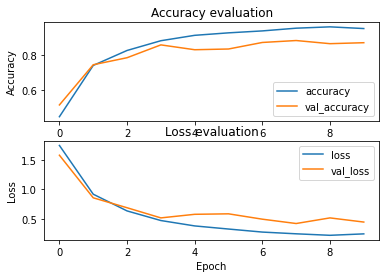

29/29 [==============================] - 0s 9ms/step - loss: 0.5255 - accuracy: 0.8456

Test loss: 0.5255446434020996, test accuracy: 84.5564067363739


In [ ]:
if __name__ == "__main__":
    main()

# Step 5 Making predictions

In [ ]:
import librosa
import tensorflow as tf
import numpy as np

SAVED_MODEL_PATH = "model.h5"
SAMPLES_TO_CONSIDER = 22050

In [ ]:
class _Keyword_Spotting_Service:
    """Singleton class for keyword spotting inference with trained models.
    :param model: Trained model
    """

    model = None
    _mapping = [
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        ""
    ]
    _instance = None


    def predict(self, file_path):
        """
        :param file_path (str): Path to audio file to predict
        :return predicted_keyword (str): Keyword predicted by the model
        """

        # extract MFCC
        MFCCs = self.preprocess(file_path)

        # we need a 4-dim array to feed to the model for prediction: (# samples, # time steps, # coefficients, 1)
        MFCCs = MFCCs[np.newaxis, ..., np.newaxis]

        # get the predicted label
        predictions = self.model.predict(MFCCs)
        predicted_index = np.argmax(predictions)
        predicted_keyword = self._mapping[predicted_index]
        return predicted_keyword


    def preprocess(self, file_path, num_mfcc=13, n_fft=2048, hop_length=512):
        """Extract MFCCs from audio file.
        :param file_path (str): Path of audio file
        :param num_mfcc (int): # of coefficients to extract
        :param n_fft (int): Interval we consider to apply STFT. Measured in # of samples
        :param hop_length (int): Sliding window for STFT. Measured in # of samples
        :return MFCCs (ndarray): 2-dim array with MFCC data of shape (# time steps, # coefficients)
        """

        # load audio file
        signal, sample_rate = librosa.load(file_path)

        if len(signal) >= SAMPLES_TO_CONSIDER:
            # ensure consistency of the length of the signal
            signal = signal[:SAMPLES_TO_CONSIDER]

            # extract MFCCs
            MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                         hop_length=hop_length)
        return MFCCs.T

In [ ]:
def Keyword_Spotting_Service():
    """Factory function for Keyword_Spotting_Service class.
    :return _Keyword_Spotting_Service._instance (_Keyword_Spotting_Service):
    """

    # ensure an instance is created only the first time the factory function is called
    if _Keyword_Spotting_Service._instance is None:
        _Keyword_Spotting_Service._instance = _Keyword_Spotting_Service()
        _Keyword_Spotting_Service.model = tf.keras.models.load_model(SAVED_MODEL_PATH)
    return _Keyword_Spotting_Service._instance

In [ ]:
if __name__ == "__main__":

    # create 2 instances of the keyword spotting service
    kss = Keyword_Spotting_Service()
    kss1 = Keyword_Spotting_Service()

    # check that different instances of the keyword spotting service point back to the same object (singleton)
    assert kss is kss1

    # make a prediction
    keyword = kss.predict("/content/Digits_data_500/two/0132a06d_nohash_4.wav")
    print(keyword)

seven
